# Example Code: MNIST Hand written character recognition Convolutional Neural Network Model  

In [4]:
from __future__ import print_function

#Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils

#Import Libraries for Matrix Manipulation and image plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# Load MNIST Dataset from Keras

In [4]:
#import MNIST Dataset
from keras.datasets import mnist

#The data, shuffled and split between train and test sets
#Loading MNIST data from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

    8192/11490434 [..............................] - ETA: 80s

   40960/11490434 [..............................] - ETA: 33s

   73728/11490434 [..............................] - ETA: 28s

  122880/11490434 [..............................] - ETA: 22s

  212992/11490434 [..............................] - ETA: 16s

  352256/11490434 [..............................] - ETA: 11s

  557056/11490434 [>.............................] - ETA: 8s 

  753664/11490434 [>.............................] - ETA: 7s

  835584/11490434 [=>............................] - ETA: 7s

 1171456/11490434 [==>...........................] - ETA: 5s

 1482752/11490434 [==>...........................] - ETA: 4s

 1777664/11490434 [===>..........................] - ETA: 4s

 2146304/11490434 [====>.........................] - ETA: 4s

 2473984/11490434 [=====>........................] - ETA: 3s

 2506752/11490434 [=====>........................] - ETA: 3s

 2842624/11490434 [======>.......................] - ETA: 3s

 3014656/11490434 [======>.......................] - ETA: 3s

 3203072/11490434 [=======>......................] - ETA: 3s

 3399680/11490434 [=======>......................] - ETA: 3s

 3588096/11490434 [========>.....................] - ETA: 3s

 3776512/11490434 [========>.....................] - ETA: 3s

 3833856/11490434 [=========>....................] - ETA: 3s

 4005888/11490434 [=========>....................] - ETA: 2s

 4202496/11490434 [=========>....................] - ETA: 2s

 4390912/11490434 [==========>...................] - ETA: 2s

 4579328/11490434 [==========>...................] - ETA: 2s

 4775936/11490434 [===========>..................] - ETA: 2s

 4964352/11490434 [===========>..................] - ETA: 2s

 5152768/11490434 [============>.................] - ETA: 2s

 5300224/11490434 [============>.................] - ETA: 2s

 5349376/11490434 [============>.................] - ETA: 2s

 5677056/11490434 [=============>................] - ETA: 2s

 5832704/11490434 [==============>...............] - ETA: 2s

 5988352/11490434 [==============>...............] - ETA: 2s

 6168576/11490434 [===============>..............] - ETA: 2s

 6324224/11490434 [===============>..............] - ETA: 2s

 6479872/11490434 [===============>..............] - ETA: 1s

 6635520/11490434 [================>.............] - ETA: 1s

 6791168/11490434 [================>.............] - ETA: 1s

 6848512/11490434 [================>.............] - ETA: 1s

 6987776/11490434 [=================>............] - ETA: 1s

 7069696/11490434 [=================>............] - ETA: 1s

 7102464/11490434 [=================>............] - ETA: 1s

 7331840/11490434 [==================>...........] - ETA: 1s

 7471104/11490434 [==================>...........] - ETA: 1s

 7593984/11490434 [==================>...........] - ETA: 1s

 7733248/11490434 [===================>..........] - ETA: 1s

 7872512/11490434 [===================>..........] - ETA: 1s

 8011776/11490434 [===================>..........] - ETA: 1s



 8151040/11490434 [====================>.........] - ETA: 1s

 8290304/11490434 [====================>.........] - ETA: 1s

 8413184/11490434 [====================>.........] - ETA: 1s

 8552448/11490434 [=====================>........] - ETA: 1s

 8691712/11490434 [=====================>........] - ETA: 1s

 8814592/11490434 [======================>.......] - ETA: 1s

 8912896/11490434 [======================>.......] - ETA: 1s

 9019392/11490434 [======================>.......] - ETA: 1s

 9142272/11490434 [======================>.......] - ETA: 0s

 9248768/11490434 [=======================>......] - ETA: 0s

 9388032/11490434 [=======================>......] - ETA: 0s

 9527296/11490434 [=======================>......] - ETA: 0s

 9666560/11490434 [========================>.....] - ETA: 0s

 9805824/11490434 [========================>.....] - ETA: 0s

 9945088/11490434 [========================>.....] - ETA: 0s

10067968/11490434 [=========================>....] - ETA: 0s

10166272/11490434 [=========================>....] - ETA: 0s

10305536/11490434 [=========================>....] - ETA: 0s

10444800/11490434 [==========================>...] - ETA: 0s

10584064/11490434 [==========================>...] - ETA: 0s

10723328/11490434 [==========================>...] - ETA: 0s

10862592/11490434 [===========================>..] - ETA: 0s

11001856/11490434 [===========================>..] - ETA: 0s

11091968/11490434 [===========================>..] - ETA: 0s

11231232/11490434 [============================>.] - ETA: 0s

11370496/11490434 [============================>.] - ETA: 0s

# Show first 10 images from the dataset

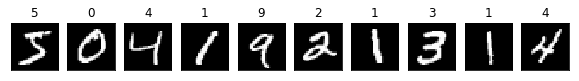

In [5]:
fig = plt. figure(figsize=(10,10))
for i in range (10):
    ax = fig.add_subplot(1, 10, i + 1, xticks = [], yticks =[])
    ax.imshow(x_train[i], cmap = 'gray')
    ax.set_title(str(y_train[i]))

# Show labeled data for first 10 images

In [6]:
print('Integer-valued labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]


# Normalizing anbd prrcessing training - testing data

In [7]:
img_rows, img_cols = 28, 28
#Defining input shape
input_shape = (1, img_rows, img_cols)

# reshape train and test data according to the input_shape
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#normalizing and resizing
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#Printing training sample number, testing sample number and shape
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Convolutional Neural Network Model Designing

In [9]:
#Initialize model
model = Sequential()

#Add first convolutional layer
model.add(Conv2D(32, (3, 3),activation='relu',input_shape= (28, 28, 1)))

#Add max pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

#Add second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))

#Add maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#downsample the feature size to reduce the network
#randomly selected 0.25% of neurons are ignored in training to reduce network size
model.add(Dropout(0.25))

#flattening the data in one column
model.add(Flatten())

#First fully connected neural network size with 128 neurons
model.add(Dense(128, activation='relu'))

#reducing the network size to avoid overfitting
model.add(Dropout(0.5))

#Final output layer of 10 classes
model.add(Dense(10, activation='softmax'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#printing the model summary
model.summary();

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

In [10]:
#Training and testing the model
model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

#Calculating the score of the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10


   32/60000 [..............................] - ETA: 1232s - loss: 2.3951 - acc: 0.0312

   96/60000 [..............................] - ETA: 463s - loss: 2.3455 - acc: 0.0938 

  160/60000 [..............................] - ETA: 304s - loss: 2.3229 - acc: 0.0938

  256/60000 [..............................] - ETA: 208s - loss: 2.2859 - acc: 0.1289

  320/60000 [..............................] - ETA: 177s - loss: 2.2661 - acc: 0.1594

  384/60000 [..............................] - ETA: 159s - loss: 2.2504 - acc: 0.1823

  448/60000 [..............................] - ETA: 147s - loss: 2.2351 - acc: 0.1964

  512/60000 [..............................] - ETA: 139s - loss: 2.2056 - acc: 0.2207

  544/60000 [..............................] - ETA: 138s - loss: 2.2041 - acc: 0.2206

  576/60000 [..............................] - ETA: 137s - loss: 2.1940 - acc: 0.2309

  608/60000 [..............................] - ETA: 135s - loss: 2.1845 - acc: 0.2385

  640/60000 [..............................] - ETA: 133s - loss: 2.1758 - acc: 0.2422

  704/60000 [..............................] - ETA: 127s - loss: 2.1559 - acc: 0.2557

  768/60000 [..............................] - ETA: 122s - loss: 2.1348 - acc: 0.2695

  832/60000 [..............................] - ETA: 116s - loss: 2.1093 - acc: 0.2837

  896/60000 [..............................] - ETA: 112s - loss: 2.0834 - acc: 0.3002



  992/60000 [..............................] - ETA: 106s - loss: 2.0422 - acc: 0.3175

 1056/60000 [..............................] - ETA: 103s - loss: 2.0172 - acc: 0.3277

 1120/60000 [..............................] - ETA: 100s - loss: 1.9845 - acc: 0.3429

 1216/60000 [..............................] - ETA: 96s - loss: 1.9304 - acc: 0.3635 

 1280/60000 [..............................] - ETA: 94s - loss: 1.9035 - acc: 0.3742

 1344/60000 [..............................] - ETA: 92s - loss: 1.8697 - acc: 0.3847

 1408/60000 [..............................] - ETA: 90s - loss: 1.8369 - acc: 0.3970



 1504/60000 [..............................] - ETA: 87s - loss: 1.7878 - acc: 0.4149

 1568/60000 [..............................] - ETA: 86s - loss: 1.7656 - acc: 0.4216



 1632/60000 [..............................] - ETA: 85s - loss: 1.7372 - acc: 0.4295

 1696/60000 [..............................] - ETA: 84s - loss: 1.7150 - acc: 0.4393

 1760/60000 [..............................] - ETA: 83s - loss: 1.6932 - acc: 0.4483

 1824/60000 [..............................] - ETA: 82s - loss: 1.6669 - acc: 0.4572

 1920/60000 [..............................] - ETA: 80s - loss: 1.6336 - acc: 0.4667

 1984/60000 [..............................] - ETA: 79s - loss: 1.6054 - acc: 0.4743

 2048/60000 [>.............................] - ETA: 78s - loss: 1.5778 - acc: 0.4834

 2144/60000 [>.............................] - ETA: 77s - loss: 1.5459 - acc: 0.4939

 2240/60000 [>.............................] - ETA: 75s - loss: 1.5134 - acc: 0.5040

 2336/60000 [>.............................] - ETA: 74s - loss: 1.4834 - acc: 0.5116

 2400/60000 [>.............................] - ETA: 73s - loss: 1.4575 - acc: 0.5200

 2464/60000 [>.............................] - ETA: 73s - loss: 1.4413 - acc: 0.5256

 2528/60000 [>.............................] - ETA: 72s - loss: 1.4195 - acc: 0.5320

 2592/60000 [>.............................] - ETA: 71s - loss: 1.3972 - acc: 0.5397

 2656/60000 [>.............................] - ETA: 71s - loss: 1.3858 - acc: 0.5429



 2752/60000 [>.............................] - ETA: 70s - loss: 1.3595 - acc: 0.5520

 2816/60000 [>.............................] - ETA: 69s - loss: 1.3413 - acc: 0.5575

 2880/60000 [>.............................] - ETA: 70s - loss: 1.3289 - acc: 0.5604

 2944/60000 [>.............................] - ETA: 69s - loss: 1.3188 - acc: 0.5635

 3008/60000 [>.............................] - ETA: 69s - loss: 1.3034 - acc: 0.5685

 3072/60000 [>.............................] - ETA: 68s - loss: 1.2877 - acc: 0.5742

 3168/60000 [>.............................] - ETA: 67s - loss: 1.2683 - acc: 0.5799

 3264/60000 [>.............................] - ETA: 67s - loss: 1.2483 - acc: 0.5864

 3328/60000 [>.............................] - ETA: 66s - loss: 1.2379 - acc: 0.5907

 3392/60000 [>.............................] - ETA: 66s - loss: 1.2243 - acc: 0.5952

 3456/60000 [>.............................] - ETA: 66s - loss: 1.2119 - acc: 0.5998

 3520/60000 [>.............................] - ETA: 65s - loss: 1.2019 - acc: 0.6037

 3584/60000 [>.............................] - ETA: 65s - loss: 1.1878 - acc: 0.6085

 3680/60000 [>.............................] - ETA: 64s - loss: 1.1690 - acc: 0.6147

 3776/60000 [>.............................] - ETA: 64s - loss: 1.1469 - acc: 0.6229

 3840/60000 [>.............................] - ETA: 63s - loss: 1.1406 - acc: 0.6247

 3904/60000 [>.............................] - ETA: 63s - loss: 1.1308 - acc: 0.6283

 4000/60000 [=>............................] - ETA: 63s - loss: 1.1146 - acc: 0.6340

 4064/60000 [=>............................] - ETA: 62s - loss: 1.1071 - acc: 0.6375

 4128/60000 [=>............................] - ETA: 62s - loss: 1.0986 - acc: 0.6400

 4192/60000 [=>............................] - ETA: 62s - loss: 1.0916 - acc: 0.6422

 4288/60000 [=>............................] - ETA: 62s - loss: 1.0808 - acc: 0.6460

 4352/60000 [=>............................] - ETA: 61s - loss: 1.0719 - acc: 0.6487

 4416/60000 [=>............................] - ETA: 61s - loss: 1.0647 - acc: 0.6519



 4512/60000 [=>............................] - ETA: 61s - loss: 1.0529 - acc: 0.6560

 4576/60000 [=>............................] - ETA: 61s - loss: 1.0439 - acc: 0.6591

 4640/60000 [=>............................] - ETA: 61s - loss: 1.0342 - acc: 0.6623

 4704/60000 [=>............................] - ETA: 60s - loss: 1.0269 - acc: 0.6648

 4768/60000 [=>............................] - ETA: 60s - loss: 1.0208 - acc: 0.6667

 4832/60000 [=>............................] - ETA: 60s - loss: 1.0139 - acc: 0.6691

 4928/60000 [=>............................] - ETA: 59s - loss: 1.0086 - acc: 0.6709

 5024/60000 [=>............................] - ETA: 59s - loss: 0.9997 - acc: 0.6742

 5088/60000 [=>............................] - ETA: 59s - loss: 0.9936 - acc: 0.6759

 5152/60000 [=>............................] - ETA: 59s - loss: 0.9858 - acc: 0.6786

 5216/60000 [=>............................] - ETA: 59s - loss: 0.9833 - acc: 0.6798

 5280/60000 [=>............................] - ETA: 58s - loss: 0.9786 - acc: 0.6813

 5344/60000 [=>............................] - ETA: 58s - loss: 0.9709 - acc: 0.6838

 5440/60000 [=>............................] - ETA: 58s - loss: 0.9608 - acc: 0.6871

 5536/60000 [=>............................] - ETA: 58s - loss: 0.9520 - acc: 0.6900

 5600/60000 [=>............................] - ETA: 57s - loss: 0.9459 - acc: 0.6920

 5664/60000 [=>............................] - ETA: 57s - loss: 0.9392 - acc: 0.6944

 5728/60000 [=>............................] - ETA: 57s - loss: 0.9329 - acc: 0.6962

 5792/60000 [=>............................] - ETA: 57s - loss: 0.9276 - acc: 0.6980

 5856/60000 [=>............................] - ETA: 57s - loss: 0.9220 - acc: 0.7003

 5920/60000 [=>............................] - ETA: 57s - loss: 0.9186 - acc: 0.7012

 5984/60000 [=>............................] - ETA: 56s - loss: 0.9129 - acc: 0.7032



 6080/60000 [==>...........................] - ETA: 56s - loss: 0.9048 - acc: 0.7056



 6144/60000 [==>...........................] - ETA: 56s - loss: 0.8996 - acc: 0.7078

 6208/60000 [==>...........................] - ETA: 56s - loss: 0.8947 - acc: 0.7096



 6272/60000 [==>...........................] - ETA: 56s - loss: 0.8904 - acc: 0.7108

 6336/60000 [==>...........................] - ETA: 56s - loss: 0.8858 - acc: 0.7126

 6400/60000 [==>...........................] - ETA: 56s - loss: 0.8793 - acc: 0.7147

 6496/60000 [==>...........................] - ETA: 56s - loss: 0.8731 - acc: 0.7167

 6560/60000 [==>...........................] - ETA: 55s - loss: 0.8680 - acc: 0.7183

 6624/60000 [==>...........................] - ETA: 55s - loss: 0.8626 - acc: 0.7203

 6688/60000 [==>...........................] - ETA: 55s - loss: 0.8575 - acc: 0.7220

 6752/60000 [==>...........................] - ETA: 55s - loss: 0.8534 - acc: 0.7238

 6816/60000 [==>...........................] - ETA: 55s - loss: 0.8496 - acc: 0.7255

 6880/60000 [==>...........................] - ETA: 55s - loss: 0.8435 - acc: 0.7273

 6944/60000 [==>...........................] - ETA: 55s - loss: 0.8388 - acc: 0.7288

 7008/60000 [==>...........................] - ETA: 55s - loss: 0.8343 - acc: 0.7305

 7072/60000 [==>...........................] - ETA: 55s - loss: 0.8304 - acc: 0.7318

 7136/60000 [==>...........................] - ETA: 55s - loss: 0.8274 - acc: 0.7326

 7200/60000 [==>...........................] - ETA: 54s - loss: 0.8240 - acc: 0.7340

 7264/60000 [==>...........................] - ETA: 54s - loss: 0.8205 - acc: 0.7344

 7328/60000 [==>...........................] - ETA: 54s - loss: 0.8163 - acc: 0.7357

 7424/60000 [==>...........................] - ETA: 54s - loss: 0.8121 - acc: 0.7369

 7520/60000 [==>...........................] - ETA: 54s - loss: 0.8050 - acc: 0.7391

 7616/60000 [==>...........................] - ETA: 54s - loss: 0.7997 - acc: 0.7409

 7680/60000 [==>...........................] - ETA: 53s - loss: 0.7952 - acc: 0.7426

 7776/60000 [==>...........................] - ETA: 53s - loss: 0.7885 - acc: 0.7449

 7840/60000 [==>...........................] - ETA: 53s - loss: 0.7838 - acc: 0.7464

 7904/60000 [==>...........................] - ETA: 53s - loss: 0.7802 - acc: 0.7477

 7968/60000 [==>...........................] - ETA: 53s - loss: 0.7771 - acc: 0.7484

 8032/60000 [===>..........................] - ETA: 53s - loss: 0.7735 - acc: 0.7495

 8096/60000 [===>..........................] - ETA: 53s - loss: 0.7697 - acc: 0.7505



 8192/60000 [===>..........................] - ETA: 52s - loss: 0.7648 - acc: 0.7521



 8256/60000 [===>..........................] - ETA: 52s - loss: 0.7614 - acc: 0.7533

 8320/60000 [===>..........................] - ETA: 52s - loss: 0.7591 - acc: 0.7540

 8384/60000 [===>..........................]

 - ETA: 52s - loss: 0.7559 - acc: 0.7548

 8416/60000 [===>..........................] - ETA: 52s - loss: 0.7544 - acc: 0.7552

 8480/60000 [===>..........................] - ETA: 52s - loss: 0.7506 - acc: 0.7565

 8544/60000 [===>..........................] - ETA: 52s - loss: 0.7471 - acc: 0.7575

 8608/60000 [===>..........................] - ETA: 52s - loss: 0.7433 - acc: 0.7588

 8672/60000 [===>..........................] - ETA: 52s - loss: 0.7404 - acc: 0.7598

 8736/60000 [===>..........................] - ETA: 52s - loss: 0.7360 - acc: 0.7613

 8800/60000 [===>..........................] - ETA: 52s - loss: 0.7342 - acc: 0.7619

 8864/60000 [===>..........................] - ETA: 52s - loss: 0.7299 - acc: 0.7632

 8928/60000 [===>..........................] - ETA: 52s - loss: 0.7276 - acc: 0.7640

 8992/60000 [===>..........................] - ETA: 52s - loss: 0.7249 - acc: 0.7648



 9056/60000 [===>..........................] - ETA: 52s - loss: 0.7221 - acc: 0.7657

 9088/60000 [===>..........................] - ETA: 52s - loss: 0.7203 - acc: 0.7663

 9152/60000 [===>..........................] - ETA: 52s - loss: 0.7163 - acc: 0.7677

 9216/60000 [===>..........................] - ETA: 52s - loss: 0.7139 - acc: 0.7684

 9280/60000 [===>..........................] - ETA: 51s - loss: 0.7119 - acc: 0.7690

 9344/60000 [===>..........................] - ETA: 52s - loss: 0.7090 - acc: 0.7698

 9408/60000 [===>..........................] - ETA: 51s - loss: 0.7070 - acc: 0.7704

 9472/60000 [===>..........................] - ETA: 51s - loss: 0.7033 - acc: 0.7719

 9536/60000 [===>..........................] - ETA: 51s - loss: 0.7017 - acc: 0.7722

 9600/60000 [===>..........................] - ETA: 51s - loss: 0.6984 - acc: 0.7732

 9664/60000 [===>..........................] - ETA: 51s - loss: 0.6959 - acc: 0.7741

 9728/60000 [===>..........................] - ETA: 51s - loss: 0.6933 - acc: 0.7750

 9792/60000 [===>..........................] - ETA: 51s - loss: 0.6909 - acc: 0.7759

 9856/60000 [===>..........................] - ETA: 51s - loss: 0.6875 - acc: 0.7771

 9920/60000 [===>..........................] - ETA: 51s - loss: 0.6847 - acc: 0.7781

 9984/60000 [===>..........................] - ETA: 51s - loss: 0.6834 - acc: 0.7789

10048/60000 [====>.........................] - ETA: 51s - loss: 0.6811 - acc: 0.7798

10112/60000 [====>.........................] - ETA: 51s - loss: 0.6782 - acc: 0.7809

10176/60000 [====>.........................] - ETA: 50s - loss: 0.6749 - acc: 0.7819

10240/60000 [====>.........................] - ETA: 50s - loss: 0.6735 - acc: 0.7828

10304/60000 [====>.........................] - ETA: 50s - loss: 0.6705 - acc: 0.7837

10368/60000 [====>.........................] - ETA: 50s - loss: 0.6683 - acc: 0.7846

10432/60000 [====>.........................] - ETA: 50s - loss: 0.6653 - acc: 0.7856

10496/60000 [====>.........................] - ETA: 50s - loss: 0.6623 - acc: 0.7866

10592/60000 [====>.........................] - ETA: 50s - loss: 0.6599 - acc: 0.7877

10688/60000 [====>.........................] - ETA: 50s - loss: 0.6570 - acc: 0.7886

10784/60000 [====>.........................] - ETA: 50s - loss: 0.6528 - acc: 0.7899

10848/60000 [====>.........................] - ETA: 50s - loss: 0.6501 - acc: 0.7908

10912/60000 [====>.........................] - ETA: 50s - loss: 0.6478 - acc: 0.7917

10976/60000 [====>.........................] - ETA: 49s - loss: 0.6461 - acc: 0.7924

11040/60000 [====>.........................] - ETA: 49s - loss: 0.6443 - acc: 0.7929

11104/60000 [====>.........................] - ETA: 49s - loss: 0.6420 - acc: 0.7938

11168/60000 [====>.........................] - ETA: 49s - loss: 0.6401 - acc: 0.7943

11232/60000 [====>.........................] - ETA: 49s - loss: 0.6384 - acc: 0.7947

11296/60000 [====>.........................] - ETA: 49s - loss: 0.6364 - acc: 0.7952

11360/60000 [====>.........................] - ETA: 49s - loss: 0.6342 - acc: 0.7960

11424/60000 [====>.........................] - ETA: 49s - loss: 0.6317 - acc: 0.7968

11488/60000 [====>.........................] - ETA: 49s - loss: 0.6298 - acc: 0.7973

11552/60000 [====>.........................] - ETA: 49s - loss: 0.6282 - acc: 0.7975

11616/60000 [====>.........................] - ETA: 49s - loss: 0.6258 - acc: 0.7983

11680/60000 [====>.........................] - ETA: 49s - loss: 0.6234 - acc: 0.7991

11776/60000 [====>.........................] - ETA: 48s - loss: 0.6196 - acc: 0.8004

11872/60000 [====>.........................] - ETA: 48s - loss: 0.6171 - acc: 0.8012

11936/60000 [====>.........................] - ETA: 48s - loss: 0.6158 - acc: 0.8018

12000/60000 [=====>........................] - ETA: 48s - loss: 0.6133 - acc: 0.8027



12064/60000 [=====>........................] - ETA: 48s - loss: 0.6112 - acc: 0.8033

12096/60000 [=====>........................] - ETA: 48s - loss: 0.6103 - acc: 0.8037

12160/60000 [=====>........................] - ETA: 48s - loss: 0.6086 - acc: 0.8044



12224/60000 [=====>........................] - ETA: 48s - loss: 0.6063 - acc: 0.8051

12288/60000 [=====>........................] - ETA: 48s - loss: 0.6050 - acc: 0.8053



12320/60000 [=====>........................] - ETA: 48s - loss: 0.6038 - acc: 0.8057

12352/60000 [=====>........................] - ETA: 48s - loss: 0.6032 - acc: 0.8059

12384/60000 [=====>........................] - ETA: 48s - loss: 0.6024 - acc: 0.8062

12448/60000 [=====>........................] - ETA: 48s - loss: 0.6009 - acc: 0.8069

12512/60000 [=====>........................] - ETA: 48s - loss: 0.5996 - acc: 0.8075

12576/60000 [=====>........................] - ETA: 48s - loss: 0.5982 - acc: 0.8080

12640/60000 [=====>........................] - ETA: 48s - loss: 0.5963 - acc: 0.8086

12704/60000 [=====>........................] - ETA: 48s - loss: 0.5947 - acc: 0.8090

12800/60000 [=====>........................] - ETA: 48s - loss: 0.5913 - acc: 0.8099



12864/60000 [=====>........................] - ETA: 48s - loss: 0.5889 - acc: 0.8108

12928/60000 [=====>........................] - ETA: 48s - loss: 0.5869 - acc: 0.8115



12992/60000 [=====>........................] - ETA: 47s - loss: 0.5853 - acc: 0.8121

13024/60000 [=====>........................] - ETA: 47s - loss: 0.5847 - acc: 0.8124

13088/60000 [=====>........................] - ETA: 47s - loss: 0.5834 - acc: 0.8128

13152/60000 [=====>........................] - ETA: 47s - loss: 0.5817 - acc: 0.8135

13216/60000 [=====>........................] - ETA: 47s - loss: 0.5799 - acc: 0.8142

13280/60000 [=====>........................] - ETA: 47s - loss: 0.5781 - acc: 0.8148

13312/60000 [=====>........................] - ETA: 47s - loss: 0.5777 - acc: 0.8151

13376/60000 [=====>........................] - ETA: 47s - loss: 0.5762 - acc: 0.8156

13408/60000 [=====>........................] - ETA: 47s - loss: 0.5752 - acc: 0.8160

13472/60000 [=====>........................] - ETA: 47s - loss: 0.5734 - acc: 0.8165

13536/60000 [=====>........................] - ETA: 47s - loss: 0.5719 - acc: 0.8167



13600/60000 [=====>........................] - ETA: 47s - loss: 0.5701 - acc: 0.8172

13664/60000 [=====>........................] - ETA: 47s - loss: 0.5682 - acc: 0.8178

13728/60000 [=====>........................] - ETA: 47s - loss: 0.5673 - acc: 0.8182

13760/60000 [=====>........................] - ETA: 47s - loss: 0.5668 - acc: 0.8183

13824/60000 [=====>........................] - ETA: 47s - loss: 0.5652 - acc: 0.8187

13888/60000 [=====>........................] - ETA: 47s - loss: 0.5634 - acc: 0.8193

13952/60000 [=====>........................] - ETA: 47s - loss: 0.5622 - acc: 0.8198

14048/60000 [======>.......................] - ETA: 47s - loss: 0.5606 - acc: 0.8205



14112/60000 [======>.......................] - ETA: 46s - loss: 0.5589 - acc: 0.8212

14176/60000 [======>.......................] - ETA: 46s - loss: 0.5577 - acc: 0.8215

14240/60000 [======>.......................] - ETA: 46s - loss: 0.5562 - acc: 0.8221



14304/60000 [======>.......................] - ETA: 46s - loss: 0.5542 - acc: 0.8228

14368/60000 [======>.......................] - ETA: 46s - loss: 0.5535 - acc: 0.8231



14432/60000 [======>.......................] - ETA: 46s - loss: 0.5519 - acc: 0.8236

14464/60000 [======>.......................] - ETA: 46s - loss: 0.5512 - acc: 0.8239

14528/60000 [======>.......................] - ETA: 46s - loss: 0.5510 - acc: 0.8241

14592/60000 [======>.......................] - ETA: 46s - loss: 0.5500 - acc: 0.8244

14656/60000 [======>.......................] - ETA: 46s - loss: 0.5487 - acc: 0.8249

14720/60000 [======>.......................] - ETA: 46s - loss: 0.5478 - acc: 0.8253

14784/60000 [======>.......................] - ETA: 46s - loss: 0.5467 - acc: 0.8257

14848/60000 [======>.......................] - ETA: 46s - loss: 0.5457 - acc: 0.8262

14944/60000 [======>.......................] - ETA: 46s - loss: 0.5437 - acc: 0.8266

15040/60000 [======>.......................] - ETA: 45s - loss: 0.5427 - acc: 0.8269

15104/60000 [======>.......................] - ETA: 45s - loss: 0.5412 - acc: 0.8274



15168/60000 [======>.......................] - ETA: 45s - loss: 0.5402 - acc: 0.8279

15232/60000 [======>.......................] - ETA: 45s - loss: 0.5388 - acc: 0.8282

15296/60000 [======>.......................] - ETA: 45s - loss: 0.5374 - acc: 0.8287



15360/60000 [======>.......................] - ETA: 45s - loss: 0.5362 - acc: 0.8291

15392/60000 [======>.......................] - ETA: 45s - loss: 0.5352 - acc: 0.8295

15456/60000 [======>.......................] - ETA: 45s - loss: 0.5341 - acc: 0.8299

15520/60000 [======>.......................] - ETA: 45s - loss: 0.5330 - acc: 0.8302

15584/60000 [======>.......................] - ETA: 45s - loss: 0.5318 - acc: 0.8305

15648/60000 [======>.......................] - ETA: 45s - loss: 0.5305 - acc: 0.8310

15744/60000 [======>.......................] - ETA: 45s - loss: 0.5284 - acc: 0.8316

15808/60000 [======>.......................] - ETA: 45s - loss: 0.5268 - acc: 0.8322

15872/60000 [======>.......................] - ETA: 45s - loss: 0.5252 - acc: 0.8327

15936/60000 [======>.......................] - ETA: 44s - loss: 0.5244 - acc: 0.8328

16000/60000 [=======>......................] - ETA: 44s - loss: 0.5227 - acc: 0.8334

16064/60000 [=======>......................] - ETA: 44s - loss: 0.5226 - acc: 0.8336

16128/60000 [=======>......................] - ETA: 44s - loss: 0.5214 - acc: 0.8341

16224/60000 [=======>......................] - ETA: 44s - loss: 0.5189 - acc: 0.8349

16288/60000 [=======>......................] - ETA: 44s - loss: 0.5181 - acc: 0.8352

16352/60000 [=======>......................] - ETA: 44s - loss: 0.5171 - acc: 0.8356

16416/60000 [=======>......................] - ETA: 44s - loss: 0.5158 - acc: 0.8360

16480/60000 [=======>......................] - ETA: 44s - loss: 0.5149 - acc: 0.8363

16544/60000 [=======>......................] - ETA: 44s - loss: 0.5136 - acc: 0.8368

16608/60000 [=======>......................] - ETA: 44s - loss: 0.5123 - acc: 0.8372

16672/60000 [=======>......................] - ETA: 44s - loss: 0.5121 - acc: 0.8371

16736/60000 [=======>......................] - ETA: 44s - loss: 0.5113 - acc: 0.8374

16800/60000 [=======>......................]

 - ETA: 43s - loss: 0.5099 - acc: 0.8379

16832/60000 [=======>......................] - ETA: 43s - loss: 0.5095 - acc: 0.8381

16896/60000 [=======>......................] - ETA: 43s - loss: 0.5082 - acc: 0.8385

16960/60000 [=======>......................] - ETA: 43s - loss: 0.5069 - acc: 0.8389

17024/60000 [=======>......................] - ETA: 43s - loss: 0.5061 - acc: 0.8391

17088/60000 [=======>......................] - ETA: 43s - loss: 0.5048 - acc: 0.8394

17152/60000 [=======>......................] - ETA: 43s - loss: 0.5033 - acc: 0.8399

17216/60000 [=======>......................] - ETA: 43s - loss: 0.5022 - acc: 0.8401

17280/60000 [=======>......................] - ETA: 43s - loss: 0.5020 - acc: 0.8403

17312/60000 [=======>......................] - ETA: 43s - loss: 0.5016 - acc: 0.8405

17376/60000 [=======>......................] - ETA: 43s - loss: 0.5000 - acc: 0.8409

17440/60000 [=======>......................] - ETA: 43s - loss: 0.4989 - acc: 0.8412

17504/60000 [=======>......................] - ETA: 43s - loss: 0.4982 - acc: 0.8414

17600/60000 [=======>......................] - ETA: 43s - loss: 0.4971 - acc: 0.8419

17664/60000 [=======>......................] - ETA: 43s - loss: 0.4958 - acc: 0.8423

17728/60000 [=======>......................] - ETA: 42s - loss: 0.4949 - acc: 0.8426

17792/60000 [=======>......................] - ETA: 42s - loss: 0.4941 - acc: 0.8429

17856/60000 [=======>......................] - ETA: 42s - loss: 0.4933 - acc: 0.8430

17920/60000 [=======>......................] - ETA: 42s - loss: 0.4924 - acc: 0.8433

17984/60000 [=======>......................] - ETA: 42s - loss: 0.4915 - acc: 0.8435

18048/60000 [========>.....................] - ETA: 42s - loss: 0.4902 - acc: 0.8439

18112/60000 [========>.....................] - ETA: 42s - loss: 0.4888 - acc: 0.8444

18208/60000 [========>.....................] - ETA: 42s - loss: 0.4872 - acc: 0.8450

18304/60000 [========>.....................] - ETA: 42s - loss: 0.4864 - acc: 0.8454

18336/60000 [========>.....................] - ETA: 42s - loss: 0.4860 - acc: 0.8455

18400/60000 [========>.....................] - ETA: 42s - loss: 0.4851 - acc: 0.8458

18496/60000 [========>.....................] - ETA: 42s - loss: 0.4835 - acc: 0.8463

18592/60000 [========>.....................] - ETA: 41s - loss: 0.4826 - acc: 0.8468

18656/60000 [========>.....................] - ETA: 41s - loss: 0.4815 - acc: 0.8471

18720/60000 [========>.....................] - ETA: 41s - loss: 0.4806 - acc: 0.8474

18784/60000 [========>.....................] - ETA: 41s - loss: 0.4801 - acc: 0.8477

18848/60000 [========>.....................] - ETA: 41s - loss: 0.4787 - acc: 0.8481

18912/60000 [========>.....................] - ETA: 41s - loss: 0.4778 - acc: 0.8485

18976/60000 [========>.....................] - ETA: 41s - loss: 0.4781 - acc: 0.8487

19040/60000 [========>.....................] - ETA: 41s - loss: 0.4780 - acc: 0.8488

19104/60000 [========>.....................] - ETA: 41s - loss: 0.4769 - acc: 0.8491

19168/60000 [========>.....................] - ETA: 41s - loss: 0.4760 - acc: 0.8495

19200/60000 [========>.....................] - ETA: 41s - loss: 0.4755 - acc: 0.8497

19264/60000 [========>.....................] - ETA: 41s - loss: 0.4749 - acc: 0.8498

19328/60000 [========>.....................] - ETA: 41s - loss: 0.4742 - acc: 0.8501

19392/60000 [========>.....................] - ETA: 41s - loss: 0.4728 - acc: 0.8506

19456/60000 [========>.....................] - ETA: 41s - loss: 0.4715 - acc: 0.8509

19520/60000 [========>.....................] - ETA: 41s - loss: 0.4709 - acc: 0.8511

19584/60000 [========>.....................] - ETA: 40s - loss: 0.4700 - acc: 0.8514

19648/60000 [========>.....................] - ETA: 40s - loss: 0.4695 - acc: 0.8516

19712/60000 [========>.....................] - ETA: 40s - loss: 0.4689 - acc: 0.8518

19808/60000 [========>.....................] - ETA: 40s - loss: 0.4678 - acc: 0.8522

19872/60000 [========>.....................] - ETA: 40s - loss: 0.4669 - acc: 0.8525



19936/60000 [========>.....................] - ETA: 40s - loss: 0.4659 - acc: 0.8527

20000/60000 [=========>....................] - ETA: 40s - loss: 0.4652 - acc: 0.8530

20064/60000 [=========>....................] - ETA: 40s - loss: 0.4643 - acc: 0.8533

20128/60000 [=========>....................] - ETA: 40s - loss: 0.4637 - acc: 0.8535

20224/60000 [=========>....................] - ETA: 40s - loss: 0.4623 - acc: 0.8539

20320/60000 [=========>....................] - ETA: 40s - loss: 0.4605 - acc: 0.8544

20384/60000 [=========>....................] - ETA: 40s - loss: 0.4594 - acc: 0.8547

20448/60000 [=========>....................] - ETA: 39s - loss: 0.4588 - acc: 0.8549

20544/60000 [=========>....................] - ETA: 39s - loss: 0.4580 - acc: 0.8553

20640/60000 [=========>....................] - ETA: 39s - loss: 0.4570 - acc: 0.8556

20736/60000 [=========>....................] - ETA: 39s - loss: 0.4562 - acc: 0.8560

20832/60000 [=========>....................] - ETA: 39s - loss: 0.4550 - acc: 0.8565

20896/60000 [=========>....................] - ETA: 39s - loss: 0.4541 - acc: 0.8568

20960/60000 [=========>....................] - ETA: 39s - loss: 0.4531 - acc: 0.8572

21024/60000 [=========>....................] - ETA: 39s - loss: 0.4522 - acc: 0.8574

21088/60000 [=========>....................] - ETA: 39s - loss: 0.4517 - acc: 0.8576

21152/60000 [=========>....................] - ETA: 39s - loss: 0.4508 - acc: 0.8579

21248/60000 [=========>....................] - ETA: 39s - loss: 0.4498 - acc: 0.8582

21344/60000 [=========>....................] - ETA: 38s - loss: 0.4488 - acc: 0.8586

21440/60000 [=========>....................] - ETA: 38s - loss: 0.4476 - acc: 0.8590

21504/60000 [=========>....................] - ETA: 38s - loss: 0.4466 - acc: 0.8593

21568/60000 [=========>....................] - ETA: 38s - loss: 0.4460 - acc: 0.8594

21632/60000 [=========>....................] - ETA: 38s - loss: 0.4451 - acc: 0.8597

21696/60000 [=========>....................] - ETA: 38s - loss: 0.4450 - acc: 0.8597

21760/60000 [=========>....................] - ETA: 38s - loss: 0.4439 - acc: 0.8601

21824/60000 [=========>....................] - ETA: 38s - loss: 0.4430 - acc: 0.8604

21888/60000 [=========>....................] - ETA: 38s - loss: 0.4423 - acc: 0.8606

21952/60000 [=========>....................] - ETA: 38s - loss: 0.4419 - acc: 0.8608

22048/60000 [==========>...................] - ETA: 38s - loss: 0.4410 - acc: 0.8611

22112/60000 [==========>...................] - ETA: 38s - loss: 0.4402 - acc: 0.8613

22176/60000 [==========>...................] - ETA: 37s - loss: 0.4394 - acc: 0.8617

22240/60000 [==========>...................] - ETA: 37s - loss: 0.4386 - acc: 0.8620

22304/60000 [==========>...................] - ETA: 37s - loss: 0.4381 - acc: 0.8620

22368/60000 [==========>...................] - ETA: 37s - loss: 0.4373 - acc: 0.8622

22432/60000 [==========>...................] - ETA: 37s - loss: 0.4363 - acc: 0.8626

22496/60000 [==========>...................] - ETA: 37s - loss: 0.4357 - acc: 0.8628

22560/60000 [==========>...................] - ETA: 37s - loss: 0.4348 - acc: 0.8632

22624/60000 [==========>...................] - ETA: 37s - loss: 0.4340 - acc: 0.8634

22688/60000 [==========>...................] - ETA: 37s - loss: 0.4333 - acc: 0.8636

22752/60000 [==========>...................] - ETA: 37s - loss: 0.4329 - acc: 0.8638

22816/60000 [==========>...................] - ETA: 37s - loss: 0.4325 - acc: 0.8639

22880/60000 [==========>...................] - ETA: 37s - loss: 0.4321 - acc: 0.8639

22944/60000 [==========>...................] - ETA: 37s - loss: 0.4319 - acc: 0.8641

23040/60000 [==========>...................] - ETA: 37s - loss: 0.4316 - acc: 0.8644

23104/60000 [==========>...................] - ETA: 37s - loss: 0.4313 - acc: 0.8645

23168/60000 [==========>...................] - ETA: 36s - loss: 0.4308 - acc: 0.8646

23232/60000 [==========>...................] - ETA: 36s - loss: 0.4302 - acc: 0.8649

23296/60000 [==========>...................] - ETA: 36s - loss: 0.4295 - acc: 0.8651

23360/60000 [==========>...................] - ETA: 36s - loss: 0.4293 - acc: 0.8653

23456/60000 [==========>...................] - ETA: 36s - loss: 0.4283 - acc: 0.8656

23552/60000 [==========>...................] - ETA: 36s - loss: 0.4273 - acc: 0.8658

23616/60000 [==========>...................] - ETA: 36s - loss: 0.4273 - acc: 0.8659

23680/60000 [==========>...................] - ETA: 36s - loss: 0.4271 - acc: 0.8658

23744/60000 [==========>...................] - ETA: 36s - loss: 0.4264 - acc: 0.8660

23808/60000 [==========>...................] - ETA: 36s - loss: 0.4258 - acc: 0.8662



23904/60000 [==========>...................] - ETA: 36s - loss: 0.4248 - acc: 0.8665

23936/60000 [==========>...................] - ETA: 36s - loss: 0.4245 - acc: 0.8666

24000/60000 [===========>..................] - ETA: 36s - loss: 0.4241 - acc: 0.8667

24064/60000 [===========>..................] - ETA: 35s - loss: 0.4235 - acc: 0.8670

24128/60000 [===========>..................] - ETA: 35s - loss: 0.4228 - acc: 0.8672

24192/60000 [===========>..................] - ETA: 35s - loss: 0.4223 - acc: 0.8674

24256/60000 [===========>..................] - ETA: 35s - loss: 0.4214 - acc: 0.8676

24320/60000 [===========>..................] - ETA: 35s - loss: 0.4205 - acc: 0.8679

24384/60000 [===========>..................] - ETA: 35s - loss: 0.4197 - acc: 0.8681

24448/60000 [===========>..................] - ETA: 35s - loss: 0.4190 - acc: 0.8683

24544/60000 [===========>..................] - ETA: 35s - loss: 0.4178 - acc: 0.8687

24640/60000 [===========>..................] - ETA: 35s - loss: 0.4174 - acc: 0.8688

24704/60000 [===========>..................] - ETA: 35s - loss: 0.4170 - acc: 0.8688

24768/60000 [===========>..................] - ETA: 35s - loss: 0.4163 - acc: 0.8691

24864/60000 [===========>..................] - ETA: 35s - loss: 0.4149 - acc: 0.8696

24960/60000 [===========>..................] - ETA: 34s - loss: 0.4144 - acc: 0.8696

25056/60000 [===========>..................] - ETA: 34s - loss: 0.4137 - acc: 0.8698

25152/60000 [===========>..................] - ETA: 34s - loss: 0.4126 - acc: 0.8702

25216/60000 [===========>..................] - ETA: 34s - loss: 0.4122 - acc: 0.8704

25280/60000 [===========>..................] - ETA: 34s - loss: 0.4120 - acc: 0.8705

25376/60000 [===========>..................] - ETA: 34s - loss: 0.4110 - acc: 0.8708

25472/60000 [===========>..................] - ETA: 34s - loss: 0.4099 - acc: 0.8712

25568/60000 [===========>..................] - ETA: 34s - loss: 0.4092 - acc: 0.8715

25632/60000 [===========>..................] - ETA: 34s - loss: 0.4085 - acc: 0.8716



25696/60000 [===========>..................] - ETA: 34s - loss: 0.4078 - acc: 0.8718

25760/60000 [===========>..................] - ETA: 34s - loss: 0.4072 - acc: 0.8720

25824/60000 [===========>..................] - ETA: 34s - loss: 0.4063 - acc: 0.8724

25888/60000 [===========>..................] - ETA: 33s - loss: 0.4055 - acc: 0.8726

25984/60000 [===========>..................] - ETA: 33s - loss: 0.4046 - acc: 0.8729

26048/60000 [============>.................] - ETA: 33s - loss: 0.4038 - acc: 0.8732

26112/60000 [============>.................] - ETA: 33s - loss: 0.4031 - acc: 0.8734



26208/60000 [============>.................] - ETA: 33s - loss: 0.4027 - acc: 0.8735

26272/60000 [============>.................] - ETA: 33s - loss: 0.4020 - acc: 0.8737

26336/60000 [============>.................] - ETA: 33s - loss: 0.4014 - acc: 0.8739



26400/60000 [============>.................] - ETA: 33s - loss: 0.4005 - acc: 0.8742

26464/60000 [============>.................] - ETA: 33s - loss: 0.4005 - acc: 0.8742

26528/60000 [============>.................] - ETA: 33s - loss: 0.3998 - acc: 0.8744

26624/60000 [============>.................] - ETA: 33s - loss: 0.3990 - acc: 0.8747

26720/60000 [============>.................] - ETA: 33s - loss: 0.3981 - acc: 0.8749

26816/60000 [============>.................] - ETA: 32s - loss: 0.3976 - acc: 0.8752

26880/60000 [============>.................] - ETA: 32s - loss: 0.3968 - acc: 0.8755

26944/60000 [============>.................] - ETA: 32s - loss: 0.3963 - acc: 0.8757

27008/60000 [============>.................] - ETA: 32s - loss: 0.3957 - acc: 0.8760

27072/60000 [============>.................] - ETA: 32s - loss: 0.3951 - acc: 0.8762

27136/60000 [============>.................] - ETA: 32s - loss: 0.3944 - acc: 0.8764

27200/60000 [============>.................] - ETA: 32s - loss: 0.3935 - acc: 0.8767

27264/60000 [============>.................] - ETA: 32s - loss: 0.3927 - acc: 0.8769

27328/60000 [============>.................] - ETA: 32s - loss: 0.3923 - acc: 0.8771

27392/60000 [============>.................] - ETA: 32s - loss: 0.3917 - acc: 0.8772

27456/60000 [============>.................] - ETA: 32s - loss: 0.3908 - acc: 0.8775

27520/60000 [============>.................] - ETA: 32s - loss: 0.3906 - acc: 0.8776

27584/60000 [============>.................] - ETA: 32s - loss: 0.3907 - acc: 0.8777

27648/60000 [============>.................] - ETA: 32s - loss: 0.3901 - acc: 0.8778

27712/60000 [============>.................] - ETA: 32s - loss: 0.3894 - acc: 0.8780

27776/60000 [============>.................] - ETA: 31s - loss: 0.3890 - acc: 0.8781

27840/60000 [============>.................] - ETA: 31s - loss: 0.3887 - acc: 0.8782

27904/60000 [============>.................] - ETA: 31s - loss: 0.3884 - acc: 0.8783

27968/60000 [============>.................] - ETA: 31s - loss: 0.3877 - acc: 0.8785

28064/60000 [=============>................] - ETA: 31s - loss: 0.3868 - acc: 0.8788

28160/60000 [=============>................] - ETA: 31s - loss: 0.3860 - acc: 0.8790

28224/60000 [=============>................] - ETA: 31s - loss: 0.3853 - acc: 0.8792



28288/60000 [=============>................] - ETA: 31s - loss: 0.3849 - acc: 0.8793

28352/60000 [=============>................] - ETA: 31s - loss: 0.3846 - acc: 0.8795

28416/60000 [=============>................] - ETA: 31s - loss: 0.3840 - acc: 0.8797

28480/60000 [=============>................] - ETA: 31s - loss: 0.3836 - acc: 0.8797

28576/60000 [=============>................] - ETA: 31s - loss: 0.3829 - acc: 0.8799

28672/60000 [=============>................] - ETA: 31s - loss: 0.3827 - acc: 0.8799

28736/60000 [=============>................] - ETA: 30s - loss: 0.3821 - acc: 0.8801



28800/60000 [=============>................] - ETA: 30s - loss: 0.3814 - acc: 0.8803

28864/60000 [=============>................] - ETA: 30s - loss: 0.3809 - acc: 0.8805

28928/60000 [=============>................] - ETA: 30s - loss: 0.3805 - acc: 0.8806

28992/60000 [=============>................] - ETA: 30s - loss: 0.3800 - acc: 0.8808

29056/60000 [=============>................] - ETA: 30s - loss: 0.3795 - acc: 0.8809

29120/60000 [=============>................] - ETA: 30s - loss: 0.3789 - acc: 0.8811

29184/60000 [=============>................] - ETA: 30s - loss: 0.3786 - acc: 0.8812



29280/60000 [=============>................] - ETA: 30s - loss: 0.3780 - acc: 0.8814

29344/60000 [=============>................] - ETA: 30s - loss: 0.3778 - acc: 0.8814

29408/60000 [=============>................] - ETA: 30s - loss: 0.3771 - acc: 0.8816

29472/60000 [=============>................] - ETA: 30s - loss: 0.3771 - acc: 0.8816

29536/60000 [=============>................] - ETA: 30s - loss: 0.3764 - acc: 0.8818

29600/60000 [=============>................] - ETA: 30s - loss: 0.3759 - acc: 0.8820

29664/60000 [=============>................] - ETA: 29s - loss: 0.3758 - acc: 0.8821

29728/60000 [=============>................] - ETA: 29s - loss: 0.3754 - acc: 0.8822

29792/60000 [=============>................] - ETA: 29s - loss: 0.3748 - acc: 0.8823

29856/60000 [=============>................] - ETA: 29s - loss: 0.3743 - acc: 0.8825

29920/60000 [=============>................] - ETA: 29s - loss: 0.3737 - acc: 0.8827

29984/60000 [=============>................] - ETA: 29s - loss: 0.3734 - acc: 0.8829

30048/60000 [==============>...............] - ETA: 29s - loss: 0.3729 - acc: 0.8831

30112/60000 [==============>...............] - ETA: 29s - loss: 0.3723 - acc: 0.8833

30176/60000 [==============>...............] - ETA: 29s - loss: 0.3717 - acc: 0.8834

30240/60000 [==============>...............] - ETA: 29s - loss: 0.3711 - acc: 0.8835

30304/60000 [==============>...............] - ETA: 29s - loss: 0.3708 - acc: 0.8837

30368/60000 [==============>...............] - ETA: 29s - loss: 0.3705 - acc: 0.8838

30432/60000 [==============>...............] - ETA: 29s - loss: 0.3701 - acc: 0.8839

30496/60000 [==============>...............] - ETA: 29s - loss: 0.3694 - acc: 0.8841

30560/60000 [==============>...............] - ETA: 29s - loss: 0.3688 - acc: 0.8843

30624/60000 [==============>...............] - ETA: 29s - loss: 0.3685 - acc: 0.8845

30688/60000 [==============>...............] - ETA: 28s - loss: 0.3681 - acc: 0.8846

30752/60000 [==============>...............] - ETA: 28s - loss: 0.3678 - acc: 0.8847

30848/60000 [==============>...............] - ETA: 28s - loss: 0.3672 - acc: 0.8849

30944/60000 [==============>...............] - ETA: 28s - loss: 0.3666 - acc: 0.8851

31008/60000 [==============>...............] - ETA: 28s - loss: 0.3663 - acc: 0.8852

31072/60000 [==============>...............] - ETA: 28s - loss: 0.3659 - acc: 0.8853

31168/60000 [==============>...............] - ETA: 28s - loss: 0.3652 - acc: 0.8856



31232/60000 [==============>...............] - ETA: 28s - loss: 0.3647 - acc: 0.8857

31296/60000 [==============>...............] - ETA: 28s - loss: 0.3643 - acc: 0.8859

31360/60000 [==============>...............] - ETA: 28s - loss: 0.3638 - acc: 0.8860

31424/60000 [==============>...............] - ETA: 28s - loss: 0.3635 - acc: 0.8861

31488/60000 [==============>...............] - ETA: 28s - loss: 0.3635 - acc: 0.8861

31552/60000 [==============>...............] - ETA: 28s - loss: 0.3630 - acc: 0.8863

31584/60000 [==============>...............] - ETA: 28s - loss: 0.3631 - acc: 0.8863

31680/60000 [==============>...............] - ETA: 27s - loss: 0.3622 - acc: 0.8866

31776/60000 [==============>...............] - ETA: 27s - loss: 0.3614 - acc: 0.8868

31872/60000 [==============>...............] - ETA: 27s - loss: 0.3608 - acc: 0.8870

31936/60000 [==============>...............] - ETA: 27s - loss: 0.3605 - acc: 0.8871

32000/60000 [===============>..............] - ETA: 27s - loss: 0.3603 - acc: 0.8871

32096/60000 [===============>..............] - ETA: 27s - loss: 0.3598 - acc: 0.8873

32160/60000 [===============>..............] - ETA: 27s - loss: 0.3594 - acc: 0.8874

32224/60000 [===============>..............] - ETA: 27s - loss: 0.3592 - acc: 0.8875

32288/60000 [===============>..............] - ETA: 27s - loss: 0.3586 - acc: 0.8877

32352/60000 [===============>..............] - ETA: 27s - loss: 0.3582 - acc: 0.8879

32416/60000 [===============>..............] - ETA: 27s - loss: 0.3579 - acc: 0.8880

32480/60000 [===============>..............] - ETA: 27s - loss: 0.3573 - acc: 0.8881

32544/60000 [===============>..............] - ETA: 27s - loss: 0.3571 - acc: 0.8883

32608/60000 [===============>..............] - ETA: 26s - loss: 0.3567 - acc: 0.8884

32672/60000 [===============>..............] - ETA: 26s - loss: 0.3564 - acc: 0.8885

32736/60000 [===============>..............] - ETA: 26s - loss: 0.3560 - acc: 0.8886

32800/60000 [===============>..............] - ETA: 26s - loss: 0.3556 - acc: 0.8887

32864/60000 [===============>..............] - ETA: 26s - loss: 0.3554 - acc: 0.8888

32928/60000 [===============>..............] - ETA: 26s - loss: 0.3549 - acc: 0.8890

33024/60000 [===============>..............] - ETA: 26s - loss: 0.3542 - acc: 0.8892

33120/60000 [===============>..............] - ETA: 26s - loss: 0.3536 - acc: 0.8894

33216/60000 [===============>..............] - ETA: 26s - loss: 0.3529 - acc: 0.8896

33280/60000 [===============>..............] - ETA: 26s - loss: 0.3528 - acc: 0.8896

33344/60000 [===============>..............] - ETA: 26s - loss: 0.3523 - acc: 0.8898

33408/60000 [===============>..............] - ETA: 26s - loss: 0.3521 - acc: 0.8898

33472/60000 [===============>..............] - ETA: 26s - loss: 0.3517 - acc: 0.8900

33536/60000 [===============>..............] - ETA: 26s - loss: 0.3511 - acc: 0.8901

33632/60000 [===============>..............] - ETA: 25s - loss: 0.3508 - acc: 0.8903

33728/60000 [===============>..............] - ETA: 25s - loss: 0.3503 - acc: 0.8905

33792/60000 [===============>..............] - ETA: 25s - loss: 0.3499 - acc: 0.8906

33856/60000 [===============>..............] - ETA: 25s - loss: 0.3496 - acc: 0.8906

33920/60000 [===============>..............] - ETA: 25s - loss: 0.3492 - acc: 0.8907

33984/60000 [===============>..............] - ETA: 25s - loss: 0.3490 - acc: 0.8908

34048/60000 [================>.............] - ETA: 25s - loss: 0.3488 - acc: 0.8908

34112/60000 [================>.............] - ETA: 25s - loss: 0.3487 - acc: 0.8909

34176/60000 [================>.............] - ETA: 25s - loss: 0.3483 - acc: 0.8910

34240/60000 [================>.............] - ETA: 25s - loss: 0.3481 - acc: 0.8911

34304/60000 [================>.............] - ETA: 25s - loss: 0.3477 - acc: 0.8912

34368/60000 [================>.............] - ETA: 25s - loss: 0.3472 - acc: 0.8914

34432/60000 [================>.............] - ETA: 25s - loss: 0.3467 - acc: 0.8916

34528/60000 [================>.............] - ETA: 25s - loss: 0.3459 - acc: 0.8918

34592/60000 [================>.............] - ETA: 24s - loss: 0.3455 - acc: 0.8920

34656/60000 [================>.............] - ETA: 24s - loss: 0.3450 - acc: 0.8922

34752/60000 [================>.............] - ETA: 24s - loss: 0.3446 - acc: 0.8924

34816/60000 [================>.............] - ETA: 24s - loss: 0.3441 - acc: 0.8925

34880/60000 [================>.............] - ETA: 24s - loss: 0.3436 - acc: 0.8927

34944/60000 [================>.............] - ETA: 24s - loss: 0.3433 - acc: 0.8928

35040/60000 [================>.............] - ETA: 24s - loss: 0.3428 - acc: 0.8930

35104/60000 [================>.............] - ETA: 24s - loss: 0.3425 - acc: 0.8930

35168/60000 [================>.............] - ETA: 24s - loss: 0.3421 - acc: 0.8931

35232/60000 [================>.............] - ETA: 24s - loss: 0.3421 - acc: 0.8932

35296/60000 [================>.............] - ETA: 24s - loss: 0.3416 - acc: 0.8933

35360/60000 [================>.............] - ETA: 24s - loss: 0.3415 - acc: 0.8934

35424/60000 [================>.............] - ETA: 24s - loss: 0.3414 - acc: 0.8935

35488/60000 [================>.............] - ETA: 24s - loss: 0.3413 - acc: 0.8935

35552/60000 [================>.............] - ETA: 23s - loss: 0.3409 - acc: 0.8936

35616/60000 [================>.............] - ETA: 23s - loss: 0.3404 - acc: 0.8938

35680/60000 [================>.............] - ETA: 23s - loss: 0.3399 - acc: 0.8940

35744/60000 [================>.............] - ETA: 23s - loss: 0.3395 - acc: 0.8941

35808/60000 [================>.............] - ETA: 23s - loss: 0.3392 - acc: 0.8942

35872/60000 [================>.............] - ETA: 23s - loss: 0.3390 - acc: 0.8942



35936/60000 [================>.............] - ETA: 23s - loss: 0.3388 - acc: 0.8943

36000/60000 [=================>............] - ETA: 23s - loss: 0.3384 - acc: 0.8944

36032/60000 [=================>............] - ETA: 23s - loss: 0.3383 - acc: 0.8944

36096/60000 [=================>............] - ETA: 23s - loss: 0.3380 - acc: 0.8945

36160/60000 [=================>............] - ETA: 23s - loss: 0.3376 - acc: 0.8946

36224/60000 [=================>............] - ETA: 23s - loss: 0.3373 - acc: 0.8948

36288/60000 [=================>............] - ETA: 23s - loss: 0.3372 - acc: 0.8948

36352/60000 [=================>............] - ETA: 23s - loss: 0.3368 - acc: 0.8948

36416/60000 [=================>............] - ETA: 23s - loss: 0.3365 - acc: 0.8949

36480/60000 [=================>............] - ETA: 23s - loss: 0.3361 - acc: 0.8950

36512/60000 [=================>............] - ETA: 23s - loss: 0.3360 - acc: 0.8950

36576/60000 [=================>............] - ETA: 23s - loss: 0.3356 - acc: 0.8951

36640/60000 [=================>............] - ETA: 22s - loss: 0.3354 - acc: 0.8953

36704/60000 [=================>............] - ETA: 22s - loss: 0.3350 - acc: 0.8954

36800/60000 [=================>............] - ETA: 22s - loss: 0.3344 - acc: 0.8956

36864/60000 [=================>............] - ETA: 22s - loss: 0.3339 - acc: 0.8958

36928/60000 [=================>............] - ETA: 22s - loss: 0.3339 - acc: 0.8958

37024/60000 [=================>............] - ETA: 22s - loss: 0.3334 - acc: 0.8960

37120/60000 [=================>............] - ETA: 22s - loss: 0.3328 - acc: 0.8962

37216/60000 [=================>............] - ETA: 22s - loss: 0.3325 - acc: 0.8963

37312/60000 [=================>............] - ETA: 22s - loss: 0.3320 - acc: 0.8965

37376/60000 [=================>............] - ETA: 22s - loss: 0.3319 - acc: 0.8965

37440/60000 [=================>............] - ETA: 22s - loss: 0.3315 - acc: 0.8967

37504/60000 [=================>............] - ETA: 22s - loss: 0.3312 - acc: 0.8968

37568/60000 [=================>............] - ETA: 22s - loss: 0.3311 - acc: 0.8969

37632/60000 [=================>............] - ETA: 21s - loss: 0.3309 - acc: 0.8968

37728/60000 [=================>............] - ETA: 21s - loss: 0.3303 - acc: 0.8970

37824/60000 [=================>............] - ETA: 21s - loss: 0.3301 - acc: 0.8971

37888/60000 [=================>............] - ETA: 21s - loss: 0.3299 - acc: 0.8972

37952/60000 [=================>............] - ETA: 21s - loss: 0.3296 - acc: 0.8973

38048/60000 [==================>...........] - ETA: 21s - loss: 0.3290 - acc: 0.8975

38112/60000 [==================>...........] - ETA: 21s - loss: 0.3289 - acc: 0.8975

38176/60000 [==================>...........] - ETA: 21s - loss: 0.3286 - acc: 0.8976

38240/60000 [==================>...........] - ETA: 21s - loss: 0.3282 - acc: 0.8978

38304/60000 [==================>...........] - ETA: 21s - loss: 0.3279 - acc: 0.8979

38368/60000 [==================>...........] - ETA: 21s - loss: 0.3275 - acc: 0.8980

38432/60000 [==================>...........] - ETA: 21s - loss: 0.3271 - acc: 0.8981

38496/60000 [==================>...........] - ETA: 21s - loss: 0.3270 - acc: 0.8981

38560/60000 [==================>...........] - ETA: 21s - loss: 0.3270 - acc: 0.8982

38624/60000 [==================>...........] - ETA: 20s - loss: 0.3269 - acc: 0.8982

38688/60000 [==================>...........] - ETA: 20s - loss: 0.3266 - acc: 0.8984

38752/60000 [==================>...........] - ETA: 20s - loss: 0.3263 - acc: 0.8985

38816/60000 [==================>...........] - ETA: 20s - loss: 0.3259 - acc: 0.8987

38880/60000 [==================>...........] - ETA: 20s - loss: 0.3257 - acc: 0.8988

38944/60000 [==================>...........] - ETA: 20s - loss: 0.3252 - acc: 0.8989

39008/60000 [==================>...........] - ETA: 20s - loss: 0.3249 - acc: 0.8990

39104/60000 [==================>...........] - ETA: 20s - loss: 0.3245 - acc: 0.8992

39200/60000 [==================>...........] - ETA: 20s - loss: 0.3240 - acc: 0.8993

39296/60000 [==================>...........] - ETA: 20s - loss: 0.3234 - acc: 0.8995

39392/60000 [==================>...........] - ETA: 20s - loss: 0.3232 - acc: 0.8996

39456/60000 [==================>...........] - ETA: 20s - loss: 0.3229 - acc: 0.8997

39520/60000 [==================>...........] - ETA: 20s - loss: 0.3225 - acc: 0.8998

39584/60000 [==================>...........] - ETA: 20s - loss: 0.3221 - acc: 0.9000

39648/60000 [==================>...........] - ETA: 19s - loss: 0.3217 - acc: 0.9001

39712/60000 [==================>...........] - ETA: 19s - loss: 0.3212 - acc: 0.9003

39776/60000 [==================>...........] - ETA: 19s - loss: 0.3208 - acc: 0.9004

39840/60000 [==================>...........] - ETA: 19s - loss: 0.3206 - acc: 0.9005

39904/60000 [==================>...........] - ETA: 19s - loss: 0.3204 - acc: 0.9005

39968/60000 [==================>...........] - ETA: 19s - loss: 0.3201 - acc: 0.9006

40032/60000 [===================>..........] - ETA: 19s - loss: 0.3199 - acc: 0.9007

40096/60000 [===================>..........] - ETA: 19s - loss: 0.3195 - acc: 0.9008

40160/60000 [===================>..........] - ETA: 19s - loss: 0.3190 - acc: 0.9009

40256/60000 [===================>..........] - ETA: 19s - loss: 0.3185 - acc: 0.9011

40320/60000 [===================>..........] - ETA: 19s - loss: 0.3183 - acc: 0.9012

40384/60000 [===================>..........] - ETA: 19s - loss: 0.3180 - acc: 0.9012

40448/60000 [===================>..........] - ETA: 19s - loss: 0.3179 - acc: 0.9013

40512/60000 [===================>..........] - ETA: 19s - loss: 0.3177 - acc: 0.9014



40576/60000 [===================>..........] - ETA: 19s - loss: 0.3175 - acc: 0.9015

40640/60000 [===================>..........] - ETA: 18s - loss: 0.3174 - acc: 0.9015

40736/60000 [===================>..........] - ETA: 18s - loss: 0.3168 - acc: 0.9017

40800/60000 [===================>..........] - ETA: 18s - loss: 0.3164 - acc: 0.9018

40864/60000 [===================>..........] - ETA: 18s - loss: 0.3161 - acc: 0.9019

40928/60000 [===================>..........] - ETA: 18s - loss: 0.3159 - acc: 0.9019

40992/60000 [===================>..........] - ETA: 18s - loss: 0.3157 - acc: 0.9020

41056/60000 [===================>..........] - ETA: 18s - loss: 0.3156 - acc: 0.9021

41152/60000 [===================>..........] - ETA: 18s - loss: 0.3150 - acc: 0.9022

41248/60000 [===================>..........] - ETA: 18s - loss: 0.3145 - acc: 0.9024

41312/60000 [===================>..........] - ETA: 18s - loss: 0.3142 - acc: 0.9025

41376/60000 [===================>..........] - ETA: 18s - loss: 0.3138 - acc: 0.9026

41440/60000 [===================>..........] - ETA: 18s - loss: 0.3135 - acc: 0.9027

41504/60000 [===================>..........] - ETA: 18s - loss: 0.3132 - acc: 0.9028

41568/60000 [===================>..........] - ETA: 18s - loss: 0.3131 - acc: 0.9028

41632/60000 [===================>..........] - ETA: 18s - loss: 0.3129 - acc: 0.9028

41696/60000 [===================>..........] - ETA: 17s - loss: 0.3127 - acc: 0.9029

41760/60000 [===================>..........] - ETA: 17s - loss: 0.3123 - acc: 0.9031

41824/60000 [===================>..........] - ETA: 17s - loss: 0.3121 - acc: 0.9032

41888/60000 [===================>..........] - ETA: 17s - loss: 0.3118 - acc: 0.9032

41952/60000 [===================>..........] - ETA: 17s - loss: 0.3114 - acc: 0.9034

42016/60000 [====================>.........] - ETA: 17s - loss: 0.3113 - acc: 0.9034

42080/60000 [====================>.........] - ETA: 17s - loss: 0.3110 - acc: 0.9035

42144/60000 [====================>.........] - ETA: 17s - loss: 0.3108 - acc: 0.9036

42208/60000 [====================>.........] - ETA: 17s - loss: 0.3106 - acc: 0.9037

42272/60000 [====================>.........] - ETA: 17s - loss: 0.3104 - acc: 0.9038

42336/60000 [====================>.........] - ETA: 17s - loss: 0.3101 - acc: 0.9039

42432/60000 [====================>.........] - ETA: 17s - loss: 0.3098 - acc: 0.9040

42528/60000 [====================>.........] - ETA: 17s - loss: 0.3094 - acc: 0.9041

42624/60000 [====================>.........] - ETA: 17s - loss: 0.3089 - acc: 0.9043

42688/60000 [====================>.........] - ETA: 16s - loss: 0.3086 - acc: 0.9044

42752/60000 [====================>.........] - ETA: 16s - loss: 0.3083 - acc: 0.9045

42816/60000 [====================>.........] - ETA: 16s - loss: 0.3081 - acc: 0.9045

42880/60000 [====================>.........] - ETA: 16s - loss: 0.3080 - acc: 0.9046

42944/60000 [====================>.........] - ETA: 16s - loss: 0.3077 - acc: 0.9047

43008/60000 [====================>.........] - ETA: 16s - loss: 0.3074 - acc: 0.9048

43072/60000 [====================>.........] - ETA: 16s - loss: 0.3072 - acc: 0.9048

43136/60000 [====================>.........] - ETA: 16s - loss: 0.3071 - acc: 0.9049



43200/60000 [====================>.........] - ETA: 16s - loss: 0.3068 - acc: 0.9050

43232/60000 [====================>.........] - ETA: 16s - loss: 0.3067 - acc: 0.9050

43296/60000 [====================>.........] - ETA: 16s - loss: 0.3063 - acc: 0.9052

43360/60000 [====================>.........] - ETA: 16s - loss: 0.3060 - acc: 0.9052

43392/60000 [====================>.........] - ETA: 16s - loss: 0.3060 - acc: 0.9053

43456/60000 [====================>.........] - ETA: 16s - loss: 0.3057 - acc: 0.9053

43520/60000 [====================>.........] - ETA: 16s - loss: 0.3054 - acc: 0.9054

43552/60000 [====================>.........] - ETA: 16s - loss: 0.3053 - acc: 0.9054



43616/60000 [====================>.........] - ETA: 16s - loss: 0.3050 - acc: 0.9056

43648/60000 [====================>.........] - ETA: 16s - loss: 0.3050 - acc: 0.9056

43712/60000 [====================>.........] - ETA: 16s - loss: 0.3047 - acc: 0.9057

43776/60000 [====================>.........] - ETA: 15s - loss: 0.3044 - acc: 0.9057

43808/60000 [====================>.........] - ETA: 15s - loss: 0.3042 - acc: 0.9058

43872/60000 [====================>.........] - ETA: 15s - loss: 0.3040 - acc: 0.9059

43936/60000 [====================>.........] - ETA: 15s - loss: 0.3038 - acc: 0.9059

43968/60000 [====================>.........] - ETA: 15s - loss: 0.3036 - acc: 0.9060

44032/60000 [=====================>........] - ETA: 15s - loss: 0.3033 - acc: 0.9061

44096/60000 [=====================>........] - ETA: 15s - loss: 0.3031 - acc: 0.9061

44128/60000 [=====================>........] - ETA: 15s - loss: 0.3029 - acc: 0.9062

44160/60000 [=====================>........] - ETA: 15s - loss: 0.3029 - acc: 0.9062



44224/60000 [=====================>........] - ETA: 15s - loss: 0.3026 - acc: 0.9063

44256/60000 [=====================>........] - ETA: 15s - loss: 0.3025 - acc: 0.9064

44288/60000 [=====================>........] - ETA: 15s - loss: 0.3023 - acc: 0.9064

44320/60000 [=====================>........] - ETA: 15s - loss: 0.3022 - acc: 0.9065

44384/60000 [=====================>........]

 - ETA: 15s - loss: 0.3020 - acc: 0.9065



44416/60000 [=====================>........] - ETA: 15s - loss: 0.3020 - acc: 0.9066

44448/60000 [=====================>........] - ETA: 15s - loss: 0.3018 - acc: 0.9066

44512/60000 [=====================>........] - ETA: 15s - loss: 0.3015 - acc: 0.9067

44576/60000 [=====================>........] - ETA: 15s - loss: 0.3012 - acc: 0.9068

44640/60000 [=====================>........] - ETA: 15s - loss: 0.3011 - acc: 0.9069

44704/60000 [=====================>........] - ETA: 15s - loss: 0.3009 - acc: 0.9070

44768/60000 [=====================>........] - ETA: 15s - loss: 0.3005 - acc: 0.9071

44832/60000 [=====================>........] - ETA: 15s - loss: 0.3002 - acc: 0.9072

44896/60000 [=====================>........] - ETA: 14s - loss: 0.3001 - acc: 0.9073

44960/60000 [=====================>........] - ETA: 14s - loss: 0.3000 - acc: 0.9073

45056/60000 [=====================>........] - ETA: 14s - loss: 0.2995 - acc: 0.9075

45152/60000 [=====================>........] - ETA: 14s - loss: 0.2992 - acc: 0.9076

45216/60000 [=====================>........] - ETA: 14s - loss: 0.2993 - acc: 0.9075

45248/60000 [=====================>........] - ETA: 14s - loss: 0.2992 - acc: 0.9076

45312/60000 [=====================>........] - ETA: 14s - loss: 0.2989 - acc: 0.9077

45376/60000 [=====================>........] - ETA: 14s - loss: 0.2986 - acc: 0.9078

45440/60000 [=====================>........] - ETA: 14s - loss: 0.2984 - acc: 0.9078

45536/60000 [=====================>........] - ETA: 14s - loss: 0.2980 - acc: 0.9079

45632/60000 [=====================>........] - ETA: 14s - loss: 0.2978 - acc: 0.9079

45728/60000 [=====================>........] - ETA: 14s - loss: 0.2974 - acc: 0.9080

45792/60000 [=====================>........] - ETA: 14s - loss: 0.2971 - acc: 0.9081

45856/60000 [=====================>........] - ETA: 13s - loss: 0.2967 - acc: 0.9082

45920/60000 [=====================>........] - ETA: 13s - loss: 0.2965 - acc: 0.9083

45984/60000 [=====================>........] - ETA: 13s - loss: 0.2962 - acc: 0.9084

46048/60000 [======================>.......] - ETA: 13s - loss: 0.2960 - acc: 0.9085

46112/60000 [======================>.......] - ETA: 13s - loss: 0.2956 - acc: 0.9086

46144/60000 [======================>.......] - ETA: 13s - loss: 0.2954 - acc: 0.9087

46208/60000 [======================>.......] - ETA: 13s - loss: 0.2950 - acc: 0.9088

46272/60000 [======================>.......] - ETA: 13s - loss: 0.2949 - acc: 0.9089

46336/60000 [======================>.......] - ETA: 13s - loss: 0.2947 - acc: 0.9089

46400/60000 [======================>.......] - ETA: 13s - loss: 0.2945 - acc: 0.9090

46464/60000 [======================>.......] - ETA: 13s - loss: 0.2942 - acc: 0.9090

46496/60000 [======================>.......] - ETA: 13s - loss: 0.2941 - acc: 0.9091

46560/60000 [======================>.......] - ETA: 13s - loss: 0.2939 - acc: 0.9091

46624/60000 [======================>.......] - ETA: 13s - loss: 0.2936 - acc: 0.9092

46688/60000 [======================>.......] - ETA: 13s - loss: 0.2933 - acc: 0.9093

46752/60000 [======================>.......] - ETA: 13s - loss: 0.2931 - acc: 0.9093

46816/60000 [======================>.......] - ETA: 13s - loss: 0.2928 - acc: 0.9094

46880/60000 [======================>.......] - ETA: 12s - loss: 0.2925 - acc: 0.9094

46944/60000 [======================>.......] - ETA: 12s - loss: 0.2924 - acc: 0.9095

47040/60000 [======================>.......] - ETA: 12s - loss: 0.2923 - acc: 0.9096

47136/60000 [======================>.......] - ETA: 12s - loss: 0.2920 - acc: 0.9097

47232/60000 [======================>.......] - ETA: 12s - loss: 0.2916 - acc: 0.9098

47296/60000 [======================>.......] - ETA: 12s - loss: 0.2913 - acc: 0.9098

47360/60000 [======================>.......] - ETA: 12s - loss: 0.2910 - acc: 0.9099

47424/60000 [======================>.......] - ETA: 12s - loss: 0.2908 - acc: 0.9100

47488/60000 [======================>.......] - ETA: 12s - loss: 0.2908 - acc: 0.9101

47552/60000 [======================>.......] - ETA: 12s - loss: 0.2906 - acc: 0.9102

47616/60000 [======================>.......] - ETA: 12s - loss: 0.2906 - acc: 0.9102

47680/60000 [======================>.......] - ETA: 12s - loss: 0.2904 - acc: 0.9103

47744/60000 [======================>.......] - ETA: 12s - loss: 0.2903 - acc: 0.9103

47808/60000 [======================>.......] - ETA: 12s - loss: 0.2902 - acc: 0.9103

47872/60000 [======================>.......] - ETA: 11s - loss: 0.2899 - acc: 0.9104

47936/60000 [======================>.......] - ETA: 11s - loss: 0.2896 - acc: 0.9105

48000/60000 [=======================>......] - ETA: 11s - loss: 0.2894 - acc: 0.9106

48064/60000 [=======================>......] - ETA: 11s - loss: 0.2892 - acc: 0.9106

48128/60000 [=======================>......] - ETA: 11s - loss: 0.2889 - acc: 0.9107

48192/60000 [=======================>......] - ETA: 11s - loss: 0.2888 - acc: 0.9107

48256/60000 [=======================>......] - ETA: 11s - loss: 0.2885 - acc: 0.9108

48320/60000 [=======================>......] - ETA: 11s - loss: 0.2882 - acc: 0.9109

48384/60000 [=======================>......] - ETA: 11s - loss: 0.2880 - acc: 0.9110

48448/60000 [=======================>......] - ETA: 11s - loss: 0.2878 - acc: 0.9110

48512/60000 [=======================>......] - ETA: 11s - loss: 0.2876 - acc: 0.9111

48576/60000 [=======================>......] - ETA: 11s - loss: 0.2876 - acc: 0.9111

48640/60000 [=======================>......] - ETA: 11s - loss: 0.2876 - acc: 0.9112

48736/60000 [=======================>......] - ETA: 11s - loss: 0.2872 - acc: 0.9113

48832/60000 [=======================>......] - ETA: 11s - loss: 0.2867 - acc: 0.9115

48896/60000 [=======================>......] - ETA: 10s - loss: 0.2864 - acc: 0.9116



48960/60000 [=======================>......] - ETA: 10s - loss: 0.2861 - acc: 0.9116

49024/60000 [=======================>......] - ETA: 10s - loss: 0.2858 - acc: 0.9117

49088/60000 [=======================>......] - ETA: 10s - loss: 0.2856 - acc: 0.9118

49152/60000 [=======================>......] - ETA: 10s - loss: 0.2855 - acc: 0.9118

49216/60000 [=======================>......] - ETA: 10s - loss: 0.2854 - acc: 0.9119

49280/60000 [=======================>......] - ETA: 10s - loss: 0.2851 - acc: 0.9120

49344/60000 [=======================>......] - ETA: 10s - loss: 0.2849 - acc: 0.9120

49408/60000 [=======================>......] - ETA: 10s - loss: 0.2847 - acc: 0.9121

49472/60000 [=======================>......] - ETA: 10s - loss: 0.2844 - acc: 0.9122

49568/60000 [=======================>......] - ETA: 10s - loss: 0.2842 - acc: 0.9122

49632/60000 [=======================>......] - ETA: 10s - loss: 0.2840 - acc: 0.9122

49696/60000 [=======================>......] - ETA: 10s - loss: 0.2840 - acc: 0.9122

49760/60000 [=======================>......] - ETA: 10s - loss: 0.2838 - acc: 0.9123

49824/60000 [=======================>......] - ETA: 10s - loss: 0.2835 - acc: 0.9124

49888/60000 [=======================>......] - ETA: 9s - loss: 0.2833 - acc: 0.9125 

49952/60000 [=======================>......] - ETA: 9s - loss: 0.2831 - acc: 0.9125

50016/60000 [========================>.....] - ETA: 9s - loss: 0.2829 - acc: 0.9126

50080/60000 [========================>.....] - ETA: 9s - loss: 0.2826 - acc: 0.9127

50176/60000 [========================>.....] - ETA: 9s - loss: 0.2823 - acc: 0.9128

50272/60000 [========================>.....] - ETA: 9s - loss: 0.2820 - acc: 0.9128

50336/60000 [========================>.....] - ETA: 9s - loss: 0.2818 - acc: 0.9129

50400/60000 [========================>.....] - ETA: 9s - loss: 0.2816 - acc: 0.9130

50464/60000 [========================>.....] - ETA: 9s - loss: 0.2814 - acc: 0.9130

50528/60000 [========================>.....] - ETA: 9s - loss: 0.2812 - acc: 0.9131

50592/60000 [========================>.....] - ETA: 9s - loss: 0.2810 - acc: 0.9131

50688/60000 [========================>.....] - ETA: 9s - loss: 0.2808 - acc: 0.9132

50784/60000 [========================>.....] - ETA: 9s - loss: 0.2804 - acc: 0.9134

50848/60000 [========================>.....] - ETA: 9s - loss: 0.2802 - acc: 0.9134

50912/60000 [========================>.....] - ETA: 8s - loss: 0.2801 - acc: 0.9135

50976/60000 [========================>.....] - ETA: 8s - loss: 0.2799 - acc: 0.9136

51008/60000 [========================>.....] - ETA: 8s - loss: 0.2797 - acc: 0.9136

51072/60000 [========================>.....] - ETA: 8s - loss: 0.2795 - acc: 0.9137

51136/60000 [========================>.....] - ETA: 8s - loss: 0.2793 - acc: 0.9137

51200/60000 [========================>.....] - ETA: 8s - loss: 0.2791 - acc: 0.9138

51264/60000 [========================>.....] - ETA: 8s - loss: 0.2789 - acc: 0.9139

51328/60000 [========================>.....] - ETA: 8s - loss: 0.2787 - acc: 0.9139

51392/60000 [========================>.....] - ETA: 8s - loss: 0.2785 - acc: 0.9139

51488/60000 [========================>.....] - ETA: 8s - loss: 0.2784 - acc: 0.9140

51552/60000 [========================>.....] - ETA: 8s - loss: 0.2785 - acc: 0.9140

51616/60000 [========================>.....] - ETA: 8s - loss: 0.2781 - acc: 0.9141

51712/60000 [========================>.....] - ETA: 8s - loss: 0.2778 - acc: 0.9142

51808/60000 [========================>.....] - ETA: 8s - loss: 0.2776 - acc: 0.9143

51904/60000 [========================>.....] - ETA: 7s - loss: 0.2772 - acc: 0.9144

51968/60000 [========================>.....] - ETA: 7s - loss: 0.2770 - acc: 0.9144

52032/60000 [=========================>....] - ETA: 7s - loss: 0.2767 - acc: 0.9145

52096/60000 [=========================>....] - ETA: 7s - loss: 0.2765 - acc: 0.9146

52160/60000 [=========================>....] - ETA: 7s - loss: 0.2762 - acc: 0.9147

52224/60000 [=========================>....] - ETA: 7s - loss: 0.2761 - acc: 0.9148

52320/60000 [=========================>....] - ETA: 7s - loss: 0.2757 - acc: 0.9149

52416/60000 [=========================>....] - ETA: 7s - loss: 0.2753 - acc: 0.9150

52512/60000 [=========================>....] - ETA: 7s - loss: 0.2752 - acc: 0.9150

52576/60000 [=========================>....] - ETA: 7s - loss: 0.2750 - acc: 0.9151

52640/60000 [=========================>....] - ETA: 7s - loss: 0.2748 - acc: 0.9151

52704/60000 [=========================>....] - ETA: 7s - loss: 0.2748 - acc: 0.9151

52768/60000 [=========================>....] - ETA: 7s - loss: 0.2746 - acc: 0.9152

52832/60000 [=========================>....] - ETA: 7s - loss: 0.2743 - acc: 0.9153

52896/60000 [=========================>....] - ETA: 6s - loss: 0.2741 - acc: 0.9154

52960/60000 [=========================>....] - ETA: 6s - loss: 0.2739 - acc: 0.9154

53024/60000 [=========================>....] - ETA: 6s - loss: 0.2737 - acc: 0.9155

53120/60000 [=========================>....] - ETA: 6s - loss: 0.2736 - acc: 0.9155



53184/60000 [=========================>....] - ETA: 6s - loss: 0.2734 - acc: 0.9156

53248/60000 [=========================>....] - ETA: 6s - loss: 0.2732 - acc: 0.9156

53312/60000 [=========================>....] - ETA: 6s - loss: 0.2731 - acc: 0.9156

53376/60000 [=========================>....] - ETA: 6s - loss: 0.2730 - acc: 0.9157

53440/60000 [=========================>....] - ETA: 6s - loss: 0.2728 - acc: 0.9157

53536/60000 [=========================>....] - ETA: 6s - loss: 0.2725 - acc: 0.9159

53632/60000 [=========================>....] - ETA: 6s - loss: 0.2722 - acc: 0.9159

53696/60000 [=========================>....] - ETA: 6s - loss: 0.2721 - acc: 0.9160

53760/60000 [=========================>....] - ETA: 6s - loss: 0.2719 - acc: 0.9160

53824/60000 [=========================>....] - ETA: 6s - loss: 0.2717 - acc: 0.9161

53888/60000 [=========================>....] - ETA: 6s - loss: 0.2716 - acc: 0.9161

53952/60000 [=========================>....] - ETA: 5s - loss: 0.2713 - acc: 0.9162

54016/60000 [==========================>...] - ETA: 5s - loss: 0.2713 - acc: 0.9162

54080/60000 [==========================>...] - ETA: 5s - loss: 0.2711 - acc: 0.9163

54144/60000 [==========================>...] - ETA: 5s - loss: 0.2709 - acc: 0.9164

54208/60000 [==========================>...] - ETA: 5s - loss: 0.2707 - acc: 0.9164

54272/60000 [==========================>...] - ETA: 5s - loss: 0.2705 - acc: 0.9165

54336/60000 [==========================>...] - ETA: 5s - loss: 0.2702 - acc: 0.9166

54400/60000 [==========================>...] - ETA: 5s - loss: 0.2701 - acc: 0.9166

54464/60000 [==========================>...] - ETA: 5s - loss: 0.2699 - acc: 0.9167

54528/60000 [==========================>...] - ETA: 5s - loss: 0.2697 - acc: 0.9168

54592/60000 [==========================>...] - ETA: 5s - loss: 0.2694 - acc: 0.9169

54656/60000 [==========================>...] - ETA: 5s - loss: 0.2692 - acc: 0.9169

54752/60000 [==========================>...] - ETA: 5s - loss: 0.2689 - acc: 0.9170

54816/60000 [==========================>...] - ETA: 5s - loss: 0.2686 - acc: 0.9171

54880/60000 [==========================>...] - ETA: 5s - loss: 0.2685 - acc: 0.9172

54976/60000 [==========================>...] - ETA: 4s - loss: 0.2682 - acc: 0.9173

55072/60000 [==========================>...] - ETA: 4s - loss: 0.2678 - acc: 0.9174

55136/60000 [==========================>...] - ETA: 4s - loss: 0.2676 - acc: 0.9174

55200/60000 [==========================>...] - ETA: 4s - loss: 0.2674 - acc: 0.9175

55296/60000 [==========================>...]

 - ETA: 4s - loss: 0.2674 - acc: 0.9175



55328/60000 [==========================>...] - ETA: 4s - loss: 0.2673 - acc: 0.9175

55392/60000 [==========================>...] - ETA: 4s - loss: 0.2673 - acc: 0.9175

55456/60000 [==========================>...] - ETA: 4s - loss: 0.2671 - acc: 0.9176

55520/60000 [==========================>...] - ETA: 4s - loss: 0.2670 - acc: 0.9177

55584/60000 [==========================>...] - ETA: 4s - loss: 0.2668 - acc: 0.9177

55648/60000 [==========================>...] - ETA: 4s - loss: 0.2667 - acc: 0.9178

55712/60000 [==========================>...] - ETA: 4s - loss: 0.2664 - acc: 0.9179

55776/60000 [==========================>...] - ETA: 4s - loss: 0.2661 - acc: 0.9180

55840/60000 [==========================>...] - ETA: 4s - loss: 0.2659 - acc: 0.9180

55904/60000 [==========================>...] - ETA: 4s - loss: 0.2657 - acc: 0.9181

55968/60000 [==========================>...] - ETA: 3s - loss: 0.2655 - acc: 0.9181

56032/60000 [===========================>..] - ETA: 3s - loss: 0.2653 - acc: 0.9182

56128/60000 [===========================>..] - ETA: 3s - loss: 0.2650 - acc: 0.9183

56224/60000 [===========================>..] - ETA: 3s - loss: 0.2648 - acc: 0.9183

56320/60000 [===========================>..] - ETA: 3s - loss: 0.2645 - acc: 0.9184

56384/60000 [===========================>..] - ETA: 3s - loss: 0.2644 - acc: 0.9184

56448/60000 [===========================>..] - ETA: 3s - loss: 0.2642 - acc: 0.9185

56512/60000 [===========================>..] - ETA: 3s - loss: 0.2640 - acc: 0.9185

56576/60000 [===========================>..] - ETA: 3s - loss: 0.2639 - acc: 0.9186

56640/60000 [===========================>..] - ETA: 3s - loss: 0.2637 - acc: 0.9186

56736/60000 [===========================>..] - ETA: 3s - loss: 0.2635 - acc: 0.9187

56832/60000 [===========================>..] - ETA: 3s - loss: 0.2632 - acc: 0.9188

56896/60000 [===========================>..] - ETA: 3s - loss: 0.2630 - acc: 0.9189

56960/60000 [===========================>..] - ETA: 2s - loss: 0.2627 - acc: 0.9189

57024/60000 [===========================>..] - ETA: 2s - loss: 0.2625 - acc: 0.9190

57088/60000 [===========================>..] - ETA: 2s - loss: 0.2623 - acc: 0.9191

57152/60000 [===========================>..] - ETA: 2s - loss: 0.2621 - acc: 0.9191

57216/60000 [===========================>..] - ETA: 2s - loss: 0.2620 - acc: 0.9192

57312/60000 [===========================>..] - ETA: 2s - loss: 0.2620 - acc: 0.9192

57376/60000 [===========================>..] - ETA: 2s - loss: 0.2620 - acc: 0.9192

57440/60000 [===========================>..] - ETA: 2s - loss: 0.2619 - acc: 0.9192

57504/60000 [===========================>..] - ETA: 2s - loss: 0.2618 - acc: 0.9193

57568/60000 [===========================>..] - ETA: 2s - loss: 0.2617 - acc: 0.9193

57632/60000 [===========================>..] - ETA: 2s - loss: 0.2616 - acc: 0.9194



57728/60000 [===========================>..] - ETA: 2s - loss: 0.2613 - acc: 0.9194

57760/60000 [===========================>..] - ETA: 2s - loss: 0.2613 - acc: 0.9194

57824/60000 [===========================>..] - ETA: 2s - loss: 0.2611 - acc: 0.9195

57888/60000 [===========================>..] - ETA: 2s - loss: 0.2609 - acc: 0.9196

57952/60000 [===========================>..] - ETA: 2s - loss: 0.2607 - acc: 0.9196

58048/60000 [============================>.] - ETA: 1s - loss: 0.2605 - acc: 0.9197

58144/60000 [============================>.] - ETA: 1s - loss: 0.2603 - acc: 0.9197

58240/60000 [============================>.] - ETA: 1s - loss: 0.2601 - acc: 0.9198

58336/60000 [============================>.] - ETA: 1s - loss: 0.2601 - acc: 0.9198

58400/60000 [============================>.] - ETA: 1s - loss: 0.2599 - acc: 0.9199

58464/60000 [============================>.] - ETA: 1s - loss: 0.2597 - acc: 0.9200

58528/60000 [============================>.] - ETA: 1s - loss: 0.2596 - acc: 0.9200

58560/60000 [============================>.] - ETA: 1s - loss: 0.2595 - acc: 0.9200

58624/60000 [============================>.] - ETA: 1s - loss: 0.2592 - acc: 0.9201

58688/60000 [============================>.] - ETA: 1s - loss: 0.2591 - acc: 0.9202

58752/60000 [============================>.] - ETA: 1s - loss: 0.2589 - acc: 0.9202

58816/60000 [============================>.] - ETA: 1s - loss: 0.2589 - acc: 0.9202

58880/60000 [============================>.] - ETA: 1s - loss: 0.2587 - acc: 0.9203

58944/60000 [============================>.] - ETA: 1s - loss: 0.2585 - acc: 0.9204

59008/60000 [============================>.] - ETA: 0s - loss: 0.2583 - acc: 0.9204

59072/60000 [============================>.] - ETA: 0s - loss: 0.2581 - acc: 0.9205

59136/60000 [============================>.] - ETA: 0s - loss: 0.2579 - acc: 0.9206

59200/60000 [============================>.] - ETA: 0s - loss: 0.2577 - acc: 0.9206

59264/60000 [============================>.] - ETA: 0s - loss: 0.2576 - acc: 0.9207

59328/60000 [============================>.] - ETA: 0s - loss: 0.2574 - acc: 0.9207

59424/60000 [============================>.] - ETA: 0s - loss: 0.2575 - acc: 0.9208

59488/60000 [============================>.] - ETA: 0s - loss: 0.2573 - acc: 0.9208

59552/60000 [============================>.] - ETA: 0s - loss: 0.2572 - acc: 0.9208

59616/60000 [============================>.] - ETA: 0s - loss: 0.2570 - acc: 0.9209



59680/60000 [============================>.] - ETA: 0s - loss: 0.2569 - acc: 0.9209



59744/60000 [============================>.] - ETA: 0s - loss: 0.2569 - acc: 0.9209

59808/60000 [============================>.] - ETA: 0s - loss: 0.2567 - acc: 0.9210

59872/60000 [============================>.] - ETA: 0s - loss: 0.2565 - acc: 0.9211

59936/60000 [============================>.] - ETA: 0s - loss: 0.2564 - acc: 0.9211

60000/60000 [==============================] - 61s - loss: 0.2562 - acc: 0.9211 - val_loss: 0.0517 - val_acc: 0.9825


Epoch 2/10
   32/60000 [..............................] - ETA: 57s - loss: 0.0576 - acc: 0.9688

   96/60000 [..............................] - ETA: 72s - loss: 0.0561 - acc: 0.9792

  160/60000 [..............................] - ETA: 69s - loss: 0.0550 - acc: 0.9812

  256/60000 [..............................] - ETA: 61s - loss: 0.0534 - acc: 0.9844



  320/60000 [..............................] - ETA: 58s - loss: 0.0570 - acc: 0.9812

  384/60000 [..............................] - ETA: 62s - loss: 0.0544 - acc: 0.9844

  480/60000 [..............................] - ETA: 59s - loss: 0.0604 - acc: 0.9833

  576/60000 [..............................] - ETA: 57s - loss: 0.0586 - acc: 0.9844

  640/60000 [..............................] - ETA: 56s - loss: 0.0574 - acc: 0.9844

  704/60000 [..............................] - ETA: 57s - loss: 0.0649 - acc: 0.9815

  768/60000 [..............................] - ETA: 56s - loss: 0.0699 - acc: 0.9792

  832/60000 [..............................] - ETA: 56s - loss: 0.0670 - acc: 0.9808

  896/60000 [..............................] - ETA: 57s - loss: 0.0693 - acc: 0.9810

  960/60000 [..............................] - ETA: 56s - loss: 0.0748 - acc: 0.9792

 1024/60000 [..............................] - ETA: 56s - loss: 0.0749 - acc: 0.9795

 1088/60000 [..............................] - ETA: 56s - loss: 0.0864 - acc: 0.9770

 1152/60000 [..............................] - ETA: 56s - loss: 0.0857 - acc: 0.9766

 1216/60000 [..............................] - ETA: 56s - loss: 0.0857 - acc: 0.9753

 1280/60000 [..............................] - ETA: 56s - loss: 0.0868 - acc: 0.9750

 1344/60000 [..............................] - ETA: 55s - loss: 0.0863 - acc: 0.9747

 1408/60000 [..............................] - ETA: 56s - loss: 0.0907 - acc: 0.9744

 1472/60000 [..............................] - ETA: 55s - loss: 0.0946 - acc: 0.9721

 1536/60000 [..............................] - ETA: 55s - loss: 0.0918 - acc: 0.9733

 1600/60000 [..............................] - ETA: 56s - loss: 0.0950 - acc: 0.9731

 1696/60000 [..............................] - ETA: 55s - loss: 0.0951 - acc: 0.9729

 1760/60000 [..............................] - ETA: 55s - loss: 0.0933 - acc: 0.9727

 1824/60000 [..............................] - ETA: 55s - loss: 0.0933 - acc: 0.9726



 1920/60000 [..............................] - ETA: 54s - loss: 0.0940 - acc: 0.9724

 1984/60000 [..............................] - ETA: 54s - loss: 0.0915 - acc: 0.9733

 2048/60000 [>.............................] - ETA: 54s - loss: 0.0955 - acc: 0.9727

 2112/60000 [>.............................] - ETA: 54s - loss: 0.0996 - acc: 0.9721

 2176/60000 [>.............................] - ETA: 54s - loss: 0.0987 - acc: 0.9715

 2240/60000 [>.............................] - ETA: 54s - loss: 0.0991 - acc: 0.9710



 2336/60000 [>.............................] - ETA: 54s - loss: 0.0964 - acc: 0.9717



 2400/60000 [>.............................] - ETA: 54s - loss: 0.0962 - acc: 0.9717

 2464/60000 [>.............................] - ETA: 54s - loss: 0.1020 - acc: 0.9708

 2528/60000 [>.............................] - ETA: 54s - loss: 0.1009 - acc: 0.9711

 2592/60000 [>.............................] - ETA: 54s - loss: 0.1021 - acc: 0.9707

 2656/60000 [>.............................] - ETA: 54s - loss: 0.1043 - acc: 0.9695

 2720/60000 [>.............................] - ETA: 54s - loss: 0.1036 - acc: 0.9699

 2784/60000 [>.............................] - ETA: 54s - loss: 0.1046 - acc: 0.9698

 2848/60000 [>.............................] - ETA: 54s - loss: 0.1059 - acc: 0.9691

 2944/60000 [>.............................] - ETA: 54s - loss: 0.1063 - acc: 0.9691

 3008/60000 [>.............................] - ETA: 54s - loss: 0.1072 - acc: 0.9691

 3072/60000 [>.............................] - ETA: 54s - loss: 0.1058 - acc: 0.9694

 3168/60000 [>.............................] - ETA: 54s - loss: 0.1039 - acc: 0.9700

 3264/60000 [>.............................] - ETA: 53s - loss: 0.1062 - acc: 0.9694

 3328/60000 [>.............................] - ETA: 53s - loss: 0.1065 - acc: 0.9688

 3392/60000 [>.............................] - ETA: 53s - loss: 0.1064 - acc: 0.9685

 3456/60000 [>.............................] - ETA: 53s - loss: 0.1069 - acc: 0.9682

 3520/60000 [>.............................] - ETA: 53s - loss: 0.1070 - acc: 0.9682

 3584/60000 [>.............................] - ETA: 53s - loss: 0.1055 - acc: 0.9688

 3680/60000 [>.............................] - ETA: 53s - loss: 0.1041 - acc: 0.9693

 3776/60000 [>.............................] - ETA: 52s - loss: 0.1051 - acc: 0.9690

 3872/60000 [>.............................] - ETA: 52s - loss: 0.1056 - acc: 0.9693

 3936/60000 [>.............................] - ETA: 52s - loss: 0.1078 - acc: 0.9688

 4000/60000 [=>............................] - ETA: 52s - loss: 0.1093 - acc: 0.9683

 4064/60000 [=>............................] - ETA: 52s - loss: 0.1119 - acc: 0.9680

 4128/60000 [=>............................] - ETA: 52s - loss: 0.1119 - acc: 0.9683

 4192/60000 [=>............................] - ETA: 52s - loss: 0.1129 - acc: 0.9680

 4288/60000 [=>............................] - ETA: 52s - loss: 0.1133 - acc: 0.9676

 4384/60000 [=>............................] - ETA: 52s - loss: 0.1117 - acc: 0.9683

 4480/60000 [=>............................] - ETA: 51s - loss: 0.1113 - acc: 0.9683

 4544/60000 [=>............................] - ETA: 51s - loss: 0.1106 - acc: 0.9685

 4608/60000 [=>............................] - ETA: 51s - loss: 0.1111 - acc: 0.9683



 4672/60000 [=>............................] - ETA: 51s - loss: 0.1101 - acc: 0.9685



 4704/60000 [=>............................] - ETA: 52s - loss: 0.1095 - acc: 0.9688

 4736/60000 [=>............................] - ETA: 52s - loss: 0.1093 - acc: 0.9688

 4800/60000 [=>............................] - ETA: 52s - loss: 0.1094 - acc: 0.9683

 4864/60000 [=>............................] - ETA: 52s - loss: 0.1117 - acc: 0.9679

 4928/60000 [=>............................] - ETA: 52s - loss: 0.1113 - acc: 0.9677

 5024/60000 [=>............................] - ETA: 52s - loss: 0.1118 - acc: 0.9676

 5120/60000 [=>............................] - ETA: 52s - loss: 0.1122 - acc: 0.9676

 5184/60000 [=>............................] - ETA: 51s - loss: 0.1114 - acc: 0.9680

 5248/60000 [=>............................] - ETA: 51s - loss: 0.1107 - acc: 0.9682

 5312/60000 [=>............................] - ETA: 51s - loss: 0.1099 - acc: 0.9684

 5376/60000 [=>............................] - ETA: 51s - loss: 0.1104 - acc: 0.9682

 5440/60000 [=>............................] - ETA: 51s - loss: 0.1096 - acc: 0.9686

 5504/60000 [=>............................] - ETA: 51s - loss: 0.1090 - acc: 0.9688

 5568/60000 [=>............................] - ETA: 51s - loss: 0.1082 - acc: 0.9689

 5632/60000 [=>............................] - ETA: 51s - loss: 0.1077 - acc: 0.9691

 5696/60000 [=>............................] - ETA: 51s - loss: 0.1076 - acc: 0.9691

 5760/60000 [=>............................] - ETA: 51s - loss: 0.1070 - acc: 0.9693

 5824/60000 [=>............................] - ETA: 51s - loss: 0.1067 - acc: 0.9693

 5920/60000 [=>............................] - ETA: 51s - loss: 0.1067 - acc: 0.9691

 5984/60000 [=>............................] - ETA: 51s - loss: 0.1059 - acc: 0.9694

 6048/60000 [==>...........................] - ETA: 51s - loss: 0.1074 - acc: 0.9692



 6144/60000 [==>...........................] - ETA: 51s - loss: 0.1080 - acc: 0.9691

 6208/60000 [==>...........................] - ETA: 51s - loss: 0.1072 - acc: 0.9694

 6272/60000 [==>...........................] - ETA: 51s - loss: 0.1067 - acc: 0.9695

 6336/60000 [==>...........................] - ETA: 51s - loss: 0.1066 - acc: 0.9694

 6400/60000 [==>...........................] - ETA: 51s - loss: 0.1073 - acc: 0.9691

 6464/60000 [==>...........................] - ETA: 51s - loss: 0.1070 - acc: 0.9692

 6528/60000 [==>...........................] - ETA: 51s - loss: 0.1063 - acc: 0.9695

 6624/60000 [==>...........................] - ETA: 51s - loss: 0.1056 - acc: 0.9698

 6688/60000 [==>...........................] - ETA: 50s - loss: 0.1063 - acc: 0.9696

 6752/60000 [==>...........................] - ETA: 50s - loss: 0.1058 - acc: 0.9698

 6816/60000 [==>...........................] - ETA: 50s - loss: 0.1063 - acc: 0.9696

 6880/60000 [==>...........................] - ETA: 50s - loss: 0.1055 - acc: 0.9699

 6944/60000 [==>...........................] - ETA: 50s - loss: 0.1047 - acc: 0.9702

 7040/60000 [==>...........................] - ETA: 50s - loss: 0.1053 - acc: 0.9702

 7104/60000 [==>...........................] - ETA: 50s - loss: 0.1049 - acc: 0.9704

 7168/60000 [==>...........................] - ETA: 50s - loss: 0.1044 - acc: 0.9706

 7232/60000 [==>...........................] - ETA: 50s - loss: 0.1049 - acc: 0.9704

 7296/60000 [==>...........................] - ETA: 50s - loss: 0.1041 - acc: 0.9705

 7360/60000 [==>...........................] - ETA: 50s - loss: 0.1034 - acc: 0.9708

 7456/60000 [==>...........................] - ETA: 50s - loss: 0.1040 - acc: 0.9702

 7520/60000 [==>...........................] - ETA: 49s - loss: 0.1033 - acc: 0.9705

 7584/60000 [==>...........................] - ETA: 49s - loss: 0.1033 - acc: 0.9703

 7648/60000 [==>...........................] - ETA: 49s - loss: 0.1028 - acc: 0.9704

 7712/60000 [==>...........................] - ETA: 49s - loss: 0.1034 - acc: 0.9703

 7776/60000 [==>...........................] - ETA: 49s - loss: 0.1034 - acc: 0.9700

 7840/60000 [==>...........................] - ETA: 49s - loss: 0.1033 - acc: 0.9700

 7904/60000 [==>...........................] - ETA: 49s - loss: 0.1042 - acc: 0.9696

 7968/60000 [==>...........................] - ETA: 49s - loss: 0.1039 - acc: 0.9696

 8064/60000 [===>..........................] - ETA: 49s - loss: 0.1048 - acc: 0.9694

 8160/60000 [===>..........................] - ETA: 49s - loss: 0.1044 - acc: 0.9694

 8256/60000 [===>..........................] - ETA: 49s - loss: 0.1038 - acc: 0.9695

 8320/60000 [===>..........................] - ETA: 49s - loss: 0.1034 - acc: 0.9697

 8384/60000 [===>..........................] - ETA: 49s - loss: 0.1040 - acc: 0.9697



 8448/60000 [===>..........................] - ETA: 49s - loss: 0.1039 - acc: 0.9698

 8512/60000 [===>..........................] - ETA: 49s - loss: 0.1046 - acc: 0.9695

 8576/60000 [===>..........................] - ETA: 49s - loss: 0.1041 - acc: 0.9696

 8640/60000 [===>..........................] - ETA: 49s - loss: 0.1062 - acc: 0.9692

 8704/60000 [===>..........................] - ETA: 48s - loss: 0.1059 - acc: 0.9692

 8768/60000 [===>..........................] - ETA: 48s - loss: 0.1055 - acc: 0.9693

 8832/60000 [===>..........................] - ETA: 48s - loss: 0.1055 - acc: 0.9692

 8928/60000 [===>..........................] - ETA: 48s - loss: 0.1053 - acc: 0.9693

 9024/60000 [===>..........................] - ETA: 48s - loss: 0.1052 - acc: 0.9693

 9120/60000 [===>..........................] - ETA: 48s - loss: 0.1051 - acc: 0.9693

 9184/60000 [===>..........................] - ETA: 48s - loss: 0.1056 - acc: 0.9691

 9248/60000 [===>..........................] - ETA: 48s - loss: 0.1058 - acc: 0.9688

 9312/60000 [===>..........................] - ETA: 48s - loss: 0.1062 - acc: 0.9685

 9344/60000 [===>..........................] - ETA: 48s - loss: 0.1061 - acc: 0.9685

 9408/60000 [===>..........................] - ETA: 48s - loss: 0.1059 - acc: 0.9684

 9472/60000 [===>..........................] - ETA: 48s - loss: 0.1067 - acc: 0.9682

 9536/60000 [===>..........................] - ETA: 48s - loss: 0.1067 - acc: 0.9682

 9600/60000 [===>..........................] - ETA: 48s - loss: 0.1068 - acc: 0.9682

 9664/60000 [===>..........................] - ETA: 48s - loss: 0.1065 - acc: 0.9683

 9728/60000 [===>..........................] - ETA: 47s - loss: 0.1068 - acc: 0.9681

 9824/60000 [===>..........................] - ETA: 47s - loss: 0.1064 - acc: 0.9681

 9888/60000 [===>..........................] - ETA: 47s - loss: 0.1062 - acc: 0.9682



 9952/60000 [===>..........................] - ETA: 47s - loss: 0.1063 - acc: 0.9683

10016/60000 [====>.........................] - ETA: 47s - loss: 0.1060 - acc: 0.9685

10080/60000 [====>.........................] - ETA: 47s - loss: 0.1061 - acc: 0.9685

10144/60000 [====>.........................] - ETA: 47s - loss: 0.1058 - acc: 0.9686

10208/60000 [====>.........................] - ETA: 47s - loss: 0.1055 - acc: 0.9686

10272/60000 [====>.........................] - ETA: 47s - loss: 0.1055 - acc: 0.9686

10336/60000 [====>.........................] - ETA: 47s - loss: 0.1053 - acc: 0.9686

10400/60000 [====>.........................] - ETA: 47s - loss: 0.1048 - acc: 0.9688

10464/60000 [====>.........................] - ETA: 47s - loss: 0.1047 - acc: 0.9686

10528/60000 [====>.........................] - ETA: 47s - loss: 0.1044 - acc: 0.9688

10624/60000 [====>.........................] - ETA: 47s - loss: 0.1043 - acc: 0.9686



10688/60000 [====>.........................] - ETA: 46s - loss: 0.1040 - acc: 0.9687

10752/60000 [====>.........................] - ETA: 46s - loss: 0.1043 - acc: 0.9683

10816/60000 [====>.........................] - ETA: 46s - loss: 0.1041 - acc: 0.9683

10880/60000 [====>.........................] - ETA: 46s - loss: 0.1041 - acc: 0.9682

10912/60000 [====>.........................] - ETA: 46s - loss: 0.1042 - acc: 0.9682

10976/60000 [====>.........................] - ETA: 46s - loss: 0.1043 - acc: 0.9683

11040/60000 [====>.........................] - ETA: 46s - loss: 0.1047 - acc: 0.9681

11136/60000 [====>.........................] - ETA: 46s - loss: 0.1041 - acc: 0.9683

11232/60000 [====>.........................] - ETA: 46s - loss: 0.1044 - acc: 0.9682

11328/60000 [====>.........................] - ETA: 46s - loss: 0.1038 - acc: 0.9684

11424/60000 [====>.........................] - ETA: 46s - loss: 0.1043 - acc: 0.9684

11488/60000 [====>.........................] - ETA: 46s - loss: 0.1042 - acc: 0.9683

11552/60000 [====>.........................] - ETA: 46s - loss: 0.1046 - acc: 0.9682

11616/60000 [====>.........................] - ETA: 46s - loss: 0.1054 - acc: 0.9681

11680/60000 [====>.........................] - ETA: 45s - loss: 0.1051 - acc: 0.9682

11744/60000 [====>.........................] - ETA: 45s - loss: 0.1049 - acc: 0.9682

11840/60000 [====>.........................] - ETA: 45s - loss: 0.1051 - acc: 0.9683

11936/60000 [====>.........................] - ETA: 45s - loss: 0.1052 - acc: 0.9683

12000/60000 [=====>........................] - ETA: 45s - loss: 0.1048 - acc: 0.9685

12064/60000 [=====>........................] - ETA: 45s - loss: 0.1044 - acc: 0.9686

12128/60000 [=====>........................] - ETA: 45s - loss: 0.1042 - acc: 0.9687

12192/60000 [=====>........................] - ETA: 45s - loss: 0.1042 - acc: 0.9686



12256/60000 [=====>........................] - ETA: 45s - loss: 0.1044 - acc: 0.9685



12320/60000 [=====>........................] - ETA: 45s - loss: 0.1042 - acc: 0.9685

12384/60000 [=====>........................] - ETA: 45s - loss: 0.1042 - acc: 0.9685

12448/60000 [=====>........................] - ETA: 45s - loss: 0.1039 - acc: 0.9686

12512/60000 [=====>........................] - ETA: 45s - loss: 0.1037 - acc: 0.9687

12576/60000 [=====>........................] - ETA: 45s - loss: 0.1041 - acc: 0.9684

12640/60000 [=====>........................] - ETA: 45s - loss: 0.1041 - acc: 0.9684

12704/60000 [=====>........................] - ETA: 45s - loss: 0.1050 - acc: 0.9683

12768/60000 [=====>........................] - ETA: 45s - loss: 0.1052 - acc: 0.9683

12832/60000 [=====>........................] - ETA: 45s - loss: 0.1058 - acc: 0.9680

12896/60000 [=====>........................] - ETA: 44s - loss: 0.1059 - acc: 0.9681

12960/60000 [=====>........................] - ETA: 44s - loss: 0.1062 - acc: 0.9680

13024/60000 [=====>........................] - ETA: 44s - loss: 0.1060 - acc: 0.9679

13088/60000 [=====>........................] - ETA: 44s - loss: 0.1064 - acc: 0.9678

13152/60000 [=====>........................] - ETA: 44s - loss: 0.1065 - acc: 0.9679

13216/60000 [=====>........................] - ETA: 44s - loss: 0.1063 - acc: 0.9679

13312/60000 [=====>........................] - ETA: 44s - loss: 0.1063 - acc: 0.9679

13408/60000 [=====>........................] - ETA: 44s - loss: 0.1064 - acc: 0.9678

13504/60000 [=====>........................] - ETA: 44s - loss: 0.1071 - acc: 0.9677

13568/60000 [=====>........................] - ETA: 44s - loss: 0.1075 - acc: 0.9676

13632/60000 [=====>........................] - ETA: 44s - loss: 0.1075 - acc: 0.9676

13696/60000 [=====>........................] - ETA: 44s - loss: 0.1082 - acc: 0.9674

13792/60000 [=====>........................] - ETA: 44s - loss: 0.1090 - acc: 0.9672

13888/60000 [=====>........................] - ETA: 44s - loss: 0.1090 - acc: 0.9672

13984/60000 [=====>........................] - ETA: 43s - loss: 0.1090 - acc: 0.9672

14048/60000 [======>.......................] - ETA: 43s - loss: 0.1089 - acc: 0.9670

14112/60000 [======>.......................] - ETA: 43s - loss: 0.1089 - acc: 0.9670



14176/60000 [======>.......................] - ETA: 43s - loss: 0.1091 - acc: 0.9670

14208/60000 [======>.......................] - ETA: 43s - loss: 0.1094 - acc: 0.9668

14272/60000 [======>.......................] - ETA: 43s - loss: 0.1093 - acc: 0.9669

14336/60000 [======>.......................] - ETA: 43s - loss: 0.1091 - acc: 0.9669

14400/60000 [======>.......................] - ETA: 43s - loss: 0.1093 - acc: 0.9669

14464/60000 [======>.......................] - ETA: 43s - loss: 0.1091 - acc: 0.9670

14496/60000 [======>.......................] - ETA: 43s - loss: 0.1090 - acc: 0.9670

14560/60000 [======>.......................] - ETA: 43s - loss: 0.1091 - acc: 0.9671

14624/60000 [======>.......................] - ETA: 43s - loss: 0.1095 - acc: 0.9670

14688/60000 [======>.......................] - ETA: 43s - loss: 0.1093 - acc: 0.9670

14784/60000 [======>.......................] - ETA: 43s - loss: 0.1092 - acc: 0.9671

14880/60000 [======>.......................] - ETA: 43s - loss: 0.1089 - acc: 0.9671

14944/60000 [======>.......................] - ETA: 43s - loss: 0.1091 - acc: 0.9671

15008/60000 [======>.......................] - ETA: 43s - loss: 0.1087 - acc: 0.9672

15072/60000 [======>.......................] - ETA: 43s - loss: 0.1089 - acc: 0.9670

15136/60000 [======>.......................] - ETA: 43s - loss: 0.1087 - acc: 0.9671

15200/60000 [======>.......................] - ETA: 43s - loss: 0.1085 - acc: 0.9672



15296/60000 [======>.......................] - ETA: 42s - loss: 0.1088 - acc: 0.9671

15360/60000 [======>.......................] - ETA: 42s - loss: 0.1085 - acc: 0.9672

15424/60000 [======>.......................] - ETA: 42s - loss: 0.1082 - acc: 0.9673

15488/60000 [======>.......................] - ETA: 42s - loss: 0.1081 - acc: 0.9674



15552/60000 [======>.......................] - ETA: 42s - loss: 0.1079 - acc: 0.9674

15616/60000 [======>.......................] - ETA: 42s - loss: 0.1075 - acc: 0.9675

15712/60000 [======>.......................] - ETA: 42s - loss: 0.1077 - acc: 0.9675

15808/60000 [======>.......................] - ETA: 42s - loss: 0.1076 - acc: 0.9675

15872/60000 [======>.......................] - ETA: 42s - loss: 0.1078 - acc: 0.9675

15936/60000 [======>.......................] - ETA: 42s - loss: 0.1076 - acc: 0.9676

16000/60000 [=======>......................] - ETA: 42s - loss: 0.1075 - acc: 0.9676

16064/60000 [=======>......................] - ETA: 42s - loss: 0.1075 - acc: 0.9676

16128/60000 [=======>......................] - ETA: 42s - loss: 0.1072 - acc: 0.9676

16224/60000 [=======>......................] - ETA: 42s - loss: 0.1068 - acc: 0.9678

16320/60000 [=======>......................] - ETA: 41s - loss: 0.1070 - acc: 0.9678

16416/60000 [=======>......................] - ETA: 41s - loss: 0.1066 - acc: 0.9680

16480/60000 [=======>......................] - ETA: 41s - loss: 0.1068 - acc: 0.9680

16544/60000 [=======>......................] - ETA: 41s - loss: 0.1065 - acc: 0.9681

16608/60000 [=======>......................] - ETA: 41s - loss: 0.1063 - acc: 0.9681

16672/60000 [=======>......................] - ETA: 41s - loss: 0.1062 - acc: 0.9682

16736/60000 [=======>......................] - ETA: 41s - loss: 0.1060 - acc: 0.9683

16800/60000 [=======>......................] - ETA: 41s - loss: 0.1063 - acc: 0.9683

16864/60000 [=======>......................] - ETA: 41s - loss: 0.1064 - acc: 0.9683

16928/60000 [=======>......................] - ETA: 41s - loss: 0.1062 - acc: 0.9683

17024/60000 [=======>......................] - ETA: 41s - loss: 0.1060 - acc: 0.9682

17088/60000 [=======>......................] - ETA: 41s - loss: 0.1062 - acc: 0.9683

17152/60000 [=======>......................] - ETA: 41s - loss: 0.1058 - acc: 0.9684

17216/60000 [=======>......................] - ETA: 41s - loss: 0.1055 - acc: 0.9685

17280/60000 [=======>......................] - ETA: 40s - loss: 0.1052 - acc: 0.9686

17344/60000 [=======>......................] - ETA: 40s - loss: 0.1058 - acc: 0.9683

17408/60000 [=======>......................] - ETA: 40s - loss: 0.1061 - acc: 0.9683

17472/60000 [=======>......................] - ETA: 40s - loss: 0.1059 - acc: 0.9683

17536/60000 [=======>......................] - ETA: 40s - loss: 0.1059 - acc: 0.9684

17600/60000 [=======>......................] - ETA: 40s - loss: 0.1058 - acc: 0.9684

17664/60000 [=======>......................] - ETA: 40s - loss: 0.1057 - acc: 0.9684

17728/60000 [=======>......................] - ETA: 40s - loss: 0.1055 - acc: 0.9685

17824/60000 [=======>......................] - ETA: 40s - loss: 0.1054 - acc: 0.9684

17888/60000 [=======>......................] - ETA: 40s - loss: 0.1053 - acc: 0.9684

17952/60000 [=======>......................] - ETA: 40s - loss: 0.1052 - acc: 0.9684

18016/60000 [========>.....................] - ETA: 40s - loss: 0.1056 - acc: 0.9684

18080/60000 [========>.....................] - ETA: 40s - loss: 0.1053 - acc: 0.9685

18144/60000 [========>.....................] - ETA: 40s - loss: 0.1051 - acc: 0.9685

18208/60000 [========>.....................] - ETA: 40s - loss: 0.1051 - acc: 0.9685

18272/60000 [========>.....................] - ETA: 39s - loss: 0.1049 - acc: 0.9686

18336/60000 [========>.....................] - ETA: 39s - loss: 0.1051 - acc: 0.9685

18400/60000 [========>.....................] - ETA: 39s - loss: 0.1057 - acc: 0.9684

18464/60000 [========>.....................] - ETA: 39s - loss: 0.1057 - acc: 0.9684

18528/60000 [========>.....................] - ETA: 39s - loss: 0.1062 - acc: 0.9684

18560/60000 [========>.....................] - ETA: 39s - loss: 0.1062 - acc: 0.9683

18624/60000 [========>.....................] - ETA: 39s - loss: 0.1063 - acc: 0.9683



18656/60000 [========>.....................] - ETA: 39s - loss: 0.1062 - acc: 0.9683

18720/60000 [========>.....................] - ETA: 39s - loss: 0.1063 - acc: 0.9683

18784/60000 [========>.....................] - ETA: 39s - loss: 0.1065 - acc: 0.9682

18848/60000 [========>.....................] - ETA: 39s - loss: 0.1064 - acc: 0.9683

18912/60000 [========>.....................] - ETA: 39s - loss: 0.1062 - acc: 0.9684

18976/60000 [========>.....................] - ETA: 39s - loss: 0.1059 - acc: 0.9684

19040/60000 [========>.....................] - ETA: 39s - loss: 0.1062 - acc: 0.9682

19104/60000 [========>.....................] - ETA: 39s - loss: 0.1060 - acc: 0.9683

19168/60000 [========>.....................] - ETA: 39s - loss: 0.1059 - acc: 0.9684

19232/60000 [========>.....................] - ETA: 39s - loss: 0.1059 - acc: 0.9684

19296/60000 [========>.....................] - ETA: 39s - loss: 0.1060 - acc: 0.9683

19360/60000 [========>.....................] - ETA: 39s - loss: 0.1067 - acc: 0.9683

19424/60000 [========>.....................] - ETA: 39s - loss: 0.1065 - acc: 0.9683

19520/60000 [========>.....................] - ETA: 38s - loss: 0.1065 - acc: 0.9684



19584/60000 [========>.....................] - ETA: 38s - loss: 0.1066 - acc: 0.9683

19616/60000 [========>.....................] - ETA: 38s - loss: 0.1066 - acc: 0.9683

19680/60000 [========>.....................] - ETA: 38s - loss: 0.1070 - acc: 0.9682

19744/60000 [========>.....................] - ETA: 38s - loss: 0.1068 - acc: 0.9682

19808/60000 [========>.....................] - ETA: 38s - loss: 0.1072 - acc: 0.9681



19904/60000 [========>.....................] - ETA: 38s - loss: 0.1073 - acc: 0.9681

19968/60000 [========>.....................] - ETA: 38s - loss: 0.1071 - acc: 0.9681

20032/60000 [=========>....................] - ETA: 38s - loss: 0.1068 - acc: 0.9683

20096/60000 [=========>....................] - ETA: 38s - loss: 0.1070 - acc: 0.9682

20160/60000 [=========>....................] - ETA: 38s - loss: 0.1069 - acc: 0.9682

20224/60000 [=========>....................] - ETA: 38s - loss: 0.1070 - acc: 0.9682

20320/60000 [=========>....................] - ETA: 38s - loss: 0.1067 - acc: 0.9683

20384/60000 [=========>....................] - ETA: 38s - loss: 0.1065 - acc: 0.9683

20448/60000 [=========>....................] - ETA: 38s - loss: 0.1067 - acc: 0.9683

20512/60000 [=========>....................] - ETA: 38s - loss: 0.1068 - acc: 0.9682

20576/60000 [=========>....................] - ETA: 37s - loss: 0.1066 - acc: 0.9683

20640/60000 [=========>....................] - ETA: 37s - loss: 0.1068 - acc: 0.9683

20704/60000 [=========>....................] - ETA: 37s - loss: 0.1068 - acc: 0.9683

20768/60000 [=========>....................] - ETA: 37s - loss: 0.1069 - acc: 0.9683

20832/60000 [=========>....................] - ETA: 37s - loss: 0.1070 - acc: 0.9682

20928/60000 [=========>....................] - ETA: 37s - loss: 0.1071 - acc: 0.9682

20992/60000 [=========>....................] - ETA: 37s - loss: 0.1071 - acc: 0.9682



21056/60000 [=========>....................] - ETA: 37s - loss: 0.1073 - acc: 0.9682

21120/60000 [=========>....................] - ETA: 37s - loss: 0.1072 - acc: 0.9682

21184/60000 [=========>....................] - ETA: 37s - loss: 0.1070 - acc: 0.9683

21248/60000 [=========>....................] - ETA: 37s - loss: 0.1072 - acc: 0.9683

21312/60000 [=========>....................] - ETA: 37s - loss: 0.1071 - acc: 0.9683

21376/60000 [=========>....................] - ETA: 37s - loss: 0.1069 - acc: 0.9684

21440/60000 [=========>....................] - ETA: 37s - loss: 0.1074 - acc: 0.9683

21504/60000 [=========>....................] - ETA: 37s - loss: 0.1075 - acc: 0.9683

21568/60000 [=========>....................] - ETA: 37s - loss: 0.1073 - acc: 0.9683

21664/60000 [=========>....................] - ETA: 36s - loss: 0.1071 - acc: 0.9684

21728/60000 [=========>....................] - ETA: 36s - loss: 0.1072 - acc: 0.9684

21792/60000 [=========>....................] - ETA: 36s - loss: 0.1069 - acc: 0.9685

21856/60000 [=========>....................] - ETA: 36s - loss: 0.1068 - acc: 0.9685

21920/60000 [=========>....................] - ETA: 36s - loss: 0.1067 - acc: 0.9686

21984/60000 [=========>....................] - ETA: 36s - loss: 0.1068 - acc: 0.9685

22048/60000 [==========>...................] - ETA: 36s - loss: 0.1069 - acc: 0.9685

22112/60000 [==========>...................] - ETA: 36s - loss: 0.1068 - acc: 0.9686

22176/60000 [==========>...................] - ETA: 36s - loss: 0.1068 - acc: 0.9686

22272/60000 [==========>...................] - ETA: 36s - loss: 0.1065 - acc: 0.9687

22336/60000 [==========>...................] - ETA: 36s - loss: 0.1067 - acc: 0.9686

22400/60000 [==========>...................] - ETA: 36s - loss: 0.1071 - acc: 0.9686

22464/60000 [==========>...................] - ETA: 36s - loss: 0.1071 - acc: 0.9686

22528/60000 [==========>...................] - ETA: 36s - loss: 0.1072 - acc: 0.9686

22592/60000 [==========>...................] - ETA: 36s - loss: 0.1072 - acc: 0.9685

22656/60000 [==========>...................] - ETA: 35s - loss: 0.1075 - acc: 0.9685

22720/60000 [==========>...................] - ETA: 35s - loss: 0.1074 - acc: 0.9685

22784/60000 [==========>...................] - ETA: 35s - loss: 0.1072 - acc: 0.9686

22848/60000 [==========>...................] - ETA: 35s - loss: 0.1071 - acc: 0.9686

22912/60000 [==========>...................] - ETA: 35s - loss: 0.1070 - acc: 0.9685

22976/60000 [==========>...................] - ETA: 35s - loss: 0.1069 - acc: 0.9686

23040/60000 [==========>...................] - ETA: 35s - loss: 0.1068 - acc: 0.9686

23104/60000 [==========>...................] - ETA: 35s - loss: 0.1066 - acc: 0.9687

23168/60000 [==========>...................] - ETA: 35s - loss: 0.1065 - acc: 0.9687

23232/60000 [==========>...................] - ETA: 35s - loss: 0.1066 - acc: 0.9687

23296/60000 [==========>...................] - ETA: 35s - loss: 0.1064 - acc: 0.9688

23360/60000 [==========>...................] - ETA: 35s - loss: 0.1064 - acc: 0.9688



23424/60000 [==========>...................] - ETA: 35s - loss: 0.1064 - acc: 0.9688

23456/60000 [==========>...................] - ETA: 35s - loss: 0.1063 - acc: 0.9688

23520/60000 [==========>...................] - ETA: 35s - loss: 0.1066 - acc: 0.9687

23584/60000 [==========>...................] - ETA: 35s - loss: 0.1064 - acc: 0.9688

23648/60000 [==========>...................] - ETA: 35s - loss: 0.1061 - acc: 0.9689

23744/60000 [==========>...................] - ETA: 35s - loss: 0.1062 - acc: 0.9689

23808/60000 [==========>...................] - ETA: 34s - loss: 0.1060 - acc: 0.9690

23872/60000 [==========>...................] - ETA: 34s - loss: 0.1058 - acc: 0.9690

23936/60000 [==========>...................] - ETA: 34s - loss: 0.1060 - acc: 0.9690

24000/60000 [===========>..................] - ETA: 34s - loss: 0.1061 - acc: 0.9690

24064/60000 [===========>..................] - ETA: 34s - loss: 0.1063 - acc: 0.9688

24160/60000 [===========>..................] - ETA: 34s - loss: 0.1062 - acc: 0.9688

24256/60000 [===========>..................] - ETA: 34s - loss: 0.1061 - acc: 0.9688

24320/60000 [===========>..................] - ETA: 34s - loss: 0.1059 - acc: 0.9689

24384/60000 [===========>..................] - ETA: 34s - loss: 0.1059 - acc: 0.9689

24448/60000 [===========>..................] - ETA: 34s - loss: 0.1058 - acc: 0.9689

24512/60000 [===========>..................] - ETA: 34s - loss: 0.1058 - acc: 0.9689

24576/60000 [===========>..................] - ETA: 34s - loss: 0.1056 - acc: 0.9690

24640/60000 [===========>..................] - ETA: 34s - loss: 0.1055 - acc: 0.9690

24704/60000 [===========>..................] - ETA: 34s - loss: 0.1054 - acc: 0.9690

24768/60000 [===========>..................] - ETA: 33s - loss: 0.1052 - acc: 0.9690

24864/60000 [===========>..................] - ETA: 33s - loss: 0.1053 - acc: 0.9691

24928/60000 [===========>..................] - ETA: 33s - loss: 0.1052 - acc: 0.9691

24992/60000 [===========>..................] - ETA: 33s - loss: 0.1051 - acc: 0.9691

25056/60000 [===========>..................] - ETA: 33s - loss: 0.1049 - acc: 0.9691

25120/60000 [===========>..................] - ETA: 33s - loss: 0.1055 - acc: 0.9690



25216/60000 [===========>..................] - ETA: 33s - loss: 0.1055 - acc: 0.9690

25280/60000 [===========>..................] - ETA: 33s - loss: 0.1054 - acc: 0.9690

25344/60000 [===========>..................] - ETA: 33s - loss: 0.1056 - acc: 0.9690



25408/60000 [===========>..................] - ETA: 33s - loss: 0.1057 - acc: 0.9689

25472/60000 [===========>..................] - ETA: 33s - loss: 0.1056 - acc: 0.9690

25536/60000 [===========>..................] - ETA: 33s - loss: 0.1057 - acc: 0.9690

25632/60000 [===========>..................] - ETA: 33s - loss: 0.1059 - acc: 0.9689

25728/60000 [===========>..................] - ETA: 33s - loss: 0.1058 - acc: 0.9689

25824/60000 [===========>..................] - ETA: 32s - loss: 0.1059 - acc: 0.9689

25920/60000 [===========>..................] - ETA: 32s - loss: 0.1061 - acc: 0.9689

25984/60000 [===========>..................] - ETA: 32s - loss: 0.1060 - acc: 0.9688

26048/60000 [============>.................] - ETA: 32s - loss: 0.1060 - acc: 0.9689

26112/60000 [============>.................] - ETA: 32s - loss: 0.1061 - acc: 0.9689

26176/60000 [============>.................] - ETA: 32s - loss: 0.1067 - acc: 0.9688

26240/60000 [============>.................] - ETA: 32s - loss: 0.1066 - acc: 0.9689

26336/60000 [============>.................] - ETA: 32s - loss: 0.1063 - acc: 0.9689

26432/60000 [============>.................] - ETA: 32s - loss: 0.1062 - acc: 0.9690

26496/60000 [============>.................] - ETA: 32s - loss: 0.1064 - acc: 0.9690

26560/60000 [============>.................] - ETA: 32s - loss: 0.1064 - acc: 0.9690

26624/60000 [============>.................] - ETA: 32s - loss: 0.1062 - acc: 0.9691

26688/60000 [============>.................] - ETA: 32s - loss: 0.1061 - acc: 0.9691

26752/60000 [============>.................] - ETA: 31s - loss: 0.1060 - acc: 0.9692

26816/60000 [============>.................] - ETA: 31s - loss: 0.1058 - acc: 0.9692

26880/60000 [============>.................] - ETA: 31s - loss: 0.1057 - acc: 0.9692

26976/60000 [============>.................] - ETA: 31s - loss: 0.1055 - acc: 0.9693

27040/60000 [============>.................] - ETA: 31s - loss: 0.1055 - acc: 0.9692

27104/60000 [============>.................] - ETA: 31s - loss: 0.1055 - acc: 0.9692

27200/60000 [============>.................] - ETA: 31s - loss: 0.1055 - acc: 0.9692

27296/60000 [============>.................] - ETA: 31s - loss: 0.1053 - acc: 0.9693

27392/60000 [============>.................] - ETA: 31s - loss: 0.1053 - acc: 0.9693

27456/60000 [============>.................] - ETA: 31s - loss: 0.1052 - acc: 0.9693

27520/60000 [============>.................] - ETA: 31s - loss: 0.1050 - acc: 0.9694

27584/60000 [============>.................] - ETA: 31s - loss: 0.1050 - acc: 0.9694

27648/60000 [============>.................] - ETA: 31s - loss: 0.1048 - acc: 0.9694

27712/60000 [============>.................] - ETA: 30s - loss: 0.1048 - acc: 0.9695

27808/60000 [============>.................] - ETA: 30s - loss: 0.1047 - acc: 0.9695

27872/60000 [============>.................] - ETA: 30s - loss: 0.1046 - acc: 0.9695

27936/60000 [============>.................] - ETA: 30s - loss: 0.1045 - acc: 0.9696

28000/60000 [=============>................] - ETA: 30s - loss: 0.1047 - acc: 0.9694

28032/60000 [=============>................] - ETA: 30s - loss: 0.1046 - acc: 0.9695

28096/60000 [=============>................] - ETA: 30s - loss: 0.1045 - acc: 0.9695

28128/60000 [=============>................] - ETA: 30s - loss: 0.1044 - acc: 0.9695

28192/60000 [=============>................] - ETA: 30s - loss: 0.1043 - acc: 0.9695

28256/60000 [=============>................] - ETA: 30s - loss: 0.1041 - acc: 0.9696

28320/60000 [=============>................] - ETA: 30s - loss: 0.1040 - acc: 0.9696

28416/60000 [=============>................] - ETA: 30s - loss: 0.1039 - acc: 0.9697

28512/60000 [=============>................] - ETA: 30s - loss: 0.1038 - acc: 0.9697

28576/60000 [=============>................] - ETA: 30s - loss: 0.1037 - acc: 0.9697

28640/60000 [=============>................] - ETA: 30s - loss: 0.1036 - acc: 0.9698

28704/60000 [=============>................] - ETA: 30s - loss: 0.1034 - acc: 0.9698

28768/60000 [=============>................] - ETA: 29s - loss: 0.1033 - acc: 0.9698

28832/60000 [=============>................] - ETA: 29s - loss: 0.1035 - acc: 0.9697

28928/60000 [=============>................] - ETA: 29s - loss: 0.1039 - acc: 0.9697

29024/60000 [=============>................] - ETA: 29s - loss: 0.1040 - acc: 0.9697

29088/60000 [=============>................] - ETA: 29s - loss: 0.1039 - acc: 0.9697

29152/60000 [=============>................] - ETA: 29s - loss: 0.1039 - acc: 0.9697

29216/60000 [=============>................] - ETA: 29s - loss: 0.1037 - acc: 0.9697

29280/60000 [=============>................] - ETA: 29s - loss: 0.1037 - acc: 0.9697

29344/60000 [=============>................] - ETA: 29s - loss: 0.1037 - acc: 0.9697

29440/60000 [=============>................] - ETA: 29s - loss: 0.1040 - acc: 0.9696

29536/60000 [=============>................] - ETA: 29s - loss: 0.1039 - acc: 0.9696

29600/60000 [=============>................] - ETA: 29s - loss: 0.1039 - acc: 0.9696

29664/60000 [=============>................] - ETA: 29s - loss: 0.1039 - acc: 0.9696

29760/60000 [=============>................] - ETA: 28s - loss: 0.1039 - acc: 0.9696

29824/60000 [=============>................] - ETA: 28s - loss: 0.1037 - acc: 0.9696

29888/60000 [=============>................] - ETA: 28s - loss: 0.1036 - acc: 0.9696

29952/60000 [=============>................] - ETA: 28s - loss: 0.1038 - acc: 0.9695

30016/60000 [==============>...............] - ETA: 28s - loss: 0.1040 - acc: 0.9694

30080/60000 [==============>...............] - ETA: 28s - loss: 0.1039 - acc: 0.9694

30144/60000 [==============>...............] - ETA: 28s - loss: 0.1039 - acc: 0.9694

30208/60000 [==============>...............] - ETA: 28s - loss: 0.1039 - acc: 0.9694

30272/60000 [==============>...............] - ETA: 28s - loss: 0.1041 - acc: 0.9694

30336/60000 [==============>...............] - ETA: 28s - loss: 0.1040 - acc: 0.9694

30400/60000 [==============>...............] - ETA: 28s - loss: 0.1042 - acc: 0.9694

30464/60000 [==============>...............] - ETA: 28s - loss: 0.1043 - acc: 0.9694

30528/60000 [==============>...............] - ETA: 28s - loss: 0.1043 - acc: 0.9694

30592/60000 [==============>...............] - ETA: 28s - loss: 0.1045 - acc: 0.9693

30688/60000 [==============>...............] - ETA: 28s - loss: 0.1044 - acc: 0.9693



30752/60000 [==============>...............] - ETA: 27s - loss: 0.1048 - acc: 0.9692

30816/60000 [==============>...............] - ETA: 27s - loss: 0.1047 - acc: 0.9692

30880/60000 [==============>...............] - ETA: 27s - loss: 0.1048 - acc: 0.9691

30944/60000 [==============>...............] - ETA: 27s - loss: 0.1047 - acc: 0.9691

31008/60000 [==============>...............] - ETA: 27s - loss: 0.1048 - acc: 0.9691

31104/60000 [==============>...............] - ETA: 27s - loss: 0.1046 - acc: 0.9691

31168/60000 [==============>...............] - ETA: 27s - loss: 0.1047 - acc: 0.9690

31232/60000 [==============>...............] - ETA: 27s - loss: 0.1046 - acc: 0.9690

31296/60000 [==============>...............] - ETA: 27s - loss: 0.1046 - acc: 0.9691

31360/60000 [==============>...............] - ETA: 27s - loss: 0.1046 - acc: 0.9691

31424/60000 [==============>...............] - ETA: 27s - loss: 0.1047 - acc: 0.9691

31520/60000 [==============>...............] - ETA: 27s - loss: 0.1050 - acc: 0.9690

31584/60000 [==============>...............] - ETA: 27s - loss: 0.1049 - acc: 0.9691

31648/60000 [==============>...............] - ETA: 27s - loss: 0.1049 - acc: 0.9691

31744/60000 [==============>...............] - ETA: 27s - loss: 0.1048 - acc: 0.9692

31840/60000 [==============>...............] - ETA: 26s - loss: 0.1050 - acc: 0.9691

31904/60000 [==============>...............] - ETA: 26s - loss: 0.1049 - acc: 0.9692

31968/60000 [==============>...............] - ETA: 26s - loss: 0.1050 - acc: 0.9692

32032/60000 [===============>..............] - ETA: 26s - loss: 0.1049 - acc: 0.9691

32096/60000 [===============>..............] - ETA: 26s - loss: 0.1048 - acc: 0.9692

32160/60000 [===============>..............] - ETA: 26s - loss: 0.1046 - acc: 0.9692

32224/60000 [===============>..............] - ETA: 26s - loss: 0.1045 - acc: 0.9692

32288/60000 [===============>..............] - ETA: 26s - loss: 0.1044 - acc: 0.9692

32352/60000 [===============>..............] - ETA: 26s - loss: 0.1043 - acc: 0.9693

32416/60000 [===============>..............] - ETA: 26s - loss: 0.1044 - acc: 0.9692

32448/60000 [===============>..............] - ETA: 26s - loss: 0.1043 - acc: 0.9692

32512/60000 [===============>..............] - ETA: 26s - loss: 0.1043 - acc: 0.9693

32576/60000 [===============>..............] - ETA: 26s - loss: 0.1043 - acc: 0.9692

32640/60000 [===============>..............] - ETA: 26s - loss: 0.1042 - acc: 0.9693

32704/60000 [===============>..............] - ETA: 26s - loss: 0.1041 - acc: 0.9694

32768/60000 [===============>..............] - ETA: 26s - loss: 0.1041 - acc: 0.9694

32832/60000 [===============>..............] - ETA: 25s - loss: 0.1039 - acc: 0.9694

32928/60000 [===============>..............] - ETA: 25s - loss: 0.1038 - acc: 0.9694

32992/60000 [===============>..............] - ETA: 25s - loss: 0.1036 - acc: 0.9694

33056/60000 [===============>..............] - ETA: 25s - loss: 0.1036 - acc: 0.9694

33120/60000 [===============>..............] - ETA: 25s - loss: 0.1035 - acc: 0.9694

33184/60000 [===============>..............] - ETA: 25s - loss: 0.1034 - acc: 0.9694

33248/60000 [===============>..............] - ETA: 25s - loss: 0.1034 - acc: 0.9694

33344/60000 [===============>..............] - ETA: 25s - loss: 0.1032 - acc: 0.9694

33440/60000 [===============>..............] - ETA: 25s - loss: 0.1032 - acc: 0.9694

33504/60000 [===============>..............] - ETA: 25s - loss: 0.1031 - acc: 0.9694

33568/60000 [===============>..............] - ETA: 25s - loss: 0.1029 - acc: 0.9695

33632/60000 [===============>..............] - ETA: 25s - loss: 0.1028 - acc: 0.9695

33696/60000 [===============>..............] - ETA: 25s - loss: 0.1029 - acc: 0.9695

33760/60000 [===============>..............] - ETA: 25s - loss: 0.1029 - acc: 0.9695

33824/60000 [===============>..............] - ETA: 24s - loss: 0.1027 - acc: 0.9695

33888/60000 [===============>..............] - ETA: 24s - loss: 0.1027 - acc: 0.9695

33952/60000 [===============>..............] - ETA: 24s - loss: 0.1026 - acc: 0.9696

34016/60000 [================>.............] - ETA: 24s - loss: 0.1025 - acc: 0.9696

34048/60000 [================>.............] - ETA: 24s - loss: 0.1025 - acc: 0.9696

34144/60000 [================>.............] - ETA: 24s - loss: 0.1025 - acc: 0.9696

34240/60000 [================>.............] - ETA: 24s - loss: 0.1023 - acc: 0.9697

34336/60000 [================>.............] - ETA: 24s - loss: 0.1022 - acc: 0.9697

34432/60000 [================>.............] - ETA: 24s - loss: 0.1023 - acc: 0.9697

34496/60000 [================>.............] - ETA: 24s - loss: 0.1023 - acc: 0.9697

34560/60000 [================>.............] - ETA: 24s - loss: 0.1023 - acc: 0.9697

34624/60000 [================>.............] - ETA: 24s - loss: 0.1023 - acc: 0.9698

34688/60000 [================>.............] - ETA: 24s - loss: 0.1022 - acc: 0.9698

34752/60000 [================>.............] - ETA: 24s - loss: 0.1020 - acc: 0.9698

34784/60000 [================>.............] - ETA: 24s - loss: 0.1020 - acc: 0.9698

34848/60000 [================>.............] - ETA: 24s - loss: 0.1021 - acc: 0.9698

34912/60000 [================>.............] - ETA: 24s - loss: 0.1022 - acc: 0.9698

34976/60000 [================>.............] - ETA: 23s - loss: 0.1024 - acc: 0.9697

35040/60000 [================>.............] - ETA: 23s - loss: 0.1024 - acc: 0.9697

35104/60000 [================>.............] - ETA: 23s - loss: 0.1024 - acc: 0.9697

35168/60000 [================>.............] - ETA: 23s - loss: 0.1023 - acc: 0.9697

35232/60000 [================>.............] - ETA: 23s - loss: 0.1021 - acc: 0.9698

35296/60000 [================>.............] - ETA: 23s - loss: 0.1021 - acc: 0.9697

35360/60000 [================>.............] - ETA: 23s - loss: 0.1022 - acc: 0.9697

35392/60000 [================>.............] - ETA: 23s - loss: 0.1022 - acc: 0.9697

35456/60000 [================>.............] - ETA: 23s - loss: 0.1021 - acc: 0.9697

35520/60000 [================>.............] - ETA: 23s - loss: 0.1021 - acc: 0.9697

35584/60000 [================>.............] - ETA: 23s - loss: 0.1021 - acc: 0.9697

35680/60000 [================>.............] - ETA: 23s - loss: 0.1020 - acc: 0.9697

35776/60000 [================>.............] - ETA: 23s - loss: 0.1022 - acc: 0.9697

35872/60000 [================>.............] - ETA: 23s - loss: 0.1020 - acc: 0.9697

35968/60000 [================>.............] - ETA: 23s - loss: 0.1024 - acc: 0.9696

36032/60000 [=================>............] - ETA: 22s - loss: 0.1023 - acc: 0.9697

36096/60000 [=================>............] - ETA: 22s - loss: 0.1026 - acc: 0.9696

36160/60000 [=================>............] - ETA: 22s - loss: 0.1026 - acc: 0.9696

36224/60000 [=================>............] - ETA: 22s - loss: 0.1026 - acc: 0.9697

36288/60000 [=================>............] - ETA: 22s - loss: 0.1026 - acc: 0.9696

36384/60000 [=================>............] - ETA: 22s - loss: 0.1025 - acc: 0.9696

36480/60000 [=================>............] - ETA: 22s - loss: 0.1026 - acc: 0.9695

36544/60000 [=================>............] - ETA: 22s - loss: 0.1028 - acc: 0.9695



36608/60000 [=================>............] - ETA: 22s - loss: 0.1026 - acc: 0.9695

36672/60000 [=================>............] - ETA: 22s - loss: 0.1026 - acc: 0.9695

36736/60000 [=================>............] - ETA: 22s - loss: 0.1027 - acc: 0.9695

36800/60000 [=================>............] - ETA: 22s - loss: 0.1026 - acc: 0.9696

36896/60000 [=================>............] - ETA: 22s - loss: 0.1025 - acc: 0.9696

36992/60000 [=================>............] - ETA: 22s - loss: 0.1023 - acc: 0.9697

37056/60000 [=================>............] - ETA: 21s - loss: 0.1024 - acc: 0.9696

37120/60000 [=================>............] - ETA: 21s - loss: 0.1025 - acc: 0.9696

37184/60000 [=================>............] - ETA: 21s - loss: 0.1025 - acc: 0.9696

37248/60000 [=================>............] - ETA: 21s - loss: 0.1025 - acc: 0.9696

37312/60000 [=================>............] - ETA: 21s - loss: 0.1023 - acc: 0.9696

37376/60000 [=================>............] - ETA: 21s - loss: 0.1022 - acc: 0.9697

37440/60000 [=================>............] - ETA: 21s - loss: 0.1021 - acc: 0.9697

37504/60000 [=================>............] - ETA: 21s - loss: 0.1022 - acc: 0.9697

37600/60000 [=================>............] - ETA: 21s - loss: 0.1021 - acc: 0.9697

37664/60000 [=================>............] - ETA: 21s - loss: 0.1021 - acc: 0.9697

37696/60000 [=================>............] - ETA: 21s - loss: 0.1021 - acc: 0.9697

37760/60000 [=================>............] - ETA: 21s - loss: 0.1021 - acc: 0.9698

37824/60000 [=================>............] - ETA: 21s - loss: 0.1021 - acc: 0.9698

37888/60000 [=================>............] - ETA: 21s - loss: 0.1020 - acc: 0.9698

37984/60000 [=================>............] - ETA: 21s - loss: 0.1018 - acc: 0.9699

38080/60000 [==================>...........] - ETA: 20s - loss: 0.1018 - acc: 0.9699

38176/60000 [==================>...........] - ETA: 20s - loss: 0.1018 - acc: 0.9699

38208/60000 [==================>...........] - ETA: 20s - loss: 0.1017 - acc: 0.9699

38272/60000 [==================>...........] - ETA: 20s - loss: 0.1017 - acc: 0.9699

38336/60000 [==================>...........] - ETA: 20s - loss: 0.1016 - acc: 0.9699

38400/60000 [==================>...........] - ETA: 20s - loss: 0.1016 - acc: 0.9699

38464/60000 [==================>...........] - ETA: 20s - loss: 0.1016 - acc: 0.9699

38528/60000 [==================>...........] - ETA: 20s - loss: 0.1015 - acc: 0.9699

38592/60000 [==================>...........] - ETA: 20s - loss: 0.1014 - acc: 0.9700

38688/60000 [==================>...........] - ETA: 20s - loss: 0.1017 - acc: 0.9700

38752/60000 [==================>...........] - ETA: 20s - loss: 0.1019 - acc: 0.9699



38816/60000 [==================>...........] - ETA: 20s - loss: 0.1018 - acc: 0.9699

38880/60000 [==================>...........] - ETA: 20s - loss: 0.1018 - acc: 0.9700

38944/60000 [==================>...........] - ETA: 20s - loss: 0.1016 - acc: 0.9700

39008/60000 [==================>...........] - ETA: 20s - loss: 0.1016 - acc: 0.9700



39104/60000 [==================>...........] - ETA: 19s - loss: 0.1016 - acc: 0.9700

39168/60000 [==================>...........] - ETA: 19s - loss: 0.1015 - acc: 0.9700

39232/60000 [==================>...........] - ETA: 19s - loss: 0.1014 - acc: 0.9700



39296/60000 [==================>...........] - ETA: 19s - loss: 0.1015 - acc: 0.9700

39360/60000 [==================>...........] - ETA: 19s - loss: 0.1013 - acc: 0.9701

39424/60000 [==================>...........] - ETA: 19s - loss: 0.1016 - acc: 0.9701

39488/60000 [==================>...........] - ETA: 19s - loss: 0.1015 - acc: 0.9701

39552/60000 [==================>...........] - ETA: 19s - loss: 0.1015 - acc: 0.9701

39616/60000 [==================>...........] - ETA: 19s - loss: 0.1015 - acc: 0.9701

39680/60000 [==================>...........] - ETA: 19s - loss: 0.1015 - acc: 0.9701

39712/60000 [==================>...........] - ETA: 19s - loss: 0.1015 - acc: 0.9701



39776/60000 [==================>...........] - ETA: 19s - loss: 0.1015 - acc: 0.9701

39840/60000 [==================>...........] - ETA: 19s - loss: 0.1016 - acc: 0.9701

39904/60000 [==================>...........] - ETA: 19s - loss: 0.1016 - acc: 0.9701

39968/60000 [==================>...........] - ETA: 19s - loss: 0.1015 - acc: 0.9701

40032/60000 [===================>..........] - ETA: 19s - loss: 0.1015 - acc: 0.9701

40096/60000 [===================>..........] - ETA: 19s - loss: 0.1014 - acc: 0.9701

40160/60000 [===================>..........] - ETA: 19s - loss: 0.1013 - acc: 0.9701

40224/60000 [===================>..........] - ETA: 18s - loss: 0.1015 - acc: 0.9701

40288/60000 [===================>..........] - ETA: 18s - loss: 0.1014 - acc: 0.9702

40352/60000 [===================>..........] - ETA: 18s - loss: 0.1013 - acc: 0.9702

40416/60000 [===================>..........] - ETA: 18s - loss: 0.1015 - acc: 0.9702

40480/60000 [===================>..........] - ETA: 18s - loss: 0.1015 - acc: 0.9702

40544/60000 [===================>..........] - ETA: 18s - loss: 0.1016 - acc: 0.9701

40608/60000 [===================>..........] - ETA: 18s - loss: 0.1015 - acc: 0.9702

40672/60000 [===================>..........] - ETA: 18s - loss: 0.1016 - acc: 0.9701

40736/60000 [===================>..........] - ETA: 18s - loss: 0.1017 - acc: 0.9701

40800/60000 [===================>..........] - ETA: 18s - loss: 0.1021 - acc: 0.9700

40864/60000 [===================>..........] - ETA: 18s - loss: 0.1021 - acc: 0.9700

40928/60000 [===================>..........] - ETA: 18s - loss: 0.1023 - acc: 0.9699

41024/60000 [===================>..........] - ETA: 18s - loss: 0.1021 - acc: 0.9700

41088/60000 [===================>..........] - ETA: 18s - loss: 0.1022 - acc: 0.9699

41152/60000 [===================>..........] - ETA: 18s - loss: 0.1021 - acc: 0.9700

41216/60000 [===================>..........] - ETA: 18s - loss: 0.1021 - acc: 0.9700

41280/60000 [===================>..........] - ETA: 17s - loss: 0.1022 - acc: 0.9699

41376/60000 [===================>..........] - ETA: 17s - loss: 0.1021 - acc: 0.9700

41472/60000 [===================>..........] - ETA: 17s - loss: 0.1021 - acc: 0.9700

41568/60000 [===================>..........] - ETA: 17s - loss: 0.1020 - acc: 0.9700

41664/60000 [===================>..........] - ETA: 17s - loss: 0.1018 - acc: 0.9701

41760/60000 [===================>..........] - ETA: 17s - loss: 0.1017 - acc: 0.9701

41824/60000 [===================>..........] - ETA: 17s - loss: 0.1017 - acc: 0.9701

41888/60000 [===================>..........] - ETA: 17s - loss: 0.1018 - acc: 0.9701

41952/60000 [===================>..........] - ETA: 17s - loss: 0.1017 - acc: 0.9701

42016/60000 [====================>.........] - ETA: 17s - loss: 0.1016 - acc: 0.9701

42080/60000 [====================>.........] - ETA: 17s - loss: 0.1016 - acc: 0.9702

42144/60000 [====================>.........] - ETA: 17s - loss: 0.1015 - acc: 0.9702

42208/60000 [====================>.........] - ETA: 17s - loss: 0.1014 - acc: 0.9702

42272/60000 [====================>.........] - ETA: 16s - loss: 0.1014 - acc: 0.9702

42336/60000 [====================>.........] - ETA: 16s - loss: 0.1014 - acc: 0.9702

42400/60000 [====================>.........] - ETA: 16s - loss: 0.1013 - acc: 0.9702

42496/60000 [====================>.........] - ETA: 16s - loss: 0.1012 - acc: 0.9702

42592/60000 [====================>.........] - ETA: 16s - loss: 0.1013 - acc: 0.9702

42688/60000 [====================>.........] - ETA: 16s - loss: 0.1011 - acc: 0.9703

42752/60000 [====================>.........] - ETA: 16s - loss: 0.1010 - acc: 0.9703



42816/60000 [====================>.........] - ETA: 16s - loss: 0.1011 - acc: 0.9703

42880/60000 [====================>.........] - ETA: 16s - loss: 0.1013 - acc: 0.9702



42944/60000 [====================>.........] - ETA: 16s - loss: 0.1013 - acc: 0.9702

43008/60000 [====================>.........] - ETA: 16s - loss: 0.1013 - acc: 0.9702

43072/60000 [====================>.........] - ETA: 16s - loss: 0.1014 - acc: 0.9702

43136/60000 [====================>.........] - ETA: 16s - loss: 0.1014 - acc: 0.9702

43232/60000 [====================>.........] - ETA: 16s - loss: 0.1014 - acc: 0.9702

43328/60000 [====================>.........] - ETA: 15s - loss: 0.1012 - acc: 0.9702

43392/60000 [====================>.........] - ETA: 15s - loss: 0.1012 - acc: 0.9702

43456/60000 [====================>.........] - ETA: 15s - loss: 0.1014 - acc: 0.9702

43520/60000 [====================>.........] - ETA: 15s - loss: 0.1014 - acc: 0.9702

43584/60000 [====================>.........] - ETA: 15s - loss: 0.1013 - acc: 0.9702

43648/60000 [====================>.........] - ETA: 15s - loss: 0.1013 - acc: 0.9702

43744/60000 [====================>.........] - ETA: 15s - loss: 0.1011 - acc: 0.9702

43840/60000 [====================>.........] - ETA: 15s - loss: 0.1012 - acc: 0.9701

43904/60000 [====================>.........] - ETA: 15s - loss: 0.1013 - acc: 0.9701

43968/60000 [====================>.........] - ETA: 15s - loss: 0.1013 - acc: 0.9701

44032/60000 [=====================>........] - ETA: 15s - loss: 0.1012 - acc: 0.9702

44096/60000 [=====================>........] - ETA: 15s - loss: 0.1011 - acc: 0.9702

44160/60000 [=====================>........] - ETA: 15s - loss: 0.1011 - acc: 0.9702

44256/60000 [=====================>........] - ETA: 15s - loss: 0.1011 - acc: 0.9702

44320/60000 [=====================>........] - ETA: 15s - loss: 0.1011 - acc: 0.9701

44384/60000 [=====================>........] - ETA: 14s - loss: 0.1011 - acc: 0.9701

44480/60000 [=====================>........] - ETA: 14s - loss: 0.1011 - acc: 0.9701

44544/60000 [=====================>........] - ETA: 14s - loss: 0.1011 - acc: 0.9701

44608/60000 [=====================>........] - ETA: 14s - loss: 0.1010 - acc: 0.9701

44672/60000 [=====================>........] - ETA: 14s - loss: 0.1010 - acc: 0.9701

44736/60000 [=====================>........] - ETA: 14s - loss: 0.1009 - acc: 0.9701

44800/60000 [=====================>........] - ETA: 14s - loss: 0.1009 - acc: 0.9702

44864/60000 [=====================>........] - ETA: 14s - loss: 0.1009 - acc: 0.9702

44928/60000 [=====================>........] - ETA: 14s - loss: 0.1008 - acc: 0.9702

44992/60000 [=====================>........] - ETA: 14s - loss: 0.1009 - acc: 0.9702

45088/60000 [=====================>........] - ETA: 14s - loss: 0.1007 - acc: 0.9702

45184/60000 [=====================>........] - ETA: 14s - loss: 0.1006 - acc: 0.9703

45248/60000 [=====================>........] - ETA: 14s - loss: 0.1006 - acc: 0.9703

45312/60000 [=====================>........] - ETA: 14s - loss: 0.1005 - acc: 0.9702

45376/60000 [=====================>........] - ETA: 13s - loss: 0.1006 - acc: 0.9702

45440/60000 [=====================>........] - ETA: 13s - loss: 0.1007 - acc: 0.9702

45504/60000 [=====================>........] - ETA: 13s - loss: 0.1006 - acc: 0.9702

45568/60000 [=====================>........] - ETA: 13s - loss: 0.1006 - acc: 0.9703

45632/60000 [=====================>........] - ETA: 13s - loss: 0.1006 - acc: 0.9702

45696/60000 [=====================>........] - ETA: 13s - loss: 0.1008 - acc: 0.9703

45792/60000 [=====================>........] - ETA: 13s - loss: 0.1008 - acc: 0.9703

45888/60000 [=====================>........] - ETA: 13s - loss: 0.1010 - acc: 0.9702

45952/60000 [=====================>........] - ETA: 13s - loss: 0.1010 - acc: 0.9702

46016/60000 [======================>.......] - ETA: 13s - loss: 0.1009 - acc: 0.9702

46080/60000 [======================>.......] - ETA: 13s - loss: 0.1009 - acc: 0.9702

46144/60000 [======================>.......] - ETA: 13s - loss: 0.1009 - acc: 0.9702

46208/60000 [======================>.......] - ETA: 13s - loss: 0.1008 - acc: 0.9702



46304/60000 [======================>.......] - ETA: 13s - loss: 0.1007 - acc: 0.9702

46368/60000 [======================>.......] - ETA: 13s - loss: 0.1008 - acc: 0.9702

46432/60000 [======================>.......] - ETA: 12s - loss: 0.1008 - acc: 0.9702

46528/60000 [======================>.......] - ETA: 12s - loss: 0.1007 - acc: 0.9702

46624/60000 [======================>.......] - ETA: 12s - loss: 0.1008 - acc: 0.9702

46688/60000 [======================>.......] - ETA: 12s - loss: 0.1008 - acc: 0.9702

46752/60000 [======================>.......] - ETA: 12s - loss: 0.1010 - acc: 0.9702

46816/60000 [======================>.......] - ETA: 12s - loss: 0.1009 - acc: 0.9702

46880/60000 [======================>.......] - ETA: 12s - loss: 0.1008 - acc: 0.9702

46944/60000 [======================>.......] - ETA: 12s - loss: 0.1008 - acc: 0.9703



47040/60000 [======================>.......] - ETA: 12s - loss: 0.1008 - acc: 0.9703

47104/60000 [======================>.......] - ETA: 12s - loss: 0.1009 - acc: 0.9703

47168/60000 [======================>.......] - ETA: 12s - loss: 0.1008 - acc: 0.9703

47264/60000 [======================>.......] - ETA: 12s - loss: 0.1008 - acc: 0.9703

47360/60000 [======================>.......] - ETA: 12s - loss: 0.1008 - acc: 0.9702

47424/60000 [======================>.......] - ETA: 12s - loss: 0.1007 - acc: 0.9703

47488/60000 [======================>.......] - ETA: 11s - loss: 0.1007 - acc: 0.9703

47552/60000 [======================>.......] - ETA: 11s - loss: 0.1007 - acc: 0.9703

47616/60000 [======================>.......] - ETA: 11s - loss: 0.1006 - acc: 0.9703

47680/60000 [======================>.......] - ETA: 11s - loss: 0.1005 - acc: 0.9703

47744/60000 [======================>.......] - ETA: 11s - loss: 0.1005 - acc: 0.9703

47808/60000 [======================>.......] - ETA: 11s - loss: 0.1005 - acc: 0.9703

47872/60000 [======================>.......] - ETA: 11s - loss: 0.1004 - acc: 0.9704

47936/60000 [======================>.......] - ETA: 11s - loss: 0.1004 - acc: 0.9704

48000/60000 [=======================>......] - ETA: 11s - loss: 0.1003 - acc: 0.9704

48064/60000 [=======================>......] - ETA: 11s - loss: 0.1005 - acc: 0.9704

48128/60000 [=======================>......] - ETA: 11s - loss: 0.1004 - acc: 0.9704

48192/60000 [=======================>......] - ETA: 11s - loss: 0.1004 - acc: 0.9704

48256/60000 [=======================>......] - ETA: 11s - loss: 0.1003 - acc: 0.9704

48320/60000 [=======================>......] - ETA: 11s - loss: 0.1002 - acc: 0.9704

48384/60000 [=======================>......] - ETA: 11s - loss: 0.1002 - acc: 0.9704

48480/60000 [=======================>......] - ETA: 11s - loss: 0.1003 - acc: 0.9703

48576/60000 [=======================>......] - ETA: 10s - loss: 0.1002 - acc: 0.9704

48640/60000 [=======================>......] - ETA: 10s - loss: 0.1001 - acc: 0.9704

48704/60000 [=======================>......] - ETA: 10s - loss: 0.1001 - acc: 0.9704

48800/60000 [=======================>......] - ETA: 10s - loss: 0.1005 - acc: 0.9703

48864/60000 [=======================>......] - ETA: 10s - loss: 0.1004 - acc: 0.9703

48928/60000 [=======================>......] - ETA: 10s - loss: 0.1004 - acc: 0.9703

48992/60000 [=======================>......] - ETA: 10s - loss: 0.1004 - acc: 0.9703

49088/60000 [=======================>......] - ETA: 10s - loss: 0.1003 - acc: 0.9704

49184/60000 [=======================>......] - ETA: 10s - loss: 0.1003 - acc: 0.9704

49248/60000 [=======================>......] - ETA: 10s - loss: 0.1003 - acc: 0.9704

49312/60000 [=======================>......] - ETA: 10s - loss: 0.1002 - acc: 0.9704

49376/60000 [=======================>......] - ETA: 10s - loss: 0.1001 - acc: 0.9704

49440/60000 [=======================>......] - ETA: 10s - loss: 0.1001 - acc: 0.9704

49504/60000 [=======================>......] - ETA: 10s - loss: 0.1002 - acc: 0.9704

49600/60000 [=======================>......] - ETA: 9s - loss: 0.1001 - acc: 0.9704 

49664/60000 [=======================>......] - ETA: 9s - loss: 0.1002 - acc: 0.9703

49728/60000 [=======================>......] - ETA: 9s - loss: 0.1002 - acc: 0.9704

49792/60000 [=======================>......] - ETA: 9s - loss: 0.1002 - acc: 0.9704

49856/60000 [=======================>......] - ETA: 9s - loss: 0.1001 - acc: 0.9704

49920/60000 [=======================>......] - ETA: 9s - loss: 0.1003 - acc: 0.9703

49984/60000 [=======================>......] - ETA: 9s - loss: 0.1002 - acc: 0.9704

50048/60000 [========================>.....] - ETA: 9s - loss: 0.1001 - acc: 0.9704

50144/60000 [========================>.....] - ETA: 9s - loss: 0.1001 - acc: 0.9703

50240/60000 [========================>.....] - ETA: 9s - loss: 0.1001 - acc: 0.9703

50336/60000 [========================>.....] - ETA: 9s - loss: 0.1000 - acc: 0.9703

50400/60000 [========================>.....] - ETA: 9s - loss: 0.1000 - acc: 0.9704



50464/60000 [========================>.....] - ETA: 9s - loss: 0.1000 - acc: 0.9704

50528/60000 [========================>.....] - ETA: 9s - loss: 0.1000 - acc: 0.9704



50592/60000 [========================>.....] - ETA: 8s - loss: 0.0999 - acc: 0.9704

50656/60000 [========================>.....] - ETA: 8s - loss: 0.0999 - acc: 0.9704

50752/60000 [========================>.....] - ETA: 8s - loss: 0.0998 - acc: 0.9704

50816/60000 [========================>.....] - ETA: 8s - loss: 0.0997 - acc: 0.9705

50880/60000 [========================>.....] - ETA: 8s - loss: 0.0998 - acc: 0.9704

50944/60000 [========================>.....] - ETA: 8s - loss: 0.1000 - acc: 0.9704

51008/60000 [========================>.....] - ETA: 8s - loss: 0.1000 - acc: 0.9704

51072/60000 [========================>.....] - ETA: 8s - loss: 0.1000 - acc: 0.9705

51168/60000 [========================>.....] - ETA: 8s - loss: 0.0998 - acc: 0.9705

51264/60000 [========================>.....] - ETA: 8s - loss: 0.0998 - acc: 0.9705

51360/60000 [========================>.....] - ETA: 8s - loss: 0.0996 - acc: 0.9705

51456/60000 [========================>.....] - ETA: 8s - loss: 0.0997 - acc: 0.9705

51520/60000 [========================>.....] - ETA: 8s - loss: 0.0996 - acc: 0.9706

51584/60000 [========================>.....] - ETA: 8s - loss: 0.0996 - acc: 0.9706

51648/60000 [========================>.....] - ETA: 7s - loss: 0.0996 - acc: 0.9706

51712/60000 [========================>.....] - ETA: 7s - loss: 0.0996 - acc: 0.9706

51776/60000 [========================>.....] - ETA: 7s - loss: 0.0995 - acc: 0.9706

51840/60000 [========================>.....] - ETA: 7s - loss: 0.0994 - acc: 0.9706

51904/60000 [========================>.....] - ETA: 7s - loss: 0.0995 - acc: 0.9706

51968/60000 [========================>.....] - ETA: 7s - loss: 0.0993 - acc: 0.9707

52064/60000 [=========================>....] - ETA: 7s - loss: 0.0993 - acc: 0.9707

52128/60000 [=========================>....] - ETA: 7s - loss: 0.0992 - acc: 0.9706

52192/60000 [=========================>....] - ETA: 7s - loss: 0.0991 - acc: 0.9707

52256/60000 [=========================>....] - ETA: 7s - loss: 0.0991 - acc: 0.9707

52352/60000 [=========================>....] - ETA: 7s - loss: 0.0991 - acc: 0.9707

52448/60000 [=========================>....] - ETA: 7s - loss: 0.0991 - acc: 0.9707

52544/60000 [=========================>....] - ETA: 7s - loss: 0.0994 - acc: 0.9707

52608/60000 [=========================>....] - ETA: 7s - loss: 0.0994 - acc: 0.9707

52672/60000 [=========================>....] - ETA: 6s - loss: 0.0994 - acc: 0.9706

52736/60000 [=========================>....] - ETA: 6s - loss: 0.0994 - acc: 0.9707

52800/60000 [=========================>....] - ETA: 6s - loss: 0.0994 - acc: 0.9707

52864/60000 [=========================>....] - ETA: 6s - loss: 0.0995 - acc: 0.9706

52960/60000 [=========================>....] - ETA: 6s - loss: 0.0994 - acc: 0.9707

53056/60000 [=========================>....] - ETA: 6s - loss: 0.0994 - acc: 0.9706

53120/60000 [=========================>....] - ETA: 6s - loss: 0.0993 - acc: 0.9707

53184/60000 [=========================>....] - ETA: 6s - loss: 0.0994 - acc: 0.9707

53280/60000 [=========================>....] - ETA: 6s - loss: 0.0994 - acc: 0.9707

53376/60000 [=========================>....] - ETA: 6s - loss: 0.0994 - acc: 0.9707

53472/60000 [=========================>....] - ETA: 6s - loss: 0.0995 - acc: 0.9707

53536/60000 [=========================>....] - ETA: 6s - loss: 0.0995 - acc: 0.9706

53600/60000 [=========================>....] - ETA: 6s - loss: 0.0996 - acc: 0.9706

53664/60000 [=========================>....] - ETA: 6s - loss: 0.0995 - acc: 0.9706

53728/60000 [=========================>....] - ETA: 5s - loss: 0.0995 - acc: 0.9706

53792/60000 [=========================>....] - ETA: 5s - loss: 0.0994 - acc: 0.9706

53888/60000 [=========================>....] - ETA: 5s - loss: 0.0993 - acc: 0.9707

53984/60000 [=========================>....] - ETA: 5s - loss: 0.0993 - acc: 0.9707

54048/60000 [==========================>...] - ETA: 5s - loss: 0.0992 - acc: 0.9707

54112/60000 [==========================>...] - ETA: 5s - loss: 0.0993 - acc: 0.9707

54208/60000 [==========================>...] - ETA: 5s - loss: 0.0993 - acc: 0.9707

54272/60000 [==========================>...] - ETA: 5s - loss: 0.0993 - acc: 0.9707

54336/60000 [==========================>...] - ETA: 5s - loss: 0.0993 - acc: 0.9706

54400/60000 [==========================>...] - ETA: 5s - loss: 0.0994 - acc: 0.9706

54464/60000 [==========================>...] - ETA: 5s - loss: 0.0995 - acc: 0.9706

54528/60000 [==========================>...] - ETA: 5s - loss: 0.0995 - acc: 0.9706

54624/60000 [==========================>...] - ETA: 5s - loss: 0.0997 - acc: 0.9706

54688/60000 [==========================>...] - ETA: 5s - loss: 0.0996 - acc: 0.9706

54752/60000 [==========================>...] - ETA: 4s - loss: 0.0995 - acc: 0.9706

54816/60000 [==========================>...] - ETA: 4s - loss: 0.0996 - acc: 0.9706

54880/60000 [==========================>...] - ETA: 4s - loss: 0.0996 - acc: 0.9706

54976/60000 [==========================>...] - ETA: 4s - loss: 0.0997 - acc: 0.9706

55040/60000 [==========================>...] - ETA: 4s - loss: 0.0997 - acc: 0.9706

55104/60000 [==========================>...] - ETA: 4s - loss: 0.0997 - acc: 0.9706

55168/60000 [==========================>...] - ETA: 4s - loss: 0.0997 - acc: 0.9706

55232/60000 [==========================>...] - ETA: 4s - loss: 0.0998 - acc: 0.9706

55328/60000 [==========================>...] - ETA: 4s - loss: 0.0997 - acc: 0.9706

55392/60000 [==========================>...] - ETA: 4s - loss: 0.0996 - acc: 0.9706

55456/60000 [==========================>...] - ETA: 4s - loss: 0.0995 - acc: 0.9707

55520/60000 [==========================>...] - ETA: 4s - loss: 0.0997 - acc: 0.9706

55584/60000 [==========================>...] - ETA: 4s - loss: 0.0997 - acc: 0.9706

55648/60000 [==========================>...] - ETA: 4s - loss: 0.0997 - acc: 0.9706

55712/60000 [==========================>...] - ETA: 4s - loss: 0.0996 - acc: 0.9706

55744/60000 [==========================>...] - ETA: 4s - loss: 0.0997 - acc: 0.9706

55808/60000 [==========================>...] - ETA: 3s - loss: 0.0998 - acc: 0.9706

55840/60000 [==========================>...] - ETA: 3s - loss: 0.0998 - acc: 0.9706

55904/60000 [==========================>...] - ETA: 3s - loss: 0.0998 - acc: 0.9706

55968/60000 [==========================>...] - ETA: 3s - loss: 0.0998 - acc: 0.9705

56032/60000 [===========================>..] - ETA: 3s - loss: 0.0998 - acc: 0.9706

56096/60000 [===========================>..] - ETA: 3s - loss: 0.0998 - acc: 0.9705

56160/60000 [===========================>..] - ETA: 3s - loss: 0.0999 - acc: 0.9705

56224/60000 [===========================>..] - ETA: 3s - loss: 0.0998 - acc: 0.9705

56288/60000 [===========================>..] - ETA: 3s - loss: 0.0998 - acc: 0.9705

56320/60000 [===========================>..] - ETA: 3s - loss: 0.0998 - acc: 0.9705

56384/60000 [===========================>..] - ETA: 3s - loss: 0.0998 - acc: 0.9705

56448/60000 [===========================>..] - ETA: 3s - loss: 0.0997 - acc: 0.9705

56512/60000 [===========================>..] - ETA: 3s - loss: 0.0997 - acc: 0.9706

56576/60000 [===========================>..] - ETA: 3s - loss: 0.0997 - acc: 0.9705

56640/60000 [===========================>..] - ETA: 3s - loss: 0.0996 - acc: 0.9706

56704/60000 [===========================>..] - ETA: 3s - loss: 0.0998 - acc: 0.9705

56736/60000 [===========================>..] - ETA: 3s - loss: 0.0998 - acc: 0.9705

56768/60000 [===========================>..] - ETA: 3s - loss: 0.0997 - acc: 0.9705

56832/60000 [===========================>..] - ETA: 3s - loss: 0.0997 - acc: 0.9706



56896/60000 [===========================>..] - ETA: 2s - loss: 0.0996 - acc: 0.9706

56928/60000 [===========================>..] - ETA: 2s - loss: 0.0996 - acc: 0.9706

56992/60000 [===========================>..] - ETA: 2s - loss: 0.0996 - acc: 0.9706

57056/60000 [===========================>..] - ETA: 2s - loss: 0.0997 - acc: 0.9706

57120/60000 [===========================>..] - ETA: 2s - loss: 0.0996 - acc: 0.9706

57184/60000 [===========================>..] - ETA: 2s - loss: 0.0996 - acc: 0.9706

57216/60000 [===========================>..] - ETA: 2s - loss: 0.0995 - acc: 0.9706

57280/60000 [===========================>..] - ETA: 2s - loss: 0.0995 - acc: 0.9706

57312/60000 [===========================>..] - ETA: 2s - loss: 0.0995 - acc: 0.9706

57376/60000 [===========================>..] - ETA: 2s - loss: 0.0994 - acc: 0.9706

57440/60000 [===========================>..] - ETA: 2s - loss: 0.0994 - acc: 0.9706

57504/60000 [===========================>..] - ETA: 2s - loss: 0.0993 - acc: 0.9706

57536/60000 [===========================>..] - ETA: 2s - loss: 0.0993 - acc: 0.9706

57600/60000 [===========================>..] - ETA: 2s - loss: 0.0992 - acc: 0.9707

57664/60000 [===========================>..] - ETA: 2s - loss: 0.0991 - acc: 0.9707

57696/60000 [===========================>..] - ETA: 2s - loss: 0.0991 - acc: 0.9707

57760/60000 [===========================>..] - ETA: 2s - loss: 0.0991 - acc: 0.9707

57824/60000 [===========================>..] - ETA: 2s - loss: 0.0991 - acc: 0.9707

57888/60000 [===========================>..] - ETA: 2s - loss: 0.0991 - acc: 0.9707

57920/60000 [===========================>..] - ETA: 1s - loss: 0.0990 - acc: 0.9707

57952/60000 [===========================>..] - ETA: 1s - loss: 0.0990 - acc: 0.9707

58016/60000 [============================>.] - ETA: 1s - loss: 0.0990 - acc: 0.9707

58080/60000 [============================>.] - ETA: 1s - loss: 0.0990 - acc: 0.9707

58144/60000 [============================>.] - ETA: 1s - loss: 0.0989 - acc: 0.9707

58208/60000 [============================>.] - ETA: 1s - loss: 0.0988 - acc: 0.9708

58272/60000 [============================>.] - ETA: 1s - loss: 0.0988 - acc: 0.9707

58336/60000 [============================>.] - ETA: 1s - loss: 0.0988 - acc: 0.9708

58400/60000 [============================>.] - ETA: 1s - loss: 0.0987 - acc: 0.9708

58432/60000 [============================>.] - ETA: 1s - loss: 0.0988 - acc: 0.9708



58496/60000 [============================>.] - ETA: 1s - loss: 0.0987 - acc: 0.9708



58560/60000 [============================>.] - ETA: 1s - loss: 0.0986 - acc: 0.9708

58592/60000 [============================>.] - ETA: 1s - loss: 0.0986 - acc: 0.9708

58656/60000 [============================>.] - ETA: 1s - loss: 0.0988 - acc: 0.9708



58720/60000 [============================>.] - ETA: 1s - loss: 0.0987 - acc: 0.9708

58752/60000 [============================>.] - ETA: 1s - loss: 0.0987 - acc: 0.9708

58784/60000 [============================>.] - ETA: 1s - loss: 0.0987 - acc: 0.9708

58848/60000 [============================>.] - ETA: 1s - loss: 0.0986 - acc: 0.9708

58912/60000 [============================>.] - ETA: 1s - loss: 0.0986 - acc: 0.9708

58976/60000 [============================>.] - ETA: 0s - loss: 0.0986 - acc: 0.9708

59040/60000 [============================>.] - ETA: 0s - loss: 0.0986 - acc: 0.9708

59104/60000 [============================>.] - ETA: 0s - loss: 0.0985 - acc: 0.9708

59168/60000 [============================>.] - ETA: 0s - loss: 0.0987 - acc: 0.9708

59232/60000 [============================>.] - ETA: 0s - loss: 0.0986 - acc: 0.9708

59296/60000 [============================>.] - ETA: 0s - loss: 0.0985 - acc: 0.9708

59360/60000 [============================>.] - ETA: 0s - loss: 0.0986 - acc: 0.9708

59424/60000 [============================>.] - ETA: 0s - loss: 0.0986 - acc: 0.9708

59488/60000 [============================>.] - ETA: 0s - loss: 0.0986 - acc: 0.9708

59552/60000 [============================>.] - ETA: 0s - loss: 0.0986 - acc: 0.9708

59616/60000 [============================>.] - ETA: 0s - loss: 0.0985 - acc: 0.9708

59680/60000 [============================>.] - ETA: 0s - loss: 0.0985 - acc: 0.9708

59744/60000 [============================>.] - ETA: 0s - loss: 0.0984 - acc: 0.9709

59808/60000 [============================>.] - ETA: 0s - loss: 0.0984 - acc: 0.9709

59872/60000 [============================>.] - ETA: 0s - loss: 0.0983 - acc: 0.9709

59936/60000 [============================>.] - ETA: 0s - loss: 0.0984 - acc: 0.9709

60000/60000 [==============================] - 60s - loss: 0.0984 - acc: 0.9709 - val_loss: 0.0529 - val_acc: 0.9839


Epoch 3/10
   32/60000 [..............................] - ETA: 69s - loss: 0.2601 - acc: 0.9375

   96/60000 [..............................] - ETA: 67s - loss: 0.1507 - acc: 0.9583

  160/60000 [..............................] - ETA: 65s - loss: 0.1074 - acc: 0.9688

  224/60000 [..............................] - ETA: 64s - loss: 0.0958 - acc: 0.9732

  288/60000 [..............................] - ETA: 60s - loss: 0.0989 - acc: 0.9618

  352/60000 [..............................] - ETA: 59s - loss: 0.1032 - acc: 0.9602

  416/60000 [..............................] - ETA: 59s - loss: 0.1026 - acc: 0.9615

  512/60000 [..............................] - ETA: 57s - loss: 0.0972 - acc: 0.9668

  576/60000 [..............................] - ETA: 56s - loss: 0.1060 - acc: 0.9670

  640/60000 [..............................] - ETA: 57s - loss: 0.1008 - acc: 0.9672

  704/60000 [..............................] - ETA: 56s - loss: 0.1041 - acc: 0.9673

  768/60000 [..............................] - ETA: 56s - loss: 0.1007 - acc: 0.9688

  832/60000 [..............................] - ETA: 57s - loss: 0.0989 - acc: 0.9675

  928/60000 [..............................] - ETA: 56s - loss: 0.0944 - acc: 0.9688

 1024/60000 [..............................] - ETA: 55s - loss: 0.0905 - acc: 0.9697

 1088/60000 [..............................] - ETA: 54s - loss: 0.0935 - acc: 0.9669

 1152/60000 [..............................] - ETA: 55s - loss: 0.0912 - acc: 0.9679

 1184/60000 [..............................] - ETA: 56s - loss: 0.0925 - acc: 0.9679

 1216/60000 [..............................] - ETA: 58s - loss: 0.0940 - acc: 0.9671

 1280/60000 [..............................] - ETA: 58s - loss: 0.0928 - acc: 0.9680

 1344/60000 [..............................] - ETA: 57s - loss: 0.0930 - acc: 0.9680

 1408/60000 [..............................] - ETA: 57s - loss: 0.0921 - acc: 0.9688

 1472/60000 [..............................] - ETA: 57s - loss: 0.0960 - acc: 0.9694

 1568/60000 [..............................] - ETA: 57s - loss: 0.0944 - acc: 0.9694

 1632/60000 [..............................] - ETA: 56s - loss: 0.0924 - acc: 0.9700



 1696/60000 [..............................] - ETA: 56s - loss: 0.0928 - acc: 0.9705

 1760/60000 [..............................] - ETA: 56s - loss: 0.0922 - acc: 0.9705

 1824/60000 [..............................] - ETA: 56s - loss: 0.0904 - acc: 0.9715

 1888/60000 [..............................] - ETA: 56s - loss: 0.0891 - acc: 0.9719

 1984/60000 [..............................] - ETA: 56s - loss: 0.0860 - acc: 0.9733

 2080/60000 [>.............................] - ETA: 55s - loss: 0.0830 - acc: 0.9745

 2144/60000 [>.............................] - ETA: 55s - loss: 0.0828 - acc: 0.9739

 2208/60000 [>.............................] - ETA: 55s - loss: 0.0810 - acc: 0.9746

 2304/60000 [>.............................] - ETA: 55s - loss: 0.0799 - acc: 0.9753

 2368/60000 [>.............................] - ETA: 55s - loss: 0.0788 - acc: 0.9755

 2432/60000 [>.............................] - ETA: 55s - loss: 0.0770 - acc: 0.9762

 2496/60000 [>.............................] - ETA: 54s - loss: 0.0782 - acc: 0.9760

 2560/60000 [>.............................] - ETA: 54s - loss: 0.0796 - acc: 0.9762

 2624/60000 [>.............................] - ETA: 54s - loss: 0.0796 - acc: 0.9756

 2688/60000 [>.............................] - ETA: 54s - loss: 0.0781 - acc: 0.9762

 2720/60000 [>.............................] - ETA: 54s - loss: 0.0772 - acc: 0.9765

 2784/60000 [>.............................] - ETA: 54s - loss: 0.0773 - acc: 0.9763

 2848/60000 [>.............................] - ETA: 54s - loss: 0.0759 - acc: 0.9768

 2912/60000 [>.............................] - ETA: 54s - loss: 0.0746 - acc: 0.9770

 3008/60000 [>.............................] - ETA: 54s - loss: 0.0735 - acc: 0.9771



 3072/60000 [>.............................] - ETA: 54s - loss: 0.0739 - acc: 0.9769

 3136/60000 [>.............................] - ETA: 54s - loss: 0.0731 - acc: 0.9774

 3200/60000 [>.............................] - ETA: 54s - loss: 0.0738 - acc: 0.9772

 3264/60000 [>.............................] - ETA: 54s - loss: 0.0733 - acc: 0.9773

 3328/60000 [>.............................] - ETA: 54s - loss: 0.0725 - acc: 0.9775

 3424/60000 [>.............................] - ETA: 54s - loss: 0.0725 - acc: 0.9775

 3520/60000 [>.............................] - ETA: 54s - loss: 0.0716 - acc: 0.9776

 3616/60000 [>.............................] - ETA: 53s - loss: 0.0722 - acc: 0.9770

 3712/60000 [>.............................] - ETA: 53s - loss: 0.0720 - acc: 0.9768

 3776/60000 [>.............................] - ETA: 53s - loss: 0.0726 - acc: 0.9770

 3840/60000 [>.............................] - ETA: 53s - loss: 0.0729 - acc: 0.9768

 3904/60000 [>.............................] - ETA: 53s - loss: 0.0740 - acc: 0.9769

 3968/60000 [>.............................] - ETA: 53s - loss: 0.0732 - acc: 0.9771

 4032/60000 [=>............................] - ETA: 53s - loss: 0.0741 - acc: 0.9769

 4128/60000 [=>............................] - ETA: 53s - loss: 0.0753 - acc: 0.9767

 4192/60000 [=>............................] - ETA: 52s - loss: 0.0746 - acc: 0.9769

 4256/60000 [=>............................] - ETA: 52s - loss: 0.0736 - acc: 0.9772

 4320/60000 [=>............................] - ETA: 52s - loss: 0.0742 - acc: 0.9766

 4384/60000 [=>............................]

 - ETA: 52s - loss: 0.0759 - acc: 0.9758

 4416/60000 [=>............................] - ETA: 53s - loss: 0.0755 - acc: 0.9760

 4480/60000 [=>............................] - ETA: 53s - loss: 0.0756 - acc: 0.9759

 4544/60000 [=>............................] - ETA: 53s - loss: 0.0768 - acc: 0.9760

 4608/60000 [=>............................] - ETA: 53s - loss: 0.0764 - acc: 0.9761

 4672/60000 [=>............................] - ETA: 53s - loss: 0.0766 - acc: 0.9758

 4736/60000 [=>............................] - ETA: 53s - loss: 0.0783 - acc: 0.9751

 4800/60000 [=>............................] - ETA: 53s - loss: 0.0779 - acc: 0.9750

 4864/60000 [=>............................] - ETA: 53s - loss: 0.0775 - acc: 0.9751

 4928/60000 [=>............................] - ETA: 53s - loss: 0.0770 - acc: 0.9752



 5024/60000 [=>............................] - ETA: 53s - loss: 0.0769 - acc: 0.9751

 5088/60000 [=>............................] - ETA: 53s - loss: 0.0773 - acc: 0.9746

 5152/60000 [=>............................] - ETA: 53s - loss: 0.0767 - acc: 0.9750

 5216/60000 [=>............................] - ETA: 52s - loss: 0.0778 - acc: 0.9747

 5280/60000 [=>............................] - ETA: 52s - loss: 0.0790 - acc: 0.9744

 5344/60000 [=>............................] - ETA: 52s - loss: 0.0792 - acc: 0.9744

 5440/60000 [=>............................] - ETA: 52s - loss: 0.0789 - acc: 0.9743

 5504/60000 [=>............................] - ETA: 52s - loss: 0.0785 - acc: 0.9746

 5568/60000 [=>............................] - ETA: 52s - loss: 0.0779 - acc: 0.9747

 5664/60000 [=>............................] - ETA: 52s - loss: 0.0780 - acc: 0.9746

 5760/60000 [=>............................] - ETA: 52s - loss: 0.0784 - acc: 0.9740

 5856/60000 [=>............................] - ETA: 51s - loss: 0.0779 - acc: 0.9742

 5920/60000 [=>............................] - ETA: 52s - loss: 0.0776 - acc: 0.9743

 5952/60000 [=>............................] - ETA: 52s - loss: 0.0780 - acc: 0.9741

 5984/60000 [=>............................] - ETA: 52s - loss: 0.0776 - acc: 0.9743

 6048/60000 [==>...........................] - ETA: 52s - loss: 0.0771 - acc: 0.9745

 6112/60000 [==>...........................] - ETA: 52s - loss: 0.0775 - acc: 0.9743

 6176/60000 [==>...........................] - ETA: 52s - loss: 0.0779 - acc: 0.9741

 6240/60000 [==>...........................] - ETA: 52s - loss: 0.0782 - acc: 0.9740

 6304/60000 [==>...........................] - ETA: 52s - loss: 0.0781 - acc: 0.9740

 6368/60000 [==>...........................] - ETA: 52s - loss: 0.0780 - acc: 0.9739

 6464/60000 [==>...........................] - ETA: 51s - loss: 0.0790 - acc: 0.9739

 6560/60000 [==>...........................] - ETA: 51s - loss: 0.0780 - acc: 0.9742

 6656/60000 [==>...........................] - ETA: 51s - loss: 0.0780 - acc: 0.9742

 6752/60000 [==>...........................] - ETA: 51s - loss: 0.0771 - acc: 0.9745

 6848/60000 [==>...........................] - ETA: 51s - loss: 0.0767 - acc: 0.9746

 6912/60000 [==>...........................] - ETA: 51s - loss: 0.0769 - acc: 0.9744

 6976/60000 [==>...........................] - ETA: 51s - loss: 0.0765 - acc: 0.9745

 7040/60000 [==>...........................] - ETA: 51s - loss: 0.0775 - acc: 0.9740

 7104/60000 [==>...........................] - ETA: 50s - loss: 0.0774 - acc: 0.9740

 7168/60000 [==>...........................] - ETA: 50s - loss: 0.0769 - acc: 0.9742

 7232/60000 [==>...........................] - ETA: 50s - loss: 0.0767 - acc: 0.9741

 7296/60000 [==>...........................] - ETA: 50s - loss: 0.0766 - acc: 0.9741

 7360/60000 [==>...........................] - ETA: 50s - loss: 0.0762 - acc: 0.9742



 7424/60000 [==>...........................] - ETA: 50s - loss: 0.0765 - acc: 0.9739

 7456/60000 [==>...........................] - ETA: 50s - loss: 0.0765 - acc: 0.9738

 7520/60000 [==>...........................] - ETA: 50s - loss: 0.0764 - acc: 0.9739

 7584/60000 [==>...........................] - ETA: 50s - loss: 0.0761 - acc: 0.9740

 7648/60000 [==>...........................] - ETA: 50s - loss: 0.0758 - acc: 0.9741

 7712/60000 [==>...........................] - ETA: 50s - loss: 0.0762 - acc: 0.9739

 7744/60000 [==>...........................] - ETA: 50s - loss: 0.0761 - acc: 0.9739

 7776/60000 [==>...........................] - ETA: 51s - loss: 0.0759 - acc: 0.9740

 7840/60000 [==>...........................] - ETA: 51s - loss: 0.0758 - acc: 0.9741

 7904/60000 [==>...........................] - ETA: 51s - loss: 0.0754 - acc: 0.9743



 7968/60000 [==>...........................] - ETA: 50s - loss: 0.0749 - acc: 0.9745

 8032/60000 [===>..........................] - ETA: 50s - loss: 0.0748 - acc: 0.9744

 8096/60000 [===>..........................] - ETA: 50s - loss: 0.0749 - acc: 0.9742

 8192/60000 [===>..........................] - ETA: 50s - loss: 0.0744 - acc: 0.9742

 8288/60000 [===>..........................] - ETA: 50s - loss: 0.0742 - acc: 0.9743

 8352/60000 [===>..........................] - ETA: 50s - loss: 0.0744 - acc: 0.9744

 8416/60000 [===>..........................] - ETA: 50s - loss: 0.0742 - acc: 0.9743

 8512/60000 [===>..........................] - ETA: 50s - loss: 0.0742 - acc: 0.9742

 8608/60000 [===>..........................] - ETA: 50s - loss: 0.0738 - acc: 0.9743

 8704/60000 [===>..........................] - ETA: 49s - loss: 0.0746 - acc: 0.9740

 8768/60000 [===>..........................] - ETA: 49s - loss: 0.0745 - acc: 0.9740

 8832/60000 [===>..........................] - ETA: 49s - loss: 0.0749 - acc: 0.9736

 8896/60000 [===>..........................] - ETA: 49s - loss: 0.0748 - acc: 0.9737

 8960/60000 [===>..........................] - ETA: 49s - loss: 0.0747 - acc: 0.9737

 9024/60000 [===>..........................] - ETA: 49s - loss: 0.0748 - acc: 0.9736

 9120/60000 [===>..........................] - ETA: 49s - loss: 0.0743 - acc: 0.9738

 9216/60000 [===>..........................] - ETA: 49s - loss: 0.0736 - acc: 0.9741

 9312/60000 [===>..........................] - ETA: 49s - loss: 0.0736 - acc: 0.9739

 9408/60000 [===>..........................] - ETA: 48s - loss: 0.0737 - acc: 0.9739

 9472/60000 [===>..........................] - ETA: 48s - loss: 0.0740 - acc: 0.9738

 9536/60000 [===>..........................] - ETA: 48s - loss: 0.0738 - acc: 0.9739

 9600/60000 [===>..........................] - ETA: 48s - loss: 0.0744 - acc: 0.9739

 9664/60000 [===>..........................] - ETA: 48s - loss: 0.0740 - acc: 0.9740

 9728/60000 [===>..........................] - ETA: 48s - loss: 0.0738 - acc: 0.9740

 9792/60000 [===>..........................] - ETA: 48s - loss: 0.0743 - acc: 0.9737

 9856/60000 [===>..........................] - ETA: 48s - loss: 0.0739 - acc: 0.9738

 9920/60000 [===>..........................] - ETA: 48s - loss: 0.0737 - acc: 0.9739

 9984/60000 [===>..........................] - ETA: 48s - loss: 0.0737 - acc: 0.9740

10048/60000 [====>.........................] - ETA: 48s - loss: 0.0733 - acc: 0.9741

10112/60000 [====>.........................] - ETA: 48s - loss: 0.0742 - acc: 0.9739

10176/60000 [====>.........................] - ETA: 48s - loss: 0.0741 - acc: 0.9740

10240/60000 [====>.........................] - ETA: 48s - loss: 0.0740 - acc: 0.9739

10304/60000 [====>.........................] - ETA: 48s - loss: 0.0742 - acc: 0.9739

10368/60000 [====>.........................] - ETA: 47s - loss: 0.0740 - acc: 0.9741

10432/60000 [====>.........................] - ETA: 47s - loss: 0.0738 - acc: 0.9741

10496/60000 [====>.........................] - ETA: 47s - loss: 0.0739 - acc: 0.9740

10560/60000 [====>.........................] - ETA: 47s - loss: 0.0744 - acc: 0.9740

10624/60000 [====>.........................] - ETA: 47s - loss: 0.0741 - acc: 0.9740

10688/60000 [====>.........................] - ETA: 47s - loss: 0.0739 - acc: 0.9741

10752/60000 [====>.........................] - ETA: 47s - loss: 0.0735 - acc: 0.9742

10848/60000 [====>.........................] - ETA: 47s - loss: 0.0737 - acc: 0.9742

10944/60000 [====>.........................] - ETA: 47s - loss: 0.0735 - acc: 0.9743

11008/60000 [====>.........................] - ETA: 47s - loss: 0.0733 - acc: 0.9745

11072/60000 [====>.........................] - ETA: 47s - loss: 0.0730 - acc: 0.9746

11168/60000 [====>.........................] - ETA: 46s - loss: 0.0730 - acc: 0.9745

11264/60000 [====>.........................] - ETA: 46s - loss: 0.0726 - acc: 0.9746

11328/60000 [====>.........................] - ETA: 46s - loss: 0.0724 - acc: 0.9747

11392/60000 [====>.........................] - ETA: 46s - loss: 0.0736 - acc: 0.9744

11456/60000 [====>.........................] - ETA: 46s - loss: 0.0736 - acc: 0.9743

11520/60000 [====>.........................] - ETA: 46s - loss: 0.0736 - acc: 0.9744

11616/60000 [====>.........................] - ETA: 46s - loss: 0.0736 - acc: 0.9743

11712/60000 [====>.........................] - ETA: 46s - loss: 0.0741 - acc: 0.9743

11776/60000 [====>.........................] - ETA: 46s - loss: 0.0741 - acc: 0.9744

11872/60000 [====>.........................] - ETA: 46s - loss: 0.0738 - acc: 0.9744

11968/60000 [====>.........................] - ETA: 45s - loss: 0.0736 - acc: 0.9744

12064/60000 [=====>........................] - ETA: 45s - loss: 0.0736 - acc: 0.9745

12128/60000 [=====>........................] - ETA: 45s - loss: 0.0736 - acc: 0.9744



12192/60000 [=====>........................] - ETA: 45s - loss: 0.0734 - acc: 0.9745

12256/60000 [=====>........................] - ETA: 45s - loss: 0.0738 - acc: 0.9745

12288/60000 [=====>........................] - ETA: 45s - loss: 0.0737 - acc: 0.9745

12352/60000 [=====>........................] - ETA: 45s - loss: 0.0737 - acc: 0.9745

12384/60000 [=====>........................] - ETA: 45s - loss: 0.0737 - acc: 0.9745

12448/60000 [=====>........................] - ETA: 45s - loss: 0.0735 - acc: 0.9745

12512/60000 [=====>........................] - ETA: 45s - loss: 0.0733 - acc: 0.9745

12576/60000 [=====>........................] - ETA: 45s - loss: 0.0733 - acc: 0.9746

12640/60000 [=====>........................] - ETA: 45s - loss: 0.0730 - acc: 0.9747

12704/60000 [=====>........................] - ETA: 45s - loss: 0.0730 - acc: 0.9747

12768/60000 [=====>........................] - ETA: 45s - loss: 0.0728 - acc: 0.9748

12864/60000 [=====>........................] - ETA: 45s - loss: 0.0728 - acc: 0.9747

12960/60000 [=====>........................] - ETA: 44s - loss: 0.0735 - acc: 0.9748

13024/60000 [=====>........................] - ETA: 44s - loss: 0.0734 - acc: 0.9747

13088/60000 [=====>........................] - ETA: 44s - loss: 0.0736 - acc: 0.9748

13184/60000 [=====>........................] - ETA: 44s - loss: 0.0733 - acc: 0.9748



13248/60000 [=====>........................] - ETA: 44s - loss: 0.0733 - acc: 0.9749

13312/60000 [=====>........................] - ETA: 44s - loss: 0.0745 - acc: 0.9747

13376/60000 [=====>........................] - ETA: 44s - loss: 0.0750 - acc: 0.9746

13440/60000 [=====>........................] - ETA: 44s - loss: 0.0753 - acc: 0.9744

13504/60000 [=====>........................] - ETA: 44s - loss: 0.0750 - acc: 0.9745

13600/60000 [=====>........................] - ETA: 44s - loss: 0.0751 - acc: 0.9744

13696/60000 [=====>........................] - ETA: 44s - loss: 0.0751 - acc: 0.9744

13792/60000 [=====>........................] - ETA: 44s - loss: 0.0750 - acc: 0.9744

13856/60000 [=====>........................] - ETA: 43s - loss: 0.0749 - acc: 0.9745

13920/60000 [=====>........................] - ETA: 43s - loss: 0.0746 - acc: 0.9746

13984/60000 [=====>........................] - ETA: 43s - loss: 0.0744 - acc: 0.9748

14048/60000 [======>.......................] - ETA: 43s - loss: 0.0745 - acc: 0.9747

14112/60000 [======>.......................] - ETA: 43s - loss: 0.0744 - acc: 0.9747

14208/60000 [======>.......................] - ETA: 43s - loss: 0.0743 - acc: 0.9747

14272/60000 [======>.......................] - ETA: 43s - loss: 0.0743 - acc: 0.9747



14336/60000 [======>.......................] - ETA: 43s - loss: 0.0752 - acc: 0.9746

14400/60000 [======>.......................] - ETA: 43s - loss: 0.0756 - acc: 0.9746

14464/60000 [======>.......................] - ETA: 43s - loss: 0.0755 - acc: 0.9746

14528/60000 [======>.......................] - ETA: 43s - loss: 0.0758 - acc: 0.9745

14624/60000 [======>.......................] - ETA: 43s - loss: 0.0754 - acc: 0.9747

14720/60000 [======>.......................] - ETA: 43s - loss: 0.0751 - acc: 0.9749

14784/60000 [======>.......................] - ETA: 42s - loss: 0.0750 - acc: 0.9750

14848/60000 [======>.......................] - ETA: 42s - loss: 0.0749 - acc: 0.9751

14912/60000 [======>.......................] - ETA: 42s - loss: 0.0748 - acc: 0.9751

14976/60000 [======>.......................] - ETA: 42s - loss: 0.0750 - acc: 0.9750

15040/60000 [======>.......................] - ETA: 42s - loss: 0.0751 - acc: 0.9750



15136/60000 [======>.......................] - ETA: 42s - loss: 0.0755 - acc: 0.9749

15168/60000 [======>.......................] - ETA: 42s - loss: 0.0757 - acc: 0.9749

15232/60000 [======>.......................] - ETA: 42s - loss: 0.0757 - acc: 0.9749

15296/60000 [======>.......................] - ETA: 42s - loss: 0.0757 - acc: 0.9749

15360/60000 [======>.......................] - ETA: 42s - loss: 0.0756 - acc: 0.9749

15424/60000 [======>.......................] - ETA: 42s - loss: 0.0759 - acc: 0.9748

15488/60000 [======>.......................] - ETA: 42s - loss: 0.0758 - acc: 0.9748

15552/60000 [======>.......................] - ETA: 42s - loss: 0.0758 - acc: 0.9748

15616/60000 [======>.......................] - ETA: 42s - loss: 0.0756 - acc: 0.9749

15680/60000 [======>.......................] - ETA: 42s - loss: 0.0757 - acc: 0.9749

15744/60000 [======>.......................] - ETA: 42s - loss: 0.0757 - acc: 0.9748

15840/60000 [======>.......................] - ETA: 42s - loss: 0.0757 - acc: 0.9748

15936/60000 [======>.......................] - ETA: 41s - loss: 0.0758 - acc: 0.9748

16000/60000 [=======>......................] - ETA: 41s - loss: 0.0757 - acc: 0.9748

16064/60000 [=======>......................] - ETA: 41s - loss: 0.0756 - acc: 0.9748

16128/60000 [=======>......................] - ETA: 41s - loss: 0.0756 - acc: 0.9748

16192/60000 [=======>......................] - ETA: 41s - loss: 0.0755 - acc: 0.9747

16256/60000 [=======>......................] - ETA: 41s - loss: 0.0753 - acc: 0.9748

16352/60000 [=======>......................] - ETA: 41s - loss: 0.0754 - acc: 0.9749

16416/60000 [=======>......................] - ETA: 41s - loss: 0.0753 - acc: 0.9750

16480/60000 [=======>......................] - ETA: 41s - loss: 0.0752 - acc: 0.9749

16544/60000 [=======>......................] - ETA: 41s - loss: 0.0752 - acc: 0.9749

16608/60000 [=======>......................] - ETA: 41s - loss: 0.0750 - acc: 0.9750

16672/60000 [=======>......................] - ETA: 41s - loss: 0.0748 - acc: 0.9751

16736/60000 [=======>......................] - ETA: 41s - loss: 0.0747 - acc: 0.9751

16800/60000 [=======>......................] - ETA: 41s - loss: 0.0747 - acc: 0.9752

16864/60000 [=======>......................] - ETA: 41s - loss: 0.0749 - acc: 0.9751

16960/60000 [=======>......................] - ETA: 40s - loss: 0.0749 - acc: 0.9751

16992/60000 [=======>......................] - ETA: 40s - loss: 0.0750 - acc: 0.9750

17056/60000 [=======>......................] - ETA: 40s - loss: 0.0748 - acc: 0.9751

17120/60000 [=======>......................] - ETA: 40s - loss: 0.0754 - acc: 0.9751

17184/60000 [=======>......................] - ETA: 40s - loss: 0.0755 - acc: 0.9750

17280/60000 [=======>......................] - ETA: 40s - loss: 0.0761 - acc: 0.9748

17376/60000 [=======>......................] - ETA: 40s - loss: 0.0758 - acc: 0.9750

17440/60000 [=======>......................] - ETA: 40s - loss: 0.0759 - acc: 0.9749

17504/60000 [=======>......................] - ETA: 40s - loss: 0.0759 - acc: 0.9749

17568/60000 [=======>......................] - ETA: 40s - loss: 0.0758 - acc: 0.9750

17632/60000 [=======>......................] - ETA: 40s - loss: 0.0758 - acc: 0.9750

17696/60000 [=======>......................] - ETA: 40s - loss: 0.0760 - acc: 0.9750

17792/60000 [=======>......................] - ETA: 40s - loss: 0.0757 - acc: 0.9752

17856/60000 [=======>......................] - ETA: 40s - loss: 0.0755 - acc: 0.9752

17920/60000 [=======>......................] - ETA: 39s - loss: 0.0753 - acc: 0.9753

17984/60000 [=======>......................] - ETA: 39s - loss: 0.0754 - acc: 0.9753

18048/60000 [========>.....................] - ETA: 39s - loss: 0.0754 - acc: 0.9752

18112/60000 [========>.....................] - ETA: 39s - loss: 0.0758 - acc: 0.9752

18176/60000 [========>.....................] - ETA: 39s - loss: 0.0756 - acc: 0.9752

18240/60000 [========>.....................] - ETA: 39s - loss: 0.0754 - acc: 0.9753

18304/60000 [========>.....................] - ETA: 39s - loss: 0.0755 - acc: 0.9753

18368/60000 [========>.....................] - ETA: 39s - loss: 0.0754 - acc: 0.9753

18432/60000 [========>.....................] - ETA: 39s - loss: 0.0755 - acc: 0.9754

18496/60000 [========>.....................] - ETA: 39s - loss: 0.0759 - acc: 0.9753

18560/60000 [========>.....................] - ETA: 39s - loss: 0.0757 - acc: 0.9754

18624/60000 [========>.....................] - ETA: 39s - loss: 0.0759 - acc: 0.9754

18688/60000 [========>.....................] - ETA: 39s - loss: 0.0760 - acc: 0.9754

18752/60000 [========>.....................] - ETA: 39s - loss: 0.0764 - acc: 0.9753

18816/60000 [========>.....................] - ETA: 39s - loss: 0.0765 - acc: 0.9753

18880/60000 [========>.....................] - ETA: 39s - loss: 0.0765 - acc: 0.9753

18944/60000 [========>.....................] - ETA: 38s - loss: 0.0768 - acc: 0.9752

19008/60000 [========>.....................] - ETA: 38s - loss: 0.0767 - acc: 0.9752

19072/60000 [========>.....................] - ETA: 38s - loss: 0.0767 - acc: 0.9751

19136/60000 [========>.....................] - ETA: 38s - loss: 0.0770 - acc: 0.9751

19200/60000 [========>.....................] - ETA: 38s - loss: 0.0770 - acc: 0.9751

19264/60000 [========>.....................] - ETA: 38s - loss: 0.0768 - acc: 0.9751

19328/60000 [========>.....................] - ETA: 38s - loss: 0.0768 - acc: 0.9751

19392/60000 [========>.....................] - ETA: 38s - loss: 0.0767 - acc: 0.9752

19456/60000 [========>.....................] - ETA: 38s - loss: 0.0769 - acc: 0.9752

19520/60000 [========>.....................] - ETA: 38s - loss: 0.0768 - acc: 0.9752

19584/60000 [========>.....................] - ETA: 38s - loss: 0.0771 - acc: 0.9752

19648/60000 [========>.....................] - ETA: 38s - loss: 0.0769 - acc: 0.9753

19712/60000 [========>.....................] - ETA: 38s - loss: 0.0768 - acc: 0.9753

19776/60000 [========>.....................] - ETA: 38s - loss: 0.0767 - acc: 0.9754

19840/60000 [========>.....................] - ETA: 38s - loss: 0.0765 - acc: 0.9754

19904/60000 [========>.....................] - ETA: 38s - loss: 0.0766 - acc: 0.9754

19968/60000 [========>.....................] - ETA: 37s - loss: 0.0765 - acc: 0.9754



20064/60000 [=========>....................] - ETA: 37s - loss: 0.0764 - acc: 0.9754

20128/60000 [=========>....................] - ETA: 37s - loss: 0.0770 - acc: 0.9754

20192/60000 [=========>....................] - ETA: 37s - loss: 0.0771 - acc: 0.9753

20256/60000 [=========>....................] - ETA: 37s - loss: 0.0770 - acc: 0.9753

20320/60000 [=========>....................] - ETA: 37s - loss: 0.0768 - acc: 0.9754

20384/60000 [=========>....................] - ETA: 37s - loss: 0.0768 - acc: 0.9754

20480/60000 [=========>....................] - ETA: 37s - loss: 0.0767 - acc: 0.9753

20576/60000 [=========>....................] - ETA: 37s - loss: 0.0766 - acc: 0.9754

20640/60000 [=========>....................] - ETA: 37s - loss: 0.0765 - acc: 0.9754

20704/60000 [=========>....................] - ETA: 37s - loss: 0.0763 - acc: 0.9755

20768/60000 [=========>....................] - ETA: 37s - loss: 0.0763 - acc: 0.9754

20832/60000 [=========>....................] - ETA: 37s - loss: 0.0766 - acc: 0.9753

20896/60000 [=========>....................] - ETA: 37s - loss: 0.0765 - acc: 0.9753



20992/60000 [=========>....................] - ETA: 36s - loss: 0.0766 - acc: 0.9752

21056/60000 [=========>....................] - ETA: 36s - loss: 0.0765 - acc: 0.9753

21120/60000 [=========>....................] - ETA: 36s - loss: 0.0764 - acc: 0.9753

21184/60000 [=========>....................] - ETA: 36s - loss: 0.0768 - acc: 0.9753

21248/60000 [=========>....................] - ETA: 36s - loss: 0.0778 - acc: 0.9752

21312/60000 [=========>....................] - ETA: 36s - loss: 0.0780 - acc: 0.9751

21376/60000 [=========>....................] - ETA: 36s - loss: 0.0780 - acc: 0.9751

21440/60000 [=========>....................] - ETA: 36s - loss: 0.0778 - acc: 0.9751

21536/60000 [=========>....................] - ETA: 36s - loss: 0.0781 - acc: 0.9751

21632/60000 [=========>....................] - ETA: 36s - loss: 0.0783 - acc: 0.9749

21728/60000 [=========>....................] - ETA: 36s - loss: 0.0782 - acc: 0.9749

21792/60000 [=========>....................] - ETA: 36s - loss: 0.0783 - acc: 0.9749

21856/60000 [=========>....................] - ETA: 36s - loss: 0.0782 - acc: 0.9749

21952/60000 [=========>....................] - ETA: 36s - loss: 0.0782 - acc: 0.9749

22048/60000 [==========>...................] - ETA: 35s - loss: 0.0783 - acc: 0.9749

22144/60000 [==========>...................] - ETA: 35s - loss: 0.0783 - acc: 0.9748

22208/60000 [==========>...................] - ETA: 35s - loss: 0.0782 - acc: 0.9749

22272/60000 [==========>...................] - ETA: 35s - loss: 0.0781 - acc: 0.9749



22368/60000 [==========>...................] - ETA: 35s - loss: 0.0778 - acc: 0.9750



22400/60000 [==========>...................] - ETA: 35s - loss: 0.0778 - acc: 0.9750

22464/60000 [==========>...................] - ETA: 35s - loss: 0.0778 - acc: 0.9750

22560/60000 [==========>...................] - ETA: 35s - loss: 0.0777 - acc: 0.9751

22624/60000 [==========>...................] - ETA: 35s - loss: 0.0778 - acc: 0.9751

22688/60000 [==========>...................] - ETA: 35s - loss: 0.0780 - acc: 0.9750

22784/60000 [==========>...................] - ETA: 35s - loss: 0.0784 - acc: 0.9749

22848/60000 [==========>...................] - ETA: 35s - loss: 0.0783 - acc: 0.9750

22944/60000 [==========>...................] - ETA: 35s - loss: 0.0781 - acc: 0.9751

23008/60000 [==========>...................] - ETA: 34s - loss: 0.0780 - acc: 0.9751

23072/60000 [==========>...................] - ETA: 34s - loss: 0.0779 - acc: 0.9751



23168/60000 [==========>...................] - ETA: 34s - loss: 0.0777 - acc: 0.9752

23232/60000 [==========>...................] - ETA: 34s - loss: 0.0781 - acc: 0.9751

23296/60000 [==========>...................] - ETA: 34s - loss: 0.0782 - acc: 0.9751

23360/60000 [==========>...................] - ETA: 34s - loss: 0.0782 - acc: 0.9750

23424/60000 [==========>...................] - ETA: 34s - loss: 0.0784 - acc: 0.9750

23488/60000 [==========>...................] - ETA: 34s - loss: 0.0784 - acc: 0.9750

23552/60000 [==========>...................] - ETA: 34s - loss: 0.0785 - acc: 0.9749

23616/60000 [==========>...................] - ETA: 34s - loss: 0.0783 - acc: 0.9749

23680/60000 [==========>...................] - ETA: 34s - loss: 0.0781 - acc: 0.9750

23744/60000 [==========>...................] - ETA: 34s - loss: 0.0781 - acc: 0.9750

23808/60000 [==========>...................] - ETA: 34s - loss: 0.0780 - acc: 0.9751

23872/60000 [==========>...................] - ETA: 34s - loss: 0.0779 - acc: 0.9751

23936/60000 [==========>...................] - ETA: 34s - loss: 0.0779 - acc: 0.9751

24000/60000 [===========>..................] - ETA: 34s - loss: 0.0779 - acc: 0.9750

24064/60000 [===========>..................] - ETA: 33s - loss: 0.0783 - acc: 0.9750

24128/60000 [===========>..................] - ETA: 33s - loss: 0.0783 - acc: 0.9749

24192/60000 [===========>..................] - ETA: 33s - loss: 0.0783 - acc: 0.9749

24256/60000 [===========>..................] - ETA: 33s - loss: 0.0781 - acc: 0.9750

24320/60000 [===========>..................] - ETA: 33s - loss: 0.0781 - acc: 0.9750



24416/60000 [===========>..................] - ETA: 33s - loss: 0.0778 - acc: 0.9751

24480/60000 [===========>..................] - ETA: 33s - loss: 0.0778 - acc: 0.9750

24544/60000 [===========>..................] - ETA: 33s - loss: 0.0778 - acc: 0.9751



24608/60000 [===========>..................] - ETA: 33s - loss: 0.0776 - acc: 0.9751

24672/60000 [===========>..................] - ETA: 33s - loss: 0.0777 - acc: 0.9750



24736/60000 [===========>..................] - ETA: 33s - loss: 0.0776 - acc: 0.9751

24800/60000 [===========>..................] - ETA: 33s - loss: 0.0775 - acc: 0.9752

24864/60000 [===========>..................] - ETA: 33s - loss: 0.0775 - acc: 0.9751

24928/60000 [===========>..................] - ETA: 33s - loss: 0.0777 - acc: 0.9751

24992/60000 [===========>..................] - ETA: 33s - loss: 0.0779 - acc: 0.9751

25056/60000 [===========>..................] - ETA: 33s - loss: 0.0778 - acc: 0.9751

25120/60000 [===========>..................] - ETA: 33s - loss: 0.0777 - acc: 0.9751

25184/60000 [===========>..................] - ETA: 32s - loss: 0.0779 - acc: 0.9750

25248/60000 [===========>..................] - ETA: 32s - loss: 0.0778 - acc: 0.9750

25312/60000 [===========>..................] - ETA: 32s - loss: 0.0777 - acc: 0.9750

25344/60000 [===========>..................] - ETA: 32s - loss: 0.0776 - acc: 0.9750

25408/60000 [===========>..................] - ETA: 32s - loss: 0.0776 - acc: 0.9750

25472/60000 [===========>..................] - ETA: 32s - loss: 0.0779 - acc: 0.9750

25536/60000 [===========>..................] - ETA: 32s - loss: 0.0780 - acc: 0.9749

25600/60000 [===========>..................] - ETA: 32s - loss: 0.0781 - acc: 0.9749

25664/60000 [===========>..................] - ETA: 32s - loss: 0.0780 - acc: 0.9749

25728/60000 [===========>..................] - ETA: 32s - loss: 0.0780 - acc: 0.9749

25792/60000 [===========>..................] - ETA: 32s - loss: 0.0779 - acc: 0.9749

25856/60000 [===========>..................] - ETA: 32s - loss: 0.0780 - acc: 0.9749

25952/60000 [===========>..................] - ETA: 32s - loss: 0.0778 - acc: 0.9750



26016/60000 [============>.................] - ETA: 32s - loss: 0.0778 - acc: 0.9750

26080/60000 [============>.................] - ETA: 32s - loss: 0.0777 - acc: 0.9750

26144/60000 [============>.................] - ETA: 32s - loss: 0.0776 - acc: 0.9750

26208/60000 [============>.................] - ETA: 32s - loss: 0.0775 - acc: 0.9750

26304/60000 [============>.................] - ETA: 31s - loss: 0.0780 - acc: 0.9749

26400/60000 [============>.................] - ETA: 31s - loss: 0.0778 - acc: 0.9750

26464/60000 [============>.................] - ETA: 31s - loss: 0.0777 - acc: 0.9751

26528/60000 [============>.................] - ETA: 31s - loss: 0.0776 - acc: 0.9751

26624/60000 [============>.................] - ETA: 31s - loss: 0.0777 - acc: 0.9751

26688/60000 [============>.................] - ETA: 31s - loss: 0.0776 - acc: 0.9751

26752/60000 [============>.................] - ETA: 31s - loss: 0.0776 - acc: 0.9751

26816/60000 [============>.................] - ETA: 31s - loss: 0.0775 - acc: 0.9751

26880/60000 [============>.................] - ETA: 31s - loss: 0.0774 - acc: 0.9751

26944/60000 [============>.................] - ETA: 31s - loss: 0.0776 - acc: 0.9751

27040/60000 [============>.................] - ETA: 31s - loss: 0.0776 - acc: 0.9751

27136/60000 [============>.................] - ETA: 31s - loss: 0.0774 - acc: 0.9751

27200/60000 [============>.................] - ETA: 31s - loss: 0.0778 - acc: 0.9751

27264/60000 [============>.................] - ETA: 30s - loss: 0.0780 - acc: 0.9751

27328/60000 [============>.................] - ETA: 30s - loss: 0.0778 - acc: 0.9751

27360/60000 [============>.................] - ETA: 30s - loss: 0.0777 - acc: 0.9751

27424/60000 [============>.................] - ETA: 30s - loss: 0.0776 - acc: 0.9752

27488/60000 [============>.................] - ETA: 30s - loss: 0.0775 - acc: 0.9752

27552/60000 [============>.................] - ETA: 30s - loss: 0.0774 - acc: 0.9752

27648/60000 [============>.................] - ETA: 30s - loss: 0.0772 - acc: 0.9753

27712/60000 [============>.................] - ETA: 30s - loss: 0.0772 - acc: 0.9753

27776/60000 [============>.................] - ETA: 30s - loss: 0.0771 - acc: 0.9753

27840/60000 [============>.................] - ETA: 30s - loss: 0.0771 - acc: 0.9754

27904/60000 [============>.................] - ETA: 30s - loss: 0.0770 - acc: 0.9754

27968/60000 [============>.................] - ETA: 30s - loss: 0.0769 - acc: 0.9754

28000/60000 [=============>................] - ETA: 30s - loss: 0.0770 - acc: 0.9754

28032/60000 [=============>................] - ETA: 30s - loss: 0.0770 - acc: 0.9754

28064/60000 [=============>................] - ETA: 30s - loss: 0.0770 - acc: 0.9754

28096/60000 [=============>................] - ETA: 30s - loss: 0.0769 - acc: 0.9754

28128/60000 [=============>................] - ETA: 30s - loss: 0.0768 - acc: 0.9755

28160/60000 [=============>................] - ETA: 30s - loss: 0.0768 - acc: 0.9755

28192/60000 [=============>................] - ETA: 30s - loss: 0.0768 - acc: 0.9755

28224/60000 [=============>................] - ETA: 30s - loss: 0.0768 - acc: 0.9754

28256/60000 [=============>................] - ETA: 30s - loss: 0.0769 - acc: 0.9754

28320/60000 [=============>................] - ETA: 30s - loss: 0.0768 - acc: 0.9754

28384/60000 [=============>................] - ETA: 30s - loss: 0.0769 - acc: 0.9754

28448/60000 [=============>................] - ETA: 30s - loss: 0.0768 - acc: 0.9754

28544/60000 [=============>................] - ETA: 30s - loss: 0.0768 - acc: 0.9754

28640/60000 [=============>................] - ETA: 30s - loss: 0.0767 - acc: 0.9754

28704/60000 [=============>................] - ETA: 30s - loss: 0.0766 - acc: 0.9755

28768/60000 [=============>................] - ETA: 29s - loss: 0.0767 - acc: 0.9754

28832/60000 [=============>................] - ETA: 29s - loss: 0.0766 - acc: 0.9754

28896/60000 [=============>................] - ETA: 29s - loss: 0.0765 - acc: 0.9755

28960/60000 [=============>................] - ETA: 29s - loss: 0.0767 - acc: 0.9754

29056/60000 [=============>................] - ETA: 29s - loss: 0.0766 - acc: 0.9755

29152/60000 [=============>................] - ETA: 29s - loss: 0.0769 - acc: 0.9755

29216/60000 [=============>................] - ETA: 29s - loss: 0.0768 - acc: 0.9755

29280/60000 [=============>................] - ETA: 29s - loss: 0.0767 - acc: 0.9755

29344/60000 [=============>................] - ETA: 29s - loss: 0.0767 - acc: 0.9755

29408/60000 [=============>................] - ETA: 29s - loss: 0.0766 - acc: 0.9756

29472/60000 [=============>................] - ETA: 29s - loss: 0.0765 - acc: 0.9756

29536/60000 [=============>................] - ETA: 29s - loss: 0.0764 - acc: 0.9757

29632/60000 [=============>................] - ETA: 29s - loss: 0.0762 - acc: 0.9757

29728/60000 [=============>................] - ETA: 29s - loss: 0.0760 - acc: 0.9758

29792/60000 [=============>................] - ETA: 28s - loss: 0.0759 - acc: 0.9758

29856/60000 [=============>................] - ETA: 28s - loss: 0.0767 - acc: 0.9757



29952/60000 [=============>................] - ETA: 28s - loss: 0.0766 - acc: 0.9757

30016/60000 [==============>...............] - ETA: 28s - loss: 0.0765 - acc: 0.9757

30080/60000 [==============>...............] - ETA: 28s - loss: 0.0765 - acc: 0.9758

30144/60000 [==============>...............] - ETA: 28s - loss: 0.0764 - acc: 0.9758

30208/60000 [==============>...............] - ETA: 28s - loss: 0.0765 - acc: 0.9758

30272/60000 [==============>...............] - ETA: 28s - loss: 0.0764 - acc: 0.9759

30336/60000 [==============>...............] - ETA: 28s - loss: 0.0764 - acc: 0.9758

30368/60000 [==============>...............] - ETA: 28s - loss: 0.0763 - acc: 0.9759

30432/60000 [==============>...............] - ETA: 28s - loss: 0.0762 - acc: 0.9759

30496/60000 [==============>...............] - ETA: 28s - loss: 0.0761 - acc: 0.9759

30560/60000 [==============>...............] - ETA: 28s - loss: 0.0761 - acc: 0.9759

30624/60000 [==============>...............] - ETA: 28s - loss: 0.0761 - acc: 0.9759

30720/60000 [==============>...............] - ETA: 28s - loss: 0.0762 - acc: 0.9758

30816/60000 [==============>...............] - ETA: 28s - loss: 0.0760 - acc: 0.9759

30880/60000 [==============>...............] - ETA: 28s - loss: 0.0760 - acc: 0.9759

30944/60000 [==============>...............] - ETA: 27s - loss: 0.0762 - acc: 0.9759

31008/60000 [==============>...............] - ETA: 27s - loss: 0.0764 - acc: 0.9758

31072/60000 [==============>...............] - ETA: 27s - loss: 0.0763 - acc: 0.9759

31136/60000 [==============>...............] - ETA: 27s - loss: 0.0763 - acc: 0.9758

31232/60000 [==============>...............] - ETA: 27s - loss: 0.0769 - acc: 0.9758

31328/60000 [==============>...............] - ETA: 27s - loss: 0.0768 - acc: 0.9758

31392/60000 [==============>...............] - ETA: 27s - loss: 0.0767 - acc: 0.9759

31424/60000 [==============>...............] - ETA: 27s - loss: 0.0767 - acc: 0.9759



31488/60000 [==============>...............] - ETA: 27s - loss: 0.0768 - acc: 0.9759

31552/60000 [==============>...............] - ETA: 27s - loss: 0.0768 - acc: 0.9758

31648/60000 [==============>...............] - ETA: 27s - loss: 0.0766 - acc: 0.9759

31744/60000 [==============>...............] - ETA: 27s - loss: 0.0768 - acc: 0.9759

31808/60000 [==============>...............] - ETA: 27s - loss: 0.0766 - acc: 0.9759

31872/60000 [==============>...............] - ETA: 27s - loss: 0.0765 - acc: 0.9760

31936/60000 [==============>...............] - ETA: 27s - loss: 0.0766 - acc: 0.9759

32000/60000 [===============>..............] - ETA: 26s - loss: 0.0766 - acc: 0.9759

32064/60000 [===============>..............] - ETA: 26s - loss: 0.0765 - acc: 0.9759

32160/60000 [===============>..............] - ETA: 26s - loss: 0.0764 - acc: 0.9760

32256/60000 [===============>..............] - ETA: 26s - loss: 0.0763 - acc: 0.9759

32352/60000 [===============>..............] - ETA: 26s - loss: 0.0765 - acc: 0.9759

32448/60000 [===============>..............] - ETA: 26s - loss: 0.0765 - acc: 0.9758

32480/60000 [===============>..............] - ETA: 26s - loss: 0.0764 - acc: 0.9759

32544/60000 [===============>..............] - ETA: 26s - loss: 0.0764 - acc: 0.9758

32608/60000 [===============>..............] - ETA: 26s - loss: 0.0767 - acc: 0.9758

32672/60000 [===============>..............] - ETA: 26s - loss: 0.0766 - acc: 0.9758

32736/60000 [===============>..............] - ETA: 26s - loss: 0.0765 - acc: 0.9758

32800/60000 [===============>..............] - ETA: 26s - loss: 0.0766 - acc: 0.9758

32864/60000 [===============>..............] - ETA: 26s - loss: 0.0765 - acc: 0.9757

32960/60000 [===============>..............] - ETA: 26s - loss: 0.0766 - acc: 0.9758

33024/60000 [===============>..............] - ETA: 25s - loss: 0.0765 - acc: 0.9758

33088/60000 [===============>..............] - ETA: 25s - loss: 0.0764 - acc: 0.9758

33152/60000 [===============>..............] - ETA: 25s - loss: 0.0764 - acc: 0.9758

33216/60000 [===============>..............] - ETA: 25s - loss: 0.0764 - acc: 0.9759

33280/60000 [===============>..............] - ETA: 25s - loss: 0.0764 - acc: 0.9758

33376/60000 [===============>..............] - ETA: 25s - loss: 0.0763 - acc: 0.9759

33472/60000 [===============>..............] - ETA: 25s - loss: 0.0763 - acc: 0.9759

33536/60000 [===============>..............] - ETA: 25s - loss: 0.0763 - acc: 0.9758

33600/60000 [===============>..............] - ETA: 25s - loss: 0.0762 - acc: 0.9759

33696/60000 [===============>..............] - ETA: 25s - loss: 0.0761 - acc: 0.9759

33792/60000 [===============>..............] - ETA: 25s - loss: 0.0763 - acc: 0.9759

33856/60000 [===============>..............] - ETA: 25s - loss: 0.0762 - acc: 0.9759

33920/60000 [===============>..............] - ETA: 25s - loss: 0.0764 - acc: 0.9758

33984/60000 [===============>..............] - ETA: 24s - loss: 0.0764 - acc: 0.9759

34048/60000 [================>.............] - ETA: 24s - loss: 0.0764 - acc: 0.9759

34112/60000 [================>.............] - ETA: 24s - loss: 0.0763 - acc: 0.9759

34176/60000 [================>.............] - ETA: 24s - loss: 0.0762 - acc: 0.9759

34240/60000 [================>.............] - ETA: 24s - loss: 0.0763 - acc: 0.9759

34304/60000 [================>.............] - ETA: 24s - loss: 0.0762 - acc: 0.9760

34368/60000 [================>.............] - ETA: 24s - loss: 0.0762 - acc: 0.9759

34432/60000 [================>.............] - ETA: 24s - loss: 0.0762 - acc: 0.9759

34496/60000 [================>.............] - ETA: 24s - loss: 0.0763 - acc: 0.9759

34560/60000 [================>.............] - ETA: 24s - loss: 0.0763 - acc: 0.9758

34624/60000 [================>.............] - ETA: 24s - loss: 0.0763 - acc: 0.9758

34720/60000 [================>.............] - ETA: 24s - loss: 0.0763 - acc: 0.9758

34816/60000 [================>.............] - ETA: 24s - loss: 0.0763 - acc: 0.9758

34880/60000 [================>.............] - ETA: 24s - loss: 0.0762 - acc: 0.9758

34944/60000 [================>.............] - ETA: 24s - loss: 0.0762 - acc: 0.9758

35008/60000 [================>.............] - ETA: 23s - loss: 0.0762 - acc: 0.9758

35072/60000 [================>.............] - ETA: 23s - loss: 0.0765 - acc: 0.9758

35136/60000 [================>.............] - ETA: 23s - loss: 0.0765 - acc: 0.9758

35200/60000 [================>.............] - ETA: 23s - loss: 0.0767 - acc: 0.9758

35264/60000 [================>.............] - ETA: 23s - loss: 0.0766 - acc: 0.9758

35328/60000 [================>.............] - ETA: 23s - loss: 0.0768 - acc: 0.9758

35424/60000 [================>.............] - ETA: 23s - loss: 0.0766 - acc: 0.9758

35488/60000 [================>.............] - ETA: 23s - loss: 0.0765 - acc: 0.9759

35552/60000 [================>.............] - ETA: 23s - loss: 0.0766 - acc: 0.9758

35616/60000 [================>.............] - ETA: 23s - loss: 0.0766 - acc: 0.9758

35680/60000 [================>.............] - ETA: 23s - loss: 0.0766 - acc: 0.9758

35744/60000 [================>.............] - ETA: 23s - loss: 0.0767 - acc: 0.9757

35840/60000 [================>.............] - ETA: 23s - loss: 0.0766 - acc: 0.9758

35904/60000 [================>.............] - ETA: 23s - loss: 0.0765 - acc: 0.9758

35968/60000 [================>.............] - ETA: 23s - loss: 0.0764 - acc: 0.9758

36064/60000 [=================>............] - ETA: 22s - loss: 0.0765 - acc: 0.9758

36160/60000 [=================>............] - ETA: 22s - loss: 0.0765 - acc: 0.9758

36256/60000 [=================>............] - ETA: 22s - loss: 0.0766 - acc: 0.9758

36320/60000 [=================>............] - ETA: 22s - loss: 0.0765 - acc: 0.9758

36352/60000 [=================>............] - ETA: 22s - loss: 0.0765 - acc: 0.9758

36416/60000 [=================>............] - ETA: 22s - loss: 0.0764 - acc: 0.9759

36480/60000 [=================>............] - ETA: 22s - loss: 0.0765 - acc: 0.9758

36544/60000 [=================>............] - ETA: 22s - loss: 0.0765 - acc: 0.9758

36608/60000 [=================>............] - ETA: 22s - loss: 0.0765 - acc: 0.9757

36672/60000 [=================>............] - ETA: 22s - loss: 0.0766 - acc: 0.9757



36768/60000 [=================>............] - ETA: 22s - loss: 0.0765 - acc: 0.9758

36832/60000 [=================>............] - ETA: 22s - loss: 0.0764 - acc: 0.9758

36896/60000 [=================>............] - ETA: 22s - loss: 0.0763 - acc: 0.9759

36960/60000 [=================>............] - ETA: 22s - loss: 0.0762 - acc: 0.9759

37024/60000 [=================>............] - ETA: 22s - loss: 0.0761 - acc: 0.9759

37088/60000 [=================>............] - ETA: 21s - loss: 0.0760 - acc: 0.9759

37184/60000 [=================>............] - ETA: 21s - loss: 0.0761 - acc: 0.9760

37280/60000 [=================>............] - ETA: 21s - loss: 0.0762 - acc: 0.9759

37344/60000 [=================>............] - ETA: 21s - loss: 0.0763 - acc: 0.9759



37408/60000 [=================>............] - ETA: 21s - loss: 0.0764 - acc: 0.9759

37472/60000 [=================>............] - ETA: 21s - loss: 0.0765 - acc: 0.9758

37536/60000 [=================>............] - ETA: 21s - loss: 0.0765 - acc: 0.9758

37600/60000 [=================>............] - ETA: 21s - loss: 0.0766 - acc: 0.9758

37696/60000 [=================>............] - ETA: 21s - loss: 0.0765 - acc: 0.9758

37792/60000 [=================>............] - ETA: 21s - loss: 0.0767 - acc: 0.9758

37888/60000 [=================>............] - ETA: 21s - loss: 0.0768 - acc: 0.9758

37952/60000 [=================>............] - ETA: 21s - loss: 0.0767 - acc: 0.9759

38016/60000 [==================>...........] - ETA: 21s - loss: 0.0767 - acc: 0.9759

38080/60000 [==================>...........] - ETA: 20s - loss: 0.0766 - acc: 0.9759

38144/60000 [==================>...........] - ETA: 20s - loss: 0.0766 - acc: 0.9760

38208/60000 [==================>...........] - ETA: 20s - loss: 0.0768 - acc: 0.9759

38272/60000 [==================>...........] - ETA: 20s - loss: 0.0767 - acc: 0.9760

38336/60000 [==================>...........] - ETA: 20s - loss: 0.0767 - acc: 0.9759

38400/60000 [==================>...........] - ETA: 20s - loss: 0.0766 - acc: 0.9760

38464/60000 [==================>...........] - ETA: 20s - loss: 0.0766 - acc: 0.9760

38528/60000 [==================>...........] - ETA: 20s - loss: 0.0765 - acc: 0.9760

38592/60000 [==================>...........] - ETA: 20s - loss: 0.0765 - acc: 0.9760

38688/60000 [==================>...........] - ETA: 20s - loss: 0.0764 - acc: 0.9761

38784/60000 [==================>...........] - ETA: 20s - loss: 0.0766 - acc: 0.9760

38880/60000 [==================>...........] - ETA: 20s - loss: 0.0766 - acc: 0.9760

38944/60000 [==================>...........] - ETA: 20s - loss: 0.0765 - acc: 0.9760

39008/60000 [==================>...........] - ETA: 20s - loss: 0.0765 - acc: 0.9760

39072/60000 [==================>...........] - ETA: 20s - loss: 0.0765 - acc: 0.9760

39136/60000 [==================>...........] - ETA: 19s - loss: 0.0764 - acc: 0.9760



39200/60000 [==================>...........] - ETA: 19s - loss: 0.0764 - acc: 0.9760

39264/60000 [==================>...........] - ETA: 19s - loss: 0.0764 - acc: 0.9760

39360/60000 [==================>...........] - ETA: 19s - loss: 0.0763 - acc: 0.9760

39456/60000 [==================>...........] - ETA: 19s - loss: 0.0762 - acc: 0.9760

39520/60000 [==================>...........] - ETA: 19s - loss: 0.0761 - acc: 0.9761

39584/60000 [==================>...........] - ETA: 19s - loss: 0.0761 - acc: 0.9761

39648/60000 [==================>...........] - ETA: 19s - loss: 0.0760 - acc: 0.9761

39744/60000 [==================>...........] - ETA: 19s - loss: 0.0761 - acc: 0.9761

39840/60000 [==================>...........] - ETA: 19s - loss: 0.0764 - acc: 0.9760

39936/60000 [==================>...........] - ETA: 19s - loss: 0.0764 - acc: 0.9759

40000/60000 [===================>..........] - ETA: 19s - loss: 0.0766 - acc: 0.9759



40064/60000 [===================>..........] - ETA: 19s - loss: 0.0765 - acc: 0.9759

40128/60000 [===================>..........] - ETA: 19s - loss: 0.0765 - acc: 0.9759

40192/60000 [===================>..........] - ETA: 18s - loss: 0.0764 - acc: 0.9759

40256/60000 [===================>..........] - ETA: 18s - loss: 0.0763 - acc: 0.9760

40352/60000 [===================>..........] - ETA: 18s - loss: 0.0763 - acc: 0.9760

40448/60000 [===================>..........] - ETA: 18s - loss: 0.0763 - acc: 0.9759

40512/60000 [===================>..........] - ETA: 18s - loss: 0.0763 - acc: 0.9759

40576/60000 [===================>..........] - ETA: 18s - loss: 0.0764 - acc: 0.9759

40640/60000 [===================>..........] - ETA: 18s - loss: 0.0765 - acc: 0.9759

40704/60000 [===================>..........] - ETA: 18s - loss: 0.0765 - acc: 0.9759

40768/60000 [===================>..........] - ETA: 18s - loss: 0.0766 - acc: 0.9759

40832/60000 [===================>..........] - ETA: 18s - loss: 0.0765 - acc: 0.9759

40896/60000 [===================>..........] - ETA: 18s - loss: 0.0765 - acc: 0.9759

40960/60000 [===================>..........] - ETA: 18s - loss: 0.0764 - acc: 0.9760

41056/60000 [===================>..........] - ETA: 18s - loss: 0.0764 - acc: 0.9760

41120/60000 [===================>..........] - ETA: 18s - loss: 0.0763 - acc: 0.9760

41184/60000 [===================>..........] - ETA: 17s - loss: 0.0762 - acc: 0.9760

41248/60000 [===================>..........] - ETA: 17s - loss: 0.0762 - acc: 0.9760

41312/60000 [===================>..........] - ETA: 17s - loss: 0.0761 - acc: 0.9760

41376/60000 [===================>..........] - ETA: 17s - loss: 0.0760 - acc: 0.9760

41472/60000 [===================>..........] - ETA: 17s - loss: 0.0759 - acc: 0.9761

41568/60000 [===================>..........] - ETA: 17s - loss: 0.0758 - acc: 0.9761

41632/60000 [===================>..........] - ETA: 17s - loss: 0.0758 - acc: 0.9761



41696/60000 [===================>..........] - ETA: 17s - loss: 0.0756 - acc: 0.9762

41760/60000 [===================>..........] - ETA: 17s - loss: 0.0757 - acc: 0.9762

41824/60000 [===================>..........] - ETA: 17s - loss: 0.0757 - acc: 0.9762

41888/60000 [===================>..........] - ETA: 17s - loss: 0.0758 - acc: 0.9762

41952/60000 [===================>..........] - ETA: 17s - loss: 0.0759 - acc: 0.9762

42016/60000 [====================>.........] - ETA: 17s - loss: 0.0761 - acc: 0.9761

42080/60000 [====================>.........] - ETA: 17s - loss: 0.0761 - acc: 0.9761

42176/60000 [====================>.........] - ETA: 17s - loss: 0.0761 - acc: 0.9761

42272/60000 [====================>.........] - ETA: 16s - loss: 0.0762 - acc: 0.9760

42336/60000 [====================>.........] - ETA: 16s - loss: 0.0761 - acc: 0.9760

42400/60000 [====================>.........] - ETA: 16s - loss: 0.0761 - acc: 0.9760

42496/60000 [====================>.........] - ETA: 16s - loss: 0.0760 - acc: 0.9761

42592/60000 [====================>.........] - ETA: 16s - loss: 0.0759 - acc: 0.9761

42688/60000 [====================>.........] - ETA: 16s - loss: 0.0758 - acc: 0.9761

42752/60000 [====================>.........] - ETA: 16s - loss: 0.0759 - acc: 0.9761

42816/60000 [====================>.........] - ETA: 16s - loss: 0.0758 - acc: 0.9761

42880/60000 [====================>.........] - ETA: 16s - loss: 0.0758 - acc: 0.9761

42944/60000 [====================>.........] - ETA: 16s - loss: 0.0757 - acc: 0.9761

43008/60000 [====================>.........] - ETA: 16s - loss: 0.0757 - acc: 0.9761

43104/60000 [====================>.........] - ETA: 16s - loss: 0.0757 - acc: 0.9762

43200/60000 [====================>.........] - ETA: 16s - loss: 0.0757 - acc: 0.9762

43264/60000 [====================>.........] - ETA: 15s - loss: 0.0757 - acc: 0.9762

43328/60000 [====================>.........] - ETA: 15s - loss: 0.0758 - acc: 0.9762

43392/60000 [====================>.........] - ETA: 15s - loss: 0.0758 - acc: 0.9762

43456/60000 [====================>.........] - ETA: 15s - loss: 0.0757 - acc: 0.9762

43520/60000 [====================>.........] - ETA: 15s - loss: 0.0758 - acc: 0.9762

43584/60000 [====================>.........] - ETA: 15s - loss: 0.0757 - acc: 0.9762

43648/60000 [====================>.........] - ETA: 15s - loss: 0.0757 - acc: 0.9762

43712/60000 [====================>.........] - ETA: 15s - loss: 0.0757 - acc: 0.9762

43808/60000 [====================>.........] - ETA: 15s - loss: 0.0757 - acc: 0.9762

43872/60000 [====================>.........] - ETA: 15s - loss: 0.0756 - acc: 0.9762

43936/60000 [====================>.........] - ETA: 15s - loss: 0.0758 - acc: 0.9762

44000/60000 [=====================>........] - ETA: 15s - loss: 0.0758 - acc: 0.9762

44064/60000 [=====================>........] - ETA: 15s - loss: 0.0758 - acc: 0.9762

44128/60000 [=====================>........] - ETA: 15s - loss: 0.0760 - acc: 0.9762

44224/60000 [=====================>........] - ETA: 15s - loss: 0.0759 - acc: 0.9762

44288/60000 [=====================>........] - ETA: 14s - loss: 0.0759 - acc: 0.9762

44352/60000 [=====================>........] - ETA: 14s - loss: 0.0759 - acc: 0.9762

44416/60000 [=====================>........] - ETA: 14s - loss: 0.0759 - acc: 0.9762

44480/60000 [=====================>........] - ETA: 14s - loss: 0.0758 - acc: 0.9762

44544/60000 [=====================>........] - ETA: 14s - loss: 0.0758 - acc: 0.9762

44640/60000 [=====================>........] - ETA: 14s - loss: 0.0757 - acc: 0.9763

44704/60000 [=====================>........] - ETA: 14s - loss: 0.0759 - acc: 0.9762

44768/60000 [=====================>........] - ETA: 14s - loss: 0.0758 - acc: 0.9763

44832/60000 [=====================>........] - ETA: 14s - loss: 0.0757 - acc: 0.9762

44896/60000 [=====================>........] - ETA: 14s - loss: 0.0758 - acc: 0.9763

44960/60000 [=====================>........] - ETA: 14s - loss: 0.0757 - acc: 0.9763

45056/60000 [=====================>........] - ETA: 14s - loss: 0.0756 - acc: 0.9763

45152/60000 [=====================>........] - ETA: 14s - loss: 0.0756 - acc: 0.9763

45248/60000 [=====================>........] - ETA: 14s - loss: 0.0757 - acc: 0.9762

45312/60000 [=====================>........] - ETA: 13s - loss: 0.0756 - acc: 0.9763

45376/60000 [=====================>........] - ETA: 13s - loss: 0.0756 - acc: 0.9763

45440/60000 [=====================>........] - ETA: 13s - loss: 0.0756 - acc: 0.9763

45504/60000 [=====================>........] - ETA: 13s - loss: 0.0755 - acc: 0.9763

45568/60000 [=====================>........] - ETA: 13s - loss: 0.0755 - acc: 0.9763

45632/60000 [=====================>........] - ETA: 13s - loss: 0.0754 - acc: 0.9763

45696/60000 [=====================>........] - ETA: 13s - loss: 0.0753 - acc: 0.9764

45792/60000 [=====================>........] - ETA: 13s - loss: 0.0753 - acc: 0.9764

45888/60000 [=====================>........] - ETA: 13s - loss: 0.0752 - acc: 0.9764

45984/60000 [=====================>........] - ETA: 13s - loss: 0.0752 - acc: 0.9764

46048/60000 [======================>.......] - ETA: 13s - loss: 0.0752 - acc: 0.9764



46112/60000 [======================>.......] - ETA: 13s - loss: 0.0752 - acc: 0.9764

46176/60000 [======================>.......] - ETA: 13s - loss: 0.0753 - acc: 0.9764

46240/60000 [======================>.......] - ETA: 13s - loss: 0.0752 - acc: 0.9764

46304/60000 [======================>.......] - ETA: 13s - loss: 0.0752 - acc: 0.9764

46400/60000 [======================>.......] - ETA: 12s - loss: 0.0752 - acc: 0.9764

46496/60000 [======================>.......] - ETA: 12s - loss: 0.0751 - acc: 0.9764

46560/60000 [======================>.......] - ETA: 12s - loss: 0.0751 - acc: 0.9764

46624/60000 [======================>.......] - ETA: 12s - loss: 0.0751 - acc: 0.9764

46688/60000 [======================>.......] - ETA: 12s - loss: 0.0752 - acc: 0.9764

46752/60000 [======================>.......] - ETA: 12s - loss: 0.0752 - acc: 0.9763

46816/60000 [======================>.......] - ETA: 12s - loss: 0.0752 - acc: 0.9764

46912/60000 [======================>.......] - ETA: 12s - loss: 0.0751 - acc: 0.9764

47008/60000 [======================>.......] - ETA: 12s - loss: 0.0752 - acc: 0.9763

47104/60000 [======================>.......] - ETA: 12s - loss: 0.0751 - acc: 0.9764

47200/60000 [======================>.......] - ETA: 12s - loss: 0.0750 - acc: 0.9764

47264/60000 [======================>.......] - ETA: 12s - loss: 0.0750 - acc: 0.9764



47328/60000 [======================>.......] - ETA: 12s - loss: 0.0749 - acc: 0.9764

47392/60000 [======================>.......] - ETA: 11s - loss: 0.0749 - acc: 0.9764

47456/60000 [======================>.......] - ETA: 11s - loss: 0.0748 - acc: 0.9765

47520/60000 [======================>.......] - ETA: 11s - loss: 0.0748 - acc: 0.9765

47584/60000 [======================>.......] - ETA: 11s - loss: 0.0748 - acc: 0.9764

47648/60000 [======================>.......] - ETA: 11s - loss: 0.0747 - acc: 0.9765

47712/60000 [======================>.......] - ETA: 11s - loss: 0.0747 - acc: 0.9765

47776/60000 [======================>.......] - ETA: 11s - loss: 0.0747 - acc: 0.9765

47840/60000 [======================>.......] - ETA: 11s - loss: 0.0747 - acc: 0.9765

47936/60000 [======================>.......] - ETA: 11s - loss: 0.0746 - acc: 0.9765

48000/60000 [=======================>......] - ETA: 11s - loss: 0.0745 - acc: 0.9766

48064/60000 [=======================>......] - ETA: 11s - loss: 0.0745 - acc: 0.9766

48160/60000 [=======================>......] - ETA: 11s - loss: 0.0744 - acc: 0.9766

48224/60000 [=======================>......] - ETA: 11s - loss: 0.0744 - acc: 0.9766

48288/60000 [=======================>......] - ETA: 11s - loss: 0.0743 - acc: 0.9766

48352/60000 [=======================>......] - ETA: 11s - loss: 0.0744 - acc: 0.9766

48448/60000 [=======================>......] - ETA: 10s - loss: 0.0744 - acc: 0.9765

48544/60000 [=======================>......] - ETA: 10s - loss: 0.0743 - acc: 0.9766

48608/60000 [=======================>......] - ETA: 10s - loss: 0.0743 - acc: 0.9765

48672/60000 [=======================>......] - ETA: 10s - loss: 0.0744 - acc: 0.9765

48736/60000 [=======================>......] - ETA: 10s - loss: 0.0743 - acc: 0.9765

48800/60000 [=======================>......] - ETA: 10s - loss: 0.0743 - acc: 0.9766

48864/60000 [=======================>......] - ETA: 10s - loss: 0.0743 - acc: 0.9765

48928/60000 [=======================>......] - ETA: 10s - loss: 0.0743 - acc: 0.9765

48992/60000 [=======================>......] - ETA: 10s - loss: 0.0743 - acc: 0.9765

49088/60000 [=======================>......] - ETA: 10s - loss: 0.0742 - acc: 0.9765

49184/60000 [=======================>......] - ETA: 10s - loss: 0.0741 - acc: 0.9765

49248/60000 [=======================>......] - ETA: 10s - loss: 0.0741 - acc: 0.9766

49312/60000 [=======================>......] - ETA: 10s - loss: 0.0740 - acc: 0.9766

49376/60000 [=======================>......] - ETA: 10s - loss: 0.0740 - acc: 0.9766

49440/60000 [=======================>......] - ETA: 10s - loss: 0.0739 - acc: 0.9766

49504/60000 [=======================>......] - ETA: 9s - loss: 0.0740 - acc: 0.9766 

49600/60000 [=======================>......] - ETA: 9s - loss: 0.0739 - acc: 0.9767

49696/60000 [=======================>......] - ETA: 9s - loss: 0.0738 - acc: 0.9767

49792/60000 [=======================>......] - ETA: 9s - loss: 0.0738 - acc: 0.9767

49856/60000 [=======================>......] - ETA: 9s - loss: 0.0737 - acc: 0.9767

49920/60000 [=======================>......] - ETA: 9s - loss: 0.0736 - acc: 0.9767

50016/60000 [========================>.....] - ETA: 9s - loss: 0.0737 - acc: 0.9767

50112/60000 [========================>.....] - ETA: 9s - loss: 0.0737 - acc: 0.9767

50176/60000 [========================>.....] - ETA: 9s - loss: 0.0736 - acc: 0.9767

50240/60000 [========================>.....] - ETA: 9s - loss: 0.0736 - acc: 0.9768

50336/60000 [========================>.....] - ETA: 9s - loss: 0.0735 - acc: 0.9768

50400/60000 [========================>.....] - ETA: 9s - loss: 0.0734 - acc: 0.9768

50464/60000 [========================>.....] - ETA: 9s - loss: 0.0734 - acc: 0.9768

50528/60000 [========================>.....] - ETA: 9s - loss: 0.0734 - acc: 0.9768

50592/60000 [========================>.....] - ETA: 8s - loss: 0.0733 - acc: 0.9768

50656/60000 [========================>.....] - ETA: 8s - loss: 0.0734 - acc: 0.9768

50720/60000 [========================>.....] - ETA: 8s - loss: 0.0733 - acc: 0.9768

50784/60000 [========================>.....] - ETA: 8s - loss: 0.0734 - acc: 0.9768

50848/60000 [========================>.....] - ETA: 8s - loss: 0.0734 - acc: 0.9768

50944/60000 [========================>.....] - ETA: 8s - loss: 0.0733 - acc: 0.9768

51040/60000 [========================>.....] - ETA: 8s - loss: 0.0732 - acc: 0.9769

51136/60000 [========================>.....] - ETA: 8s - loss: 0.0733 - acc: 0.9768

51232/60000 [========================>.....] - ETA: 8s - loss: 0.0732 - acc: 0.9769

51296/60000 [========================>.....] - ETA: 8s - loss: 0.0732 - acc: 0.9769

51360/60000 [========================>.....] - ETA: 8s - loss: 0.0731 - acc: 0.9769

51424/60000 [========================>.....] - ETA: 8s - loss: 0.0731 - acc: 0.9769

51456/60000 [========================>.....] - ETA: 8s - loss: 0.0731 - acc: 0.9769

51520/60000 [========================>.....] - ETA: 8s - loss: 0.0731 - acc: 0.9769

51584/60000 [========================>.....] - ETA: 7s - loss: 0.0730 - acc: 0.9770

51648/60000 [========================>.....] - ETA: 7s - loss: 0.0729 - acc: 0.9770

51712/60000 [========================>.....] - ETA: 7s - loss: 0.0729 - acc: 0.9770

51776/60000 [========================>.....] - ETA: 7s - loss: 0.0728 - acc: 0.9770

51840/60000 [========================>.....] - ETA: 7s - loss: 0.0728 - acc: 0.9770

51904/60000 [========================>.....] - ETA: 7s - loss: 0.0727 - acc: 0.9770

51968/60000 [========================>.....] - ETA: 7s - loss: 0.0728 - acc: 0.9770

52032/60000 [=========================>....] - ETA: 7s - loss: 0.0728 - acc: 0.9770

52128/60000 [=========================>....] - ETA: 7s - loss: 0.0727 - acc: 0.9770

52224/60000 [=========================>....] - ETA: 7s - loss: 0.0726 - acc: 0.9770

52288/60000 [=========================>....] - ETA: 7s - loss: 0.0726 - acc: 0.9771

52352/60000 [=========================>....] - ETA: 7s - loss: 0.0727 - acc: 0.9771

52416/60000 [=========================>....] - ETA: 7s - loss: 0.0726 - acc: 0.9770

52480/60000 [=========================>....] - ETA: 7s - loss: 0.0726 - acc: 0.9771

52544/60000 [=========================>....] - ETA: 7s - loss: 0.0726 - acc: 0.9770

52640/60000 [=========================>....] - ETA: 7s - loss: 0.0727 - acc: 0.9770

52704/60000 [=========================>....] - ETA: 6s - loss: 0.0728 - acc: 0.9770

52768/60000 [=========================>....] - ETA: 6s - loss: 0.0728 - acc: 0.9770

52832/60000 [=========================>....] - ETA: 6s - loss: 0.0729 - acc: 0.9770

52928/60000 [=========================>....] - ETA: 6s - loss: 0.0729 - acc: 0.9770

52992/60000 [=========================>....] - ETA: 6s - loss: 0.0728 - acc: 0.9770

53056/60000 [=========================>....] - ETA: 6s - loss: 0.0728 - acc: 0.9770

53120/60000 [=========================>....] - ETA: 6s - loss: 0.0729 - acc: 0.9770

53184/60000 [=========================>....] - ETA: 6s - loss: 0.0729 - acc: 0.9770

53248/60000 [=========================>....] - ETA: 6s - loss: 0.0728 - acc: 0.9770

53312/60000 [=========================>....] - ETA: 6s - loss: 0.0729 - acc: 0.9770

53376/60000 [=========================>....] - ETA: 6s - loss: 0.0729 - acc: 0.9770

53440/60000 [=========================>....] - ETA: 6s - loss: 0.0729 - acc: 0.9771

53504/60000 [=========================>....] - ETA: 6s - loss: 0.0729 - acc: 0.9771

53568/60000 [=========================>....] - ETA: 6s - loss: 0.0728 - acc: 0.9771

53632/60000 [=========================>....] - ETA: 6s - loss: 0.0728 - acc: 0.9771

53728/60000 [=========================>....] - ETA: 5s - loss: 0.0730 - acc: 0.9770



53792/60000 [=========================>....] - ETA: 5s - loss: 0.0732 - acc: 0.9770

53856/60000 [=========================>....] - ETA: 5s - loss: 0.0731 - acc: 0.9770

53952/60000 [=========================>....] - ETA: 5s - loss: 0.0730 - acc: 0.9771

54016/60000 [==========================>...] - ETA: 5s - loss: 0.0730 - acc: 0.9770

54080/60000 [==========================>...] - ETA: 5s - loss: 0.0731 - acc: 0.9770

54144/60000 [==========================>...] - ETA: 5s - loss: 0.0730 - acc: 0.9770

54208/60000 [==========================>...] - ETA: 5s - loss: 0.0729 - acc: 0.9771

54272/60000 [==========================>...] - ETA: 5s - loss: 0.0729 - acc: 0.9771

54336/60000 [==========================>...] - ETA: 5s - loss: 0.0729 - acc: 0.9771

54400/60000 [==========================>...] - ETA: 5s - loss: 0.0730 - acc: 0.9771

54464/60000 [==========================>...] - ETA: 5s - loss: 0.0730 - acc: 0.9771

54528/60000 [==========================>...] - ETA: 5s - loss: 0.0731 - acc: 0.9771

54592/60000 [==========================>...] - ETA: 5s - loss: 0.0732 - acc: 0.9771

54656/60000 [==========================>...] - ETA: 5s - loss: 0.0731 - acc: 0.9771



54752/60000 [==========================>...] - ETA: 4s - loss: 0.0731 - acc: 0.9771



54816/60000 [==========================>...] - ETA: 4s - loss: 0.0730 - acc: 0.9771

54880/60000 [==========================>...] - ETA: 4s - loss: 0.0730 - acc: 0.9771

54976/60000 [==========================>...] - ETA: 4s - loss: 0.0731 - acc: 0.9771

55040/60000 [==========================>...] - ETA: 4s - loss: 0.0731 - acc: 0.9771

55104/60000 [==========================>...] - ETA: 4s - loss: 0.0731 - acc: 0.9771

55168/60000 [==========================>...] - ETA: 4s - loss: 0.0731 - acc: 0.9771

55232/60000 [==========================>...] - ETA: 4s - loss: 0.0731 - acc: 0.9771

55296/60000 [==========================>...] - ETA: 4s - loss: 0.0730 - acc: 0.9771

55392/60000 [==========================>...] - ETA: 4s - loss: 0.0730 - acc: 0.9771

55488/60000 [==========================>...] - ETA: 4s - loss: 0.0731 - acc: 0.9771

55584/60000 [==========================>...] - ETA: 4s - loss: 0.0730 - acc: 0.9771

55648/60000 [==========================>...] - ETA: 4s - loss: 0.0731 - acc: 0.9771

55712/60000 [==========================>...] - ETA: 4s - loss: 0.0731 - acc: 0.9771

55808/60000 [==========================>...] - ETA: 3s - loss: 0.0730 - acc: 0.9772

55904/60000 [==========================>...] - ETA: 3s - loss: 0.0731 - acc: 0.9771

56000/60000 [===========================>..] - ETA: 3s - loss: 0.0732 - acc: 0.9771

56064/60000 [===========================>..] - ETA: 3s - loss: 0.0732 - acc: 0.9771

56128/60000 [===========================>..] - ETA: 3s - loss: 0.0732 - acc: 0.9771

56192/60000 [===========================>..] - ETA: 3s - loss: 0.0731 - acc: 0.9771

56256/60000 [===========================>..] - ETA: 3s - loss: 0.0732 - acc: 0.9771



56320/60000 [===========================>..] - ETA: 3s - loss: 0.0732 - acc: 0.9771

56384/60000 [===========================>..] - ETA: 3s - loss: 0.0732 - acc: 0.9771

56448/60000 [===========================>..] - ETA: 3s - loss: 0.0732 - acc: 0.9771

56512/60000 [===========================>..] - ETA: 3s - loss: 0.0731 - acc: 0.9771

56608/60000 [===========================>..] - ETA: 3s - loss: 0.0732 - acc: 0.9771

56704/60000 [===========================>..] - ETA: 3s - loss: 0.0732 - acc: 0.9771

56768/60000 [===========================>..] - ETA: 3s - loss: 0.0735 - acc: 0.9771

56832/60000 [===========================>..] - ETA: 3s - loss: 0.0734 - acc: 0.9771



56928/60000 [===========================>..] - ETA: 2s - loss: 0.0734 - acc: 0.9771

56992/60000 [===========================>..] - ETA: 2s - loss: 0.0736 - acc: 0.9771

57056/60000 [===========================>..] - ETA: 2s - loss: 0.0736 - acc: 0.9771

57152/60000 [===========================>..] - ETA: 2s - loss: 0.0737 - acc: 0.9770



57216/60000 [===========================>..] - ETA: 2s - loss: 0.0736 - acc: 0.9771

57280/60000 [===========================>..] - ETA: 2s - loss: 0.0735 - acc: 0.9771

57376/60000 [===========================>..] - ETA: 2s - loss: 0.0736 - acc: 0.9771

57472/60000 [===========================>..] - ETA: 2s - loss: 0.0736 - acc: 0.9771

57536/60000 [===========================>..] - ETA: 2s - loss: 0.0736 - acc: 0.9770

57600/60000 [===========================>..] - ETA: 2s - loss: 0.0736 - acc: 0.9771

57664/60000 [===========================>..] - ETA: 2s - loss: 0.0735 - acc: 0.9771

57728/60000 [===========================>..] - ETA: 2s - loss: 0.0735 - acc: 0.9771

57792/60000 [===========================>..] - ETA: 2s - loss: 0.0736 - acc: 0.9771

57888/60000 [===========================>..] - ETA: 2s - loss: 0.0735 - acc: 0.9771

57984/60000 [===========================>..] - ETA: 1s - loss: 0.0735 - acc: 0.9771

58048/60000 [============================>.] - ETA: 1s - loss: 0.0734 - acc: 0.9771

58112/60000 [============================>.] - ETA: 1s - loss: 0.0734 - acc: 0.9771

58176/60000 [============================>.] - ETA: 1s - loss: 0.0733 - acc: 0.9772

58240/60000 [============================>.] - ETA: 1s - loss: 0.0733 - acc: 0.9772

58304/60000 [============================>.] - ETA: 1s - loss: 0.0732 - acc: 0.9772

58368/60000 [============================>.] - ETA: 1s - loss: 0.0732 - acc: 0.9772

58432/60000 [============================>.] - ETA: 1s - loss: 0.0732 - acc: 0.9772

58496/60000 [============================>.] - ETA: 1s - loss: 0.0732 - acc: 0.9772

58560/60000 [============================>.] - ETA: 1s - loss: 0.0732 - acc: 0.9772

58624/60000 [============================>.] - ETA: 1s - loss: 0.0731 - acc: 0.9772

58720/60000 [============================>.] - ETA: 1s - loss: 0.0731 - acc: 0.9772

58816/60000 [============================>.] - ETA: 1s - loss: 0.0730 - acc: 0.9773

58880/60000 [============================>.] - ETA: 1s - loss: 0.0731 - acc: 0.9772



58944/60000 [============================>.] - ETA: 1s - loss: 0.0731 - acc: 0.9772

59008/60000 [============================>.] - ETA: 0s - loss: 0.0731 - acc: 0.9773

59072/60000 [============================>.] - ETA: 0s - loss: 0.0731 - acc: 0.9772

59136/60000 [============================>.] - ETA: 0s - loss: 0.0730 - acc: 0.9773

59232/60000 [============================>.] - ETA: 0s - loss: 0.0732 - acc: 0.9772

59328/60000 [============================>.] - ETA: 0s - loss: 0.0732 - acc: 0.9773

59392/60000 [============================>.] - ETA: 0s - loss: 0.0731 - acc: 0.9773

59456/60000 [============================>.] - ETA: 0s - loss: 0.0732 - acc: 0.9773

59520/60000 [============================>.] - ETA: 0s - loss: 0.0732 - acc: 0.9773

59584/60000 [============================>.] - ETA: 0s - loss: 0.0732 - acc: 0.9773

59648/60000 [============================>.] - ETA: 0s - loss: 0.0732 - acc: 0.9772

59744/60000 [============================>.] - ETA: 0s - loss: 0.0732 - acc: 0.9773

59840/60000 [============================>.] - ETA: 0s - loss: 0.0732 - acc: 0.9773

59904/60000 [============================>.] - ETA: 0s - loss: 0.0732 - acc: 0.9772

59968/60000 [============================>.] - ETA: 0s - loss: 0.0732 - acc: 0.9773

60000/60000 [==============================] - 59s - loss: 0.0731 - acc: 0.9773 - val_loss: 0.0302 - val_acc: 0.9898


Epoch 4/10
   32/60000 [..............................] - ETA: 77s - loss: 0.0470 - acc: 0.9688

   96/60000 [..............................] - ETA: 71s - loss: 0.0929 - acc: 0.9583

  160/60000 [..............................] - ETA: 67s - loss: 0.1015 - acc: 0.9625

  224/60000 [..............................] - ETA: 66s - loss: 0.0782 - acc: 0.9732

  320/60000 [..............................] - ETA: 60s - loss: 0.0623 - acc: 0.9781

  384/60000 [..............................] - ETA: 58s - loss: 0.0590 - acc: 0.9792



  448/60000 [..............................] - ETA: 60s - loss: 0.0760 - acc: 0.9754

  512/60000 [..............................] - ETA: 60s - loss: 0.0702 - acc: 0.9766

  576/60000 [..............................] - ETA: 60s - loss: 0.0640 - acc: 0.9792

  640/60000 [..............................] - ETA: 60s - loss: 0.0652 - acc: 0.9766

  736/60000 [..............................] - ETA: 58s - loss: 0.0586 - acc: 0.9796

  832/60000 [..............................] - ETA: 57s - loss: 0.0551 - acc: 0.9808

  896/60000 [..............................] - ETA: 56s - loss: 0.0543 - acc: 0.9810

  960/60000 [..............................] - ETA: 57s - loss: 0.0605 - acc: 0.9802

 1024/60000 [..............................] - ETA: 56s - loss: 0.0594 - acc: 0.9795

 1088/60000 [..............................] - ETA: 56s - loss: 0.0570 - acc: 0.9807

 1152/60000 [..............................] - ETA: 56s - loss: 0.0543 - acc: 0.9818

 1216/60000 [..............................] - ETA: 56s - loss: 0.0520 - acc: 0.9827

 1280/60000 [..............................] - ETA: 56s - loss: 0.0525 - acc: 0.9820



 1376/60000 [..............................] - ETA: 55s - loss: 0.0550 - acc: 0.9826

 1440/60000 [..............................] - ETA: 56s - loss: 0.0541 - acc: 0.9826

 1504/60000 [..............................] - ETA: 56s - loss: 0.0533 - acc: 0.9827



 1568/60000 [..............................] - ETA: 56s - loss: 0.0525 - acc: 0.9828

 1632/60000 [..............................] - ETA: 56s - loss: 0.0552 - acc: 0.9816

 1696/60000 [..............................] - ETA: 56s - loss: 0.0537 - acc: 0.9823

 1760/60000 [..............................] - ETA: 56s - loss: 0.0522 - acc: 0.9830

 1824/60000 [..............................] - ETA: 55s - loss: 0.0509 - acc: 0.9836

 1888/60000 [..............................] - ETA: 56s - loss: 0.0497 - acc: 0.9841

 1984/60000 [..............................] - ETA: 55s - loss: 0.0520 - acc: 0.9839

 2048/60000 [>.............................] - ETA: 55s - loss: 0.0569 - acc: 0.9829

 2112/60000 [>.............................] - ETA: 55s - loss: 0.0567 - acc: 0.9830

 2176/60000 [>.............................] - ETA: 55s - loss: 0.0561 - acc: 0.9835

 2240/60000 [>.............................] - ETA: 55s - loss: 0.0550 - acc: 0.9839

 2304/60000 [>.............................] - ETA: 55s - loss: 0.0564 - acc: 0.9835

 2368/60000 [>.............................] - ETA: 55s - loss: 0.0553 - acc: 0.9840

 2432/60000 [>.............................] - ETA: 54s - loss: 0.0550 - acc: 0.9844

 2496/60000 [>.............................] - ETA: 55s - loss: 0.0548 - acc: 0.9840

 2560/60000 [>.............................] - ETA: 54s - loss: 0.0580 - acc: 0.9836

 2624/60000 [>.............................] - ETA: 54s - loss: 0.0576 - acc: 0.9832

 2688/60000 [>.............................] - ETA: 54s - loss: 0.0579 - acc: 0.9833

 2752/60000 [>.............................] - ETA: 54s - loss: 0.0570 - acc: 0.9836

 2816/60000 [>.............................] - ETA: 54s - loss: 0.0565 - acc: 0.9840

 2912/60000 [>.............................] - ETA: 54s - loss: 0.0554 - acc: 0.9842

 3008/60000 [>.............................] - ETA: 53s - loss: 0.0544 - acc: 0.9844

 3104/60000 [>.............................] - ETA: 53s - loss: 0.0567 - acc: 0.9839

 3168/60000 [>.............................] - ETA: 53s - loss: 0.0559 - acc: 0.9839

 3232/60000 [>.............................] - ETA: 53s - loss: 0.0557 - acc: 0.9839

 3296/60000 [>.............................] - ETA: 53s - loss: 0.0567 - acc: 0.9833

 3360/60000 [>.............................] - ETA: 53s - loss: 0.0568 - acc: 0.9833

 3424/60000 [>.............................] - ETA: 53s - loss: 0.0571 - acc: 0.9828

 3520/60000 [>.............................] - ETA: 53s - loss: 0.0567 - acc: 0.9827

 3616/60000 [>.............................] - ETA: 53s - loss: 0.0576 - acc: 0.9823

 3680/60000 [>.............................] - ETA: 52s - loss: 0.0576 - acc: 0.9823

 3744/60000 [>.............................]

 - ETA: 52s - loss: 0.0577 - acc: 0.9821

 3808/60000 [>.............................] - ETA: 52s - loss: 0.0588 - acc: 0.9814

 3872/60000 [>.............................] - ETA: 52s - loss: 0.0580 - acc: 0.9817

 3936/60000 [>.............................] - ETA: 52s - loss: 0.0573 - acc: 0.9820

 4032/60000 [=>............................] - ETA: 52s - loss: 0.0568 - acc: 0.9821

 4128/60000 [=>............................] - ETA: 52s - loss: 0.0559 - acc: 0.9826

 4224/60000 [=>............................] - ETA: 52s - loss: 0.0573 - acc: 0.9822

 4256/60000 [=>............................] - ETA: 52s - loss: 0.0573 - acc: 0.9821



 4320/60000 [=>............................] - ETA: 52s - loss: 0.0575 - acc: 0.9822

 4384/60000 [=>............................] - ETA: 52s - loss: 0.0578 - acc: 0.9822

 4448/60000 [=>............................] - ETA: 52s - loss: 0.0579 - acc: 0.9822

 4512/60000 [=>............................] - ETA: 52s - loss: 0.0573 - acc: 0.9825

 4544/60000 [=>............................] - ETA: 52s - loss: 0.0569 - acc: 0.9826

 4608/60000 [=>............................] - ETA: 52s - loss: 0.0563 - acc: 0.9829

 4672/60000 [=>............................] - ETA: 52s - loss: 0.0572 - acc: 0.9822



 4736/60000 [=>............................] - ETA: 52s - loss: 0.0580 - acc: 0.9816

 4800/60000 [=>............................] - ETA: 52s - loss: 0.0573 - acc: 0.9819

 4864/60000 [=>............................] - ETA: 52s - loss: 0.0570 - acc: 0.9819

 4928/60000 [=>............................] - ETA: 52s - loss: 0.0565 - acc: 0.9821

 4992/60000 [=>............................] - ETA: 52s - loss: 0.0559 - acc: 0.9824

 5056/60000 [=>............................] - ETA: 52s - loss: 0.0558 - acc: 0.9824

 5120/60000 [=>............................] - ETA: 52s - loss: 0.0564 - acc: 0.9822

 5184/60000 [=>............................] - ETA: 52s - loss: 0.0565 - acc: 0.9821

 5248/60000 [=>............................] - ETA: 52s - loss: 0.0566 - acc: 0.9821

 5312/60000 [=>............................] - ETA: 52s - loss: 0.0562 - acc: 0.9823

 5376/60000 [=>............................] - ETA: 52s - loss: 0.0560 - acc: 0.9821

 5440/60000 [=>............................] - ETA: 52s - loss: 0.0556 - acc: 0.9824

 5504/60000 [=>............................] - ETA: 52s - loss: 0.0584 - acc: 0.9820

 5536/60000 [=>............................] - ETA: 52s - loss: 0.0588 - acc: 0.9818

 5632/60000 [=>............................] - ETA: 52s - loss: 0.0583 - acc: 0.9819

 5696/60000 [=>............................] - ETA: 52s - loss: 0.0587 - acc: 0.9819

 5760/60000 [=>............................] - ETA: 52s - loss: 0.0582 - acc: 0.9821

 5824/60000 [=>............................] - ETA: 52s - loss: 0.0577 - acc: 0.9823

 5888/60000 [=>............................] - ETA: 52s - loss: 0.0579 - acc: 0.9822

 5952/60000 [=>............................] - ETA: 52s - loss: 0.0580 - acc: 0.9820

 6048/60000 [==>...........................] - ETA: 51s - loss: 0.0585 - acc: 0.9820

 6144/60000 [==>...........................] - ETA: 51s - loss: 0.0581 - acc: 0.9821

 6208/60000 [==>...........................] - ETA: 51s - loss: 0.0576 - acc: 0.9823

 6272/60000 [==>...........................] - ETA: 51s - loss: 0.0577 - acc: 0.9823

 6336/60000 [==>...........................] - ETA: 51s - loss: 0.0573 - acc: 0.9825

 6400/60000 [==>...........................] - ETA: 51s - loss: 0.0587 - acc: 0.9822

 6464/60000 [==>...........................] - ETA: 51s - loss: 0.0594 - acc: 0.9821

 6528/60000 [==>...........................] - ETA: 51s - loss: 0.0592 - acc: 0.9819

 6592/60000 [==>...........................] - ETA: 51s - loss: 0.0593 - acc: 0.9819

 6656/60000 [==>...........................] - ETA: 51s - loss: 0.0593 - acc: 0.9818

 6752/60000 [==>...........................] - ETA: 51s - loss: 0.0595 - acc: 0.9819

 6816/60000 [==>...........................] - ETA: 50s - loss: 0.0598 - acc: 0.9820

 6880/60000 [==>...........................] - ETA: 50s - loss: 0.0607 - acc: 0.9818

 6976/60000 [==>...........................] - ETA: 50s - loss: 0.0604 - acc: 0.9819

 7072/60000 [==>...........................] - ETA: 50s - loss: 0.0603 - acc: 0.9820

 7168/60000 [==>...........................] - ETA: 50s - loss: 0.0597 - acc: 0.9823

 7264/60000 [==>...........................] - ETA: 50s - loss: 0.0597 - acc: 0.9822

 7328/60000 [==>...........................] - ETA: 50s - loss: 0.0593 - acc: 0.9824

 7392/60000 [==>...........................] - ETA: 50s - loss: 0.0588 - acc: 0.9825

 7488/60000 [==>...........................] - ETA: 50s - loss: 0.0592 - acc: 0.9822

 7584/60000 [==>...........................] - ETA: 49s - loss: 0.0589 - acc: 0.9822

 7680/60000 [==>...........................] - ETA: 49s - loss: 0.0590 - acc: 0.9823

 7744/60000 [==>...........................] - ETA: 49s - loss: 0.0588 - acc: 0.9823

 7808/60000 [==>...........................] - ETA: 49s - loss: 0.0586 - acc: 0.9825

 7872/60000 [==>...........................] - ETA: 49s - loss: 0.0590 - acc: 0.9822

 7936/60000 [==>...........................] - ETA: 49s - loss: 0.0586 - acc: 0.9824

 8000/60000 [===>..........................] - ETA: 49s - loss: 0.0586 - acc: 0.9822

 8096/60000 [===>..........................] - ETA: 49s - loss: 0.0584 - acc: 0.9823

 8192/60000 [===>..........................] - ETA: 49s - loss: 0.0601 - acc: 0.9819

 8256/60000 [===>..........................] - ETA: 48s - loss: 0.0601 - acc: 0.9820

 8320/60000 [===>..........................] - ETA: 48s - loss: 0.0604 - acc: 0.9820

 8384/60000 [===>..........................] - ETA: 48s - loss: 0.0605 - acc: 0.9819

 8416/60000 [===>..........................] - ETA: 48s - loss: 0.0604 - acc: 0.9819

 8480/60000 [===>..........................] - ETA: 49s - loss: 0.0604 - acc: 0.9818



 8544/60000 [===>..........................] - ETA: 48s - loss: 0.0601 - acc: 0.9820

 8608/60000 [===>..........................] - ETA: 48s - loss: 0.0602 - acc: 0.9819

 8672/60000 [===>..........................] - ETA: 48s - loss: 0.0602 - acc: 0.9819

 8736/60000 [===>..........................] - ETA: 48s - loss: 0.0599 - acc: 0.9820

 8800/60000 [===>..........................] - ETA: 48s - loss: 0.0597 - acc: 0.9819

 8864/60000 [===>..........................] - ETA: 48s - loss: 0.0598 - acc: 0.9818

 8928/60000 [===>..........................] - ETA: 48s - loss: 0.0597 - acc: 0.9820

 8992/60000 [===>..........................] - ETA: 48s - loss: 0.0596 - acc: 0.9820

 9056/60000 [===>..........................] - ETA: 48s - loss: 0.0598 - acc: 0.9818

 9120/60000 [===>..........................] - ETA: 48s - loss: 0.0595 - acc: 0.9819

 9184/60000 [===>..........................] - ETA: 48s - loss: 0.0597 - acc: 0.9819

 9280/60000 [===>..........................] - ETA: 48s - loss: 0.0593 - acc: 0.9821

 9376/60000 [===>..........................] - ETA: 48s - loss: 0.0593 - acc: 0.9821

 9440/60000 [===>..........................] - ETA: 48s - loss: 0.0594 - acc: 0.9819

 9504/60000 [===>..........................] - ETA: 48s - loss: 0.0591 - acc: 0.9820

 9568/60000 [===>..........................] - ETA: 47s - loss: 0.0596 - acc: 0.9818

 9632/60000 [===>..........................] - ETA: 47s - loss: 0.0594 - acc: 0.9818

 9696/60000 [===>..........................] - ETA: 47s - loss: 0.0592 - acc: 0.9820



 9792/60000 [===>..........................] - ETA: 47s - loss: 0.0593 - acc: 0.9819

 9856/60000 [===>..........................] - ETA: 47s - loss: 0.0590 - acc: 0.9820

 9920/60000 [===>..........................] - ETA: 47s - loss: 0.0592 - acc: 0.9820

 9984/60000 [===>..........................] - ETA: 47s - loss: 0.0591 - acc: 0.9820

10048/60000 [====>.........................] - ETA: 47s - loss: 0.0593 - acc: 0.9819

10112/60000 [====>.........................] - ETA: 47s - loss: 0.0593 - acc: 0.9819

10176/60000 [====>.........................] - ETA: 47s - loss: 0.0593 - acc: 0.9819

10240/60000 [====>.........................] - ETA: 47s - loss: 0.0592 - acc: 0.9819

10336/60000 [====>.........................] - ETA: 47s - loss: 0.0595 - acc: 0.9816

10400/60000 [====>.........................] - ETA: 47s - loss: 0.0596 - acc: 0.9814

10464/60000 [====>.........................] - ETA: 46s - loss: 0.0600 - acc: 0.9813

10528/60000 [====>.........................] - ETA: 46s - loss: 0.0598 - acc: 0.9813

10592/60000 [====>.........................] - ETA: 46s - loss: 0.0606 - acc: 0.9810

10656/60000 [====>.........................] - ETA: 46s - loss: 0.0615 - acc: 0.9808

10720/60000 [====>.........................] - ETA: 46s - loss: 0.0619 - acc: 0.9807

10784/60000 [====>.........................] - ETA: 46s - loss: 0.0618 - acc: 0.9807

10848/60000 [====>.........................] - ETA: 46s - loss: 0.0617 - acc: 0.9807

10912/60000 [====>.........................] - ETA: 46s - loss: 0.0614 - acc: 0.9808

10976/60000 [====>.........................] - ETA: 46s - loss: 0.0614 - acc: 0.9808

11040/60000 [====>.........................] - ETA: 46s - loss: 0.0611 - acc: 0.9809

11104/60000 [====>.........................] - ETA: 46s - loss: 0.0613 - acc: 0.9809

11168/60000 [====>.........................] - ETA: 46s - loss: 0.0610 - acc: 0.9810

11232/60000 [====>.........................] - ETA: 46s - loss: 0.0610 - acc: 0.9809

11296/60000 [====>.........................] - ETA: 46s - loss: 0.0609 - acc: 0.9810

11360/60000 [====>.........................] - ETA: 46s - loss: 0.0607 - acc: 0.9811

11456/60000 [====>.........................] - ETA: 46s - loss: 0.0607 - acc: 0.9810

11552/60000 [====>.........................] - ETA: 45s - loss: 0.0606 - acc: 0.9810

11616/60000 [====>.........................] - ETA: 45s - loss: 0.0604 - acc: 0.9811

11680/60000 [====>.........................] - ETA: 45s - loss: 0.0603 - acc: 0.9812

11744/60000 [====>.........................] - ETA: 45s - loss: 0.0601 - acc: 0.9813

11808/60000 [====>.........................] - ETA: 45s - loss: 0.0599 - acc: 0.9813

11872/60000 [====>.........................] - ETA: 45s - loss: 0.0598 - acc: 0.9813

11936/60000 [====>.........................] - ETA: 45s - loss: 0.0603 - acc: 0.9811

12000/60000 [=====>........................] - ETA: 45s - loss: 0.0603 - acc: 0.9812

12064/60000 [=====>........................] - ETA: 45s - loss: 0.0604 - acc: 0.9812

12128/60000 [=====>........................] - ETA: 45s - loss: 0.0606 - acc: 0.9811

12192/60000 [=====>........................] - ETA: 45s - loss: 0.0603 - acc: 0.9812

12256/60000 [=====>........................] - ETA: 45s - loss: 0.0602 - acc: 0.9812

12320/60000 [=====>........................] - ETA: 45s - loss: 0.0599 - acc: 0.9813

12416/60000 [=====>........................] - ETA: 45s - loss: 0.0597 - acc: 0.9815

12512/60000 [=====>........................] - ETA: 44s - loss: 0.0596 - acc: 0.9815

12576/60000 [=====>........................] - ETA: 44s - loss: 0.0602 - acc: 0.9813

12640/60000 [=====>........................] - ETA: 44s - loss: 0.0600 - acc: 0.9814

12704/60000 [=====>........................] - ETA: 44s - loss: 0.0600 - acc: 0.9813

12768/60000 [=====>........................] - ETA: 44s - loss: 0.0599 - acc: 0.9814

12832/60000 [=====>........................] - ETA: 44s - loss: 0.0605 - acc: 0.9812



12928/60000 [=====>........................] - ETA: 44s - loss: 0.0601 - acc: 0.9814

12992/60000 [=====>........................] - ETA: 44s - loss: 0.0602 - acc: 0.9814

13056/60000 [=====>........................] - ETA: 44s - loss: 0.0600 - acc: 0.9815

13120/60000 [=====>........................] - ETA: 44s - loss: 0.0599 - acc: 0.9816

13184/60000 [=====>........................] - ETA: 44s - loss: 0.0602 - acc: 0.9815

13248/60000 [=====>........................] - ETA: 44s - loss: 0.0604 - acc: 0.9815

13344/60000 [=====>........................] - ETA: 44s - loss: 0.0603 - acc: 0.9816

13440/60000 [=====>........................] - ETA: 44s - loss: 0.0603 - acc: 0.9815

13536/60000 [=====>........................] - ETA: 43s - loss: 0.0602 - acc: 0.9815

13632/60000 [=====>........................] - ETA: 43s - loss: 0.0602 - acc: 0.9816

13728/60000 [=====>........................] - ETA: 43s - loss: 0.0601 - acc: 0.9816

13792/60000 [=====>........................] - ETA: 43s - loss: 0.0598 - acc: 0.9817

13856/60000 [=====>........................] - ETA: 43s - loss: 0.0597 - acc: 0.9817

13952/60000 [=====>........................] - ETA: 43s - loss: 0.0598 - acc: 0.9818

14048/60000 [======>.......................] - ETA: 43s - loss: 0.0595 - acc: 0.9818

14144/60000 [======>.......................] - ETA: 43s - loss: 0.0594 - acc: 0.9819

14240/60000 [======>.......................] - ETA: 43s - loss: 0.0592 - acc: 0.9820

14304/60000 [======>.......................] - ETA: 43s - loss: 0.0593 - acc: 0.9819

14368/60000 [======>.......................] - ETA: 43s - loss: 0.0591 - acc: 0.9820

14464/60000 [======>.......................] - ETA: 42s - loss: 0.0596 - acc: 0.9820

14560/60000 [======>.......................] - ETA: 42s - loss: 0.0594 - acc: 0.9821

14656/60000 [======>.......................] - ETA: 42s - loss: 0.0599 - acc: 0.9821

14720/60000 [======>.......................] - ETA: 42s - loss: 0.0600 - acc: 0.9821

14784/60000 [======>.......................] - ETA: 42s - loss: 0.0599 - acc: 0.9820



14880/60000 [======>.......................] - ETA: 42s - loss: 0.0600 - acc: 0.9819

14944/60000 [======>.......................] - ETA: 42s - loss: 0.0598 - acc: 0.9819

15008/60000 [======>.......................] - ETA: 42s - loss: 0.0601 - acc: 0.9819

15104/60000 [======>.......................] - ETA: 42s - loss: 0.0598 - acc: 0.9821

15200/60000 [======>.......................] - ETA: 42s - loss: 0.0600 - acc: 0.9821

15296/60000 [======>.......................] - ETA: 41s - loss: 0.0602 - acc: 0.9821

15360/60000 [======>.......................] - ETA: 41s - loss: 0.0600 - acc: 0.9822

15424/60000 [======>.......................] - ETA: 41s - loss: 0.0599 - acc: 0.9821

15488/60000 [======>.......................] - ETA: 41s - loss: 0.0605 - acc: 0.9819

15552/60000 [======>.......................] - ETA: 41s - loss: 0.0606 - acc: 0.9818

15616/60000 [======>.......................] - ETA: 41s - loss: 0.0610 - acc: 0.9817

15712/60000 [======>.......................] - ETA: 41s - loss: 0.0607 - acc: 0.9819

15808/60000 [======>.......................] - ETA: 41s - loss: 0.0607 - acc: 0.9819

15872/60000 [======>.......................] - ETA: 41s - loss: 0.0609 - acc: 0.9819



15936/60000 [======>.......................] - ETA: 41s - loss: 0.0607 - acc: 0.9819

16000/60000 [=======>......................] - ETA: 41s - loss: 0.0606 - acc: 0.9819

16064/60000 [=======>......................] - ETA: 41s - loss: 0.0611 - acc: 0.9816

16128/60000 [=======>......................] - ETA: 41s - loss: 0.0610 - acc: 0.9816

16192/60000 [=======>......................] - ETA: 41s - loss: 0.0608 - acc: 0.9817

16256/60000 [=======>......................] - ETA: 41s - loss: 0.0609 - acc: 0.9816



16352/60000 [=======>......................] - ETA: 40s - loss: 0.0612 - acc: 0.9815

16416/60000 [=======>......................] - ETA: 40s - loss: 0.0610 - acc: 0.9815

16480/60000 [=======>......................] - ETA: 40s - loss: 0.0609 - acc: 0.9816

16544/60000 [=======>......................] - ETA: 40s - loss: 0.0610 - acc: 0.9815

16608/60000 [=======>......................] - ETA: 40s - loss: 0.0612 - acc: 0.9813

16672/60000 [=======>......................] - ETA: 40s - loss: 0.0612 - acc: 0.9813

16768/60000 [=======>......................] - ETA: 40s - loss: 0.0611 - acc: 0.9814

16864/60000 [=======>......................] - ETA: 40s - loss: 0.0610 - acc: 0.9814

16928/60000 [=======>......................] - ETA: 40s - loss: 0.0610 - acc: 0.9814



16992/60000 [=======>......................] - ETA: 40s - loss: 0.0608 - acc: 0.9815

17056/60000 [=======>......................] - ETA: 40s - loss: 0.0607 - acc: 0.9815

17120/60000 [=======>......................] - ETA: 40s - loss: 0.0606 - acc: 0.9815



17184/60000 [=======>......................] - ETA: 40s - loss: 0.0604 - acc: 0.9816

17248/60000 [=======>......................] - ETA: 40s - loss: 0.0606 - acc: 0.9816

17312/60000 [=======>......................] - ETA: 40s - loss: 0.0604 - acc: 0.9816

17376/60000 [=======>......................] - ETA: 40s - loss: 0.0602 - acc: 0.9817

17440/60000 [=======>......................] - ETA: 40s - loss: 0.0601 - acc: 0.9817

17504/60000 [=======>......................] - ETA: 39s - loss: 0.0600 - acc: 0.9817

17568/60000 [=======>......................] - ETA: 39s - loss: 0.0598 - acc: 0.9818

17632/60000 [=======>......................] - ETA: 39s - loss: 0.0603 - acc: 0.9817

17696/60000 [=======>......................] - ETA: 39s - loss: 0.0607 - acc: 0.9816

17760/60000 [=======>......................] - ETA: 39s - loss: 0.0606 - acc: 0.9816

17824/60000 [=======>......................] - ETA: 39s - loss: 0.0606 - acc: 0.9817



17920/60000 [=======>......................] - ETA: 39s - loss: 0.0608 - acc: 0.9816



17984/60000 [=======>......................] - ETA: 39s - loss: 0.0607 - acc: 0.9817

18048/60000 [========>.....................] - ETA: 39s - loss: 0.0607 - acc: 0.9817

18112/60000 [========>.....................] - ETA: 39s - loss: 0.0606 - acc: 0.9817

18176/60000 [========>.....................] - ETA: 39s - loss: 0.0611 - acc: 0.9815

18240/60000 [========>.....................] - ETA: 39s - loss: 0.0613 - acc: 0.9814

18336/60000 [========>.....................] - ETA: 39s - loss: 0.0611 - acc: 0.9814



18400/60000 [========>.....................] - ETA: 39s - loss: 0.0611 - acc: 0.9814

18464/60000 [========>.....................] - ETA: 39s - loss: 0.0609 - acc: 0.9814

18528/60000 [========>.....................] - ETA: 39s - loss: 0.0608 - acc: 0.9815

18592/60000 [========>.....................] - ETA: 39s - loss: 0.0607 - acc: 0.9815

18656/60000 [========>.....................] - ETA: 38s - loss: 0.0607 - acc: 0.9815

18752/60000 [========>.....................] - ETA: 38s - loss: 0.0613 - acc: 0.9812

18816/60000 [========>.....................] - ETA: 38s - loss: 0.0612 - acc: 0.9813

18880/60000 [========>.....................] - ETA: 38s - loss: 0.0611 - acc: 0.9814

18976/60000 [========>.....................] - ETA: 38s - loss: 0.0611 - acc: 0.9813

19072/60000 [========>.....................] - ETA: 38s - loss: 0.0610 - acc: 0.9814

19168/60000 [========>.....................] - ETA: 38s - loss: 0.0608 - acc: 0.9814

19232/60000 [========>.....................] - ETA: 38s - loss: 0.0607 - acc: 0.9815

19296/60000 [========>.....................] - ETA: 38s - loss: 0.0606 - acc: 0.9815

19360/60000 [========>.....................] - ETA: 38s - loss: 0.0606 - acc: 0.9815

19424/60000 [========>.....................] - ETA: 38s - loss: 0.0607 - acc: 0.9815

19488/60000 [========>.....................] - ETA: 38s - loss: 0.0606 - acc: 0.9815

19552/60000 [========>.....................] - ETA: 38s - loss: 0.0606 - acc: 0.9815

19616/60000 [========>.....................] - ETA: 37s - loss: 0.0605 - acc: 0.9816

19680/60000 [========>.....................] - ETA: 37s - loss: 0.0604 - acc: 0.9816

19776/60000 [========>.....................] - ETA: 37s - loss: 0.0604 - acc: 0.9816

19872/60000 [========>.....................] - ETA: 37s - loss: 0.0612 - acc: 0.9815

19936/60000 [========>.....................] - ETA: 37s - loss: 0.0613 - acc: 0.9814

20000/60000 [=========>....................] - ETA: 37s - loss: 0.0612 - acc: 0.9815

20096/60000 [=========>....................] - ETA: 37s - loss: 0.0615 - acc: 0.9814

20192/60000 [=========>....................] - ETA: 37s - loss: 0.0614 - acc: 0.9814

20288/60000 [=========>....................] - ETA: 37s - loss: 0.0618 - acc: 0.9813

20352/60000 [=========>....................] - ETA: 37s - loss: 0.0618 - acc: 0.9813

20416/60000 [=========>....................] - ETA: 37s - loss: 0.0617 - acc: 0.9814

20512/60000 [=========>....................] - ETA: 37s - loss: 0.0620 - acc: 0.9813

20608/60000 [=========>....................] - ETA: 36s - loss: 0.0621 - acc: 0.9814

20704/60000 [=========>....................] - ETA: 36s - loss: 0.0620 - acc: 0.9815

20800/60000 [=========>....................] - ETA: 36s - loss: 0.0623 - acc: 0.9814

20864/60000 [=========>....................] - ETA: 36s - loss: 0.0623 - acc: 0.9814

20928/60000 [=========>....................] - ETA: 36s - loss: 0.0625 - acc: 0.9814



21024/60000 [=========>....................] - ETA: 36s - loss: 0.0626 - acc: 0.9813

21088/60000 [=========>....................] - ETA: 36s - loss: 0.0625 - acc: 0.9814

21152/60000 [=========>....................] - ETA: 36s - loss: 0.0629 - acc: 0.9812

21216/60000 [=========>....................] - ETA: 36s - loss: 0.0629 - acc: 0.9812

21280/60000 [=========>....................] - ETA: 36s - loss: 0.0627 - acc: 0.9813

21344/60000 [=========>....................] - ETA: 36s - loss: 0.0628 - acc: 0.9813

21408/60000 [=========>....................] - ETA: 36s - loss: 0.0628 - acc: 0.9813

21472/60000 [=========>....................] - ETA: 36s - loss: 0.0627 - acc: 0.9813

21536/60000 [=========>....................] - ETA: 36s - loss: 0.0626 - acc: 0.9814

21600/60000 [=========>....................] - ETA: 35s - loss: 0.0626 - acc: 0.9814

21664/60000 [=========>....................] - ETA: 35s - loss: 0.0627 - acc: 0.9813

21728/60000 [=========>....................] - ETA: 35s - loss: 0.0626 - acc: 0.9813

21792/60000 [=========>....................] - ETA: 35s - loss: 0.0628 - acc: 0.9813

21856/60000 [=========>....................] - ETA: 35s - loss: 0.0631 - acc: 0.9812

21920/60000 [=========>....................] - ETA: 35s - loss: 0.0637 - acc: 0.9811

21984/60000 [=========>....................] - ETA: 35s - loss: 0.0636 - acc: 0.9811

22048/60000 [==========>...................] - ETA: 35s - loss: 0.0636 - acc: 0.9811

22144/60000 [==========>...................] - ETA: 35s - loss: 0.0635 - acc: 0.9811

22208/60000 [==========>...................] - ETA: 35s - loss: 0.0635 - acc: 0.9811

22272/60000 [==========>...................] - ETA: 35s - loss: 0.0634 - acc: 0.9811

22336/60000 [==========>...................] - ETA: 35s - loss: 0.0637 - acc: 0.9811

22400/60000 [==========>...................] - ETA: 35s - loss: 0.0638 - acc: 0.9810

22464/60000 [==========>...................] - ETA: 35s - loss: 0.0638 - acc: 0.9810

22528/60000 [==========>...................] - ETA: 35s - loss: 0.0636 - acc: 0.9811

22592/60000 [==========>...................] - ETA: 35s - loss: 0.0638 - acc: 0.9811

22656/60000 [==========>...................] - ETA: 34s - loss: 0.0636 - acc: 0.9811

22720/60000 [==========>...................] - ETA: 34s - loss: 0.0635 - acc: 0.9811

22784/60000 [==========>...................] - ETA: 34s - loss: 0.0634 - acc: 0.9811

22848/60000 [==========>...................] - ETA: 34s - loss: 0.0633 - acc: 0.9811

22912/60000 [==========>...................] - ETA: 34s - loss: 0.0635 - acc: 0.9811

23008/60000 [==========>...................] - ETA: 34s - loss: 0.0636 - acc: 0.9810

23072/60000 [==========>...................] - ETA: 34s - loss: 0.0637 - acc: 0.9809



23136/60000 [==========>...................] - ETA: 34s - loss: 0.0636 - acc: 0.9810

23200/60000 [==========>...................] - ETA: 34s - loss: 0.0640 - acc: 0.9809

23264/60000 [==========>...................] - ETA: 34s - loss: 0.0639 - acc: 0.9809

23328/60000 [==========>...................] - ETA: 34s - loss: 0.0645 - acc: 0.9808

23424/60000 [==========>...................] - ETA: 34s - loss: 0.0644 - acc: 0.9808

23520/60000 [==========>...................] - ETA: 34s - loss: 0.0643 - acc: 0.9809

23552/60000 [==========>...................] - ETA: 34s - loss: 0.0642 - acc: 0.9809

23616/60000 [==========>...................] - ETA: 34s - loss: 0.0641 - acc: 0.9809

23648/60000 [==========>...................] - ETA: 34s - loss: 0.0642 - acc: 0.9809

23712/60000 [==========>...................] - ETA: 34s - loss: 0.0642 - acc: 0.9809

23776/60000 [==========>...................] - ETA: 33s - loss: 0.0641 - acc: 0.9809



23872/60000 [==========>...................] - ETA: 33s - loss: 0.0640 - acc: 0.9809

23936/60000 [==========>...................] - ETA: 33s - loss: 0.0640 - acc: 0.9809

24000/60000 [===========>..................] - ETA: 33s - loss: 0.0639 - acc: 0.9809

24064/60000 [===========>..................] - ETA: 33s - loss: 0.0638 - acc: 0.9809

24128/60000 [===========>..................] - ETA: 33s - loss: 0.0637 - acc: 0.9810

24192/60000 [===========>..................] - ETA: 33s - loss: 0.0637 - acc: 0.9810

24288/60000 [===========>..................] - ETA: 33s - loss: 0.0638 - acc: 0.9809

24384/60000 [===========>..................] - ETA: 33s - loss: 0.0637 - acc: 0.9809

24480/60000 [===========>..................] - ETA: 33s - loss: 0.0637 - acc: 0.9809

24544/60000 [===========>..................] - ETA: 33s - loss: 0.0636 - acc: 0.9810

24608/60000 [===========>..................] - ETA: 33s - loss: 0.0635 - acc: 0.9810

24672/60000 [===========>..................] - ETA: 33s - loss: 0.0638 - acc: 0.9810

24736/60000 [===========>..................] - ETA: 33s - loss: 0.0637 - acc: 0.9810

24800/60000 [===========>..................] - ETA: 33s - loss: 0.0637 - acc: 0.9809



24896/60000 [===========>..................] - ETA: 32s - loss: 0.0636 - acc: 0.9810

24928/60000 [===========>..................] - ETA: 32s - loss: 0.0635 - acc: 0.9810

24992/60000 [===========>..................] - ETA: 32s - loss: 0.0634 - acc: 0.9810

25056/60000 [===========>..................] - ETA: 32s - loss: 0.0634 - acc: 0.9810

25120/60000 [===========>..................] - ETA: 32s - loss: 0.0636 - acc: 0.9810

25216/60000 [===========>..................] - ETA: 32s - loss: 0.0636 - acc: 0.9810

25312/60000 [===========>..................] - ETA: 32s - loss: 0.0636 - acc: 0.9809

25376/60000 [===========>..................] - ETA: 32s - loss: 0.0635 - acc: 0.9810

25440/60000 [===========>..................] - ETA: 32s - loss: 0.0635 - acc: 0.9809

25536/60000 [===========>..................] - ETA: 32s - loss: 0.0637 - acc: 0.9808

25632/60000 [===========>..................] - ETA: 32s - loss: 0.0636 - acc: 0.9808

25696/60000 [===========>..................] - ETA: 32s - loss: 0.0636 - acc: 0.9809

25760/60000 [===========>..................] - ETA: 32s - loss: 0.0637 - acc: 0.9808

25824/60000 [===========>..................] - ETA: 32s - loss: 0.0637 - acc: 0.9808

25888/60000 [===========>..................] - ETA: 31s - loss: 0.0637 - acc: 0.9807

25952/60000 [===========>..................] - ETA: 31s - loss: 0.0639 - acc: 0.9806

26048/60000 [============>.................] - ETA: 31s - loss: 0.0638 - acc: 0.9806

26144/60000 [============>.................] - ETA: 31s - loss: 0.0637 - acc: 0.9806

26240/60000 [============>.................] - ETA: 31s - loss: 0.0638 - acc: 0.9806

26304/60000 [============>.................] - ETA: 31s - loss: 0.0638 - acc: 0.9806

26368/60000 [============>.................] - ETA: 31s - loss: 0.0637 - acc: 0.9807

26464/60000 [============>.................] - ETA: 31s - loss: 0.0636 - acc: 0.9807

26560/60000 [============>.................] - ETA: 31s - loss: 0.0638 - acc: 0.9806

26656/60000 [============>.................] - ETA: 31s - loss: 0.0639 - acc: 0.9806

26720/60000 [============>.................] - ETA: 31s - loss: 0.0639 - acc: 0.9806

26784/60000 [============>.................] - ETA: 31s - loss: 0.0644 - acc: 0.9805

26848/60000 [============>.................] - ETA: 31s - loss: 0.0645 - acc: 0.9805

26912/60000 [============>.................] - ETA: 30s - loss: 0.0645 - acc: 0.9805

26976/60000 [============>.................] - ETA: 30s - loss: 0.0645 - acc: 0.9804

27072/60000 [============>.................] - ETA: 30s - loss: 0.0644 - acc: 0.9805

27136/60000 [============>.................] - ETA: 30s - loss: 0.0646 - acc: 0.9805

27200/60000 [============>.................] - ETA: 30s - loss: 0.0647 - acc: 0.9805



27296/60000 [============>.................] - ETA: 30s - loss: 0.0654 - acc: 0.9803

27360/60000 [============>.................] - ETA: 30s - loss: 0.0653 - acc: 0.9803

27424/60000 [============>.................] - ETA: 30s - loss: 0.0654 - acc: 0.9803

27520/60000 [============>.................] - ETA: 30s - loss: 0.0654 - acc: 0.9803

27616/60000 [============>.................] - ETA: 30s - loss: 0.0654 - acc: 0.9803

27712/60000 [============>.................] - ETA: 30s - loss: 0.0658 - acc: 0.9803

27776/60000 [============>.................] - ETA: 30s - loss: 0.0660 - acc: 0.9802

27840/60000 [============>.................] - ETA: 30s - loss: 0.0659 - acc: 0.9803

27904/60000 [============>.................] - ETA: 29s - loss: 0.0658 - acc: 0.9803

27968/60000 [============>.................] - ETA: 29s - loss: 0.0658 - acc: 0.9803

28032/60000 [=============>................] - ETA: 29s - loss: 0.0658 - acc: 0.9803

28128/60000 [=============>................] - ETA: 29s - loss: 0.0658 - acc: 0.9803

28224/60000 [=============>................] - ETA: 29s - loss: 0.0659 - acc: 0.9802

28288/60000 [=============>................] - ETA: 29s - loss: 0.0659 - acc: 0.9801

28352/60000 [=============>................] - ETA: 29s - loss: 0.0660 - acc: 0.9801

28416/60000 [=============>................] - ETA: 29s - loss: 0.0659 - acc: 0.9800



28480/60000 [=============>................] - ETA: 29s - loss: 0.0660 - acc: 0.9800

28544/60000 [=============>................] - ETA: 29s - loss: 0.0660 - acc: 0.9800

28640/60000 [=============>................] - ETA: 29s - loss: 0.0659 - acc: 0.9800

28736/60000 [=============>................] - ETA: 29s - loss: 0.0660 - acc: 0.9800

28832/60000 [=============>................] - ETA: 29s - loss: 0.0659 - acc: 0.9800

28896/60000 [=============>................] - ETA: 29s - loss: 0.0658 - acc: 0.9800

28960/60000 [=============>................] - ETA: 28s - loss: 0.0657 - acc: 0.9801

29024/60000 [=============>................] - ETA: 28s - loss: 0.0658 - acc: 0.9801

29088/60000 [=============>................] - ETA: 28s - loss: 0.0658 - acc: 0.9801

29152/60000 [=============>................] - ETA: 28s - loss: 0.0657 - acc: 0.9801

29248/60000 [=============>................] - ETA: 28s - loss: 0.0656 - acc: 0.9801

29344/60000 [=============>................] - ETA: 28s - loss: 0.0657 - acc: 0.9800

29440/60000 [=============>................] - ETA: 28s - loss: 0.0656 - acc: 0.9801

29536/60000 [=============>................] - ETA: 28s - loss: 0.0655 - acc: 0.9801

29600/60000 [=============>................] - ETA: 28s - loss: 0.0655 - acc: 0.9801

29664/60000 [=============>................] - ETA: 28s - loss: 0.0654 - acc: 0.9801

29728/60000 [=============>................] - ETA: 28s - loss: 0.0652 - acc: 0.9802

29792/60000 [=============>................] - ETA: 28s - loss: 0.0652 - acc: 0.9802

29856/60000 [=============>................] - ETA: 28s - loss: 0.0650 - acc: 0.9803

29920/60000 [=============>................] - ETA: 28s - loss: 0.0649 - acc: 0.9803

29984/60000 [=============>................] - ETA: 28s - loss: 0.0648 - acc: 0.9804

30048/60000 [==============>...............] - ETA: 27s - loss: 0.0647 - acc: 0.9804

30112/60000 [==============>...............] - ETA: 27s - loss: 0.0646 - acc: 0.9804

30176/60000 [==============>...............] - ETA: 27s - loss: 0.0647 - acc: 0.9804

30240/60000 [==============>...............] - ETA: 27s - loss: 0.0646 - acc: 0.9804

30304/60000 [==============>...............] - ETA: 27s - loss: 0.0646 - acc: 0.9804

30368/60000 [==============>...............] - ETA: 27s - loss: 0.0645 - acc: 0.9804

30432/60000 [==============>...............] - ETA: 27s - loss: 0.0644 - acc: 0.9804

30496/60000 [==============>...............] - ETA: 27s - loss: 0.0643 - acc: 0.9805

30592/60000 [==============>...............] - ETA: 27s - loss: 0.0642 - acc: 0.9805

30656/60000 [==============>...............] - ETA: 27s - loss: 0.0642 - acc: 0.9805



30720/60000 [==============>...............] - ETA: 27s - loss: 0.0641 - acc: 0.9805

30784/60000 [==============>...............] - ETA: 27s - loss: 0.0641 - acc: 0.9805

30848/60000 [==============>...............] - ETA: 27s - loss: 0.0642 - acc: 0.9805

30912/60000 [==============>...............] - ETA: 27s - loss: 0.0643 - acc: 0.9805

30976/60000 [==============>...............] - ETA: 27s - loss: 0.0644 - acc: 0.9805

31008/60000 [==============>...............] - ETA: 27s - loss: 0.0643 - acc: 0.9805

31072/60000 [==============>...............] - ETA: 27s - loss: 0.0642 - acc: 0.9805

31136/60000 [==============>...............] - ETA: 26s - loss: 0.0646 - acc: 0.9805

31200/60000 [==============>...............] - ETA: 26s - loss: 0.0646 - acc: 0.9805

31264/60000 [==============>...............] - ETA: 26s - loss: 0.0645 - acc: 0.9806

31328/60000 [==============>...............] - ETA: 26s - loss: 0.0645 - acc: 0.9805

31424/60000 [==============>...............] - ETA: 26s - loss: 0.0645 - acc: 0.9805

31520/60000 [==============>...............] - ETA: 26s - loss: 0.0645 - acc: 0.9805

31616/60000 [==============>...............] - ETA: 26s - loss: 0.0645 - acc: 0.9805

31680/60000 [==============>...............] - ETA: 26s - loss: 0.0645 - acc: 0.9805

31744/60000 [==============>...............] - ETA: 26s - loss: 0.0644 - acc: 0.9805



31840/60000 [==============>...............] - ETA: 26s - loss: 0.0643 - acc: 0.9805

31904/60000 [==============>...............] - ETA: 26s - loss: 0.0643 - acc: 0.9805

31968/60000 [==============>...............] - ETA: 26s - loss: 0.0644 - acc: 0.9804

32032/60000 [===============>..............] - ETA: 26s - loss: 0.0644 - acc: 0.9804

32096/60000 [===============>..............] - ETA: 26s - loss: 0.0645 - acc: 0.9804

32160/60000 [===============>..............] - ETA: 26s - loss: 0.0644 - acc: 0.9804

32224/60000 [===============>..............] - ETA: 25s - loss: 0.0644 - acc: 0.9804

32288/60000 [===============>..............] - ETA: 25s - loss: 0.0643 - acc: 0.9804

32352/60000 [===============>..............] - ETA: 25s - loss: 0.0643 - acc: 0.9804

32448/60000 [===============>..............] - ETA: 25s - loss: 0.0646 - acc: 0.9804

32512/60000 [===============>..............] - ETA: 25s - loss: 0.0645 - acc: 0.9804

32576/60000 [===============>..............] - ETA: 25s - loss: 0.0645 - acc: 0.9804

32640/60000 [===============>..............] - ETA: 25s - loss: 0.0644 - acc: 0.9804

32704/60000 [===============>..............] - ETA: 25s - loss: 0.0643 - acc: 0.9804

32768/60000 [===============>..............] - ETA: 25s - loss: 0.0643 - acc: 0.9804

32864/60000 [===============>..............] - ETA: 25s - loss: 0.0642 - acc: 0.9805

32960/60000 [===============>..............] - ETA: 25s - loss: 0.0644 - acc: 0.9804

33024/60000 [===============>..............] - ETA: 25s - loss: 0.0645 - acc: 0.9804

33088/60000 [===============>..............] - ETA: 25s - loss: 0.0644 - acc: 0.9804

33184/60000 [===============>..............] - ETA: 25s - loss: 0.0644 - acc: 0.9805

33248/60000 [===============>..............] - ETA: 24s - loss: 0.0643 - acc: 0.9805

33312/60000 [===============>..............] - ETA: 24s - loss: 0.0642 - acc: 0.9805

33376/60000 [===============>..............] - ETA: 24s - loss: 0.0645 - acc: 0.9805

33472/60000 [===============>..............] - ETA: 24s - loss: 0.0654 - acc: 0.9804

33568/60000 [===============>..............] - ETA: 24s - loss: 0.0654 - acc: 0.9804

33664/60000 [===============>..............] - ETA: 24s - loss: 0.0654 - acc: 0.9803

33760/60000 [===============>..............] - ETA: 24s - loss: 0.0654 - acc: 0.9804

33856/60000 [===============>..............] - ETA: 24s - loss: 0.0652 - acc: 0.9804

33920/60000 [===============>..............] - ETA: 24s - loss: 0.0655 - acc: 0.9803



33984/60000 [===============>..............] - ETA: 24s - loss: 0.0655 - acc: 0.9803

34048/60000 [================>.............] - ETA: 24s - loss: 0.0656 - acc: 0.9803

34112/60000 [================>.............] - ETA: 24s - loss: 0.0656 - acc: 0.9803

34176/60000 [================>.............] - ETA: 24s - loss: 0.0657 - acc: 0.9803

34272/60000 [================>.............] - ETA: 24s - loss: 0.0659 - acc: 0.9802

34368/60000 [================>.............] - ETA: 23s - loss: 0.0658 - acc: 0.9802

34432/60000 [================>.............] - ETA: 23s - loss: 0.0659 - acc: 0.9801

34496/60000 [================>.............] - ETA: 23s - loss: 0.0659 - acc: 0.9801

34560/60000 [================>.............] - ETA: 23s - loss: 0.0658 - acc: 0.9802

34656/60000 [================>.............] - ETA: 23s - loss: 0.0657 - acc: 0.9802

34720/60000 [================>.............] - ETA: 23s - loss: 0.0656 - acc: 0.9802

34784/60000 [================>.............] - ETA: 23s - loss: 0.0655 - acc: 0.9803

34880/60000 [================>.............] - ETA: 23s - loss: 0.0655 - acc: 0.9803

34976/60000 [================>.............] - ETA: 23s - loss: 0.0654 - acc: 0.9802

35040/60000 [================>.............] - ETA: 23s - loss: 0.0654 - acc: 0.9803



35104/60000 [================>.............] - ETA: 23s - loss: 0.0653 - acc: 0.9802

35168/60000 [================>.............] - ETA: 23s - loss: 0.0652 - acc: 0.9803

35232/60000 [================>.............] - ETA: 23s - loss: 0.0651 - acc: 0.9803

35296/60000 [================>.............] - ETA: 23s - loss: 0.0651 - acc: 0.9803

35392/60000 [================>.............] - ETA: 22s - loss: 0.0650 - acc: 0.9804

35488/60000 [================>.............] - ETA: 22s - loss: 0.0648 - acc: 0.9804

35552/60000 [================>.............] - ETA: 22s - loss: 0.0649 - acc: 0.9803

35616/60000 [================>.............] - ETA: 22s - loss: 0.0648 - acc: 0.9804

35680/60000 [================>.............] - ETA: 22s - loss: 0.0649 - acc: 0.9804

35744/60000 [================>.............] - ETA: 22s - loss: 0.0650 - acc: 0.9804

35808/60000 [================>.............] - ETA: 22s - loss: 0.0650 - acc: 0.9803

35904/60000 [================>.............] - ETA: 22s - loss: 0.0650 - acc: 0.9803

36000/60000 [=================>............] - ETA: 22s - loss: 0.0651 - acc: 0.9802

36064/60000 [=================>............] - ETA: 22s - loss: 0.0656 - acc: 0.9801

36128/60000 [=================>............] - ETA: 22s - loss: 0.0655 - acc: 0.9802

36192/60000 [=================>............] - ETA: 22s - loss: 0.0655 - acc: 0.9802

36256/60000 [=================>............] - ETA: 22s - loss: 0.0655 - acc: 0.9801

36320/60000 [=================>............] - ETA: 22s - loss: 0.0654 - acc: 0.9802

36384/60000 [=================>............] - ETA: 22s - loss: 0.0654 - acc: 0.9802

36448/60000 [=================>............] - ETA: 21s - loss: 0.0653 - acc: 0.9802

36512/60000 [=================>............] - ETA: 21s - loss: 0.0655 - acc: 0.9802

36576/60000 [=================>............] - ETA: 21s - loss: 0.0655 - acc: 0.9801

36640/60000 [=================>............] - ETA: 21s - loss: 0.0658 - acc: 0.9800

36704/60000 [=================>............] - ETA: 21s - loss: 0.0661 - acc: 0.9799

36768/60000 [=================>............] - ETA: 21s - loss: 0.0661 - acc: 0.9799

36832/60000 [=================>............] - ETA: 21s - loss: 0.0663 - acc: 0.9799

36928/60000 [=================>............] - ETA: 21s - loss: 0.0662 - acc: 0.9799

37024/60000 [=================>............] - ETA: 21s - loss: 0.0663 - acc: 0.9799

37120/60000 [=================>............] - ETA: 21s - loss: 0.0662 - acc: 0.9799

37184/60000 [=================>............] - ETA: 21s - loss: 0.0663 - acc: 0.9799

37248/60000 [=================>............] - ETA: 21s - loss: 0.0663 - acc: 0.9798

37344/60000 [=================>............] - ETA: 21s - loss: 0.0664 - acc: 0.9798

37440/60000 [=================>............] - ETA: 21s - loss: 0.0663 - acc: 0.9798

37504/60000 [=================>............] - ETA: 20s - loss: 0.0662 - acc: 0.9798

37568/60000 [=================>............] - ETA: 20s - loss: 0.0663 - acc: 0.9798

37664/60000 [=================>............] - ETA: 20s - loss: 0.0663 - acc: 0.9798

37696/60000 [=================>............] - ETA: 20s - loss: 0.0663 - acc: 0.9798

37728/60000 [=================>............] - ETA: 20s - loss: 0.0663 - acc: 0.9798

37792/60000 [=================>............] - ETA: 20s - loss: 0.0662 - acc: 0.9798

37856/60000 [=================>............] - ETA: 20s - loss: 0.0662 - acc: 0.9798

37920/60000 [=================>............] - ETA: 20s - loss: 0.0664 - acc: 0.9798

37984/60000 [=================>............] - ETA: 20s - loss: 0.0664 - acc: 0.9798

38080/60000 [==================>...........] - ETA: 20s - loss: 0.0663 - acc: 0.9798

38176/60000 [==================>...........] - ETA: 20s - loss: 0.0663 - acc: 0.9798

38240/60000 [==================>...........] - ETA: 20s - loss: 0.0662 - acc: 0.9798

38304/60000 [==================>...........] - ETA: 20s - loss: 0.0661 - acc: 0.9798

38368/60000 [==================>...........] - ETA: 20s - loss: 0.0660 - acc: 0.9799

38432/60000 [==================>...........] - ETA: 20s - loss: 0.0660 - acc: 0.9799



38496/60000 [==================>...........] - ETA: 20s - loss: 0.0659 - acc: 0.9799

38560/60000 [==================>...........] - ETA: 20s - loss: 0.0659 - acc: 0.9799

38624/60000 [==================>...........] - ETA: 19s - loss: 0.0659 - acc: 0.9799

38688/60000 [==================>...........] - ETA: 19s - loss: 0.0658 - acc: 0.9799

38752/60000 [==================>...........] - ETA: 19s - loss: 0.0659 - acc: 0.9799

38816/60000 [==================>...........] - ETA: 19s - loss: 0.0658 - acc: 0.9800

38880/60000 [==================>...........] - ETA: 19s - loss: 0.0658 - acc: 0.9800

38944/60000 [==================>...........] - ETA: 19s - loss: 0.0657 - acc: 0.9800



39040/60000 [==================>...........] - ETA: 19s - loss: 0.0658 - acc: 0.9800

39104/60000 [==================>...........] - ETA: 19s - loss: 0.0657 - acc: 0.9800

39168/60000 [==================>...........] - ETA: 19s - loss: 0.0657 - acc: 0.9800

39232/60000 [==================>...........] - ETA: 19s - loss: 0.0656 - acc: 0.9801

39296/60000 [==================>...........] - ETA: 19s - loss: 0.0655 - acc: 0.9801

39360/60000 [==================>...........] - ETA: 19s - loss: 0.0654 - acc: 0.9801

39424/60000 [==================>...........] - ETA: 19s - loss: 0.0654 - acc: 0.9801

39488/60000 [==================>...........] - ETA: 19s - loss: 0.0653 - acc: 0.9801

39584/60000 [==================>...........] - ETA: 19s - loss: 0.0653 - acc: 0.9801

39680/60000 [==================>...........] - ETA: 18s - loss: 0.0653 - acc: 0.9801

39744/60000 [==================>...........] - ETA: 18s - loss: 0.0652 - acc: 0.9801

39808/60000 [==================>...........] - ETA: 18s - loss: 0.0651 - acc: 0.9801

39904/60000 [==================>...........] - ETA: 18s - loss: 0.0650 - acc: 0.9802

40000/60000 [===================>..........] - ETA: 18s - loss: 0.0649 - acc: 0.9802

40096/60000 [===================>..........] - ETA: 18s - loss: 0.0651 - acc: 0.9802

40160/60000 [===================>..........] - ETA: 18s - loss: 0.0650 - acc: 0.9802

40224/60000 [===================>..........] - ETA: 18s - loss: 0.0649 - acc: 0.9802

40320/60000 [===================>..........] - ETA: 18s - loss: 0.0649 - acc: 0.9802

40384/60000 [===================>..........] - ETA: 18s - loss: 0.0649 - acc: 0.9802

40448/60000 [===================>..........] - ETA: 18s - loss: 0.0648 - acc: 0.9802

40512/60000 [===================>..........] - ETA: 18s - loss: 0.0648 - acc: 0.9803

40576/60000 [===================>..........] - ETA: 18s - loss: 0.0647 - acc: 0.9803

40640/60000 [===================>..........] - ETA: 18s - loss: 0.0648 - acc: 0.9803

40704/60000 [===================>..........] - ETA: 18s - loss: 0.0647 - acc: 0.9803

40768/60000 [===================>..........] - ETA: 17s - loss: 0.0646 - acc: 0.9803

40832/60000 [===================>..........] - ETA: 17s - loss: 0.0646 - acc: 0.9803

40896/60000 [===================>..........] - ETA: 17s - loss: 0.0645 - acc: 0.9803

40992/60000 [===================>..........] - ETA: 17s - loss: 0.0647 - acc: 0.9803

41056/60000 [===================>..........] - ETA: 17s - loss: 0.0646 - acc: 0.9804

41120/60000 [===================>..........] - ETA: 17s - loss: 0.0646 - acc: 0.9804

41216/60000 [===================>..........] - ETA: 17s - loss: 0.0645 - acc: 0.9804

41280/60000 [===================>..........] - ETA: 17s - loss: 0.0644 - acc: 0.9804

41344/60000 [===================>..........] - ETA: 17s - loss: 0.0644 - acc: 0.9805

41408/60000 [===================>..........] - ETA: 17s - loss: 0.0647 - acc: 0.9804

41472/60000 [===================>..........] - ETA: 17s - loss: 0.0648 - acc: 0.9804

41536/60000 [===================>..........] - ETA: 17s - loss: 0.0649 - acc: 0.9803

41600/60000 [===================>..........] - ETA: 17s - loss: 0.0650 - acc: 0.9803

41664/60000 [===================>..........] - ETA: 17s - loss: 0.0650 - acc: 0.9803

41728/60000 [===================>..........] - ETA: 17s - loss: 0.0650 - acc: 0.9803

41824/60000 [===================>..........] - ETA: 16s - loss: 0.0649 - acc: 0.9803

41920/60000 [===================>..........] - ETA: 16s - loss: 0.0650 - acc: 0.9803

41984/60000 [===================>..........] - ETA: 16s - loss: 0.0651 - acc: 0.9803

42048/60000 [====================>.........] - ETA: 16s - loss: 0.0651 - acc: 0.9803

42112/60000 [====================>.........] - ETA: 16s - loss: 0.0651 - acc: 0.9803

42176/60000 [====================>.........] - ETA: 16s - loss: 0.0650 - acc: 0.9803

42240/60000 [====================>.........] - ETA: 16s - loss: 0.0650 - acc: 0.9803

42304/60000 [====================>.........] - ETA: 16s - loss: 0.0649 - acc: 0.9803

42368/60000 [====================>.........] - ETA: 16s - loss: 0.0648 - acc: 0.9803

42432/60000 [====================>.........] - ETA: 16s - loss: 0.0648 - acc: 0.9803

42496/60000 [====================>.........] - ETA: 16s - loss: 0.0650 - acc: 0.9803

42560/60000 [====================>.........] - ETA: 16s - loss: 0.0649 - acc: 0.9803

42624/60000 [====================>.........] - ETA: 16s - loss: 0.0649 - acc: 0.9803

42688/60000 [====================>.........] - ETA: 16s - loss: 0.0649 - acc: 0.9803

42752/60000 [====================>.........] - ETA: 16s - loss: 0.0649 - acc: 0.9803

42816/60000 [====================>.........] - ETA: 16s - loss: 0.0652 - acc: 0.9802

42880/60000 [====================>.........] - ETA: 15s - loss: 0.0655 - acc: 0.9802

42976/60000 [====================>.........] - ETA: 15s - loss: 0.0654 - acc: 0.9802

43040/60000 [====================>.........] - ETA: 15s - loss: 0.0656 - acc: 0.9801

43104/60000 [====================>.........] - ETA: 15s - loss: 0.0657 - acc: 0.9801

43168/60000 [====================>.........] - ETA: 15s - loss: 0.0658 - acc: 0.9801

43232/60000 [====================>.........] - ETA: 15s - loss: 0.0657 - acc: 0.9801

43296/60000 [====================>.........] - ETA: 15s - loss: 0.0656 - acc: 0.9802

43392/60000 [====================>.........] - ETA: 15s - loss: 0.0656 - acc: 0.9802

43488/60000 [====================>.........] - ETA: 15s - loss: 0.0657 - acc: 0.9802

43552/60000 [====================>.........] - ETA: 15s - loss: 0.0656 - acc: 0.9802

43616/60000 [====================>.........] - ETA: 15s - loss: 0.0656 - acc: 0.9802

43680/60000 [====================>.........] - ETA: 15s - loss: 0.0656 - acc: 0.9802

43744/60000 [====================>.........] - ETA: 15s - loss: 0.0656 - acc: 0.9802

43808/60000 [====================>.........] - ETA: 15s - loss: 0.0656 - acc: 0.9802

43872/60000 [====================>.........] - ETA: 15s - loss: 0.0656 - acc: 0.9802

43936/60000 [====================>.........] - ETA: 14s - loss: 0.0655 - acc: 0.9802

44032/60000 [=====================>........] - ETA: 14s - loss: 0.0655 - acc: 0.9802



44096/60000 [=====================>........] - ETA: 14s - loss: 0.0657 - acc: 0.9802

44160/60000 [=====================>........] - ETA: 14s - loss: 0.0656 - acc: 0.9801

44256/60000 [=====================>........] - ETA: 14s - loss: 0.0656 - acc: 0.9802

44352/60000 [=====================>........] - ETA: 14s - loss: 0.0656 - acc: 0.9802

44448/60000 [=====================>........] - ETA: 14s - loss: 0.0657 - acc: 0.9802

44544/60000 [=====================>........] - ETA: 14s - loss: 0.0656 - acc: 0.9802

44608/60000 [=====================>........] - ETA: 14s - loss: 0.0656 - acc: 0.9802



44672/60000 [=====================>........] - ETA: 14s - loss: 0.0658 - acc: 0.9801

44736/60000 [=====================>........] - ETA: 14s - loss: 0.0658 - acc: 0.9802

44800/60000 [=====================>........] - ETA: 14s - loss: 0.0658 - acc: 0.9802

44864/60000 [=====================>........] - ETA: 14s - loss: 0.0658 - acc: 0.9802



44960/60000 [=====================>........] - ETA: 14s - loss: 0.0658 - acc: 0.9802

45024/60000 [=====================>........] - ETA: 13s - loss: 0.0657 - acc: 0.9802

45088/60000 [=====================>........] - ETA: 13s - loss: 0.0658 - acc: 0.9801

45184/60000 [=====================>........] - ETA: 13s - loss: 0.0657 - acc: 0.9801

45248/60000 [=====================>........] - ETA: 13s - loss: 0.0657 - acc: 0.9801

45312/60000 [=====================>........] - ETA: 13s - loss: 0.0657 - acc: 0.9801

45376/60000 [=====================>........] - ETA: 13s - loss: 0.0656 - acc: 0.9801

45440/60000 [=====================>........] - ETA: 13s - loss: 0.0656 - acc: 0.9801

45504/60000 [=====================>........] - ETA: 13s - loss: 0.0655 - acc: 0.9802

45600/60000 [=====================>........] - ETA: 13s - loss: 0.0654 - acc: 0.9802

45664/60000 [=====================>........] - ETA: 13s - loss: 0.0654 - acc: 0.9802

45696/60000 [=====================>........] - ETA: 13s - loss: 0.0653 - acc: 0.9802

45760/60000 [=====================>........] - ETA: 13s - loss: 0.0653 - acc: 0.9802

45824/60000 [=====================>........] - ETA: 13s - loss: 0.0655 - acc: 0.9802

45888/60000 [=====================>........] - ETA: 13s - loss: 0.0656 - acc: 0.9802

45952/60000 [=====================>........] - ETA: 13s - loss: 0.0656 - acc: 0.9802

46016/60000 [======================>.......] - ETA: 13s - loss: 0.0656 - acc: 0.9802

46112/60000 [======================>.......] - ETA: 12s - loss: 0.0656 - acc: 0.9802

46208/60000 [======================>.......] - ETA: 12s - loss: 0.0655 - acc: 0.9802

46272/60000 [======================>.......] - ETA: 12s - loss: 0.0655 - acc: 0.9802

46336/60000 [======================>.......] - ETA: 12s - loss: 0.0654 - acc: 0.9802

46400/60000 [======================>.......] - ETA: 12s - loss: 0.0654 - acc: 0.9802

46464/60000 [======================>.......] - ETA: 12s - loss: 0.0654 - acc: 0.9802

46528/60000 [======================>.......] - ETA: 12s - loss: 0.0654 - acc: 0.9802

46624/60000 [======================>.......] - ETA: 12s - loss: 0.0655 - acc: 0.9802

46720/60000 [======================>.......] - ETA: 12s - loss: 0.0655 - acc: 0.9802

46784/60000 [======================>.......] - ETA: 12s - loss: 0.0654 - acc: 0.9802

46848/60000 [======================>.......] - ETA: 12s - loss: 0.0654 - acc: 0.9802

46944/60000 [======================>.......] - ETA: 12s - loss: 0.0655 - acc: 0.9802

47040/60000 [======================>.......] - ETA: 12s - loss: 0.0655 - acc: 0.9802

47136/60000 [======================>.......] - ETA: 12s - loss: 0.0654 - acc: 0.9802

47200/60000 [======================>.......] - ETA: 11s - loss: 0.0654 - acc: 0.9802



47264/60000 [======================>.......] - ETA: 11s - loss: 0.0655 - acc: 0.9802

47296/60000 [======================>.......] - ETA: 11s - loss: 0.0655 - acc: 0.9802

47360/60000 [======================>.......] - ETA: 11s - loss: 0.0656 - acc: 0.9802

47424/60000 [======================>.......] - ETA: 11s - loss: 0.0656 - acc: 0.9801

47488/60000 [======================>.......] - ETA: 11s - loss: 0.0656 - acc: 0.9801

47552/60000 [======================>.......] - ETA: 11s - loss: 0.0656 - acc: 0.9801

47648/60000 [======================>.......] - ETA: 11s - loss: 0.0655 - acc: 0.9801

47712/60000 [======================>.......] - ETA: 11s - loss: 0.0655 - acc: 0.9801

47744/60000 [======================>.......] - ETA: 11s - loss: 0.0655 - acc: 0.9801

47808/60000 [======================>.......] - ETA: 11s - loss: 0.0655 - acc: 0.9801

47872/60000 [======================>.......] - ETA: 11s - loss: 0.0655 - acc: 0.9801

47936/60000 [======================>.......] - ETA: 11s - loss: 0.0654 - acc: 0.9801

48000/60000 [=======================>......] - ETA: 11s - loss: 0.0654 - acc: 0.9801

48064/60000 [=======================>......] - ETA: 11s - loss: 0.0654 - acc: 0.9802

48128/60000 [=======================>......] - ETA: 11s - loss: 0.0653 - acc: 0.9802

48192/60000 [=======================>......] - ETA: 11s - loss: 0.0653 - acc: 0.9802

48224/60000 [=======================>......] - ETA: 11s - loss: 0.0653 - acc: 0.9802

48288/60000 [=======================>......] - ETA: 10s - loss: 0.0652 - acc: 0.9802

48352/60000 [=======================>......] - ETA: 10s - loss: 0.0653 - acc: 0.9802

48416/60000 [=======================>......] - ETA: 10s - loss: 0.0652 - acc: 0.9802

48512/60000 [=======================>......] - ETA: 10s - loss: 0.0652 - acc: 0.9802

48608/60000 [=======================>......] - ETA: 10s - loss: 0.0652 - acc: 0.9802

48672/60000 [=======================>......] - ETA: 10s - loss: 0.0652 - acc: 0.9802

48736/60000 [=======================>......] - ETA: 10s - loss: 0.0652 - acc: 0.9802

48800/60000 [=======================>......] - ETA: 10s - loss: 0.0652 - acc: 0.9802

48864/60000 [=======================>......] - ETA: 10s - loss: 0.0651 - acc: 0.9802

48928/60000 [=======================>......] - ETA: 10s - loss: 0.0651 - acc: 0.9802

48992/60000 [=======================>......] - ETA: 10s - loss: 0.0652 - acc: 0.9802

49024/60000 [=======================>......] - ETA: 10s - loss: 0.0652 - acc: 0.9802

49120/60000 [=======================>......] - ETA: 10s - loss: 0.0651 - acc: 0.9802

49184/60000 [=======================>......] - ETA: 10s - loss: 0.0651 - acc: 0.9802



49248/60000 [=======================>......] - ETA: 10s - loss: 0.0651 - acc: 0.9802

49280/60000 [=======================>......] - ETA: 10s - loss: 0.0651 - acc: 0.9802

49312/60000 [=======================>......] - ETA: 10s - loss: 0.0651 - acc: 0.9802

49376/60000 [=======================>......] - ETA: 9s - loss: 0.0650 - acc: 0.9803 

49440/60000 [=======================>......] - ETA: 9s - loss: 0.0650 - acc: 0.9802

49536/60000 [=======================>......] - ETA: 9s - loss: 0.0651 - acc: 0.9803

49600/60000 [=======================>......] - ETA: 9s - loss: 0.0650 - acc: 0.9803



49664/60000 [=======================>......] - ETA: 9s - loss: 0.0650 - acc: 0.9803

49728/60000 [=======================>......] - ETA: 9s - loss: 0.0650 - acc: 0.9803



49792/60000 [=======================>......] - ETA: 9s - loss: 0.0650 - acc: 0.9803

49856/60000 [=======================>......] - ETA: 9s - loss: 0.0649 - acc: 0.9803

49920/60000 [=======================>......] - ETA: 9s - loss: 0.0650 - acc: 0.9803

49984/60000 [=======================>......] - ETA: 9s - loss: 0.0650 - acc: 0.9803

50080/60000 [========================>.....] - ETA: 9s - loss: 0.0649 - acc: 0.9803

50176/60000 [========================>.....] - ETA: 9s - loss: 0.0648 - acc: 0.9803

50240/60000 [========================>.....] - ETA: 9s - loss: 0.0648 - acc: 0.9803

50304/60000 [========================>.....] - ETA: 9s - loss: 0.0649 - acc: 0.9803

50368/60000 [========================>.....] - ETA: 9s - loss: 0.0649 - acc: 0.9803

50432/60000 [========================>.....] - ETA: 8s - loss: 0.0648 - acc: 0.9803

50496/60000 [========================>.....] - ETA: 8s - loss: 0.0649 - acc: 0.9803

50592/60000 [========================>.....] - ETA: 8s - loss: 0.0650 - acc: 0.9803

50688/60000 [========================>.....] - ETA: 8s - loss: 0.0650 - acc: 0.9803

50784/60000 [========================>.....] - ETA: 8s - loss: 0.0649 - acc: 0.9803

50880/60000 [========================>.....] - ETA: 8s - loss: 0.0650 - acc: 0.9803

50944/60000 [========================>.....] - ETA: 8s - loss: 0.0650 - acc: 0.9803

51008/60000 [========================>.....] - ETA: 8s - loss: 0.0651 - acc: 0.9803

51104/60000 [========================>.....] - ETA: 8s - loss: 0.0650 - acc: 0.9803

51200/60000 [========================>.....] - ETA: 8s - loss: 0.0651 - acc: 0.9803

51296/60000 [========================>.....] - ETA: 8s - loss: 0.0651 - acc: 0.9803

51360/60000 [========================>.....] - ETA: 8s - loss: 0.0651 - acc: 0.9803

51424/60000 [========================>.....] - ETA: 8s - loss: 0.0650 - acc: 0.9803

51488/60000 [========================>.....] - ETA: 7s - loss: 0.0650 - acc: 0.9803

51552/60000 [========================>.....] - ETA: 7s - loss: 0.0649 - acc: 0.9804

51616/60000 [========================>.....] - ETA: 7s - loss: 0.0648 - acc: 0.9804

51680/60000 [========================>.....] - ETA: 7s - loss: 0.0648 - acc: 0.9804

51744/60000 [========================>.....] - ETA: 7s - loss: 0.0648 - acc: 0.9804

51840/60000 [========================>.....] - ETA: 7s - loss: 0.0649 - acc: 0.9804

51904/60000 [========================>.....] - ETA: 7s - loss: 0.0648 - acc: 0.9804

51968/60000 [========================>.....] - ETA: 7s - loss: 0.0648 - acc: 0.9804

52032/60000 [=========================>....] - ETA: 7s - loss: 0.0648 - acc: 0.9804

52096/60000 [=========================>....] - ETA: 7s - loss: 0.0648 - acc: 0.9804

52160/60000 [=========================>....] - ETA: 7s - loss: 0.0649 - acc: 0.9803

52256/60000 [=========================>....] - ETA: 7s - loss: 0.0648 - acc: 0.9804

52352/60000 [=========================>....] - ETA: 7s - loss: 0.0648 - acc: 0.9804

52416/60000 [=========================>....] - ETA: 7s - loss: 0.0649 - acc: 0.9804

52480/60000 [=========================>....] - ETA: 7s - loss: 0.0649 - acc: 0.9804

52576/60000 [=========================>....] - ETA: 6s - loss: 0.0652 - acc: 0.9804



52640/60000 [=========================>....] - ETA: 6s - loss: 0.0652 - acc: 0.9804

52704/60000 [=========================>....] - ETA: 6s - loss: 0.0652 - acc: 0.9804

52768/60000 [=========================>....] - ETA: 6s - loss: 0.0652 - acc: 0.9804

52832/60000 [=========================>....] - ETA: 6s - loss: 0.0651 - acc: 0.9804

52896/60000 [=========================>....] - ETA: 6s - loss: 0.0651 - acc: 0.9804

52960/60000 [=========================>....] - ETA: 6s - loss: 0.0652 - acc: 0.9804

53024/60000 [=========================>....] - ETA: 6s - loss: 0.0651 - acc: 0.9804

53088/60000 [=========================>....] - ETA: 6s - loss: 0.0651 - acc: 0.9804

53152/60000 [=========================>....] - ETA: 6s - loss: 0.0651 - acc: 0.9804

53216/60000 [=========================>....] - ETA: 6s - loss: 0.0651 - acc: 0.9804

53280/60000 [=========================>....] - ETA: 6s - loss: 0.0651 - acc: 0.9804

53376/60000 [=========================>....] - ETA: 6s - loss: 0.0651 - acc: 0.9804

53472/60000 [=========================>....] - ETA: 6s - loss: 0.0651 - acc: 0.9804

53536/60000 [=========================>....] - ETA: 6s - loss: 0.0651 - acc: 0.9804



53600/60000 [=========================>....] - ETA: 5s - loss: 0.0651 - acc: 0.9804

53664/60000 [=========================>....] - ETA: 5s - loss: 0.0650 - acc: 0.9804



53728/60000 [=========================>....] - ETA: 5s - loss: 0.0650 - acc: 0.9804

53792/60000 [=========================>....] - ETA: 5s - loss: 0.0650 - acc: 0.9804

53888/60000 [=========================>....] - ETA: 5s - loss: 0.0650 - acc: 0.9804

53952/60000 [=========================>....] - ETA: 5s - loss: 0.0650 - acc: 0.9804

54016/60000 [==========================>...] - ETA: 5s - loss: 0.0649 - acc: 0.9804

54112/60000 [==========================>...] - ETA: 5s - loss: 0.0649 - acc: 0.9804

54176/60000 [==========================>...] - ETA: 5s - loss: 0.0649 - acc: 0.9805

54240/60000 [==========================>...] - ETA: 5s - loss: 0.0649 - acc: 0.9805

54304/60000 [==========================>...] - ETA: 5s - loss: 0.0649 - acc: 0.9804

54368/60000 [==========================>...] - ETA: 5s - loss: 0.0649 - acc: 0.9805

54432/60000 [==========================>...] - ETA: 5s - loss: 0.0649 - acc: 0.9805

54496/60000 [==========================>...] - ETA: 5s - loss: 0.0649 - acc: 0.9805



54560/60000 [==========================>...] - ETA: 5s - loss: 0.0649 - acc: 0.9804

54624/60000 [==========================>...] - ETA: 5s - loss: 0.0650 - acc: 0.9804

54688/60000 [==========================>...] - ETA: 4s - loss: 0.0650 - acc: 0.9804

54752/60000 [==========================>...] - ETA: 4s - loss: 0.0652 - acc: 0.9803

54816/60000 [==========================>...] - ETA: 4s - loss: 0.0652 - acc: 0.9804

54880/60000 [==========================>...] - ETA: 4s - loss: 0.0652 - acc: 0.9803

54944/60000 [==========================>...] - ETA: 4s - loss: 0.0653 - acc: 0.9803

55008/60000 [==========================>...] - ETA: 4s - loss: 0.0654 - acc: 0.9803

55072/60000 [==========================>...] - ETA: 4s - loss: 0.0654 - acc: 0.9803

55136/60000 [==========================>...] - ETA: 4s - loss: 0.0653 - acc: 0.9803

55200/60000 [==========================>...] - ETA: 4s - loss: 0.0654 - acc: 0.9803

55264/60000 [==========================>...] - ETA: 4s - loss: 0.0653 - acc: 0.9803

55328/60000 [==========================>...] - ETA: 4s - loss: 0.0653 - acc: 0.9803

55392/60000 [==========================>...] - ETA: 4s - loss: 0.0652 - acc: 0.9803

55456/60000 [==========================>...] - ETA: 4s - loss: 0.0653 - acc: 0.9803

55552/60000 [==========================>...] - ETA: 4s - loss: 0.0653 - acc: 0.9803

55648/60000 [==========================>...] - ETA: 4s - loss: 0.0653 - acc: 0.9803

55712/60000 [==========================>...] - ETA: 4s - loss: 0.0653 - acc: 0.9803

55744/60000 [==========================>...] - ETA: 3s - loss: 0.0655 - acc: 0.9802

55808/60000 [==========================>...] - ETA: 3s - loss: 0.0655 - acc: 0.9802

55872/60000 [==========================>...] - ETA: 3s - loss: 0.0655 - acc: 0.9802

55936/60000 [==========================>...] - ETA: 3s - loss: 0.0654 - acc: 0.9802

56000/60000 [===========================>..] - ETA: 3s - loss: 0.0654 - acc: 0.9802

56064/60000 [===========================>..] - ETA: 3s - loss: 0.0655 - acc: 0.9802

56128/60000 [===========================>..] - ETA: 3s - loss: 0.0655 - acc: 0.9802

56192/60000 [===========================>..] - ETA: 3s - loss: 0.0656 - acc: 0.9802

56256/60000 [===========================>..] - ETA: 3s - loss: 0.0655 - acc: 0.9803

56320/60000 [===========================>..] - ETA: 3s - loss: 0.0656 - acc: 0.9802

56384/60000 [===========================>..] - ETA: 3s - loss: 0.0656 - acc: 0.9802

56448/60000 [===========================>..] - ETA: 3s - loss: 0.0655 - acc: 0.9802

56512/60000 [===========================>..] - ETA: 3s - loss: 0.0655 - acc: 0.9802



56608/60000 [===========================>..] - ETA: 3s - loss: 0.0656 - acc: 0.9802

56640/60000 [===========================>..] - ETA: 3s - loss: 0.0658 - acc: 0.9802

56704/60000 [===========================>..] - ETA: 3s - loss: 0.0658 - acc: 0.9802

56768/60000 [===========================>..] - ETA: 3s - loss: 0.0657 - acc: 0.9802

56832/60000 [===========================>..] - ETA: 2s - loss: 0.0657 - acc: 0.9802

56928/60000 [===========================>..] - ETA: 2s - loss: 0.0657 - acc: 0.9802

57024/60000 [===========================>..] - ETA: 2s - loss: 0.0657 - acc: 0.9802

57120/60000 [===========================>..] - ETA: 2s - loss: 0.0657 - acc: 0.9803

57216/60000 [===========================>..] - ETA: 2s - loss: 0.0656 - acc: 0.9803

57280/60000 [===========================>..] - ETA: 2s - loss: 0.0656 - acc: 0.9803

57344/60000 [===========================>..] - ETA: 2s - loss: 0.0657 - acc: 0.9803

57440/60000 [===========================>..] - ETA: 2s - loss: 0.0658 - acc: 0.9802

57536/60000 [===========================>..] - ETA: 2s - loss: 0.0657 - acc: 0.9803

57632/60000 [===========================>..] - ETA: 2s - loss: 0.0658 - acc: 0.9802

57696/60000 [===========================>..] - ETA: 2s - loss: 0.0658 - acc: 0.9802

57760/60000 [===========================>..] - ETA: 2s - loss: 0.0659 - acc: 0.9802

57824/60000 [===========================>..] - ETA: 2s - loss: 0.0660 - acc: 0.9802

57888/60000 [===========================>..] - ETA: 1s - loss: 0.0659 - acc: 0.9802

57952/60000 [===========================>..] - ETA: 1s - loss: 0.0659 - acc: 0.9802

58048/60000 [============================>.] - ETA: 1s - loss: 0.0660 - acc: 0.9802

58144/60000 [============================>.] - ETA: 1s - loss: 0.0660 - acc: 0.9802

58240/60000 [============================>.] - ETA: 1s - loss: 0.0662 - acc: 0.9801

58304/60000 [============================>.] - ETA: 1s - loss: 0.0662 - acc: 0.9801

58368/60000 [============================>.] - ETA: 1s - loss: 0.0661 - acc: 0.9801

58432/60000 [============================>.] - ETA: 1s - loss: 0.0661 - acc: 0.9801

58496/60000 [============================>.] - ETA: 1s - loss: 0.0661 - acc: 0.9801

58560/60000 [============================>.] - ETA: 1s - loss: 0.0663 - acc: 0.9801



58656/60000 [============================>.] - ETA: 1s - loss: 0.0663 - acc: 0.9801

58720/60000 [============================>.] - ETA: 1s - loss: 0.0663 - acc: 0.9801

58784/60000 [============================>.] - ETA: 1s - loss: 0.0663 - acc: 0.9801

58880/60000 [============================>.] - ETA: 1s - loss: 0.0662 - acc: 0.9801

58944/60000 [============================>.] - ETA: 0s - loss: 0.0663 - acc: 0.9801

59008/60000 [============================>.] - ETA: 0s - loss: 0.0664 - acc: 0.9801

59104/60000 [============================>.] - ETA: 0s - loss: 0.0663 - acc: 0.9801

59200/60000 [============================>.] - ETA: 0s - loss: 0.0663 - acc: 0.9801

59296/60000 [============================>.] - ETA: 0s - loss: 0.0663 - acc: 0.9801

59392/60000 [============================>.] - ETA: 0s - loss: 0.0663 - acc: 0.9801

59456/60000 [============================>.] - ETA: 0s - loss: 0.0663 - acc: 0.9801

59520/60000 [============================>.] - ETA: 0s - loss: 0.0663 - acc: 0.9801

59584/60000 [============================>.] - ETA: 0s - loss: 0.0663 - acc: 0.9801

59648/60000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9802

59712/60000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9801

59808/60000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9802

59904/60000 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9802

60000/60000 [==============================] - 58s - loss: 0.0661 - acc: 0.9802 - val_loss: 0.0274 - val_acc: 0.9909


Epoch 5/10
   32/60000 [..............................] - ETA: 81s - loss: 0.0869 - acc: 0.9688

   96/60000 [..............................] - ETA: 70s - loss: 0.0635 - acc: 0.9896

  160/60000 [..............................] - ETA: 65s - loss: 0.0483 - acc: 0.9875

  224/60000 [..............................] - ETA: 64s - loss: 0.0450 - acc: 0.9866

  320/60000 [..............................] - ETA: 60s - loss: 0.0588 - acc: 0.9844

  416/60000 [..............................] - ETA: 57s - loss: 0.0498 - acc: 0.9880

  480/60000 [..............................] - ETA: 56s - loss: 0.0573 - acc: 0.9854

  544/60000 [..............................] - ETA: 58s - loss: 0.0592 - acc: 0.9835

  608/60000 [..............................] - ETA: 57s - loss: 0.0556 - acc: 0.9836

  672/60000 [..............................] - ETA: 57s - loss: 0.0536 - acc: 0.9836

  768/60000 [..............................] - ETA: 56s - loss: 0.0555 - acc: 0.9844

  864/60000 [..............................] - ETA: 55s - loss: 0.0552 - acc: 0.9850

  960/60000 [..............................] - ETA: 55s - loss: 0.0536 - acc: 0.9854

 1056/60000 [..............................] - ETA: 54s - loss: 0.0647 - acc: 0.9839

 1120/60000 [..............................] - ETA: 54s - loss: 0.0630 - acc: 0.9839

 1184/60000 [..............................] - ETA: 54s - loss: 0.0622 - acc: 0.9831

 1248/60000 [..............................] - ETA: 54s - loss: 0.0616 - acc: 0.9832

 1312/60000 [..............................] - ETA: 54s - loss: 0.0601 - acc: 0.9840

 1376/60000 [..............................] - ETA: 54s - loss: 0.0596 - acc: 0.9833

 1440/60000 [..............................] - ETA: 54s - loss: 0.0600 - acc: 0.9833

 1504/60000 [..............................] - ETA: 54s - loss: 0.0617 - acc: 0.9827

 1568/60000 [..............................] - ETA: 54s - loss: 0.0602 - acc: 0.9834

 1632/60000 [..............................] - ETA: 54s - loss: 0.0593 - acc: 0.9841

 1696/60000 [..............................] - ETA: 54s - loss: 0.0577 - acc: 0.9847

 1760/60000 [..............................] - ETA: 54s - loss: 0.0569 - acc: 0.9847

 1824/60000 [..............................] - ETA: 54s - loss: 0.0566 - acc: 0.9846

 1888/60000 [..............................] - ETA: 54s - loss: 0.0558 - acc: 0.9846

 1984/60000 [..............................] - ETA: 54s - loss: 0.0558 - acc: 0.9844

 2080/60000 [>.............................] - ETA: 53s - loss: 0.0581 - acc: 0.9841

 2144/60000 [>.............................] - ETA: 53s - loss: 0.0566 - acc: 0.9846

 2208/60000 [>.............................] - ETA: 53s - loss: 0.0574 - acc: 0.9841

 2272/60000 [>.............................] - ETA: 53s - loss: 0.0573 - acc: 0.9837

 2336/60000 [>.............................] - ETA: 53s - loss: 0.0562 - acc: 0.9842

 2400/60000 [>.............................] - ETA: 53s - loss: 0.0572 - acc: 0.9838

 2496/60000 [>.............................] - ETA: 53s - loss: 0.0575 - acc: 0.9836

 2592/60000 [>.............................] - ETA: 53s - loss: 0.0570 - acc: 0.9834

 2688/60000 [>.............................] - ETA: 53s - loss: 0.0580 - acc: 0.9829

 2752/60000 [>.............................] - ETA: 52s - loss: 0.0567 - acc: 0.9833

 2816/60000 [>.............................] - ETA: 53s - loss: 0.0578 - acc: 0.9830

 2880/60000 [>.............................] - ETA: 52s - loss: 0.0569 - acc: 0.9830

 2944/60000 [>.............................] - ETA: 52s - loss: 0.0558 - acc: 0.9834

 3008/60000 [>.............................] - ETA: 52s - loss: 0.0558 - acc: 0.9830

 3104/60000 [>.............................] - ETA: 52s - loss: 0.0563 - acc: 0.9823

 3200/60000 [>.............................] - ETA: 52s - loss: 0.0566 - acc: 0.9825

 3264/60000 [>.............................] - ETA: 52s - loss: 0.0568 - acc: 0.9825

 3328/60000 [>.............................] - ETA: 52s - loss: 0.0568 - acc: 0.9823

 3424/60000 [>.............................] - ETA: 52s - loss: 0.0565 - acc: 0.9822

 3520/60000 [>.............................] - ETA: 51s - loss: 0.0560 - acc: 0.9824

 3616/60000 [>.............................] - ETA: 51s - loss: 0.0562 - acc: 0.9820

 3680/60000 [>.............................] - ETA: 51s - loss: 0.0558 - acc: 0.9821



 3744/60000 [>.............................] - ETA: 51s - loss: 0.0552 - acc: 0.9824

 3808/60000 [>.............................] - ETA: 51s - loss: 0.0549 - acc: 0.9824

 3872/60000 [>.............................] - ETA: 51s - loss: 0.0542 - acc: 0.9827

 3936/60000 [>.............................] - ETA: 51s - loss: 0.0547 - acc: 0.9822

 4032/60000 [=>............................] - ETA: 51s - loss: 0.0546 - acc: 0.9824

 4128/60000 [=>............................] - ETA: 51s - loss: 0.0543 - acc: 0.9821

 4224/60000 [=>............................] - ETA: 51s - loss: 0.0547 - acc: 0.9822

 4320/60000 [=>............................] - ETA: 51s - loss: 0.0544 - acc: 0.9822

 4384/60000 [=>............................] - ETA: 51s - loss: 0.0546 - acc: 0.9822

 4448/60000 [=>............................] - ETA: 51s - loss: 0.0562 - acc: 0.9820

 4512/60000 [=>............................] - ETA: 51s - loss: 0.0556 - acc: 0.9823

 4576/60000 [=>............................] - ETA: 51s - loss: 0.0552 - acc: 0.9825

 4640/60000 [=>............................] - ETA: 51s - loss: 0.0550 - acc: 0.9825

 4736/60000 [=>............................] - ETA: 50s - loss: 0.0550 - acc: 0.9825

 4832/60000 [=>............................] - ETA: 50s - loss: 0.0553 - acc: 0.9824

 4928/60000 [=>............................] - ETA: 50s - loss: 0.0549 - acc: 0.9825

 4992/60000 [=>............................] - ETA: 50s - loss: 0.0548 - acc: 0.9826

 5056/60000 [=>............................] - ETA: 50s - loss: 0.0545 - acc: 0.9826

 5120/60000 [=>............................] - ETA: 50s - loss: 0.0539 - acc: 0.9828

 5216/60000 [=>............................] - ETA: 50s - loss: 0.0546 - acc: 0.9827

 5280/60000 [=>............................] - ETA: 50s - loss: 0.0541 - acc: 0.9830

 5344/60000 [=>............................] - ETA: 50s - loss: 0.0540 - acc: 0.9830

 5408/60000 [=>............................] - ETA: 50s - loss: 0.0550 - acc: 0.9828

 5472/60000 [=>............................] - ETA: 50s - loss: 0.0554 - acc: 0.9826

 5536/60000 [=>............................] - ETA: 50s - loss: 0.0550 - acc: 0.9828

 5632/60000 [=>............................] - ETA: 50s - loss: 0.0544 - acc: 0.9831

 5728/60000 [=>............................] - ETA: 49s - loss: 0.0550 - acc: 0.9827

 5824/60000 [=>............................] - ETA: 49s - loss: 0.0580 - acc: 0.9823

 5888/60000 [=>............................] - ETA: 49s - loss: 0.0590 - acc: 0.9822

 5952/60000 [=>............................] - ETA: 49s - loss: 0.0587 - acc: 0.9822

 6048/60000 [==>...........................] - ETA: 49s - loss: 0.0595 - acc: 0.9821

 6112/60000 [==>...........................] - ETA: 49s - loss: 0.0595 - acc: 0.9820

 6176/60000 [==>...........................] - ETA: 49s - loss: 0.0602 - acc: 0.9817

 6272/60000 [==>...........................] - ETA: 49s - loss: 0.0601 - acc: 0.9817

 6368/60000 [==>...........................] - ETA: 49s - loss: 0.0602 - acc: 0.9816

 6464/60000 [==>...........................] - ETA: 49s - loss: 0.0597 - acc: 0.9819

 6528/60000 [==>...........................] - ETA: 48s - loss: 0.0594 - acc: 0.9819



 6592/60000 [==>...........................] - ETA: 48s - loss: 0.0590 - acc: 0.9821

 6656/60000 [==>...........................] - ETA: 48s - loss: 0.0587 - acc: 0.9821

 6720/60000 [==>...........................] - ETA: 48s - loss: 0.0584 - acc: 0.9821

 6784/60000 [==>...........................] - ETA: 48s - loss: 0.0582 - acc: 0.9822

 6880/60000 [==>...........................] - ETA: 48s - loss: 0.0577 - acc: 0.9823

 6944/60000 [==>...........................] - ETA: 48s - loss: 0.0576 - acc: 0.9823

 7008/60000 [==>...........................] - ETA: 48s - loss: 0.0584 - acc: 0.9822

 7104/60000 [==>...........................] - ETA: 48s - loss: 0.0581 - acc: 0.9823



 7168/60000 [==>...........................] - ETA: 48s - loss: 0.0579 - acc: 0.9821

 7232/60000 [==>...........................] - ETA: 48s - loss: 0.0580 - acc: 0.9822

 7328/60000 [==>...........................] - ETA: 48s - loss: 0.0574 - acc: 0.9824

 7424/60000 [==>...........................] - ETA: 48s - loss: 0.0572 - acc: 0.9824

 7488/60000 [==>...........................] - ETA: 48s - loss: 0.0583 - acc: 0.9822

 7552/60000 [==>...........................] - ETA: 48s - loss: 0.0580 - acc: 0.9824



 7648/60000 [==>...........................] - ETA: 47s - loss: 0.0577 - acc: 0.9823

 7712/60000 [==>...........................] - ETA: 47s - loss: 0.0575 - acc: 0.9824

 7776/60000 [==>...........................] - ETA: 47s - loss: 0.0585 - acc: 0.9823

 7840/60000 [==>...........................] - ETA: 47s - loss: 0.0586 - acc: 0.9823

 7904/60000 [==>...........................] - ETA: 47s - loss: 0.0584 - acc: 0.9824

 7968/60000 [==>...........................] - ETA: 47s - loss: 0.0585 - acc: 0.9824

 8064/60000 [===>..........................] - ETA: 47s - loss: 0.0579 - acc: 0.9826

 8160/60000 [===>..........................] - ETA: 47s - loss: 0.0581 - acc: 0.9826

 8224/60000 [===>..........................] - ETA: 47s - loss: 0.0578 - acc: 0.9827

 8288/60000 [===>..........................] - ETA: 47s - loss: 0.0574 - acc: 0.9829

 8384/60000 [===>..........................] - ETA: 47s - loss: 0.0574 - acc: 0.9828

 8480/60000 [===>..........................] - ETA: 47s - loss: 0.0570 - acc: 0.9829

 8576/60000 [===>..........................] - ETA: 47s - loss: 0.0574 - acc: 0.9829

 8672/60000 [===>..........................] - ETA: 47s - loss: 0.0571 - acc: 0.9829

 8736/60000 [===>..........................] - ETA: 46s - loss: 0.0573 - acc: 0.9827

 8800/60000 [===>..........................] - ETA: 46s - loss: 0.0570 - acc: 0.9828

 8864/60000 [===>..........................] - ETA: 46s - loss: 0.0567 - acc: 0.9830

 8928/60000 [===>..........................] - ETA: 46s - loss: 0.0567 - acc: 0.9829

 8992/60000 [===>..........................] - ETA: 46s - loss: 0.0568 - acc: 0.9829



 9088/60000 [===>..........................] - ETA: 46s - loss: 0.0571 - acc: 0.9827

 9152/60000 [===>..........................] - ETA: 46s - loss: 0.0573 - acc: 0.9825

 9216/60000 [===>..........................] - ETA: 46s - loss: 0.0569 - acc: 0.9826

 9312/60000 [===>..........................] - ETA: 46s - loss: 0.0570 - acc: 0.9827

 9376/60000 [===>..........................] - ETA: 46s - loss: 0.0576 - acc: 0.9825

 9440/60000 [===>..........................] - ETA: 46s - loss: 0.0574 - acc: 0.9825

 9504/60000 [===>..........................] - ETA: 46s - loss: 0.0574 - acc: 0.9824

 9568/60000 [===>..........................] - ETA: 46s - loss: 0.0575 - acc: 0.9824

 9632/60000 [===>..........................] - ETA: 46s - loss: 0.0571 - acc: 0.9826

 9696/60000 [===>..........................] - ETA: 46s - loss: 0.0569 - acc: 0.9826

 9760/60000 [===>..........................] - ETA: 46s - loss: 0.0569 - acc: 0.9826

 9824/60000 [===>..........................] - ETA: 46s - loss: 0.0578 - acc: 0.9824

 9888/60000 [===>..........................] - ETA: 46s - loss: 0.0576 - acc: 0.9824

 9952/60000 [===>..........................] - ETA: 46s - loss: 0.0582 - acc: 0.9823

10016/60000 [====>.........................] - ETA: 45s - loss: 0.0579 - acc: 0.9824

10080/60000 [====>.........................] - ETA: 46s - loss: 0.0577 - acc: 0.9825

10144/60000 [====>.........................] - ETA: 46s - loss: 0.0574 - acc: 0.9826

10208/60000 [====>.........................] - ETA: 45s - loss: 0.0571 - acc: 0.9828

10272/60000 [====>.........................] - ETA: 45s - loss: 0.0568 - acc: 0.9829

10368/60000 [====>.........................] - ETA: 45s - loss: 0.0566 - acc: 0.9829

10432/60000 [====>.........................] - ETA: 45s - loss: 0.0565 - acc: 0.9829

10496/60000 [====>.........................] - ETA: 45s - loss: 0.0562 - acc: 0.9830

10560/60000 [====>.........................] - ETA: 45s - loss: 0.0565 - acc: 0.9830

10624/60000 [====>.........................] - ETA: 45s - loss: 0.0569 - acc: 0.9830

10688/60000 [====>.........................] - ETA: 45s - loss: 0.0570 - acc: 0.9829

10784/60000 [====>.........................] - ETA: 45s - loss: 0.0573 - acc: 0.9829

10880/60000 [====>.........................] - ETA: 45s - loss: 0.0569 - acc: 0.9830

10944/60000 [====>.........................] - ETA: 45s - loss: 0.0569 - acc: 0.9829



11008/60000 [====>.........................] - ETA: 45s - loss: 0.0570 - acc: 0.9829

11072/60000 [====>.........................] - ETA: 45s - loss: 0.0568 - acc: 0.9829

11136/60000 [====>.........................] - ETA: 45s - loss: 0.0568 - acc: 0.9829



11200/60000 [====>.........................] - ETA: 45s - loss: 0.0567 - acc: 0.9829

11264/60000 [====>.........................] - ETA: 45s - loss: 0.0565 - acc: 0.9830

11328/60000 [====>.........................] - ETA: 45s - loss: 0.0563 - acc: 0.9830

11392/60000 [====>.........................] - ETA: 45s - loss: 0.0562 - acc: 0.9830

11456/60000 [====>.........................] - ETA: 44s - loss: 0.0561 - acc: 0.9830

11520/60000 [====>.........................] - ETA: 44s - loss: 0.0559 - acc: 0.9831

11584/60000 [====>.........................] - ETA: 44s - loss: 0.0558 - acc: 0.9831

11648/60000 [====>.........................] - ETA: 44s - loss: 0.0558 - acc: 0.9831

11712/60000 [====>.........................] - ETA: 44s - loss: 0.0555 - acc: 0.9832

11776/60000 [====>.........................] - ETA: 44s - loss: 0.0554 - acc: 0.9832

11840/60000 [====>.........................] - ETA: 44s - loss: 0.0555 - acc: 0.9832

11936/60000 [====>.........................] - ETA: 44s - loss: 0.0558 - acc: 0.9832



12000/60000 [=====>........................] - ETA: 44s - loss: 0.0556 - acc: 0.9832

12064/60000 [=====>........................] - ETA: 44s - loss: 0.0562 - acc: 0.9833

12128/60000 [=====>........................] - ETA: 44s - loss: 0.0559 - acc: 0.9833

12192/60000 [=====>........................] - ETA: 44s - loss: 0.0557 - acc: 0.9834

12256/60000 [=====>........................] - ETA: 44s - loss: 0.0561 - acc: 0.9833

12352/60000 [=====>........................] - ETA: 44s - loss: 0.0563 - acc: 0.9832

12448/60000 [=====>........................] - ETA: 44s - loss: 0.0559 - acc: 0.9833

12512/60000 [=====>........................] - ETA: 43s - loss: 0.0563 - acc: 0.9831

12576/60000 [=====>........................] - ETA: 43s - loss: 0.0561 - acc: 0.9831

12640/60000 [=====>........................] - ETA: 43s - loss: 0.0560 - acc: 0.9832

12704/60000 [=====>........................] - ETA: 43s - loss: 0.0559 - acc: 0.9832

12768/60000 [=====>........................] - ETA: 43s - loss: 0.0560 - acc: 0.9832

12864/60000 [=====>........................] - ETA: 43s - loss: 0.0564 - acc: 0.9831

12960/60000 [=====>........................] - ETA: 43s - loss: 0.0563 - acc: 0.9832

13024/60000 [=====>........................] - ETA: 43s - loss: 0.0560 - acc: 0.9833

13088/60000 [=====>........................] - ETA: 43s - loss: 0.0558 - acc: 0.9833

13152/60000 [=====>........................] - ETA: 43s - loss: 0.0558 - acc: 0.9833

13216/60000 [=====>........................] - ETA: 43s - loss: 0.0556 - acc: 0.9834

13280/60000 [=====>........................] - ETA: 43s - loss: 0.0557 - acc: 0.9834

13376/60000 [=====>........................] - ETA: 43s - loss: 0.0555 - acc: 0.9834

13440/60000 [=====>........................] - ETA: 43s - loss: 0.0553 - acc: 0.9835

13504/60000 [=====>........................] - ETA: 43s - loss: 0.0550 - acc: 0.9836

13568/60000 [=====>........................] - ETA: 42s - loss: 0.0555 - acc: 0.9834

13632/60000 [=====>........................] - ETA: 42s - loss: 0.0555 - acc: 0.9834

13696/60000 [=====>........................] - ETA: 42s - loss: 0.0554 - acc: 0.9834

13792/60000 [=====>........................] - ETA: 42s - loss: 0.0551 - acc: 0.9835

13856/60000 [=====>........................] - ETA: 42s - loss: 0.0551 - acc: 0.9835

13920/60000 [=====>........................] - ETA: 42s - loss: 0.0550 - acc: 0.9835

14016/60000 [======>.......................] - ETA: 42s - loss: 0.0547 - acc: 0.9837

14112/60000 [======>.......................] - ETA: 42s - loss: 0.0546 - acc: 0.9837

14176/60000 [======>.......................] - ETA: 42s - loss: 0.0546 - acc: 0.9837



14240/60000 [======>.......................] - ETA: 42s - loss: 0.0551 - acc: 0.9836

14304/60000 [======>.......................] - ETA: 42s - loss: 0.0549 - acc: 0.9836

14368/60000 [======>.......................] - ETA: 42s - loss: 0.0548 - acc: 0.9837

14432/60000 [======>.......................] - ETA: 42s - loss: 0.0547 - acc: 0.9837

14528/60000 [======>.......................] - ETA: 42s - loss: 0.0544 - acc: 0.9838

14624/60000 [======>.......................] - ETA: 42s - loss: 0.0545 - acc: 0.9837

14688/60000 [======>.......................] - ETA: 41s - loss: 0.0546 - acc: 0.9836

14752/60000 [======>.......................] - ETA: 41s - loss: 0.0547 - acc: 0.9836

14848/60000 [======>.......................] - ETA: 41s - loss: 0.0545 - acc: 0.9836

14944/60000 [======>.......................] - ETA: 41s - loss: 0.0545 - acc: 0.9837

15040/60000 [======>.......................] - ETA: 41s - loss: 0.0548 - acc: 0.9835

15104/60000 [======>.......................] - ETA: 41s - loss: 0.0551 - acc: 0.9834

15168/60000 [======>.......................] - ETA: 41s - loss: 0.0551 - acc: 0.9834



15264/60000 [======>.......................] - ETA: 41s - loss: 0.0564 - acc: 0.9832

15296/60000 [======>.......................] - ETA: 41s - loss: 0.0566 - acc: 0.9831

15360/60000 [======>.......................] - ETA: 41s - loss: 0.0569 - acc: 0.9831

15424/60000 [======>.......................] - ETA: 41s - loss: 0.0570 - acc: 0.9830

15456/60000 [======>.......................] - ETA: 41s - loss: 0.0571 - acc: 0.9830

15520/60000 [======>.......................] - ETA: 41s - loss: 0.0570 - acc: 0.9831

15584/60000 [======>.......................] - ETA: 41s - loss: 0.0568 - acc: 0.9831

15648/60000 [======>.......................] - ETA: 41s - loss: 0.0570 - acc: 0.9831

15712/60000 [======>.......................] - ETA: 41s - loss: 0.0568 - acc: 0.9831

15776/60000 [======>.......................] - ETA: 41s - loss: 0.0571 - acc: 0.9830

15840/60000 [======>.......................] - ETA: 41s - loss: 0.0570 - acc: 0.9831

15904/60000 [======>.......................] - ETA: 40s - loss: 0.0568 - acc: 0.9831

15968/60000 [======>.......................] - ETA: 40s - loss: 0.0568 - acc: 0.9831

16032/60000 [=======>......................] - ETA: 40s - loss: 0.0566 - acc: 0.9832

16096/60000 [=======>......................] - ETA: 40s - loss: 0.0565 - acc: 0.9832



16192/60000 [=======>......................] - ETA: 40s - loss: 0.0567 - acc: 0.9831

16256/60000 [=======>......................] - ETA: 40s - loss: 0.0566 - acc: 0.9832

16320/60000 [=======>......................] - ETA: 40s - loss: 0.0565 - acc: 0.9831

16384/60000 [=======>......................] - ETA: 40s - loss: 0.0567 - acc: 0.9831

16448/60000 [=======>......................] - ETA: 40s - loss: 0.0568 - acc: 0.9830

16512/60000 [=======>......................] - ETA: 40s - loss: 0.0567 - acc: 0.9830

16576/60000 [=======>......................] - ETA: 40s - loss: 0.0565 - acc: 0.9831

16640/60000 [=======>......................] - ETA: 40s - loss: 0.0564 - acc: 0.9832

16704/60000 [=======>......................] - ETA: 40s - loss: 0.0563 - acc: 0.9831

16768/60000 [=======>......................] - ETA: 40s - loss: 0.0563 - acc: 0.9831

16832/60000 [=======>......................] - ETA: 40s - loss: 0.0564 - acc: 0.9831

16928/60000 [=======>......................] - ETA: 40s - loss: 0.0569 - acc: 0.9830

17024/60000 [=======>......................] - ETA: 39s - loss: 0.0572 - acc: 0.9828

17120/60000 [=======>......................] - ETA: 39s - loss: 0.0574 - acc: 0.9828

17184/60000 [=======>......................] - ETA: 39s - loss: 0.0574 - acc: 0.9828

17248/60000 [=======>......................] - ETA: 39s - loss: 0.0573 - acc: 0.9828

17344/60000 [=======>......................] - ETA: 39s - loss: 0.0580 - acc: 0.9826

17440/60000 [=======>......................] - ETA: 39s - loss: 0.0585 - acc: 0.9824

17536/60000 [=======>......................] - ETA: 39s - loss: 0.0583 - acc: 0.9825

17632/60000 [=======>......................] - ETA: 39s - loss: 0.0584 - acc: 0.9824

17696/60000 [=======>......................] - ETA: 39s - loss: 0.0585 - acc: 0.9823

17760/60000 [=======>......................] - ETA: 39s - loss: 0.0584 - acc: 0.9824

17856/60000 [=======>......................] - ETA: 39s - loss: 0.0583 - acc: 0.9824

17920/60000 [=======>......................] - ETA: 38s - loss: 0.0582 - acc: 0.9824

17984/60000 [=======>......................] - ETA: 38s - loss: 0.0581 - acc: 0.9825

18080/60000 [========>.....................] - ETA: 38s - loss: 0.0579 - acc: 0.9826

18176/60000 [========>.....................] - ETA: 38s - loss: 0.0579 - acc: 0.9826

18272/60000 [========>.....................] - ETA: 38s - loss: 0.0581 - acc: 0.9825

18336/60000 [========>.....................] - ETA: 38s - loss: 0.0581 - acc: 0.9825

18400/60000 [========>.....................] - ETA: 38s - loss: 0.0582 - acc: 0.9824

18464/60000 [========>.....................] - ETA: 38s - loss: 0.0581 - acc: 0.9825

18528/60000 [========>.....................] - ETA: 38s - loss: 0.0579 - acc: 0.9825

18592/60000 [========>.....................] - ETA: 38s - loss: 0.0581 - acc: 0.9825

18656/60000 [========>.....................] - ETA: 38s - loss: 0.0579 - acc: 0.9825

18720/60000 [========>.....................] - ETA: 38s - loss: 0.0580 - acc: 0.9825

18816/60000 [========>.....................] - ETA: 38s - loss: 0.0579 - acc: 0.9825

18912/60000 [========>.....................] - ETA: 37s - loss: 0.0579 - acc: 0.9826

18976/60000 [========>.....................] - ETA: 37s - loss: 0.0580 - acc: 0.9825



19040/60000 [========>.....................] - ETA: 37s - loss: 0.0579 - acc: 0.9826

19104/60000 [========>.....................] - ETA: 37s - loss: 0.0579 - acc: 0.9825

19168/60000 [========>.....................] - ETA: 37s - loss: 0.0581 - acc: 0.9824

19232/60000 [========>.....................] - ETA: 37s - loss: 0.0579 - acc: 0.9825

19328/60000 [========>.....................] - ETA: 37s - loss: 0.0580 - acc: 0.9824

19424/60000 [========>.....................] - ETA: 37s - loss: 0.0580 - acc: 0.9823

19488/60000 [========>.....................] - ETA: 37s - loss: 0.0581 - acc: 0.9822

19552/60000 [========>.....................] - ETA: 37s - loss: 0.0580 - acc: 0.9823

19616/60000 [========>.....................] - ETA: 37s - loss: 0.0578 - acc: 0.9824

19680/60000 [========>.....................] - ETA: 37s - loss: 0.0577 - acc: 0.9824

19744/60000 [========>.....................] - ETA: 37s - loss: 0.0576 - acc: 0.9824



19840/60000 [========>.....................] - ETA: 37s - loss: 0.0574 - acc: 0.9824

19904/60000 [========>.....................] - ETA: 37s - loss: 0.0574 - acc: 0.9824

19968/60000 [========>.....................] - ETA: 37s - loss: 0.0575 - acc: 0.9823

20064/60000 [=========>....................] - ETA: 36s - loss: 0.0579 - acc: 0.9822



20128/60000 [=========>....................] - ETA: 36s - loss: 0.0578 - acc: 0.9823

20192/60000 [=========>....................] - ETA: 36s - loss: 0.0576 - acc: 0.9823

20256/60000 [=========>....................] - ETA: 36s - loss: 0.0578 - acc: 0.9823

20320/60000 [=========>....................] - ETA: 36s - loss: 0.0579 - acc: 0.9822

20384/60000 [=========>....................] - ETA: 36s - loss: 0.0582 - acc: 0.9821

20448/60000 [=========>....................] - ETA: 36s - loss: 0.0582 - acc: 0.9821

20512/60000 [=========>....................] - ETA: 36s - loss: 0.0580 - acc: 0.9822

20576/60000 [=========>....................] - ETA: 36s - loss: 0.0581 - acc: 0.9820

20672/60000 [=========>....................] - ETA: 36s - loss: 0.0582 - acc: 0.9820



20736/60000 [=========>....................] - ETA: 36s - loss: 0.0581 - acc: 0.9820

20800/60000 [=========>....................] - ETA: 36s - loss: 0.0580 - acc: 0.9820

20896/60000 [=========>....................] - ETA: 36s - loss: 0.0578 - acc: 0.9821

20992/60000 [=========>....................] - ETA: 36s - loss: 0.0578 - acc: 0.9821

21056/60000 [=========>....................] - ETA: 36s - loss: 0.0578 - acc: 0.9821

21088/60000 [=========>....................] - ETA: 36s - loss: 0.0577 - acc: 0.9821

21152/60000 [=========>....................] - ETA: 35s - loss: 0.0579 - acc: 0.9821

21184/60000 [=========>....................] - ETA: 35s - loss: 0.0584 - acc: 0.9820

21248/60000 [=========>....................] - ETA: 35s - loss: 0.0583 - acc: 0.9820

21312/60000 [=========>....................] - ETA: 35s - loss: 0.0582 - acc: 0.9821

21376/60000 [=========>....................] - ETA: 35s - loss: 0.0583 - acc: 0.9820

21440/60000 [=========>....................] - ETA: 35s - loss: 0.0582 - acc: 0.9820

21504/60000 [=========>....................] - ETA: 35s - loss: 0.0580 - acc: 0.9821

21568/60000 [=========>....................] - ETA: 35s - loss: 0.0584 - acc: 0.9820

21632/60000 [=========>....................] - ETA: 35s - loss: 0.0586 - acc: 0.9820

21696/60000 [=========>....................] - ETA: 35s - loss: 0.0585 - acc: 0.9821

21792/60000 [=========>....................] - ETA: 35s - loss: 0.0583 - acc: 0.9821

21888/60000 [=========>....................] - ETA: 35s - loss: 0.0582 - acc: 0.9821

21952/60000 [=========>....................] - ETA: 35s - loss: 0.0581 - acc: 0.9821

22016/60000 [==========>...................] - ETA: 35s - loss: 0.0582 - acc: 0.9821



22112/60000 [==========>...................] - ETA: 35s - loss: 0.0582 - acc: 0.9820

22176/60000 [==========>...................] - ETA: 35s - loss: 0.0581 - acc: 0.9821

22240/60000 [==========>...................] - ETA: 35s - loss: 0.0580 - acc: 0.9821



22304/60000 [==========>...................] - ETA: 34s - loss: 0.0581 - acc: 0.9821

22368/60000 [==========>...................] - ETA: 34s - loss: 0.0583 - acc: 0.9821

22432/60000 [==========>...................] - ETA: 34s - loss: 0.0581 - acc: 0.9821

22528/60000 [==========>...................] - ETA: 34s - loss: 0.0579 - acc: 0.9822

22624/60000 [==========>...................] - ETA: 34s - loss: 0.0580 - acc: 0.9821

22720/60000 [==========>...................] - ETA: 34s - loss: 0.0580 - acc: 0.9821

22816/60000 [==========>...................] - ETA: 34s - loss: 0.0579 - acc: 0.9821

22912/60000 [==========>...................] - ETA: 34s - loss: 0.0580 - acc: 0.9821

22976/60000 [==========>...................] - ETA: 34s - loss: 0.0578 - acc: 0.9822



23040/60000 [==========>...................] - ETA: 34s - loss: 0.0578 - acc: 0.9822

23104/60000 [==========>...................] - ETA: 34s - loss: 0.0579 - acc: 0.9822

23168/60000 [==========>...................] - ETA: 34s - loss: 0.0579 - acc: 0.9821

23232/60000 [==========>...................] - ETA: 34s - loss: 0.0579 - acc: 0.9821

23328/60000 [==========>...................] - ETA: 33s - loss: 0.0577 - acc: 0.9822

23392/60000 [==========>...................] - ETA: 33s - loss: 0.0576 - acc: 0.9823

23456/60000 [==========>...................] - ETA: 33s - loss: 0.0575 - acc: 0.9823

23520/60000 [==========>...................] - ETA: 33s - loss: 0.0574 - acc: 0.9823

23584/60000 [==========>...................] - ETA: 33s - loss: 0.0577 - acc: 0.9822

23648/60000 [==========>...................] - ETA: 33s - loss: 0.0575 - acc: 0.9823

23744/60000 [==========>...................] - ETA: 33s - loss: 0.0574 - acc: 0.9824

23840/60000 [==========>...................] - ETA: 33s - loss: 0.0572 - acc: 0.9824

23904/60000 [==========>...................] - ETA: 33s - loss: 0.0572 - acc: 0.9824

23968/60000 [==========>...................] - ETA: 33s - loss: 0.0571 - acc: 0.9825

24032/60000 [===========>..................] - ETA: 33s - loss: 0.0570 - acc: 0.9825

24096/60000 [===========>..................] - ETA: 33s - loss: 0.0569 - acc: 0.9825

24160/60000 [===========>..................] - ETA: 33s - loss: 0.0570 - acc: 0.9825



24256/60000 [===========>..................] - ETA: 33s - loss: 0.0568 - acc: 0.9826

24320/60000 [===========>..................] - ETA: 33s - loss: 0.0568 - acc: 0.9826

24384/60000 [===========>..................] - ETA: 33s - loss: 0.0567 - acc: 0.9826

24448/60000 [===========>..................] - ETA: 32s - loss: 0.0566 - acc: 0.9826

24512/60000 [===========>..................] - ETA: 32s - loss: 0.0567 - acc: 0.9825

24576/60000 [===========>..................] - ETA: 32s - loss: 0.0568 - acc: 0.9825

24672/60000 [===========>..................] - ETA: 32s - loss: 0.0568 - acc: 0.9825

24768/60000 [===========>..................] - ETA: 32s - loss: 0.0567 - acc: 0.9825

24832/60000 [===========>..................] - ETA: 32s - loss: 0.0566 - acc: 0.9826

24896/60000 [===========>..................] - ETA: 32s - loss: 0.0565 - acc: 0.9826

24960/60000 [===========>..................] - ETA: 32s - loss: 0.0565 - acc: 0.9826

25024/60000 [===========>..................] - ETA: 32s - loss: 0.0565 - acc: 0.9826

25088/60000 [===========>..................] - ETA: 32s - loss: 0.0564 - acc: 0.9826

25184/60000 [===========>..................] - ETA: 32s - loss: 0.0565 - acc: 0.9826

25248/60000 [===========>..................] - ETA: 32s - loss: 0.0564 - acc: 0.9826

25344/60000 [===========>..................] - ETA: 32s - loss: 0.0563 - acc: 0.9827

25408/60000 [===========>..................] - ETA: 32s - loss: 0.0561 - acc: 0.9827



25472/60000 [===========>..................] - ETA: 32s - loss: 0.0561 - acc: 0.9827

25504/60000 [===========>..................] - ETA: 32s - loss: 0.0562 - acc: 0.9827

25568/60000 [===========>..................] - ETA: 31s - loss: 0.0561 - acc: 0.9827

25632/60000 [===========>..................] - ETA: 31s - loss: 0.0561 - acc: 0.9827

25696/60000 [===========>..................] - ETA: 31s - loss: 0.0561 - acc: 0.9827

25792/60000 [===========>..................] - ETA: 31s - loss: 0.0560 - acc: 0.9827

25888/60000 [===========>..................] - ETA: 31s - loss: 0.0560 - acc: 0.9827

25984/60000 [===========>..................] - ETA: 31s - loss: 0.0560 - acc: 0.9827

26048/60000 [============>.................] - ETA: 31s - loss: 0.0559 - acc: 0.9827

26112/60000 [============>.................] - ETA: 31s - loss: 0.0559 - acc: 0.9827



26208/60000 [============>.................] - ETA: 31s - loss: 0.0558 - acc: 0.9826

26272/60000 [============>.................] - ETA: 31s - loss: 0.0558 - acc: 0.9826

26336/60000 [============>.................] - ETA: 31s - loss: 0.0557 - acc: 0.9827

26432/60000 [============>.................] - ETA: 31s - loss: 0.0556 - acc: 0.9827

26496/60000 [============>.................] - ETA: 31s - loss: 0.0556 - acc: 0.9828

26560/60000 [============>.................] - ETA: 30s - loss: 0.0555 - acc: 0.9828

26624/60000 [============>.................] - ETA: 30s - loss: 0.0559 - acc: 0.9828

26688/60000 [============>.................] - ETA: 30s - loss: 0.0558 - acc: 0.9828

26752/60000 [============>.................] - ETA: 30s - loss: 0.0557 - acc: 0.9828

26816/60000 [============>.................] - ETA: 30s - loss: 0.0557 - acc: 0.9828

26880/60000 [============>.................] - ETA: 30s - loss: 0.0558 - acc: 0.9828

26976/60000 [============>.................] - ETA: 30s - loss: 0.0558 - acc: 0.9827

27040/60000 [============>.................] - ETA: 30s - loss: 0.0560 - acc: 0.9827



27104/60000 [============>.................] - ETA: 30s - loss: 0.0559 - acc: 0.9827

27168/60000 [============>.................] - ETA: 30s - loss: 0.0558 - acc: 0.9828

27232/60000 [============>.................] - ETA: 30s - loss: 0.0558 - acc: 0.9828

27296/60000 [============>.................] - ETA: 30s - loss: 0.0558 - acc: 0.9828

27360/60000 [============>.................] - ETA: 30s - loss: 0.0558 - acc: 0.9828

27424/60000 [============>.................] - ETA: 30s - loss: 0.0558 - acc: 0.9828

27520/60000 [============>.................] - ETA: 30s - loss: 0.0560 - acc: 0.9827

27616/60000 [============>.................] - ETA: 30s - loss: 0.0559 - acc: 0.9827

27680/60000 [============>.................] - ETA: 29s - loss: 0.0559 - acc: 0.9827

27744/60000 [============>.................] - ETA: 29s - loss: 0.0558 - acc: 0.9828

27840/60000 [============>.................] - ETA: 29s - loss: 0.0557 - acc: 0.9827

27936/60000 [============>.................] - ETA: 29s - loss: 0.0557 - acc: 0.9827

28032/60000 [=============>................] - ETA: 29s - loss: 0.0557 - acc: 0.9827

28128/60000 [=============>................] - ETA: 29s - loss: 0.0557 - acc: 0.9827

28192/60000 [=============>................] - ETA: 29s - loss: 0.0557 - acc: 0.9827

28256/60000 [=============>................] - ETA: 29s - loss: 0.0557 - acc: 0.9827

28352/60000 [=============>................] - ETA: 29s - loss: 0.0556 - acc: 0.9826

28448/60000 [=============>................] - ETA: 29s - loss: 0.0557 - acc: 0.9826

28512/60000 [=============>................] - ETA: 29s - loss: 0.0556 - acc: 0.9827

28576/60000 [=============>................] - ETA: 29s - loss: 0.0561 - acc: 0.9825



28672/60000 [=============>................] - ETA: 29s - loss: 0.0565 - acc: 0.9825

28736/60000 [=============>................] - ETA: 28s - loss: 0.0564 - acc: 0.9825

28800/60000 [=============>................] - ETA: 28s - loss: 0.0563 - acc: 0.9825

28864/60000 [=============>................] - ETA: 28s - loss: 0.0561 - acc: 0.9826

28928/60000 [=============>................] - ETA: 28s - loss: 0.0565 - acc: 0.9825

28992/60000 [=============>................] - ETA: 28s - loss: 0.0565 - acc: 0.9825



29088/60000 [=============>................] - ETA: 28s - loss: 0.0564 - acc: 0.9825

29120/60000 [=============>................] - ETA: 28s - loss: 0.0564 - acc: 0.9825

29184/60000 [=============>................] - ETA: 28s - loss: 0.0564 - acc: 0.9825

29248/60000 [=============>................] - ETA: 28s - loss: 0.0563 - acc: 0.9826

29312/60000 [=============>................] - ETA: 28s - loss: 0.0562 - acc: 0.9826

29376/60000 [=============>................] - ETA: 28s - loss: 0.0562 - acc: 0.9825

29440/60000 [=============>................] - ETA: 28s - loss: 0.0562 - acc: 0.9826

29536/60000 [=============>................] - ETA: 28s - loss: 0.0560 - acc: 0.9826

29632/60000 [=============>................] - ETA: 28s - loss: 0.0559 - acc: 0.9827

29728/60000 [=============>................] - ETA: 28s - loss: 0.0560 - acc: 0.9826

29792/60000 [=============>................] - ETA: 27s - loss: 0.0560 - acc: 0.9826

29856/60000 [=============>................] - ETA: 27s - loss: 0.0560 - acc: 0.9826

29920/60000 [=============>................] - ETA: 27s - loss: 0.0559 - acc: 0.9826

29984/60000 [=============>................] - ETA: 27s - loss: 0.0559 - acc: 0.9826

30048/60000 [==============>...............] - ETA: 27s - loss: 0.0558 - acc: 0.9827

30144/60000 [==============>...............] - ETA: 27s - loss: 0.0557 - acc: 0.9826

30208/60000 [==============>...............] - ETA: 27s - loss: 0.0559 - acc: 0.9826



30272/60000 [==============>...............] - ETA: 27s - loss: 0.0561 - acc: 0.9826

30336/60000 [==============>...............] - ETA: 27s - loss: 0.0561 - acc: 0.9826



30400/60000 [==============>...............] - ETA: 27s - loss: 0.0562 - acc: 0.9826

30464/60000 [==============>...............] - ETA: 27s - loss: 0.0561 - acc: 0.9826

30560/60000 [==============>...............] - ETA: 27s - loss: 0.0565 - acc: 0.9825

30656/60000 [==============>...............] - ETA: 27s - loss: 0.0564 - acc: 0.9825

30720/60000 [==============>...............] - ETA: 27s - loss: 0.0564 - acc: 0.9826

30784/60000 [==============>...............] - ETA: 27s - loss: 0.0564 - acc: 0.9826

30880/60000 [==============>...............] - ETA: 27s - loss: 0.0564 - acc: 0.9826

30944/60000 [==============>...............] - ETA: 26s - loss: 0.0564 - acc: 0.9826

31008/60000 [==============>...............] - ETA: 26s - loss: 0.0563 - acc: 0.9826

31072/60000 [==============>...............] - ETA: 26s - loss: 0.0564 - acc: 0.9826

31136/60000 [==============>...............] - ETA: 26s - loss: 0.0564 - acc: 0.9826

31200/60000 [==============>...............] - ETA: 26s - loss: 0.0565 - acc: 0.9826

31264/60000 [==============>...............] - ETA: 26s - loss: 0.0566 - acc: 0.9826

31328/60000 [==============>...............] - ETA: 26s - loss: 0.0566 - acc: 0.9826

31424/60000 [==============>...............] - ETA: 26s - loss: 0.0565 - acc: 0.9826



31488/60000 [==============>...............] - ETA: 26s - loss: 0.0567 - acc: 0.9825

31552/60000 [==============>...............] - ETA: 26s - loss: 0.0566 - acc: 0.9826

31616/60000 [==============>...............] - ETA: 26s - loss: 0.0567 - acc: 0.9825

31680/60000 [==============>...............] - ETA: 26s - loss: 0.0569 - acc: 0.9824

31744/60000 [==============>...............] - ETA: 26s - loss: 0.0569 - acc: 0.9825

31840/60000 [==============>...............] - ETA: 26s - loss: 0.0569 - acc: 0.9825

31936/60000 [==============>...............] - ETA: 26s - loss: 0.0570 - acc: 0.9824

32000/60000 [===============>..............] - ETA: 25s - loss: 0.0569 - acc: 0.9824

32064/60000 [===============>..............] - ETA: 25s - loss: 0.0570 - acc: 0.9824

32128/60000 [===============>..............] - ETA: 25s - loss: 0.0569 - acc: 0.9824

32192/60000 [===============>..............] - ETA: 25s - loss: 0.0569 - acc: 0.9824

32256/60000 [===============>..............] - ETA: 25s - loss: 0.0569 - acc: 0.9825

32352/60000 [===============>..............] - ETA: 25s - loss: 0.0570 - acc: 0.9824

32416/60000 [===============>..............] - ETA: 25s - loss: 0.0569 - acc: 0.9824

32480/60000 [===============>..............] - ETA: 25s - loss: 0.0569 - acc: 0.9825

32544/60000 [===============>..............] - ETA: 25s - loss: 0.0568 - acc: 0.9825

32608/60000 [===============>..............] - ETA: 25s - loss: 0.0568 - acc: 0.9825

32672/60000 [===============>..............] - ETA: 25s - loss: 0.0568 - acc: 0.9825

32736/60000 [===============>..............] - ETA: 25s - loss: 0.0570 - acc: 0.9824

32800/60000 [===============>..............] - ETA: 25s - loss: 0.0571 - acc: 0.9824



32896/60000 [===============>..............] - ETA: 25s - loss: 0.0570 - acc: 0.9825

32960/60000 [===============>..............] - ETA: 25s - loss: 0.0570 - acc: 0.9825

33024/60000 [===============>..............] - ETA: 25s - loss: 0.0569 - acc: 0.9825

33088/60000 [===============>..............] - ETA: 24s - loss: 0.0569 - acc: 0.9825

33152/60000 [===============>..............] - ETA: 24s - loss: 0.0568 - acc: 0.9825

33216/60000 [===============>..............] - ETA: 24s - loss: 0.0568 - acc: 0.9825

33280/60000 [===============>..............] - ETA: 24s - loss: 0.0569 - acc: 0.9825

33344/60000 [===============>..............] - ETA: 24s - loss: 0.0570 - acc: 0.9825



33440/60000 [===============>..............] - ETA: 24s - loss: 0.0569 - acc: 0.9825

33472/60000 [===============>..............] - ETA: 24s - loss: 0.0569 - acc: 0.9825

33536/60000 [===============>..............] - ETA: 24s - loss: 0.0568 - acc: 0.9825

33600/60000 [===============>..............] - ETA: 24s - loss: 0.0568 - acc: 0.9826

33664/60000 [===============>..............] - ETA: 24s - loss: 0.0567 - acc: 0.9826

33760/60000 [===============>..............] - ETA: 24s - loss: 0.0569 - acc: 0.9826

33856/60000 [===============>..............] - ETA: 24s - loss: 0.0568 - acc: 0.9826

33920/60000 [===============>..............] - ETA: 24s - loss: 0.0567 - acc: 0.9826

33984/60000 [===============>..............] - ETA: 24s - loss: 0.0566 - acc: 0.9827



34080/60000 [================>.............] - ETA: 24s - loss: 0.0568 - acc: 0.9826

34144/60000 [================>.............] - ETA: 23s - loss: 0.0567 - acc: 0.9827

34208/60000 [================>.............] - ETA: 23s - loss: 0.0566 - acc: 0.9827

34272/60000 [================>.............] - ETA: 23s - loss: 0.0567 - acc: 0.9826

34336/60000 [================>.............] - ETA: 23s - loss: 0.0567 - acc: 0.9826

34400/60000 [================>.............] - ETA: 23s - loss: 0.0566 - acc: 0.9827

34496/60000 [================>.............] - ETA: 23s - loss: 0.0567 - acc: 0.9826

34592/60000 [================>.............] - ETA: 23s - loss: 0.0566 - acc: 0.9826

34688/60000 [================>.............] - ETA: 23s - loss: 0.0565 - acc: 0.9826

34752/60000 [================>.............] - ETA: 23s - loss: 0.0566 - acc: 0.9826



34816/60000 [================>.............] - ETA: 23s - loss: 0.0565 - acc: 0.9827

34880/60000 [================>.............] - ETA: 23s - loss: 0.0565 - acc: 0.9827

34944/60000 [================>.............] - ETA: 23s - loss: 0.0564 - acc: 0.9827

35008/60000 [================>.............] - ETA: 23s - loss: 0.0563 - acc: 0.9827

35104/60000 [================>.............] - ETA: 23s - loss: 0.0562 - acc: 0.9828

35200/60000 [================>.............] - ETA: 23s - loss: 0.0562 - acc: 0.9828

35264/60000 [================>.............] - ETA: 22s - loss: 0.0561 - acc: 0.9828

35328/60000 [================>.............] - ETA: 22s - loss: 0.0561 - acc: 0.9828

35392/60000 [================>.............] - ETA: 22s - loss: 0.0562 - acc: 0.9827

35456/60000 [================>.............] - ETA: 22s - loss: 0.0561 - acc: 0.9827

35520/60000 [================>.............] - ETA: 22s - loss: 0.0560 - acc: 0.9827

35616/60000 [================>.............] - ETA: 22s - loss: 0.0560 - acc: 0.9828

35712/60000 [================>.............] - ETA: 22s - loss: 0.0561 - acc: 0.9827

35776/60000 [================>.............] - ETA: 22s - loss: 0.0560 - acc: 0.9826



35840/60000 [================>.............] - ETA: 22s - loss: 0.0560 - acc: 0.9827

35904/60000 [================>.............] - ETA: 22s - loss: 0.0559 - acc: 0.9827

35968/60000 [================>.............] - ETA: 22s - loss: 0.0559 - acc: 0.9827

36032/60000 [=================>............] - ETA: 22s - loss: 0.0559 - acc: 0.9827

36096/60000 [=================>............] - ETA: 22s - loss: 0.0560 - acc: 0.9827

36160/60000 [=================>............] - ETA: 22s - loss: 0.0559 - acc: 0.9827

36256/60000 [=================>............] - ETA: 22s - loss: 0.0559 - acc: 0.9827

36320/60000 [=================>............] - ETA: 21s - loss: 0.0559 - acc: 0.9827

36384/60000 [=================>............] - ETA: 21s - loss: 0.0559 - acc: 0.9826

36448/60000 [=================>............] - ETA: 21s - loss: 0.0559 - acc: 0.9826

36512/60000 [=================>............] - ETA: 21s - loss: 0.0559 - acc: 0.9826

36576/60000 [=================>............] - ETA: 21s - loss: 0.0559 - acc: 0.9826

36672/60000 [=================>............] - ETA: 21s - loss: 0.0558 - acc: 0.9827

36768/60000 [=================>............] - ETA: 21s - loss: 0.0557 - acc: 0.9827

36832/60000 [=================>............] - ETA: 21s - loss: 0.0557 - acc: 0.9827

36896/60000 [=================>............] - ETA: 21s - loss: 0.0557 - acc: 0.9827

36960/60000 [=================>............] - ETA: 21s - loss: 0.0558 - acc: 0.9826

37024/60000 [=================>............] - ETA: 21s - loss: 0.0558 - acc: 0.9826

37088/60000 [=================>............] - ETA: 21s - loss: 0.0558 - acc: 0.9826



37184/60000 [=================>............] - ETA: 21s - loss: 0.0557 - acc: 0.9826

37248/60000 [=================>............] - ETA: 21s - loss: 0.0558 - acc: 0.9826

37312/60000 [=================>............] - ETA: 21s - loss: 0.0558 - acc: 0.9826

37376/60000 [=================>............] - ETA: 20s - loss: 0.0557 - acc: 0.9827

37440/60000 [=================>............] - ETA: 20s - loss: 0.0557 - acc: 0.9826

37504/60000 [=================>............] - ETA: 20s - loss: 0.0557 - acc: 0.9827

37568/60000 [=================>............] - ETA: 20s - loss: 0.0557 - acc: 0.9826

37632/60000 [=================>............] - ETA: 20s - loss: 0.0558 - acc: 0.9826

37696/60000 [=================>............] - ETA: 20s - loss: 0.0557 - acc: 0.9827

37792/60000 [=================>............] - ETA: 20s - loss: 0.0557 - acc: 0.9827

37888/60000 [=================>............] - ETA: 20s - loss: 0.0558 - acc: 0.9826

37952/60000 [=================>............] - ETA: 20s - loss: 0.0558 - acc: 0.9826



38016/60000 [==================>...........] - ETA: 20s - loss: 0.0557 - acc: 0.9826

38080/60000 [==================>...........] - ETA: 20s - loss: 0.0557 - acc: 0.9826

38144/60000 [==================>...........] - ETA: 20s - loss: 0.0557 - acc: 0.9826

38208/60000 [==================>...........] - ETA: 20s - loss: 0.0558 - acc: 0.9826

38304/60000 [==================>...........] - ETA: 20s - loss: 0.0559 - acc: 0.9826

38368/60000 [==================>...........] - ETA: 20s - loss: 0.0558 - acc: 0.9826

38432/60000 [==================>...........] - ETA: 20s - loss: 0.0558 - acc: 0.9826

38496/60000 [==================>...........] - ETA: 19s - loss: 0.0560 - acc: 0.9826

38560/60000 [==================>...........] - ETA: 19s - loss: 0.0560 - acc: 0.9826

38624/60000 [==================>...........] - ETA: 19s - loss: 0.0561 - acc: 0.9826

38688/60000 [==================>...........] - ETA: 19s - loss: 0.0560 - acc: 0.9826

38752/60000 [==================>...........] - ETA: 19s - loss: 0.0559 - acc: 0.9826

38816/60000 [==================>...........] - ETA: 19s - loss: 0.0561 - acc: 0.9825

38880/60000 [==================>...........] - ETA: 19s - loss: 0.0564 - acc: 0.9825

38944/60000 [==================>...........] - ETA: 19s - loss: 0.0564 - acc: 0.9825

39008/60000 [==================>...........] - ETA: 19s - loss: 0.0564 - acc: 0.9825

39072/60000 [==================>...........] - ETA: 19s - loss: 0.0563 - acc: 0.9825

39136/60000 [==================>...........] - ETA: 19s - loss: 0.0563 - acc: 0.9825

39232/60000 [==================>...........] - ETA: 19s - loss: 0.0567 - acc: 0.9824

39328/60000 [==================>...........] - ETA: 19s - loss: 0.0566 - acc: 0.9825

39424/60000 [==================>...........] - ETA: 19s - loss: 0.0565 - acc: 0.9825

39488/60000 [==================>...........] - ETA: 19s - loss: 0.0567 - acc: 0.9825

39552/60000 [==================>...........] - ETA: 18s - loss: 0.0567 - acc: 0.9825

39616/60000 [==================>...........] - ETA: 18s - loss: 0.0566 - acc: 0.9825

39680/60000 [==================>...........] - ETA: 18s - loss: 0.0567 - acc: 0.9825

39744/60000 [==================>...........] - ETA: 18s - loss: 0.0566 - acc: 0.9825

39840/60000 [==================>...........] - ETA: 18s - loss: 0.0565 - acc: 0.9826

39936/60000 [==================>...........] - ETA: 18s - loss: 0.0564 - acc: 0.9826

40032/60000 [===================>..........] - ETA: 18s - loss: 0.0564 - acc: 0.9826

40096/60000 [===================>..........] - ETA: 18s - loss: 0.0563 - acc: 0.9827

40160/60000 [===================>..........] - ETA: 18s - loss: 0.0562 - acc: 0.9827

40224/60000 [===================>..........] - ETA: 18s - loss: 0.0562 - acc: 0.9827

40288/60000 [===================>..........] - ETA: 18s - loss: 0.0563 - acc: 0.9827

40352/60000 [===================>..........] - ETA: 18s - loss: 0.0563 - acc: 0.9827

40416/60000 [===================>..........] - ETA: 18s - loss: 0.0562 - acc: 0.9827

40480/60000 [===================>..........] - ETA: 18s - loss: 0.0561 - acc: 0.9827

40544/60000 [===================>..........] - ETA: 18s - loss: 0.0561 - acc: 0.9828

40608/60000 [===================>..........] - ETA: 17s - loss: 0.0560 - acc: 0.9828

40672/60000 [===================>..........] - ETA: 17s - loss: 0.0561 - acc: 0.9828

40768/60000 [===================>..........] - ETA: 17s - loss: 0.0561 - acc: 0.9828

40832/60000 [===================>..........] - ETA: 17s - loss: 0.0560 - acc: 0.9828

40896/60000 [===================>..........] - ETA: 17s - loss: 0.0560 - acc: 0.9828

40992/60000 [===================>..........] - ETA: 17s - loss: 0.0560 - acc: 0.9828

41088/60000 [===================>..........] - ETA: 17s - loss: 0.0560 - acc: 0.9828

41184/60000 [===================>..........] - ETA: 17s - loss: 0.0560 - acc: 0.9828

41248/60000 [===================>..........] - ETA: 17s - loss: 0.0560 - acc: 0.9828



41312/60000 [===================>..........] - ETA: 17s - loss: 0.0560 - acc: 0.9828

41376/60000 [===================>..........] - ETA: 17s - loss: 0.0559 - acc: 0.9828

41440/60000 [===================>..........] - ETA: 17s - loss: 0.0559 - acc: 0.9828

41504/60000 [===================>..........] - ETA: 17s - loss: 0.0558 - acc: 0.9828

41600/60000 [===================>..........] - ETA: 17s - loss: 0.0559 - acc: 0.9828

41696/60000 [===================>..........] - ETA: 16s - loss: 0.0558 - acc: 0.9829

41760/60000 [===================>..........] - ETA: 16s - loss: 0.0560 - acc: 0.9829

41824/60000 [===================>..........] - ETA: 16s - loss: 0.0560 - acc: 0.9829

41888/60000 [===================>..........] - ETA: 16s - loss: 0.0559 - acc: 0.9829

41952/60000 [===================>..........] - ETA: 16s - loss: 0.0559 - acc: 0.9829

42016/60000 [====================>.........] - ETA: 16s - loss: 0.0559 - acc: 0.9829

42112/60000 [====================>.........] - ETA: 16s - loss: 0.0560 - acc: 0.9829

42208/60000 [====================>.........] - ETA: 16s - loss: 0.0566 - acc: 0.9828

42304/60000 [====================>.........] - ETA: 16s - loss: 0.0567 - acc: 0.9828

42368/60000 [====================>.........] - ETA: 16s - loss: 0.0569 - acc: 0.9827

42432/60000 [====================>.........] - ETA: 16s - loss: 0.0570 - acc: 0.9827

42496/60000 [====================>.........] - ETA: 16s - loss: 0.0570 - acc: 0.9827

42560/60000 [====================>.........] - ETA: 16s - loss: 0.0570 - acc: 0.9827

42656/60000 [====================>.........] - ETA: 16s - loss: 0.0570 - acc: 0.9827

42720/60000 [====================>.........] - ETA: 16s - loss: 0.0571 - acc: 0.9827

42784/60000 [====================>.........] - ETA: 15s - loss: 0.0571 - acc: 0.9827

42848/60000 [====================>.........] - ETA: 15s - loss: 0.0570 - acc: 0.9827

42912/60000 [====================>.........] - ETA: 15s - loss: 0.0570 - acc: 0.9827

42976/60000 [====================>.........] - ETA: 15s - loss: 0.0570 - acc: 0.9827



43072/60000 [====================>.........] - ETA: 15s - loss: 0.0569 - acc: 0.9827

43136/60000 [====================>.........] - ETA: 15s - loss: 0.0569 - acc: 0.9827

43200/60000 [====================>.........] - ETA: 15s - loss: 0.0568 - acc: 0.9827

43296/60000 [====================>.........] - ETA: 15s - loss: 0.0568 - acc: 0.9827

43360/60000 [====================>.........] - ETA: 15s - loss: 0.0568 - acc: 0.9827

43424/60000 [====================>.........] - ETA: 15s - loss: 0.0567 - acc: 0.9827

43488/60000 [====================>.........] - ETA: 15s - loss: 0.0567 - acc: 0.9828

43552/60000 [====================>.........] - ETA: 15s - loss: 0.0567 - acc: 0.9827

43616/60000 [====================>.........] - ETA: 15s - loss: 0.0567 - acc: 0.9828

43712/60000 [====================>.........] - ETA: 15s - loss: 0.0566 - acc: 0.9828

43808/60000 [====================>.........] - ETA: 15s - loss: 0.0566 - acc: 0.9828

43904/60000 [====================>.........] - ETA: 14s - loss: 0.0567 - acc: 0.9827

43968/60000 [====================>.........] - ETA: 14s - loss: 0.0567 - acc: 0.9828

44032/60000 [=====================>........] - ETA: 14s - loss: 0.0567 - acc: 0.9828

44128/60000 [=====================>........] - ETA: 14s - loss: 0.0567 - acc: 0.9827

44224/60000 [=====================>........] - ETA: 14s - loss: 0.0567 - acc: 0.9827

44320/60000 [=====================>........] - ETA: 14s - loss: 0.0567 - acc: 0.9827

44384/60000 [=====================>........] - ETA: 14s - loss: 0.0566 - acc: 0.9827

44448/60000 [=====================>........] - ETA: 14s - loss: 0.0566 - acc: 0.9828

44512/60000 [=====================>........] - ETA: 14s - loss: 0.0566 - acc: 0.9828

44576/60000 [=====================>........] - ETA: 14s - loss: 0.0566 - acc: 0.9828

44640/60000 [=====================>........] - ETA: 14s - loss: 0.0566 - acc: 0.9828

44704/60000 [=====================>........] - ETA: 14s - loss: 0.0565 - acc: 0.9828

44768/60000 [=====================>........] - ETA: 14s - loss: 0.0569 - acc: 0.9827

44832/60000 [=====================>........] - ETA: 14s - loss: 0.0570 - acc: 0.9827

44896/60000 [=====================>........] - ETA: 14s - loss: 0.0572 - acc: 0.9826

44960/60000 [=====================>........] - ETA: 13s - loss: 0.0571 - acc: 0.9827

45024/60000 [=====================>........] - ETA: 13s - loss: 0.0571 - acc: 0.9827

45088/60000 [=====================>........] - ETA: 13s - loss: 0.0571 - acc: 0.9827

45152/60000 [=====================>........] - ETA: 13s - loss: 0.0570 - acc: 0.9827

45216/60000 [=====================>........] - ETA: 13s - loss: 0.0571 - acc: 0.9827

45280/60000 [=====================>........] - ETA: 13s - loss: 0.0571 - acc: 0.9827

45344/60000 [=====================>........] - ETA: 13s - loss: 0.0570 - acc: 0.9827

45408/60000 [=====================>........] - ETA: 13s - loss: 0.0570 - acc: 0.9827

45472/60000 [=====================>........] - ETA: 13s - loss: 0.0570 - acc: 0.9827

45536/60000 [=====================>........] - ETA: 13s - loss: 0.0569 - acc: 0.9827

45600/60000 [=====================>........] - ETA: 13s - loss: 0.0569 - acc: 0.9827



45696/60000 [=====================>........] - ETA: 13s - loss: 0.0569 - acc: 0.9827

45760/60000 [=====================>........] - ETA: 13s - loss: 0.0569 - acc: 0.9827

45824/60000 [=====================>........] - ETA: 13s - loss: 0.0569 - acc: 0.9827

45888/60000 [=====================>........] - ETA: 13s - loss: 0.0569 - acc: 0.9827

45952/60000 [=====================>........] - ETA: 13s - loss: 0.0568 - acc: 0.9827

46016/60000 [======================>.......] - ETA: 12s - loss: 0.0568 - acc: 0.9827

46080/60000 [======================>.......] - ETA: 12s - loss: 0.0567 - acc: 0.9828

46144/60000 [======================>.......] - ETA: 12s - loss: 0.0568 - acc: 0.9827

46208/60000 [======================>.......] - ETA: 12s - loss: 0.0567 - acc: 0.9828

46304/60000 [======================>.......] - ETA: 12s - loss: 0.0567 - acc: 0.9828

46368/60000 [======================>.......] - ETA: 12s - loss: 0.0567 - acc: 0.9827

46432/60000 [======================>.......] - ETA: 12s - loss: 0.0568 - acc: 0.9827

46528/60000 [======================>.......] - ETA: 12s - loss: 0.0567 - acc: 0.9828

46560/60000 [======================>.......] - ETA: 12s - loss: 0.0567 - acc: 0.9828

46592/60000 [======================>.......] - ETA: 12s - loss: 0.0566 - acc: 0.9828

46656/60000 [======================>.......] - ETA: 12s - loss: 0.0566 - acc: 0.9828

46752/60000 [======================>.......] - ETA: 12s - loss: 0.0566 - acc: 0.9828

46848/60000 [======================>.......] - ETA: 12s - loss: 0.0566 - acc: 0.9828

46944/60000 [======================>.......] - ETA: 12s - loss: 0.0566 - acc: 0.9828

47008/60000 [======================>.......] - ETA: 12s - loss: 0.0566 - acc: 0.9828

47072/60000 [======================>.......] - ETA: 12s - loss: 0.0565 - acc: 0.9828

47136/60000 [======================>.......] - ETA: 11s - loss: 0.0567 - acc: 0.9828

47200/60000 [======================>.......] - ETA: 11s - loss: 0.0567 - acc: 0.9828

47264/60000 [======================>.......] - ETA: 11s - loss: 0.0567 - acc: 0.9828

47360/60000 [======================>.......] - ETA: 11s - loss: 0.0567 - acc: 0.9828



47424/60000 [======================>.......] - ETA: 11s - loss: 0.0566 - acc: 0.9829

47488/60000 [======================>.......] - ETA: 11s - loss: 0.0567 - acc: 0.9828

47584/60000 [======================>.......] - ETA: 11s - loss: 0.0566 - acc: 0.9829

47648/60000 [======================>.......] - ETA: 11s - loss: 0.0567 - acc: 0.9828

47712/60000 [======================>.......] - ETA: 11s - loss: 0.0566 - acc: 0.9829

47776/60000 [======================>.......] - ETA: 11s - loss: 0.0567 - acc: 0.9828

47840/60000 [======================>.......] - ETA: 11s - loss: 0.0567 - acc: 0.9829

47904/60000 [======================>.......] - ETA: 11s - loss: 0.0567 - acc: 0.9829



48000/60000 [=======================>......] - ETA: 11s - loss: 0.0567 - acc: 0.9829

48064/60000 [=======================>......] - ETA: 11s - loss: 0.0567 - acc: 0.9829

48128/60000 [=======================>......] - ETA: 11s - loss: 0.0567 - acc: 0.9829

48192/60000 [=======================>......] - ETA: 10s - loss: 0.0567 - acc: 0.9829

48256/60000 [=======================>......] - ETA: 10s - loss: 0.0567 - acc: 0.9829

48320/60000 [=======================>......] - ETA: 10s - loss: 0.0566 - acc: 0.9829

48384/60000 [=======================>......] - ETA: 10s - loss: 0.0568 - acc: 0.9828

48448/60000 [=======================>......] - ETA: 10s - loss: 0.0567 - acc: 0.9829

48512/60000 [=======================>......] - ETA: 10s - loss: 0.0567 - acc: 0.9828

48608/60000 [=======================>......] - ETA: 10s - loss: 0.0566 - acc: 0.9829

48672/60000 [=======================>......] - ETA: 10s - loss: 0.0566 - acc: 0.9829



48736/60000 [=======================>......] - ETA: 10s - loss: 0.0566 - acc: 0.9829

48800/60000 [=======================>......] - ETA: 10s - loss: 0.0566 - acc: 0.9828

48864/60000 [=======================>......] - ETA: 10s - loss: 0.0565 - acc: 0.9829

48928/60000 [=======================>......] - ETA: 10s - loss: 0.0565 - acc: 0.9829

49024/60000 [=======================>......] - ETA: 10s - loss: 0.0565 - acc: 0.9829

49120/60000 [=======================>......] - ETA: 10s - loss: 0.0567 - acc: 0.9828

49184/60000 [=======================>......] - ETA: 10s - loss: 0.0566 - acc: 0.9828

49248/60000 [=======================>......] - ETA: 9s - loss: 0.0568 - acc: 0.9828 

49344/60000 [=======================>......] - ETA: 9s - loss: 0.0568 - acc: 0.9828

49408/60000 [=======================>......] - ETA: 9s - loss: 0.0569 - acc: 0.9827

49472/60000 [=======================>......] - ETA: 9s - loss: 0.0570 - acc: 0.9827

49568/60000 [=======================>......] - ETA: 9s - loss: 0.0571 - acc: 0.9827

49632/60000 [=======================>......] - ETA: 9s - loss: 0.0571 - acc: 0.9827

49696/60000 [=======================>......] - ETA: 9s - loss: 0.0570 - acc: 0.9827

49792/60000 [=======================>......] - ETA: 9s - loss: 0.0570 - acc: 0.9827



49856/60000 [=======================>......] - ETA: 9s - loss: 0.0570 - acc: 0.9826

49920/60000 [=======================>......] - ETA: 9s - loss: 0.0570 - acc: 0.9826

49984/60000 [=======================>......] - ETA: 9s - loss: 0.0570 - acc: 0.9826

50048/60000 [========================>.....] - ETA: 9s - loss: 0.0570 - acc: 0.9827

50112/60000 [========================>.....] - ETA: 9s - loss: 0.0570 - acc: 0.9826

50176/60000 [========================>.....] - ETA: 9s - loss: 0.0570 - acc: 0.9826

50240/60000 [========================>.....] - ETA: 9s - loss: 0.0569 - acc: 0.9826

50304/60000 [========================>.....] - ETA: 9s - loss: 0.0569 - acc: 0.9827

50368/60000 [========================>.....] - ETA: 8s - loss: 0.0569 - acc: 0.9827

50432/60000 [========================>.....] - ETA: 8s - loss: 0.0569 - acc: 0.9826

50496/60000 [========================>.....] - ETA: 8s - loss: 0.0569 - acc: 0.9827

50560/60000 [========================>.....] - ETA: 8s - loss: 0.0569 - acc: 0.9827

50624/60000 [========================>.....] - ETA: 8s - loss: 0.0569 - acc: 0.9827

50720/60000 [========================>.....] - ETA: 8s - loss: 0.0568 - acc: 0.9827

50816/60000 [========================>.....] - ETA: 8s - loss: 0.0569 - acc: 0.9826

50880/60000 [========================>.....] - ETA: 8s - loss: 0.0570 - acc: 0.9826

50944/60000 [========================>.....] - ETA: 8s - loss: 0.0570 - acc: 0.9826

51008/60000 [========================>.....] - ETA: 8s - loss: 0.0570 - acc: 0.9826

51072/60000 [========================>.....] - ETA: 8s - loss: 0.0571 - acc: 0.9826

51136/60000 [========================>.....] - ETA: 8s - loss: 0.0571 - acc: 0.9826

51232/60000 [========================>.....] - ETA: 8s - loss: 0.0571 - acc: 0.9826

51296/60000 [========================>.....] - ETA: 8s - loss: 0.0570 - acc: 0.9826

51360/60000 [========================>.....] - ETA: 8s - loss: 0.0570 - acc: 0.9826

51424/60000 [========================>.....] - ETA: 7s - loss: 0.0570 - acc: 0.9826

51488/60000 [========================>.....] - ETA: 7s - loss: 0.0570 - acc: 0.9826

51552/60000 [========================>.....] - ETA: 7s - loss: 0.0571 - acc: 0.9826

51648/60000 [========================>.....] - ETA: 7s - loss: 0.0572 - acc: 0.9826

51744/60000 [========================>.....] - ETA: 7s - loss: 0.0572 - acc: 0.9826

51808/60000 [========================>.....] - ETA: 7s - loss: 0.0572 - acc: 0.9826

51872/60000 [========================>.....] - ETA: 7s - loss: 0.0572 - acc: 0.9826

51936/60000 [========================>.....] - ETA: 7s - loss: 0.0573 - acc: 0.9826

52000/60000 [=========================>....] - ETA: 7s - loss: 0.0573 - acc: 0.9826



52064/60000 [=========================>....] - ETA: 7s - loss: 0.0574 - acc: 0.9826

52128/60000 [=========================>....] - ETA: 7s - loss: 0.0574 - acc: 0.9825

52160/60000 [=========================>....] - ETA: 7s - loss: 0.0574 - acc: 0.9826

52224/60000 [=========================>....] - ETA: 7s - loss: 0.0573 - acc: 0.9826

52256/60000 [=========================>....] - ETA: 7s - loss: 0.0573 - acc: 0.9826

52320/60000 [=========================>....] - ETA: 7s - loss: 0.0572 - acc: 0.9826

52384/60000 [=========================>....] - ETA: 7s - loss: 0.0572 - acc: 0.9826

52448/60000 [=========================>....] - ETA: 7s - loss: 0.0571 - acc: 0.9826

52480/60000 [=========================>....] - ETA: 7s - loss: 0.0571 - acc: 0.9827

52544/60000 [=========================>....] - ETA: 6s - loss: 0.0571 - acc: 0.9826

52640/60000 [=========================>....] - ETA: 6s - loss: 0.0570 - acc: 0.9827

52704/60000 [=========================>....] - ETA: 6s - loss: 0.0573 - acc: 0.9826

52768/60000 [=========================>....] - ETA: 6s - loss: 0.0573 - acc: 0.9826

52832/60000 [=========================>....] - ETA: 6s - loss: 0.0572 - acc: 0.9826

52896/60000 [=========================>....] - ETA: 6s - loss: 0.0572 - acc: 0.9827

52960/60000 [=========================>....] - ETA: 6s - loss: 0.0572 - acc: 0.9827

53024/60000 [=========================>....] - ETA: 6s - loss: 0.0572 - acc: 0.9827

53088/60000 [=========================>....] - ETA: 6s - loss: 0.0571 - acc: 0.9827

53152/60000 [=========================>....] - ETA: 6s - loss: 0.0571 - acc: 0.9827

53248/60000 [=========================>....] - ETA: 6s - loss: 0.0571 - acc: 0.9827

53312/60000 [=========================>....] - ETA: 6s - loss: 0.0571 - acc: 0.9827

53376/60000 [=========================>....] - ETA: 6s - loss: 0.0571 - acc: 0.9827

53408/60000 [=========================>....] - ETA: 6s - loss: 0.0571 - acc: 0.9827

53472/60000 [=========================>....] - ETA: 6s - loss: 0.0571 - acc: 0.9827

53536/60000 [=========================>....] - ETA: 6s - loss: 0.0571 - acc: 0.9827

53600/60000 [=========================>....] - ETA: 5s - loss: 0.0570 - acc: 0.9827

53664/60000 [=========================>....] - ETA: 5s - loss: 0.0571 - acc: 0.9827

53728/60000 [=========================>....] - ETA: 5s - loss: 0.0571 - acc: 0.9828

53792/60000 [=========================>....] - ETA: 5s - loss: 0.0570 - acc: 0.9828

53856/60000 [=========================>....] - ETA: 5s - loss: 0.0570 - acc: 0.9828

53920/60000 [=========================>....] - ETA: 5s - loss: 0.0570 - acc: 0.9828

53984/60000 [=========================>....] - ETA: 5s - loss: 0.0570 - acc: 0.9828

54048/60000 [==========================>...] - ETA: 5s - loss: 0.0569 - acc: 0.9828

54112/60000 [==========================>...] - ETA: 5s - loss: 0.0569 - acc: 0.9828

54176/60000 [==========================>...] - ETA: 5s - loss: 0.0568 - acc: 0.9828

54208/60000 [==========================>...] - ETA: 5s - loss: 0.0568 - acc: 0.9828

54272/60000 [==========================>...] - ETA: 5s - loss: 0.0567 - acc: 0.9828

54336/60000 [==========================>...] - ETA: 5s - loss: 0.0567 - acc: 0.9829

54400/60000 [==========================>...] - ETA: 5s - loss: 0.0567 - acc: 0.9829

54432/60000 [==========================>...] - ETA: 5s - loss: 0.0567 - acc: 0.9829

54496/60000 [==========================>...] - ETA: 5s - loss: 0.0567 - acc: 0.9829

54528/60000 [==========================>...] - ETA: 5s - loss: 0.0566 - acc: 0.9829

54560/60000 [==========================>...] - ETA: 5s - loss: 0.0566 - acc: 0.9829

54592/60000 [==========================>...] - ETA: 5s - loss: 0.0566 - acc: 0.9829

54624/60000 [==========================>...] - ETA: 5s - loss: 0.0566 - acc: 0.9829

54656/60000 [==========================>...] - ETA: 5s - loss: 0.0566 - acc: 0.9829

54688/60000 [==========================>...] - ETA: 5s - loss: 0.0566 - acc: 0.9829

54720/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

54752/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

54784/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

54816/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

54848/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829



54912/60000 [==========================>...] - ETA: 4s - loss: 0.0566 - acc: 0.9829

54944/60000 [==========================>...] - ETA: 4s - loss: 0.0566 - acc: 0.9829

55008/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

55072/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

55104/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

55136/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

55168/60000 [==========================>...] - ETA: 4s - loss: 0.0564 - acc: 0.9829

55200/60000 [==========================>...] - ETA: 4s - loss: 0.0564 - acc: 0.9830

55232/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

55264/60000 [==========================>...] - ETA: 4s - loss: 0.0566 - acc: 0.9829

55296/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

55328/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

55360/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

55392/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

55424/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

55456/60000 [==========================>...] - ETA: 4s - loss: 0.0565 - acc: 0.9829

55488/60000 [==========================>...] - ETA: 4s - loss: 0.0564 - acc: 0.9829

55520/60000 [==========================>...] - ETA: 4s - loss: 0.0564 - acc: 0.9829

55584/60000 [==========================>...] - ETA: 4s - loss: 0.0564 - acc: 0.9830

55616/60000 [==========================>...] - ETA: 4s - loss: 0.0564 - acc: 0.9830

55648/60000 [==========================>...] - ETA: 4s - loss: 0.0564 - acc: 0.9830

55712/60000 [==========================>...] - ETA: 4s - loss: 0.0563 - acc: 0.9830

55744/60000 [==========================>...] - ETA: 4s - loss: 0.0563 - acc: 0.9830

55776/60000 [==========================>...] - ETA: 4s - loss: 0.0563 - acc: 0.9830

55840/60000 [==========================>...] - ETA: 4s - loss: 0.0563 - acc: 0.9830

55904/60000 [==========================>...] - ETA: 3s - loss: 0.0563 - acc: 0.9830

55968/60000 [==========================>...] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56032/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56064/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830



56096/60000 [===========================>..] - ETA: 3s - loss: 0.0564 - acc: 0.9829

56160/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56192/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56224/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56256/60000 [===========================>..] - ETA: 3s - loss: 0.0562 - acc: 0.9830

56288/60000 [===========================>..] - ETA: 3s - loss: 0.0562 - acc: 0.9830

56320/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56352/60000 [===========================>..] - ETA: 3s - loss: 0.0562 - acc: 0.9830

56384/60000 [===========================>..] - ETA: 3s - loss: 0.0564 - acc: 0.9830

56416/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56448/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56480/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56512/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56544/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56576/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56608/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56640/60000 [===========================>..] - ETA: 3s - loss: 0.0562 - acc: 0.9830

56672/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56704/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56736/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56768/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56800/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56832/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56864/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56896/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56928/60000 [===========================>..] - ETA: 3s - loss: 0.0563 - acc: 0.9830

56960/60000 [===========================>..] - ETA: 3s - loss: 0.0562 - acc: 0.9830

56992/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9830

57024/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9830

57056/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9830

57088/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9830

57120/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9830

57152/60000 [===========================>..] - ETA: 2s - loss: 0.0561 - acc: 0.9830

57184/60000 [===========================>..] - ETA: 2s - loss: 0.0561 - acc: 0.9830

57216/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9830

57248/60000 [===========================>..] - ETA: 2s - loss: 0.0561 - acc: 0.9830

57280/60000 [===========================>..] - ETA: 2s - loss: 0.0561 - acc: 0.9830

57312/60000 [===========================>..] - ETA: 2s - loss: 0.0561 - acc: 0.9830

57344/60000 [===========================>..] - ETA: 2s - loss: 0.0561 - acc: 0.9830

57376/60000 [===========================>..] - ETA: 2s - loss: 0.0561 - acc: 0.9830

57408/60000 [===========================>..] - ETA: 2s - loss: 0.0561 - acc: 0.9831

57440/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9830

57472/60000 [===========================>..] - ETA: 2s - loss: 0.0563 - acc: 0.9830

57504/60000 [===========================>..] - ETA: 2s - loss: 0.0563 - acc: 0.9830

57536/60000 [===========================>..] - ETA: 2s - loss: 0.0563 - acc: 0.9831

57568/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9831

57600/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9831

57632/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9831

57664/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9831

57696/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9831

57728/60000 [===========================>..] - ETA: 2s - loss: 0.0563 - acc: 0.9831

57760/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9831

57792/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9831

57824/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9831

57856/60000 [===========================>..] - ETA: 2s - loss: 0.0563 - acc: 0.9831

57888/60000 [===========================>..] - ETA: 2s - loss: 0.0563 - acc: 0.9831

57920/60000 [===========================>..] - ETA: 2s - loss: 0.0563 - acc: 0.9831

57952/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9831

57984/60000 [===========================>..] - ETA: 2s - loss: 0.0562 - acc: 0.9831



58016/60000 [============================>.] - ETA: 2s - loss: 0.0563 - acc: 0.9831

58048/60000 [============================>.] - ETA: 1s - loss: 0.0563 - acc: 0.9831



58080/60000 [============================>.] - ETA: 1s - loss: 0.0563 - acc: 0.9831

58112/60000 [============================>.] - ETA: 1s - loss: 0.0563 - acc: 0.9831

58144/60000 [============================>.] - ETA: 1s - loss: 0.0563 - acc: 0.9831

58176/60000 [============================>.] - ETA: 1s - loss: 0.0563 - acc: 0.9831

58208/60000 [============================>.] - ETA: 1s - loss: 0.0563 - acc: 0.9831

58240/60000 [============================>.] - ETA: 1s - loss: 0.0565 - acc: 0.9830

58272/60000 [============================>.] - ETA: 1s - loss: 0.0564 - acc: 0.9830

58304/60000 [============================>.] - ETA: 1s - loss: 0.0564 - acc: 0.9830

58336/60000 [============================>.] - ETA: 1s - loss: 0.0564 - acc: 0.9830

58368/60000 [============================>.] - ETA: 1s - loss: 0.0564 - acc: 0.9831

58400/60000 [============================>.] - ETA: 1s - loss: 0.0564 - acc: 0.9831

58432/60000 [============================>.] - ETA: 1s - loss: 0.0564 - acc: 0.9831

58464/60000 [============================>.] - ETA: 1s - loss: 0.0563 - acc: 0.9831

58496/60000 [============================>.] - ETA: 1s - loss: 0.0563 - acc: 0.9831

58528/60000 [============================>.] - ETA: 1s - loss: 0.0563 - acc: 0.9831

58592/60000 [============================>.] - ETA: 1s - loss: 0.0563 - acc: 0.9831

58656/60000 [============================>.] - ETA: 1s - loss: 0.0564 - acc: 0.9831

58720/60000 [============================>.] - ETA: 1s - loss: 0.0564 - acc: 0.9831

58784/60000 [============================>.] - ETA: 1s - loss: 0.0565 - acc: 0.9830

58848/60000 [============================>.] - ETA: 1s - loss: 0.0564 - acc: 0.9830

58944/60000 [============================>.] - ETA: 1s - loss: 0.0564 - acc: 0.9831

59008/60000 [============================>.] - ETA: 1s - loss: 0.0564 - acc: 0.9831

59072/60000 [============================>.] - ETA: 0s - loss: 0.0564 - acc: 0.9831

59168/60000 [============================>.] - ETA: 0s - loss: 0.0564 - acc: 0.9831

59232/60000 [============================>.] - ETA: 0s - loss: 0.0563 - acc: 0.9831

59328/60000 [============================>.] - ETA: 0s - loss: 0.0563 - acc: 0.9831

59424/60000 [============================>.] - ETA: 0s - loss: 0.0564 - acc: 0.9831

59520/60000 [============================>.] - ETA: 0s - loss: 0.0564 - acc: 0.9831

59616/60000 [============================>.] - ETA: 0s - loss: 0.0563 - acc: 0.9831

59712/60000 [============================>.] - ETA: 0s - loss: 0.0563 - acc: 0.9831

59808/60000 [============================>.] - ETA: 0s - loss: 0.0563 - acc: 0.9831

59904/60000 [============================>.] - ETA: 0s - loss: 0.0563 - acc: 0.9831

60000/60000 [==============================] - 62s - loss: 0.0563 - acc: 0.9831 - val_loss: 0.0277 - val_acc: 0.9904


Epoch 6/10
   32/60000 [..............................] - ETA: 50s - loss: 0.0070 - acc: 1.0000

  128/60000 [..............................] - ETA: 42s - loss: 0.0436 - acc: 0.9922

  224/60000 [..............................] - ETA: 40s - loss: 0.0612 - acc: 0.9866

  320/60000 [..............................] - ETA: 38s - loss: 0.0642 - acc: 0.9812

  416/60000 [..............................] - ETA: 36s - loss: 0.0534 - acc: 0.9856

  512/60000 [..............................] - ETA: 36s - loss: 0.0445 - acc: 0.9883

  608/60000 [..............................] - ETA: 35s - loss: 0.0473 - acc: 0.9868

  704/60000 [..............................] - ETA: 35s - loss: 0.0411 - acc: 0.9886

  800/60000 [..............................] - ETA: 35s - loss: 0.0389 - acc: 0.9888

  896/60000 [..............................] - ETA: 35s - loss: 0.0382 - acc: 0.9888

  992/60000 [..............................] - ETA: 34s - loss: 0.0382 - acc: 0.9879

 1088/60000 [..............................] - ETA: 34s - loss: 0.0376 - acc: 0.9871

 1184/60000 [..............................] - ETA: 35s - loss: 0.0389 - acc: 0.9873

 1280/60000 [..............................] - ETA: 35s - loss: 0.0373 - acc: 0.9883

 1376/60000 [..............................] - ETA: 35s - loss: 0.0373 - acc: 0.9884

 1472/60000 [..............................] - ETA: 35s - loss: 0.0384 - acc: 0.9878

 1568/60000 [..............................] - ETA: 35s - loss: 0.0379 - acc: 0.9879

 1664/60000 [..............................] - ETA: 35s - loss: 0.0378 - acc: 0.9880

 1760/60000 [..............................] - ETA: 34s - loss: 0.0359 - acc: 0.9886

 1856/60000 [..............................] - ETA: 34s - loss: 0.0351 - acc: 0.9881

 1952/60000 [..............................] - ETA: 34s - loss: 0.0344 - acc: 0.9887

 2048/60000 [>.............................] - ETA: 34s - loss: 0.0359 - acc: 0.9883

 2144/60000 [>.............................] - ETA: 34s - loss: 0.0361 - acc: 0.9883

 2240/60000 [>.............................] - ETA: 34s - loss: 0.0351 - acc: 0.9888

 2336/60000 [>.............................] - ETA: 34s - loss: 0.0341 - acc: 0.9893

 2432/60000 [>.............................] - ETA: 34s - loss: 0.0364 - acc: 0.9881

 2528/60000 [>.............................] - ETA: 34s - loss: 0.0357 - acc: 0.9885

 2624/60000 [>.............................] - ETA: 34s - loss: 0.0365 - acc: 0.9882

 2720/60000 [>.............................] - ETA: 34s - loss: 0.0366 - acc: 0.9882

 2816/60000 [>.............................] - ETA: 33s - loss: 0.0357 - acc: 0.9886

 2912/60000 [>.............................] - ETA: 33s - loss: 0.0377 - acc: 0.9883

 3008/60000 [>.............................] - ETA: 33s - loss: 0.0373 - acc: 0.9880

 3104/60000 [>.............................] - ETA: 33s - loss: 0.0375 - acc: 0.9881

 3200/60000 [>.............................] - ETA: 33s - loss: 0.0370 - acc: 0.9881

 3296/60000 [>.............................] - ETA: 33s - loss: 0.0389 - acc: 0.9879

 3328/60000 [>.............................] - ETA: 34s - loss: 0.0386 - acc: 0.9880

 3392/60000 [>.............................] - ETA: 34s - loss: 0.0383 - acc: 0.9879

 3488/60000 [>.............................] - ETA: 34s - loss: 0.0382 - acc: 0.9877

 3584/60000 [>.............................] - ETA: 34s - loss: 0.0373 - acc: 0.9880

 3680/60000 [>.............................] - ETA: 34s - loss: 0.0378 - acc: 0.9880

 3776/60000 [>.............................] - ETA: 34s - loss: 0.0424 - acc: 0.9873

 3872/60000 [>.............................] - ETA: 33s - loss: 0.0430 - acc: 0.9873

 3968/60000 [>.............................] - ETA: 33s - loss: 0.0424 - acc: 0.9877

 4064/60000 [=>............................] - ETA: 33s - loss: 0.0421 - acc: 0.9877

 4160/60000 [=>............................] - ETA: 33s - loss: 0.0437 - acc: 0.9877

 4256/60000 [=>............................] - ETA: 33s - loss: 0.0487 - acc: 0.9868

 4352/60000 [=>............................] - ETA: 33s - loss: 0.0486 - acc: 0.9867

 4448/60000 [=>............................] - ETA: 33s - loss: 0.0478 - acc: 0.9870

 4544/60000 [=>............................] - ETA: 33s - loss: 0.0472 - acc: 0.9870

 4608/60000 [=>............................] - ETA: 33s - loss: 0.0476 - acc: 0.9868

 4704/60000 [=>............................] - ETA: 33s - loss: 0.0480 - acc: 0.9864

 4800/60000 [=>............................] - ETA: 33s - loss: 0.0474 - acc: 0.9865

 4896/60000 [=>............................] - ETA: 33s - loss: 0.0471 - acc: 0.9865

 4992/60000 [=>............................] - ETA: 32s - loss: 0.0478 - acc: 0.9862

 5088/60000 [=>............................] - ETA: 32s - loss: 0.0480 - acc: 0.9862

 5184/60000 [=>............................] - ETA: 32s - loss: 0.0481 - acc: 0.9863

 5280/60000 [=>............................] - ETA: 32s - loss: 0.0479 - acc: 0.9862

 5376/60000 [=>............................] - ETA: 32s - loss: 0.0478 - acc: 0.9862

 5472/60000 [=>............................] - ETA: 32s - loss: 0.0482 - acc: 0.9861

 5568/60000 [=>............................] - ETA: 32s - loss: 0.0478 - acc: 0.9862

 5664/60000 [=>............................] - ETA: 32s - loss: 0.0480 - acc: 0.9861

 5760/60000 [=>............................] - ETA: 32s - loss: 0.0477 - acc: 0.9863

 5856/60000 [=>............................] - ETA: 32s - loss: 0.0486 - acc: 0.9863

 5952/60000 [=>............................] - ETA: 32s - loss: 0.0483 - acc: 0.9864

 6048/60000 [==>...........................] - ETA: 32s - loss: 0.0481 - acc: 0.9864

 6144/60000 [==>...........................] - ETA: 31s - loss: 0.0478 - acc: 0.9867

 6240/60000 [==>...........................] - ETA: 31s - loss: 0.0484 - acc: 0.9862

 6336/60000 [==>...........................] - ETA: 31s - loss: 0.0493 - acc: 0.9861

 6432/60000 [==>...........................] - ETA: 31s - loss: 0.0486 - acc: 0.9863

 6528/60000 [==>...........................] - ETA: 31s - loss: 0.0487 - acc: 0.9862

 6624/60000 [==>...........................] - ETA: 31s - loss: 0.0489 - acc: 0.9861

 6720/60000 [==>...........................] - ETA: 31s - loss: 0.0485 - acc: 0.9862

 6816/60000 [==>...........................] - ETA: 31s - loss: 0.0485 - acc: 0.9862

 6912/60000 [==>...........................] - ETA: 31s - loss: 0.0483 - acc: 0.9863

 7008/60000 [==>...........................] - ETA: 31s - loss: 0.0483 - acc: 0.9863

 7104/60000 [==>...........................] - ETA: 31s - loss: 0.0483 - acc: 0.9862

 7200/60000 [==>...........................] - ETA: 31s - loss: 0.0480 - acc: 0.9862

 7296/60000 [==>...........................] - ETA: 31s - loss: 0.0478 - acc: 0.9863

 7392/60000 [==>...........................] - ETA: 31s - loss: 0.0475 - acc: 0.9863

 7488/60000 [==>...........................] - ETA: 30s - loss: 0.0478 - acc: 0.9862

 7584/60000 [==>...........................] - ETA: 30s - loss: 0.0475 - acc: 0.9864

 7680/60000 [==>...........................] - ETA: 30s - loss: 0.0480 - acc: 0.9862

 7776/60000 [==>...........................] - ETA: 30s - loss: 0.0489 - acc: 0.9860

 7872/60000 [==>...........................] - ETA: 30s - loss: 0.0487 - acc: 0.9860

 7968/60000 [==>...........................] - ETA: 30s - loss: 0.0489 - acc: 0.9859

 8064/60000 [===>..........................] - ETA: 30s - loss: 0.0495 - acc: 0.9859

 8160/60000 [===>..........................] - ETA: 30s - loss: 0.0493 - acc: 0.9858

 8288/60000 [===>..........................] - ETA: 30s - loss: 0.0500 - acc: 0.9854

 8416/60000 [===>..........................] - ETA: 30s - loss: 0.0498 - acc: 0.9855

 8512/60000 [===>..........................] - ETA: 29s - loss: 0.0500 - acc: 0.9852

 8608/60000 [===>..........................] - ETA: 29s - loss: 0.0497 - acc: 0.9852

 8704/60000 [===>..........................] - ETA: 29s - loss: 0.0494 - acc: 0.9853

 8800/60000 [===>..........................] - ETA: 29s - loss: 0.0489 - acc: 0.9855

 8896/60000 [===>..........................] - ETA: 29s - loss: 0.0485 - acc: 0.9856

 8992/60000 [===>..........................] - ETA: 29s - loss: 0.0484 - acc: 0.9857

 9088/60000 [===>..........................] - ETA: 29s - loss: 0.0482 - acc: 0.9857

 9184/60000 [===>..........................] - ETA: 29s - loss: 0.0488 - acc: 0.9856

 9280/60000 [===>..........................] - ETA: 29s - loss: 0.0490 - acc: 0.9856

 9376/60000 [===>..........................] - ETA: 29s - loss: 0.0486 - acc: 0.9856

 9472/60000 [===>..........................] - ETA: 29s - loss: 0.0484 - acc: 0.9857

 9568/60000 [===>..........................] - ETA: 29s - loss: 0.0481 - acc: 0.9859

 9664/60000 [===>..........................] - ETA: 29s - loss: 0.0480 - acc: 0.9858

 9728/60000 [===>..........................] - ETA: 29s - loss: 0.0479 - acc: 0.9858

 9824/60000 [===>..........................] - ETA: 29s - loss: 0.0480 - acc: 0.9855

 9920/60000 [===>..........................] - ETA: 29s - loss: 0.0478 - acc: 0.9856

10016/60000 [====>.........................] - ETA: 29s - loss: 0.0475 - acc: 0.9856

10080/60000 [====>.........................] - ETA: 29s - loss: 0.0473 - acc: 0.9857

10144/60000 [====>.........................] - ETA: 29s - loss: 0.0473 - acc: 0.9857

10208/60000 [====>.........................] - ETA: 29s - loss: 0.0474 - acc: 0.9857

10304/60000 [====>.........................] - ETA: 29s - loss: 0.0477 - acc: 0.9855

10400/60000 [====>.........................] - ETA: 29s - loss: 0.0481 - acc: 0.9854

10496/60000 [====>.........................] - ETA: 29s - loss: 0.0480 - acc: 0.9853

10592/60000 [====>.........................] - ETA: 29s - loss: 0.0482 - acc: 0.9853

10688/60000 [====>.........................] - ETA: 29s - loss: 0.0485 - acc: 0.9852

10784/60000 [====>.........................] - ETA: 29s - loss: 0.0484 - acc: 0.9852

10880/60000 [====>.........................] - ETA: 29s - loss: 0.0481 - acc: 0.9853

10976/60000 [====>.........................] - ETA: 29s - loss: 0.0479 - acc: 0.9853

11040/60000 [====>.........................] - ETA: 29s - loss: 0.0477 - acc: 0.9854

11104/60000 [====>.........................] - ETA: 29s - loss: 0.0480 - acc: 0.9854

11168/60000 [====>.........................] - ETA: 29s - loss: 0.0480 - acc: 0.9854

11232/60000 [====>.........................] - ETA: 29s - loss: 0.0478 - acc: 0.9855

11328/60000 [====>.........................] - ETA: 29s - loss: 0.0484 - acc: 0.9853

11424/60000 [====>.........................] - ETA: 29s - loss: 0.0483 - acc: 0.9854

11488/60000 [====>.........................] - ETA: 29s - loss: 0.0481 - acc: 0.9855

11552/60000 [====>.........................] - ETA: 29s - loss: 0.0480 - acc: 0.9855

11648/60000 [====>.........................] - ETA: 29s - loss: 0.0478 - acc: 0.9854

11744/60000 [====>.........................] - ETA: 29s - loss: 0.0476 - acc: 0.9854

11840/60000 [====>.........................] - ETA: 29s - loss: 0.0477 - acc: 0.9854

11904/60000 [====>.........................] - ETA: 29s - loss: 0.0479 - acc: 0.9853

12000/60000 [=====>........................] - ETA: 29s - loss: 0.0482 - acc: 0.9852

12096/60000 [=====>........................] - ETA: 29s - loss: 0.0479 - acc: 0.9854

12192/60000 [=====>........................] - ETA: 29s - loss: 0.0481 - acc: 0.9853

12288/60000 [=====>........................] - ETA: 29s - loss: 0.0481 - acc: 0.9853

12352/60000 [=====>........................] - ETA: 29s - loss: 0.0481 - acc: 0.9853

12448/60000 [=====>........................] - ETA: 28s - loss: 0.0483 - acc: 0.9852

12512/60000 [=====>........................] - ETA: 29s - loss: 0.0482 - acc: 0.9853

12608/60000 [=====>........................] - ETA: 28s - loss: 0.0485 - acc: 0.9852

12704/60000 [=====>........................] - ETA: 28s - loss: 0.0482 - acc: 0.9854

12800/60000 [=====>........................] - ETA: 28s - loss: 0.0480 - acc: 0.9853

12896/60000 [=====>........................] - ETA: 28s - loss: 0.0481 - acc: 0.9853

12992/60000 [=====>........................] - ETA: 28s - loss: 0.0481 - acc: 0.9853

13088/60000 [=====>........................] - ETA: 28s - loss: 0.0480 - acc: 0.9853

13184/60000 [=====>........................] - ETA: 28s - loss: 0.0485 - acc: 0.9851

13280/60000 [=====>........................] - ETA: 28s - loss: 0.0485 - acc: 0.9852

13376/60000 [=====>........................] - ETA: 28s - loss: 0.0483 - acc: 0.9853

13472/60000 [=====>........................] - ETA: 28s - loss: 0.0482 - acc: 0.9852

13568/60000 [=====>........................] - ETA: 28s - loss: 0.0482 - acc: 0.9853

13632/60000 [=====>........................] - ETA: 28s - loss: 0.0481 - acc: 0.9853

13728/60000 [=====>........................] - ETA: 28s - loss: 0.0479 - acc: 0.9854

13824/60000 [=====>........................] - ETA: 28s - loss: 0.0480 - acc: 0.9853

13920/60000 [=====>........................] - ETA: 28s - loss: 0.0480 - acc: 0.9853

14016/60000 [======>.......................] - ETA: 28s - loss: 0.0483 - acc: 0.9852

14112/60000 [======>.......................] - ETA: 27s - loss: 0.0483 - acc: 0.9851

14208/60000 [======>.......................] - ETA: 27s - loss: 0.0482 - acc: 0.9851

14304/60000 [======>.......................] - ETA: 27s - loss: 0.0481 - acc: 0.9851

14400/60000 [======>.......................] - ETA: 27s - loss: 0.0479 - acc: 0.9851

14496/60000 [======>.......................] - ETA: 27s - loss: 0.0479 - acc: 0.9852

14560/60000 [======>.......................] - ETA: 27s - loss: 0.0480 - acc: 0.9851

14624/60000 [======>.......................] - ETA: 27s - loss: 0.0484 - acc: 0.9850

14688/60000 [======>.......................] - ETA: 27s - loss: 0.0484 - acc: 0.9850

14752/60000 [======>.......................] - ETA: 27s - loss: 0.0488 - acc: 0.9850

14816/60000 [======>.......................] - ETA: 27s - loss: 0.0489 - acc: 0.9849

14880/60000 [======>.......................] - ETA: 27s - loss: 0.0488 - acc: 0.9849

14944/60000 [======>.......................] - ETA: 27s - loss: 0.0486 - acc: 0.9849

15008/60000 [======>.......................] - ETA: 27s - loss: 0.0490 - acc: 0.9848

15072/60000 [======>.......................] - ETA: 27s - loss: 0.0494 - acc: 0.9847

15136/60000 [======>.......................] - ETA: 27s - loss: 0.0497 - acc: 0.9846

15200/60000 [======>.......................] - ETA: 27s - loss: 0.0495 - acc: 0.9847

15264/60000 [======>.......................] - ETA: 27s - loss: 0.0494 - acc: 0.9847

15328/60000 [======>.......................] - ETA: 27s - loss: 0.0494 - acc: 0.9847

15392/60000 [======>.......................] - ETA: 27s - loss: 0.0493 - acc: 0.9847

15456/60000 [======>.......................] - ETA: 27s - loss: 0.0495 - acc: 0.9846

15520/60000 [======>.......................] - ETA: 27s - loss: 0.0496 - acc: 0.9845

15616/60000 [======>.......................] - ETA: 27s - loss: 0.0501 - acc: 0.9844

15680/60000 [======>.......................] - ETA: 27s - loss: 0.0502 - acc: 0.9844

15744/60000 [======>.......................] - ETA: 27s - loss: 0.0501 - acc: 0.9844

15808/60000 [======>.......................] - ETA: 27s - loss: 0.0503 - acc: 0.9844

15872/60000 [======>.......................] - ETA: 27s - loss: 0.0502 - acc: 0.9844

15936/60000 [======>.......................] - ETA: 27s - loss: 0.0502 - acc: 0.9844

16000/60000 [=======>......................] - ETA: 27s - loss: 0.0500 - acc: 0.9845

16096/60000 [=======>......................] - ETA: 27s - loss: 0.0500 - acc: 0.9845

16192/60000 [=======>......................] - ETA: 27s - loss: 0.0497 - acc: 0.9846

16288/60000 [=======>......................] - ETA: 27s - loss: 0.0495 - acc: 0.9847

16384/60000 [=======>......................] - ETA: 27s - loss: 0.0497 - acc: 0.9846

16480/60000 [=======>......................] - ETA: 27s - loss: 0.0496 - acc: 0.9846

16576/60000 [=======>......................] - ETA: 27s - loss: 0.0494 - acc: 0.9847

16672/60000 [=======>......................] - ETA: 27s - loss: 0.0492 - acc: 0.9848

16768/60000 [=======>......................] - ETA: 27s - loss: 0.0491 - acc: 0.9848

16864/60000 [=======>......................] - ETA: 27s - loss: 0.0493 - acc: 0.9847

16960/60000 [=======>......................] - ETA: 27s - loss: 0.0492 - acc: 0.9848

17056/60000 [=======>......................] - ETA: 27s - loss: 0.0490 - acc: 0.9848

17152/60000 [=======>......................] - ETA: 27s - loss: 0.0492 - acc: 0.9847

17248/60000 [=======>......................] - ETA: 26s - loss: 0.0492 - acc: 0.9846

17344/60000 [=======>......................] - ETA: 26s - loss: 0.0490 - acc: 0.9847

17440/60000 [=======>......................] - ETA: 26s - loss: 0.0489 - acc: 0.9848

17536/60000 [=======>......................] - ETA: 26s - loss: 0.0487 - acc: 0.9848

17632/60000 [=======>......................] - ETA: 26s - loss: 0.0485 - acc: 0.9849

17728/60000 [=======>......................] - ETA: 26s - loss: 0.0483 - acc: 0.9849

17824/60000 [=======>......................] - ETA: 26s - loss: 0.0482 - acc: 0.9850

17920/60000 [=======>......................] - ETA: 26s - loss: 0.0480 - acc: 0.9850

18016/60000 [========>.....................] - ETA: 26s - loss: 0.0478 - acc: 0.9851

18112/60000 [========>.....................] - ETA: 26s - loss: 0.0480 - acc: 0.9850

18208/60000 [========>.....................] - ETA: 26s - loss: 0.0481 - acc: 0.9851

18304/60000 [========>.....................] - ETA: 26s - loss: 0.0481 - acc: 0.9850

18400/60000 [========>.....................] - ETA: 26s - loss: 0.0480 - acc: 0.9851

18496/60000 [========>.....................] - ETA: 26s - loss: 0.0480 - acc: 0.9850

18592/60000 [========>.....................] - ETA: 26s - loss: 0.0478 - acc: 0.9851

18688/60000 [========>.....................] - ETA: 25s - loss: 0.0478 - acc: 0.9851

18784/60000 [========>.....................] - ETA: 25s - loss: 0.0477 - acc: 0.9851

18880/60000 [========>.....................] - ETA: 25s - loss: 0.0479 - acc: 0.9851

18976/60000 [========>.....................] - ETA: 25s - loss: 0.0480 - acc: 0.9850

19072/60000 [========>.....................] - ETA: 25s - loss: 0.0478 - acc: 0.9851

19168/60000 [========>.....................] - ETA: 25s - loss: 0.0478 - acc: 0.9850

19264/60000 [========>.....................] - ETA: 25s - loss: 0.0478 - acc: 0.9850

19360/60000 [========>.....................] - ETA: 25s - loss: 0.0479 - acc: 0.9850

19456/60000 [========>.....................] - ETA: 25s - loss: 0.0477 - acc: 0.9850

19552/60000 [========>.....................] - ETA: 25s - loss: 0.0478 - acc: 0.9849

19648/60000 [========>.....................] - ETA: 25s - loss: 0.0478 - acc: 0.9849

19744/60000 [========>.....................] - ETA: 25s - loss: 0.0478 - acc: 0.9849

19840/60000 [========>.....................] - ETA: 25s - loss: 0.0477 - acc: 0.9849

19936/60000 [========>.....................] - ETA: 25s - loss: 0.0475 - acc: 0.9850

20032/60000 [=========>....................] - ETA: 25s - loss: 0.0475 - acc: 0.9850

20128/60000 [=========>....................] - ETA: 24s - loss: 0.0475 - acc: 0.9849

20224/60000 [=========>....................] - ETA: 24s - loss: 0.0475 - acc: 0.9849

20320/60000 [=========>....................] - ETA: 24s - loss: 0.0475 - acc: 0.9849

20416/60000 [=========>....................] - ETA: 24s - loss: 0.0473 - acc: 0.9850

20512/60000 [=========>....................] - ETA: 24s - loss: 0.0473 - acc: 0.9850

20608/60000 [=========>....................] - ETA: 24s - loss: 0.0473 - acc: 0.9850

20704/60000 [=========>....................] - ETA: 24s - loss: 0.0474 - acc: 0.9850

20800/60000 [=========>....................] - ETA: 24s - loss: 0.0473 - acc: 0.9850

20896/60000 [=========>....................] - ETA: 24s - loss: 0.0474 - acc: 0.9850

20992/60000 [=========>....................] - ETA: 24s - loss: 0.0474 - acc: 0.9850

21088/60000 [=========>....................] - ETA: 24s - loss: 0.0472 - acc: 0.9851

21184/60000 [=========>....................] - ETA: 24s - loss: 0.0479 - acc: 0.9849

21280/60000 [=========>....................] - ETA: 24s - loss: 0.0481 - acc: 0.9849

21376/60000 [=========>....................] - ETA: 24s - loss: 0.0480 - acc: 0.9849

21472/60000 [=========>....................] - ETA: 23s - loss: 0.0479 - acc: 0.9849

21568/60000 [=========>....................] - ETA: 23s - loss: 0.0483 - acc: 0.9848

21664/60000 [=========>....................] - ETA: 23s - loss: 0.0481 - acc: 0.9849

21760/60000 [=========>....................] - ETA: 23s - loss: 0.0482 - acc: 0.9848

21856/60000 [=========>....................] - ETA: 23s - loss: 0.0482 - acc: 0.9849

21952/60000 [=========>....................] - ETA: 23s - loss: 0.0480 - acc: 0.9849

22048/60000 [==========>...................] - ETA: 23s - loss: 0.0481 - acc: 0.9849

22144/60000 [==========>...................] - ETA: 23s - loss: 0.0482 - acc: 0.9848

22272/60000 [==========>...................] - ETA: 23s - loss: 0.0482 - acc: 0.9848

22368/60000 [==========>...................] - ETA: 23s - loss: 0.0482 - acc: 0.9848

22464/60000 [==========>...................] - ETA: 23s - loss: 0.0480 - acc: 0.9849

22592/60000 [==========>...................] - ETA: 23s - loss: 0.0479 - acc: 0.9850

22688/60000 [==========>...................] - ETA: 23s - loss: 0.0479 - acc: 0.9850

22784/60000 [==========>...................] - ETA: 22s - loss: 0.0482 - acc: 0.9849

22912/60000 [==========>...................] - ETA: 22s - loss: 0.0479 - acc: 0.9850

23040/60000 [==========>...................] - ETA: 22s - loss: 0.0479 - acc: 0.9850

23168/60000 [==========>...................] - ETA: 22s - loss: 0.0479 - acc: 0.9850

23296/60000 [==========>...................] - ETA: 22s - loss: 0.0479 - acc: 0.9850

23424/60000 [==========>...................] - ETA: 22s - loss: 0.0478 - acc: 0.9850

23552/60000 [==========>...................] - ETA: 22s - loss: 0.0479 - acc: 0.9850

23648/60000 [==========>...................] - ETA: 22s - loss: 0.0481 - acc: 0.9849

23712/60000 [==========>...................] - ETA: 22s - loss: 0.0482 - acc: 0.9849

23808/60000 [==========>...................] - ETA: 22s - loss: 0.0484 - acc: 0.9848

23872/60000 [==========>...................] - ETA: 22s - loss: 0.0483 - acc: 0.9849

23968/60000 [==========>...................] - ETA: 22s - loss: 0.0486 - acc: 0.9848

24064/60000 [===========>..................] - ETA: 22s - loss: 0.0488 - acc: 0.9847

24160/60000 [===========>..................] - ETA: 22s - loss: 0.0487 - acc: 0.9848

24256/60000 [===========>..................] - ETA: 21s - loss: 0.0486 - acc: 0.9848

24352/60000 [===========>..................] - ETA: 21s - loss: 0.0484 - acc: 0.9849

24416/60000 [===========>..................] - ETA: 21s - loss: 0.0485 - acc: 0.9849

24512/60000 [===========>..................] - ETA: 21s - loss: 0.0485 - acc: 0.9849

24608/60000 [===========>..................] - ETA: 21s - loss: 0.0488 - acc: 0.9847

24704/60000 [===========>..................] - ETA: 21s - loss: 0.0489 - acc: 0.9847

24800/60000 [===========>..................] - ETA: 21s - loss: 0.0489 - acc: 0.9847

24864/60000 [===========>..................] - ETA: 21s - loss: 0.0492 - acc: 0.9846

24928/60000 [===========>..................] - ETA: 21s - loss: 0.0492 - acc: 0.9846

24992/60000 [===========>..................] - ETA: 21s - loss: 0.0491 - acc: 0.9846

25056/60000 [===========>..................] - ETA: 21s - loss: 0.0490 - acc: 0.9847

25120/60000 [===========>..................] - ETA: 21s - loss: 0.0489 - acc: 0.9847

25184/60000 [===========>..................] - ETA: 21s - loss: 0.0489 - acc: 0.9847

25248/60000 [===========>..................] - ETA: 21s - loss: 0.0489 - acc: 0.9847

25312/60000 [===========>..................] - ETA: 21s - loss: 0.0491 - acc: 0.9846

25376/60000 [===========>..................] - ETA: 21s - loss: 0.0491 - acc: 0.9846

25472/60000 [===========>..................] - ETA: 21s - loss: 0.0490 - acc: 0.9846

25568/60000 [===========>..................] - ETA: 21s - loss: 0.0491 - acc: 0.9846

25632/60000 [===========>..................] - ETA: 21s - loss: 0.0493 - acc: 0.9846

25696/60000 [===========>..................] - ETA: 21s - loss: 0.0492 - acc: 0.9846

25792/60000 [===========>..................] - ETA: 21s - loss: 0.0495 - acc: 0.9846

25888/60000 [===========>..................] - ETA: 21s - loss: 0.0497 - acc: 0.9845

25984/60000 [===========>..................] - ETA: 21s - loss: 0.0497 - acc: 0.9845

26080/60000 [============>.................] - ETA: 21s - loss: 0.0496 - acc: 0.9845

26176/60000 [============>.................] - ETA: 21s - loss: 0.0498 - acc: 0.9845

26272/60000 [============>.................] - ETA: 21s - loss: 0.0497 - acc: 0.9845

26368/60000 [============>.................] - ETA: 20s - loss: 0.0496 - acc: 0.9845

26464/60000 [============>.................] - ETA: 20s - loss: 0.0498 - acc: 0.9845

26560/60000 [============>.................] - ETA: 20s - loss: 0.0497 - acc: 0.9846

26656/60000 [============>.................] - ETA: 20s - loss: 0.0497 - acc: 0.9846

26752/60000 [============>.................] - ETA: 20s - loss: 0.0497 - acc: 0.9846

26848/60000 [============>.................] - ETA: 20s - loss: 0.0496 - acc: 0.9847

26944/60000 [============>.................] - ETA: 20s - loss: 0.0494 - acc: 0.9847

27040/60000 [============>.................] - ETA: 20s - loss: 0.0494 - acc: 0.9847

27136/60000 [============>.................] - ETA: 20s - loss: 0.0496 - acc: 0.9847

27232/60000 [============>.................] - ETA: 20s - loss: 0.0495 - acc: 0.9847

27328/60000 [============>.................] - ETA: 20s - loss: 0.0495 - acc: 0.9847

27392/60000 [============>.................] - ETA: 20s - loss: 0.0495 - acc: 0.9847

27456/60000 [============>.................] - ETA: 20s - loss: 0.0495 - acc: 0.9847

27552/60000 [============>.................] - ETA: 20s - loss: 0.0495 - acc: 0.9848

27648/60000 [============>.................] - ETA: 20s - loss: 0.0494 - acc: 0.9848

27744/60000 [============>.................] - ETA: 20s - loss: 0.0493 - acc: 0.9848

27840/60000 [============>.................] - ETA: 20s - loss: 0.0495 - acc: 0.9848

27936/60000 [============>.................] - ETA: 20s - loss: 0.0494 - acc: 0.9848

28032/60000 [=============>................] - ETA: 19s - loss: 0.0493 - acc: 0.9849

28128/60000 [=============>................] - ETA: 19s - loss: 0.0492 - acc: 0.9849

28224/60000 [=============>................] - ETA: 19s - loss: 0.0491 - acc: 0.9849

28320/60000 [=============>................] - ETA: 19s - loss: 0.0492 - acc: 0.9848

28416/60000 [=============>................] - ETA: 19s - loss: 0.0492 - acc: 0.9848

28512/60000 [=============>................] - ETA: 19s - loss: 0.0491 - acc: 0.9848

28608/60000 [=============>................] - ETA: 19s - loss: 0.0494 - acc: 0.9848

28672/60000 [=============>................] - ETA: 19s - loss: 0.0494 - acc: 0.9848

28736/60000 [=============>................] - ETA: 19s - loss: 0.0493 - acc: 0.9848

28832/60000 [=============>................] - ETA: 19s - loss: 0.0493 - acc: 0.9847

28928/60000 [=============>................] - ETA: 19s - loss: 0.0494 - acc: 0.9848

29024/60000 [=============>................] - ETA: 19s - loss: 0.0494 - acc: 0.9847

29120/60000 [=============>................] - ETA: 19s - loss: 0.0492 - acc: 0.9848

29216/60000 [=============>................] - ETA: 19s - loss: 0.0491 - acc: 0.9848

29312/60000 [=============>................] - ETA: 19s - loss: 0.0491 - acc: 0.9848

29376/60000 [=============>................] - ETA: 19s - loss: 0.0491 - acc: 0.9848

29440/60000 [=============>................] - ETA: 19s - loss: 0.0491 - acc: 0.9848

29504/60000 [=============>................] - ETA: 19s - loss: 0.0491 - acc: 0.9848

29568/60000 [=============>................] - ETA: 19s - loss: 0.0490 - acc: 0.9848

29632/60000 [=============>................] - ETA: 19s - loss: 0.0489 - acc: 0.9848

29728/60000 [=============>................] - ETA: 19s - loss: 0.0492 - acc: 0.9848

29824/60000 [=============>................] - ETA: 18s - loss: 0.0492 - acc: 0.9848

29920/60000 [=============>................] - ETA: 18s - loss: 0.0491 - acc: 0.9848

30016/60000 [==============>...............] - ETA: 18s - loss: 0.0490 - acc: 0.9849

30112/60000 [==============>...............] - ETA: 18s - loss: 0.0489 - acc: 0.9849

30208/60000 [==============>...............] - ETA: 18s - loss: 0.0490 - acc: 0.9848

30272/60000 [==============>...............] - ETA: 18s - loss: 0.0492 - acc: 0.9848

30336/60000 [==============>...............] - ETA: 18s - loss: 0.0493 - acc: 0.9847

30400/60000 [==============>...............] - ETA: 18s - loss: 0.0494 - acc: 0.9847

30464/60000 [==============>...............] - ETA: 18s - loss: 0.0493 - acc: 0.9848

30560/60000 [==============>...............] - ETA: 18s - loss: 0.0492 - acc: 0.9848

30656/60000 [==============>...............] - ETA: 18s - loss: 0.0491 - acc: 0.9848

30752/60000 [==============>...............] - ETA: 18s - loss: 0.0496 - acc: 0.9848

30848/60000 [==============>...............] - ETA: 18s - loss: 0.0495 - acc: 0.9848

30912/60000 [==============>...............] - ETA: 18s - loss: 0.0495 - acc: 0.9848

30976/60000 [==============>...............] - ETA: 18s - loss: 0.0495 - acc: 0.9848

31040/60000 [==============>...............] - ETA: 18s - loss: 0.0495 - acc: 0.9848

31104/60000 [==============>...............] - ETA: 18s - loss: 0.0494 - acc: 0.9848

31200/60000 [==============>...............] - ETA: 18s - loss: 0.0494 - acc: 0.9848

31296/60000 [==============>...............] - ETA: 18s - loss: 0.0493 - acc: 0.9849

31392/60000 [==============>...............] - ETA: 18s - loss: 0.0492 - acc: 0.9849

31488/60000 [==============>...............] - ETA: 18s - loss: 0.0491 - acc: 0.9849

31584/60000 [==============>...............] - ETA: 17s - loss: 0.0491 - acc: 0.9849

31680/60000 [==============>...............] - ETA: 17s - loss: 0.0493 - acc: 0.9849

31776/60000 [==============>...............] - ETA: 17s - loss: 0.0492 - acc: 0.9849

31872/60000 [==============>...............] - ETA: 17s - loss: 0.0491 - acc: 0.9850

31968/60000 [==============>...............] - ETA: 17s - loss: 0.0490 - acc: 0.9850

32064/60000 [===============>..............] - ETA: 17s - loss: 0.0489 - acc: 0.9850

32160/60000 [===============>..............] - ETA: 17s - loss: 0.0488 - acc: 0.9850

32224/60000 [===============>..............] - ETA: 17s - loss: 0.0488 - acc: 0.9851

32288/60000 [===============>..............] - ETA: 17s - loss: 0.0488 - acc: 0.9850

32352/60000 [===============>..............] - ETA: 17s - loss: 0.0487 - acc: 0.9850

32448/60000 [===============>..............] - ETA: 17s - loss: 0.0487 - acc: 0.9851

32544/60000 [===============>..............] - ETA: 17s - loss: 0.0488 - acc: 0.9851

32640/60000 [===============>..............] - ETA: 17s - loss: 0.0488 - acc: 0.9851

32736/60000 [===============>..............] - ETA: 17s - loss: 0.0487 - acc: 0.9851

32832/60000 [===============>..............] - ETA: 17s - loss: 0.0487 - acc: 0.9851

32928/60000 [===============>..............] - ETA: 17s - loss: 0.0487 - acc: 0.9851

33024/60000 [===============>..............] - ETA: 17s - loss: 0.0487 - acc: 0.9851

33120/60000 [===============>..............] - ETA: 17s - loss: 0.0486 - acc: 0.9851

33216/60000 [===============>..............] - ETA: 16s - loss: 0.0486 - acc: 0.9851

33312/60000 [===============>..............] - ETA: 16s - loss: 0.0488 - acc: 0.9850

33408/60000 [===============>..............] - ETA: 16s - loss: 0.0491 - acc: 0.9849

33504/60000 [===============>..............] - ETA: 16s - loss: 0.0491 - acc: 0.9850

33600/60000 [===============>..............] - ETA: 16s - loss: 0.0492 - acc: 0.9850

33696/60000 [===============>..............] - ETA: 16s - loss: 0.0493 - acc: 0.9850

33792/60000 [===============>..............] - ETA: 16s - loss: 0.0493 - acc: 0.9849

33888/60000 [===============>..............] - ETA: 16s - loss: 0.0493 - acc: 0.9850

33984/60000 [===============>..............] - ETA: 16s - loss: 0.0491 - acc: 0.9850

34080/60000 [================>.............] - ETA: 16s - loss: 0.0491 - acc: 0.9850

34176/60000 [================>.............] - ETA: 16s - loss: 0.0492 - acc: 0.9849

34272/60000 [================>.............] - ETA: 16s - loss: 0.0493 - acc: 0.9849

34368/60000 [================>.............] - ETA: 16s - loss: 0.0493 - acc: 0.9849

34464/60000 [================>.............] - ETA: 16s - loss: 0.0492 - acc: 0.9849

34560/60000 [================>.............] - ETA: 16s - loss: 0.0491 - acc: 0.9850

34656/60000 [================>.............] - ETA: 15s - loss: 0.0493 - acc: 0.9850

34752/60000 [================>.............] - ETA: 15s - loss: 0.0493 - acc: 0.9850

34848/60000 [================>.............] - ETA: 15s - loss: 0.0494 - acc: 0.9849

34944/60000 [================>.............] - ETA: 15s - loss: 0.0493 - acc: 0.9850

35040/60000 [================>.............] - ETA: 15s - loss: 0.0492 - acc: 0.9850

35136/60000 [================>.............] - ETA: 15s - loss: 0.0492 - acc: 0.9850

35232/60000 [================>.............] - ETA: 15s - loss: 0.0491 - acc: 0.9850

35328/60000 [================>.............] - ETA: 15s - loss: 0.0491 - acc: 0.9850

35424/60000 [================>.............] - ETA: 15s - loss: 0.0490 - acc: 0.9850

35520/60000 [================>.............] - ETA: 15s - loss: 0.0489 - acc: 0.9851

35616/60000 [================>.............] - ETA: 15s - loss: 0.0489 - acc: 0.9851

35712/60000 [================>.............] - ETA: 15s - loss: 0.0488 - acc: 0.9851

35808/60000 [================>.............] - ETA: 15s - loss: 0.0488 - acc: 0.9851

35904/60000 [================>.............] - ETA: 15s - loss: 0.0489 - acc: 0.9850

36000/60000 [=================>............] - ETA: 15s - loss: 0.0489 - acc: 0.9850

36096/60000 [=================>............] - ETA: 15s - loss: 0.0490 - acc: 0.9850

36192/60000 [=================>............] - ETA: 14s - loss: 0.0489 - acc: 0.9851

36288/60000 [=================>............] - ETA: 14s - loss: 0.0489 - acc: 0.9850

36384/60000 [=================>............] - ETA: 14s - loss: 0.0491 - acc: 0.9850

36480/60000 [=================>............] - ETA: 14s - loss: 0.0490 - acc: 0.9850

36576/60000 [=================>............] - ETA: 14s - loss: 0.0489 - acc: 0.9851

36672/60000 [=================>............] - ETA: 14s - loss: 0.0493 - acc: 0.9850

36768/60000 [=================>............] - ETA: 14s - loss: 0.0492 - acc: 0.9850

36864/60000 [=================>............] - ETA: 14s - loss: 0.0491 - acc: 0.9851

36960/60000 [=================>............] - ETA: 14s - loss: 0.0490 - acc: 0.9851

37056/60000 [=================>............] - ETA: 14s - loss: 0.0489 - acc: 0.9851

37152/60000 [=================>............] - ETA: 14s - loss: 0.0489 - acc: 0.9851

37248/60000 [=================>............] - ETA: 14s - loss: 0.0490 - acc: 0.9852

37344/60000 [=================>............] - ETA: 14s - loss: 0.0489 - acc: 0.9852

37440/60000 [=================>............] - ETA: 14s - loss: 0.0489 - acc: 0.9852

37536/60000 [=================>............] - ETA: 14s - loss: 0.0491 - acc: 0.9852

37632/60000 [=================>............] - ETA: 14s - loss: 0.0490 - acc: 0.9852

37728/60000 [=================>............] - ETA: 13s - loss: 0.0489 - acc: 0.9852

37824/60000 [=================>............] - ETA: 13s - loss: 0.0489 - acc: 0.9852

37888/60000 [=================>............] - ETA: 13s - loss: 0.0489 - acc: 0.9852

37952/60000 [=================>............] - ETA: 13s - loss: 0.0488 - acc: 0.9852

38048/60000 [==================>...........] - ETA: 13s - loss: 0.0487 - acc: 0.9853

38144/60000 [==================>...........] - ETA: 13s - loss: 0.0487 - acc: 0.9853

38240/60000 [==================>...........] - ETA: 13s - loss: 0.0486 - acc: 0.9853

38336/60000 [==================>...........] - ETA: 13s - loss: 0.0488 - acc: 0.9853

38432/60000 [==================>...........] - ETA: 13s - loss: 0.0487 - acc: 0.9853

38528/60000 [==================>...........] - ETA: 13s - loss: 0.0487 - acc: 0.9853

38624/60000 [==================>...........] - ETA: 13s - loss: 0.0489 - acc: 0.9853

38720/60000 [==================>...........] - ETA: 13s - loss: 0.0488 - acc: 0.9853

38816/60000 [==================>...........] - ETA: 13s - loss: 0.0487 - acc: 0.9853

38912/60000 [==================>...........] - ETA: 13s - loss: 0.0487 - acc: 0.9853

39008/60000 [==================>...........] - ETA: 13s - loss: 0.0486 - acc: 0.9853

39104/60000 [==================>...........] - ETA: 13s - loss: 0.0486 - acc: 0.9853

39200/60000 [==================>...........] - ETA: 13s - loss: 0.0487 - acc: 0.9853

39296/60000 [==================>...........] - ETA: 12s - loss: 0.0489 - acc: 0.9852

39392/60000 [==================>...........] - ETA: 12s - loss: 0.0488 - acc: 0.9853

39488/60000 [==================>...........] - ETA: 12s - loss: 0.0488 - acc: 0.9852

39584/60000 [==================>...........] - ETA: 12s - loss: 0.0487 - acc: 0.9852

39680/60000 [==================>...........] - ETA: 12s - loss: 0.0487 - acc: 0.9852

39776/60000 [==================>...........] - ETA: 12s - loss: 0.0486 - acc: 0.9852

39872/60000 [==================>...........] - ETA: 12s - loss: 0.0486 - acc: 0.9852

39968/60000 [==================>...........] - ETA: 12s - loss: 0.0485 - acc: 0.9853

40064/60000 [===================>..........] - ETA: 12s - loss: 0.0485 - acc: 0.9853

40160/60000 [===================>..........] - ETA: 12s - loss: 0.0485 - acc: 0.9853

40256/60000 [===================>..........] - ETA: 12s - loss: 0.0484 - acc: 0.9853

40352/60000 [===================>..........] - ETA: 12s - loss: 0.0484 - acc: 0.9853

40448/60000 [===================>..........] - ETA: 12s - loss: 0.0483 - acc: 0.9853

40544/60000 [===================>..........] - ETA: 12s - loss: 0.0484 - acc: 0.9853

40640/60000 [===================>..........] - ETA: 12s - loss: 0.0486 - acc: 0.9853

40736/60000 [===================>..........] - ETA: 12s - loss: 0.0488 - acc: 0.9852

40832/60000 [===================>..........] - ETA: 11s - loss: 0.0489 - acc: 0.9852

40928/60000 [===================>..........] - ETA: 11s - loss: 0.0489 - acc: 0.9852

41024/60000 [===================>..........] - ETA: 11s - loss: 0.0489 - acc: 0.9852

41120/60000 [===================>..........] - ETA: 11s - loss: 0.0489 - acc: 0.9852

41216/60000 [===================>..........] - ETA: 11s - loss: 0.0488 - acc: 0.9852

41312/60000 [===================>..........] - ETA: 11s - loss: 0.0488 - acc: 0.9852

41408/60000 [===================>..........] - ETA: 11s - loss: 0.0487 - acc: 0.9852

41504/60000 [===================>..........] - ETA: 11s - loss: 0.0487 - acc: 0.9853

41600/60000 [===================>..........] - ETA: 11s - loss: 0.0487 - acc: 0.9853

41696/60000 [===================>..........] - ETA: 11s - loss: 0.0487 - acc: 0.9852

41792/60000 [===================>..........] - ETA: 11s - loss: 0.0490 - acc: 0.9852

41888/60000 [===================>..........] - ETA: 11s - loss: 0.0491 - acc: 0.9852

41984/60000 [===================>..........] - ETA: 11s - loss: 0.0490 - acc: 0.9852

42080/60000 [====================>.........] - ETA: 11s - loss: 0.0489 - acc: 0.9852

42176/60000 [====================>.........] - ETA: 11s - loss: 0.0493 - acc: 0.9852

42272/60000 [====================>.........] - ETA: 11s - loss: 0.0493 - acc: 0.9852

42368/60000 [====================>.........] - ETA: 10s - loss: 0.0492 - acc: 0.9852

42464/60000 [====================>.........] - ETA: 10s - loss: 0.0492 - acc: 0.9852

42560/60000 [====================>.........] - ETA: 10s - loss: 0.0492 - acc: 0.9853

42656/60000 [====================>.........] - ETA: 10s - loss: 0.0491 - acc: 0.9853

42752/60000 [====================>.........] - ETA: 10s - loss: 0.0491 - acc: 0.9853

42848/60000 [====================>.........] - ETA: 10s - loss: 0.0490 - acc: 0.9853

42944/60000 [====================>.........] - ETA: 10s - loss: 0.0491 - acc: 0.9853

43040/60000 [====================>.........] - ETA: 10s - loss: 0.0490 - acc: 0.9853

43136/60000 [====================>.........] - ETA: 10s - loss: 0.0490 - acc: 0.9853

43232/60000 [====================>.........] - ETA: 10s - loss: 0.0491 - acc: 0.9853

43328/60000 [====================>.........] - ETA: 10s - loss: 0.0491 - acc: 0.9853

43424/60000 [====================>.........] - ETA: 10s - loss: 0.0491 - acc: 0.9853

43520/60000 [====================>.........] - ETA: 10s - loss: 0.0490 - acc: 0.9853

43616/60000 [====================>.........] - ETA: 10s - loss: 0.0490 - acc: 0.9853

43712/60000 [====================>.........] - ETA: 10s - loss: 0.0491 - acc: 0.9853

43808/60000 [====================>.........] - ETA: 10s - loss: 0.0491 - acc: 0.9853

43904/60000 [====================>.........] - ETA: 10s - loss: 0.0492 - acc: 0.9853

44000/60000 [=====================>........] - ETA: 9s - loss: 0.0492 - acc: 0.9853 

44096/60000 [=====================>........] - ETA: 9s - loss: 0.0495 - acc: 0.9852

44192/60000 [=====================>........] - ETA: 9s - loss: 0.0494 - acc: 0.9852

44288/60000 [=====================>........] - ETA: 9s - loss: 0.0495 - acc: 0.9851

44384/60000 [=====================>........] - ETA: 9s - loss: 0.0494 - acc: 0.9852

44480/60000 [=====================>........] - ETA: 9s - loss: 0.0495 - acc: 0.9852

44576/60000 [=====================>........] - ETA: 9s - loss: 0.0495 - acc: 0.9852

44672/60000 [=====================>........] - ETA: 9s - loss: 0.0496 - acc: 0.9852

44768/60000 [=====================>........] - ETA: 9s - loss: 0.0495 - acc: 0.9852

44864/60000 [=====================>........] - ETA: 9s - loss: 0.0496 - acc: 0.9852

44960/60000 [=====================>........] - ETA: 9s - loss: 0.0496 - acc: 0.9852

45056/60000 [=====================>........] - ETA: 9s - loss: 0.0497 - acc: 0.9852

45152/60000 [=====================>........] - ETA: 9s - loss: 0.0496 - acc: 0.9852

45248/60000 [=====================>........] - ETA: 9s - loss: 0.0496 - acc: 0.9852

45344/60000 [=====================>........] - ETA: 9s - loss: 0.0495 - acc: 0.9852

45440/60000 [=====================>........] - ETA: 9s - loss: 0.0496 - acc: 0.9851

45536/60000 [=====================>........] - ETA: 8s - loss: 0.0496 - acc: 0.9851

45632/60000 [=====================>........] - ETA: 8s - loss: 0.0495 - acc: 0.9852

45728/60000 [=====================>........] - ETA: 8s - loss: 0.0495 - acc: 0.9852

45824/60000 [=====================>........] - ETA: 8s - loss: 0.0494 - acc: 0.9852

45920/60000 [=====================>........] - ETA: 8s - loss: 0.0494 - acc: 0.9852

46016/60000 [======================>.......] - ETA: 8s - loss: 0.0494 - acc: 0.9852

46112/60000 [======================>.......] - ETA: 8s - loss: 0.0493 - acc: 0.9852

46208/60000 [======================>.......] - ETA: 8s - loss: 0.0495 - acc: 0.9852

46304/60000 [======================>.......] - ETA: 8s - loss: 0.0494 - acc: 0.9852

46400/60000 [======================>.......] - ETA: 8s - loss: 0.0494 - acc: 0.9853

46496/60000 [======================>.......] - ETA: 8s - loss: 0.0493 - acc: 0.9852

46592/60000 [======================>.......] - ETA: 8s - loss: 0.0492 - acc: 0.9853

46688/60000 [======================>.......] - ETA: 8s - loss: 0.0493 - acc: 0.9853

46784/60000 [======================>.......] - ETA: 8s - loss: 0.0495 - acc: 0.9852

46880/60000 [======================>.......] - ETA: 8s - loss: 0.0495 - acc: 0.9852

46976/60000 [======================>.......] - ETA: 8s - loss: 0.0494 - acc: 0.9852

47072/60000 [======================>.......] - ETA: 8s - loss: 0.0494 - acc: 0.9853

47168/60000 [======================>.......] - ETA: 7s - loss: 0.0496 - acc: 0.9851

47264/60000 [======================>.......] - ETA: 7s - loss: 0.0496 - acc: 0.9851

47360/60000 [======================>.......] - ETA: 7s - loss: 0.0496 - acc: 0.9852

47456/60000 [======================>.......] - ETA: 7s - loss: 0.0495 - acc: 0.9851

47552/60000 [======================>.......] - ETA: 7s - loss: 0.0495 - acc: 0.9851

47648/60000 [======================>.......] - ETA: 7s - loss: 0.0496 - acc: 0.9851

47744/60000 [======================>.......] - ETA: 7s - loss: 0.0497 - acc: 0.9851

47840/60000 [======================>.......] - ETA: 7s - loss: 0.0496 - acc: 0.9851

47936/60000 [======================>.......] - ETA: 7s - loss: 0.0496 - acc: 0.9851

48032/60000 [=======================>......] - ETA: 7s - loss: 0.0495 - acc: 0.9852

48128/60000 [=======================>......] - ETA: 7s - loss: 0.0496 - acc: 0.9852

48224/60000 [=======================>......] - ETA: 7s - loss: 0.0499 - acc: 0.9852

48320/60000 [=======================>......] - ETA: 7s - loss: 0.0500 - acc: 0.9851

48416/60000 [=======================>......] - ETA: 7s - loss: 0.0499 - acc: 0.9851

48512/60000 [=======================>......] - ETA: 7s - loss: 0.0500 - acc: 0.9851

48608/60000 [=======================>......] - ETA: 7s - loss: 0.0500 - acc: 0.9851

48704/60000 [=======================>......] - ETA: 6s - loss: 0.0501 - acc: 0.9851

48800/60000 [=======================>......] - ETA: 6s - loss: 0.0502 - acc: 0.9850

48896/60000 [=======================>......] - ETA: 6s - loss: 0.0502 - acc: 0.9850

48992/60000 [=======================>......] - ETA: 6s - loss: 0.0502 - acc: 0.9850

49088/60000 [=======================>......] - ETA: 6s - loss: 0.0501 - acc: 0.9850

49184/60000 [=======================>......] - ETA: 6s - loss: 0.0501 - acc: 0.9851

49280/60000 [=======================>......] - ETA: 6s - loss: 0.0500 - acc: 0.9851

49376/60000 [=======================>......] - ETA: 6s - loss: 0.0501 - acc: 0.9851

49472/60000 [=======================>......] - ETA: 6s - loss: 0.0501 - acc: 0.9851

49568/60000 [=======================>......] - ETA: 6s - loss: 0.0500 - acc: 0.9851

49664/60000 [=======================>......] - ETA: 6s - loss: 0.0499 - acc: 0.9851

49760/60000 [=======================>......] - ETA: 6s - loss: 0.0500 - acc: 0.9851

49856/60000 [=======================>......] - ETA: 6s - loss: 0.0499 - acc: 0.9851

49952/60000 [=======================>......] - ETA: 6s - loss: 0.0499 - acc: 0.9851

50048/60000 [========================>.....] - ETA: 6s - loss: 0.0499 - acc: 0.9851

50144/60000 [========================>.....] - ETA: 6s - loss: 0.0499 - acc: 0.9851

50240/60000 [========================>.....] - ETA: 6s - loss: 0.0498 - acc: 0.9852

50336/60000 [========================>.....] - ETA: 5s - loss: 0.0501 - acc: 0.9851

50432/60000 [========================>.....] - ETA: 5s - loss: 0.0501 - acc: 0.9851

50528/60000 [========================>.....] - ETA: 5s - loss: 0.0502 - acc: 0.9851

50624/60000 [========================>.....] - ETA: 5s - loss: 0.0501 - acc: 0.9851

50720/60000 [========================>.....] - ETA: 5s - loss: 0.0501 - acc: 0.9851

50816/60000 [========================>.....] - ETA: 5s - loss: 0.0501 - acc: 0.9851

50912/60000 [========================>.....] - ETA: 5s - loss: 0.0501 - acc: 0.9851

51008/60000 [========================>.....] - ETA: 5s - loss: 0.0500 - acc: 0.9851

51104/60000 [========================>.....] - ETA: 5s - loss: 0.0500 - acc: 0.9851

51200/60000 [========================>.....] - ETA: 5s - loss: 0.0500 - acc: 0.9851

51296/60000 [========================>.....] - ETA: 5s - loss: 0.0500 - acc: 0.9851

51392/60000 [========================>.....] - ETA: 5s - loss: 0.0500 - acc: 0.9851

51488/60000 [========================>.....] - ETA: 5s - loss: 0.0500 - acc: 0.9850

51584/60000 [========================>.....] - ETA: 5s - loss: 0.0500 - acc: 0.9851

51680/60000 [========================>.....] - ETA: 5s - loss: 0.0499 - acc: 0.9851

51776/60000 [========================>.....] - ETA: 5s - loss: 0.0499 - acc: 0.9851

51872/60000 [========================>.....] - ETA: 5s - loss: 0.0498 - acc: 0.9851

51968/60000 [========================>.....] - ETA: 4s - loss: 0.0499 - acc: 0.9851

52064/60000 [=========================>....] - ETA: 4s - loss: 0.0499 - acc: 0.9851

52160/60000 [=========================>....] - ETA: 4s - loss: 0.0498 - acc: 0.9851

52256/60000 [=========================>....] - ETA: 4s - loss: 0.0499 - acc: 0.9851

52352/60000 [=========================>....] - ETA: 4s - loss: 0.0498 - acc: 0.9851

52448/60000 [=========================>....] - ETA: 4s - loss: 0.0498 - acc: 0.9851

52544/60000 [=========================>....] - ETA: 4s - loss: 0.0499 - acc: 0.9851

52640/60000 [=========================>....] - ETA: 4s - loss: 0.0501 - acc: 0.9850

52736/60000 [=========================>....] - ETA: 4s - loss: 0.0501 - acc: 0.9850

52832/60000 [=========================>....] - ETA: 4s - loss: 0.0500 - acc: 0.9850

52928/60000 [=========================>....] - ETA: 4s - loss: 0.0501 - acc: 0.9850

53024/60000 [=========================>....] - ETA: 4s - loss: 0.0500 - acc: 0.9850

53120/60000 [=========================>....] - ETA: 4s - loss: 0.0501 - acc: 0.9850

53216/60000 [=========================>....] - ETA: 4s - loss: 0.0502 - acc: 0.9850

53312/60000 [=========================>....] - ETA: 4s - loss: 0.0502 - acc: 0.9850

53408/60000 [=========================>....] - ETA: 4s - loss: 0.0502 - acc: 0.9850

53504/60000 [=========================>....] - ETA: 3s - loss: 0.0502 - acc: 0.9850

53600/60000 [=========================>....] - ETA: 3s - loss: 0.0502 - acc: 0.9850

53696/60000 [=========================>....] - ETA: 3s - loss: 0.0502 - acc: 0.9850

53792/60000 [=========================>....] - ETA: 3s - loss: 0.0502 - acc: 0.9850

53888/60000 [=========================>....] - ETA: 3s - loss: 0.0502 - acc: 0.9850

53984/60000 [=========================>....] - ETA: 3s - loss: 0.0503 - acc: 0.9849

54080/60000 [==========================>...] - ETA: 3s - loss: 0.0503 - acc: 0.9849

54176/60000 [==========================>...] - ETA: 3s - loss: 0.0503 - acc: 0.9849

54272/60000 [==========================>...] - ETA: 3s - loss: 0.0502 - acc: 0.9849

54368/60000 [==========================>...] - ETA: 3s - loss: 0.0502 - acc: 0.9850

54464/60000 [==========================>...] - ETA: 3s - loss: 0.0501 - acc: 0.9850

54560/60000 [==========================>...] - ETA: 3s - loss: 0.0501 - acc: 0.9850

54656/60000 [==========================>...] - ETA: 3s - loss: 0.0501 - acc: 0.9850

54752/60000 [==========================>...] - ETA: 3s - loss: 0.0500 - acc: 0.9850

54848/60000 [==========================>...] - ETA: 3s - loss: 0.0500 - acc: 0.9850

54944/60000 [==========================>...] - ETA: 3s - loss: 0.0501 - acc: 0.9849

55040/60000 [==========================>...] - ETA: 3s - loss: 0.0501 - acc: 0.9849

55136/60000 [==========================>...] - ETA: 2s - loss: 0.0500 - acc: 0.9849

55232/60000 [==========================>...] - ETA: 2s - loss: 0.0500 - acc: 0.9849

55328/60000 [==========================>...] - ETA: 2s - loss: 0.0499 - acc: 0.9849

55424/60000 [==========================>...] - ETA: 2s - loss: 0.0500 - acc: 0.9849

55520/60000 [==========================>...] - ETA: 2s - loss: 0.0499 - acc: 0.9849

55616/60000 [==========================>...] - ETA: 2s - loss: 0.0498 - acc: 0.9850

55712/60000 [==========================>...] - ETA: 2s - loss: 0.0498 - acc: 0.9850

55808/60000 [==========================>...] - ETA: 2s - loss: 0.0497 - acc: 0.9850

55904/60000 [==========================>...] - ETA: 2s - loss: 0.0498 - acc: 0.9850

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0497 - acc: 0.9850

56096/60000 [===========================>..] - ETA: 2s - loss: 0.0497 - acc: 0.9850

56192/60000 [===========================>..] - ETA: 2s - loss: 0.0496 - acc: 0.9850

56288/60000 [===========================>..] - ETA: 2s - loss: 0.0497 - acc: 0.9850

56384/60000 [===========================>..] - ETA: 2s - loss: 0.0496 - acc: 0.9850

56480/60000 [===========================>..] - ETA: 2s - loss: 0.0496 - acc: 0.9850

56576/60000 [===========================>..] - ETA: 2s - loss: 0.0496 - acc: 0.9850

56672/60000 [===========================>..] - ETA: 2s - loss: 0.0496 - acc: 0.9850

56768/60000 [===========================>..] - ETA: 1s - loss: 0.0496 - acc: 0.9850

56864/60000 [===========================>..] - ETA: 1s - loss: 0.0495 - acc: 0.9850

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0495 - acc: 0.9850

57056/60000 [===========================>..] - ETA: 1s - loss: 0.0495 - acc: 0.9850

57152/60000 [===========================>..] - ETA: 1s - loss: 0.0495 - acc: 0.9850

57248/60000 [===========================>..] - ETA: 1s - loss: 0.0495 - acc: 0.9850

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0494 - acc: 0.9850

57440/60000 [===========================>..] - ETA: 1s - loss: 0.0494 - acc: 0.9850

57536/60000 [===========================>..] - ETA: 1s - loss: 0.0494 - acc: 0.9850

57632/60000 [===========================>..] - ETA: 1s - loss: 0.0494 - acc: 0.9850

57728/60000 [===========================>..] - ETA: 1s - loss: 0.0494 - acc: 0.9850

57824/60000 [===========================>..] - ETA: 1s - loss: 0.0493 - acc: 0.9850

57920/60000 [===========================>..] - ETA: 1s - loss: 0.0493 - acc: 0.9850

58016/60000 [============================>.] - ETA: 1s - loss: 0.0493 - acc: 0.9850

58112/60000 [============================>.] - ETA: 1s - loss: 0.0493 - acc: 0.9850

58208/60000 [============================>.] - ETA: 1s - loss: 0.0492 - acc: 0.9850

58304/60000 [============================>.] - ETA: 1s - loss: 0.0494 - acc: 0.9849

58400/60000 [============================>.] - ETA: 0s - loss: 0.0494 - acc: 0.9849

58496/60000 [============================>.] - ETA: 0s - loss: 0.0496 - acc: 0.9849

58592/60000 [============================>.] - ETA: 0s - loss: 0.0496 - acc: 0.9849

58688/60000 [============================>.] - ETA: 0s - loss: 0.0498 - acc: 0.9848

58784/60000 [============================>.] - ETA: 0s - loss: 0.0498 - acc: 0.9848

58880/60000 [============================>.] - ETA: 0s - loss: 0.0498 - acc: 0.9848

58976/60000 [============================>.] - ETA: 0s - loss: 0.0497 - acc: 0.9848

59072/60000 [============================>.] - ETA: 0s - loss: 0.0498 - acc: 0.9848

59200/60000 [============================>.] - ETA: 0s - loss: 0.0499 - acc: 0.9847

59296/60000 [============================>.] - ETA: 0s - loss: 0.0498 - acc: 0.9848

59424/60000 [============================>.] - ETA: 0s - loss: 0.0498 - acc: 0.9848

59552/60000 [============================>.] - ETA: 0s - loss: 0.0498 - acc: 0.9848

59680/60000 [============================>.] - ETA: 0s - loss: 0.0497 - acc: 0.9848

59776/60000 [============================>.] - ETA: 0s - loss: 0.0497 - acc: 0.9848

59872/60000 [============================>.] - ETA: 0s - loss: 0.0498 - acc: 0.9848

59968/60000 [============================>.] - ETA: 0s - loss: 0.0499 - acc: 0.9848

60000/60000 [==============================] - 38s - loss: 0.0498 - acc: 0.9848 - val_loss: 0.0237 - val_acc: 0.9921


Epoch 7/10
   32/60000 [..............................] - ETA: 46s - loss: 0.0225 - acc: 1.0000

  128/60000 [..............................] - ETA: 45s - loss: 0.0157 - acc: 1.0000

  224/60000 [..............................] - ETA: 42s - loss: 0.0222 - acc: 0.9911

  320/60000 [..............................] - ETA: 40s - loss: 0.0218 - acc: 0.9938

  416/60000 [..............................] - ETA: 38s - loss: 0.0224 - acc: 0.9928

  512/60000 [..............................] - ETA: 37s - loss: 0.0196 - acc: 0.9941

  608/60000 [..............................] - ETA: 37s - loss: 0.0175 - acc: 0.9951

  704/60000 [..............................] - ETA: 36s - loss: 0.0165 - acc: 0.9957

  800/60000 [..............................] - ETA: 36s - loss: 0.0317 - acc: 0.9938

  896/60000 [..............................] - ETA: 36s - loss: 0.0340 - acc: 0.9911

  992/60000 [..............................] - ETA: 36s - loss: 0.0318 - acc: 0.9919

 1088/60000 [..............................] - ETA: 36s - loss: 0.0318 - acc: 0.9917

 1184/60000 [..............................] - ETA: 35s - loss: 0.0314 - acc: 0.9916

 1280/60000 [..............................] - ETA: 35s - loss: 0.0339 - acc: 0.9914

 1376/60000 [..............................] - ETA: 35s - loss: 0.0334 - acc: 0.9913

 1504/60000 [..............................] - ETA: 34s - loss: 0.0412 - acc: 0.9900

 1600/60000 [..............................] - ETA: 34s - loss: 0.0424 - acc: 0.9894

 1728/60000 [..............................] - ETA: 33s - loss: 0.0398 - acc: 0.9902

 1856/60000 [..............................] - ETA: 33s - loss: 0.0390 - acc: 0.9903

 1920/60000 [..............................] - ETA: 33s - loss: 0.0402 - acc: 0.9901

 1984/60000 [..............................] - ETA: 34s - loss: 0.0407 - acc: 0.9889

 2080/60000 [>.............................] - ETA: 34s - loss: 0.0432 - acc: 0.9880

 2176/60000 [>.............................] - ETA: 34s - loss: 0.0448 - acc: 0.9881

 2272/60000 [>.............................] - ETA: 33s - loss: 0.0479 - acc: 0.9864

 2368/60000 [>.............................] - ETA: 33s - loss: 0.0481 - acc: 0.9861

 2464/60000 [>.............................] - ETA: 33s - loss: 0.0477 - acc: 0.9858

 2560/60000 [>.............................] - ETA: 33s - loss: 0.0480 - acc: 0.9852

 2656/60000 [>.............................] - ETA: 33s - loss: 0.0483 - acc: 0.9849

 2752/60000 [>.............................] - ETA: 33s - loss: 0.0476 - acc: 0.9851

 2848/60000 [>.............................] - ETA: 32s - loss: 0.0491 - acc: 0.9846

 2944/60000 [>.............................] - ETA: 32s - loss: 0.0477 - acc: 0.9851

 3040/60000 [>.............................] - ETA: 32s - loss: 0.0476 - acc: 0.9849

 3168/60000 [>.............................] - ETA: 32s - loss: 0.0469 - acc: 0.9848

 3264/60000 [>.............................] - ETA: 32s - loss: 0.0477 - acc: 0.9847

 3360/60000 [>.............................] - ETA: 32s - loss: 0.0471 - acc: 0.9848

 3456/60000 [>.............................] - ETA: 32s - loss: 0.0466 - acc: 0.9850

 3552/60000 [>.............................] - ETA: 32s - loss: 0.0467 - acc: 0.9851

 3680/60000 [>.............................] - ETA: 31s - loss: 0.0456 - acc: 0.9856

 3808/60000 [>.............................] - ETA: 31s - loss: 0.0441 - acc: 0.9861

 3904/60000 [>.............................] - ETA: 31s - loss: 0.0443 - acc: 0.9862

 4000/60000 [=>............................] - ETA: 31s - loss: 0.0463 - acc: 0.9855

 4128/60000 [=>............................] - ETA: 31s - loss: 0.0483 - acc: 0.9845

 4224/60000 [=>............................] - ETA: 31s - loss: 0.0477 - acc: 0.9846

 4320/60000 [=>............................] - ETA: 31s - loss: 0.0477 - acc: 0.9845

 4416/60000 [=>............................] - ETA: 30s - loss: 0.0479 - acc: 0.9841

 4544/60000 [=>............................] - ETA: 30s - loss: 0.0484 - acc: 0.9844

 4672/60000 [=>............................] - ETA: 30s - loss: 0.0511 - acc: 0.9837

 4768/60000 [=>............................] - ETA: 30s - loss: 0.0511 - acc: 0.9836

 4864/60000 [=>............................] - ETA: 30s - loss: 0.0505 - acc: 0.9838

 4960/60000 [=>............................] - ETA: 30s - loss: 0.0495 - acc: 0.9841

 5056/60000 [=>............................] - ETA: 30s - loss: 0.0502 - acc: 0.9838

 5152/60000 [=>............................] - ETA: 30s - loss: 0.0501 - acc: 0.9837

 5248/60000 [=>............................] - ETA: 30s - loss: 0.0506 - acc: 0.9834

 5344/60000 [=>............................] - ETA: 30s - loss: 0.0515 - acc: 0.9832

 5472/60000 [=>............................] - ETA: 30s - loss: 0.0507 - acc: 0.9836

 5600/60000 [=>............................] - ETA: 29s - loss: 0.0501 - acc: 0.9838

 5728/60000 [=>............................] - ETA: 29s - loss: 0.0497 - acc: 0.9839

 5856/60000 [=>............................] - ETA: 29s - loss: 0.0494 - acc: 0.9839

 5952/60000 [=>............................] - ETA: 29s - loss: 0.0489 - acc: 0.9840

 6048/60000 [==>...........................] - ETA: 29s - loss: 0.0491 - acc: 0.9840

 6176/60000 [==>...........................] - ETA: 29s - loss: 0.0483 - acc: 0.9843

 6304/60000 [==>...........................] - ETA: 29s - loss: 0.0480 - acc: 0.9845

 6432/60000 [==>...........................] - ETA: 29s - loss: 0.0476 - acc: 0.9845

 6560/60000 [==>...........................] - ETA: 28s - loss: 0.0477 - acc: 0.9845

 6688/60000 [==>...........................] - ETA: 28s - loss: 0.0478 - acc: 0.9844

 6816/60000 [==>...........................] - ETA: 28s - loss: 0.0475 - acc: 0.9846

 6944/60000 [==>...........................] - ETA: 28s - loss: 0.0472 - acc: 0.9847

 7072/60000 [==>...........................] - ETA: 28s - loss: 0.0486 - acc: 0.9847

 7200/60000 [==>...........................] - ETA: 28s - loss: 0.0488 - acc: 0.9847

 7328/60000 [==>...........................] - ETA: 28s - loss: 0.0485 - acc: 0.9849

 7456/60000 [==>...........................] - ETA: 28s - loss: 0.0482 - acc: 0.9850

 7584/60000 [==>...........................] - ETA: 27s - loss: 0.0480 - acc: 0.9850

 7712/60000 [==>...........................] - ETA: 27s - loss: 0.0477 - acc: 0.9850

 7840/60000 [==>...........................] - ETA: 27s - loss: 0.0473 - acc: 0.9851

 7968/60000 [==>...........................] - ETA: 27s - loss: 0.0468 - acc: 0.9853

 8064/60000 [===>..........................] - ETA: 27s - loss: 0.0466 - acc: 0.9854

 8160/60000 [===>..........................] - ETA: 27s - loss: 0.0469 - acc: 0.9853

 8256/60000 [===>..........................] - ETA: 27s - loss: 0.0472 - acc: 0.9850

 8352/60000 [===>..........................] - ETA: 27s - loss: 0.0470 - acc: 0.9849

 8448/60000 [===>..........................] - ETA: 27s - loss: 0.0469 - acc: 0.9848

 8576/60000 [===>..........................] - ETA: 27s - loss: 0.0468 - acc: 0.9850

 8704/60000 [===>..........................] - ETA: 27s - loss: 0.0463 - acc: 0.9852

 8832/60000 [===>..........................] - ETA: 27s - loss: 0.0461 - acc: 0.9853

 8960/60000 [===>..........................] - ETA: 27s - loss: 0.0465 - acc: 0.9852

 9088/60000 [===>..........................] - ETA: 26s - loss: 0.0464 - acc: 0.9851

 9216/60000 [===>..........................] - ETA: 26s - loss: 0.0465 - acc: 0.9852

 9344/60000 [===>..........................] - ETA: 26s - loss: 0.0471 - acc: 0.9849

 9472/60000 [===>..........................] - ETA: 26s - loss: 0.0469 - acc: 0.9850

 9600/60000 [===>..........................] - ETA: 26s - loss: 0.0478 - acc: 0.9850

 9696/60000 [===>..........................] - ETA: 26s - loss: 0.0480 - acc: 0.9850

 9792/60000 [===>..........................] - ETA: 26s - loss: 0.0479 - acc: 0.9851

 9888/60000 [===>..........................] - ETA: 26s - loss: 0.0483 - acc: 0.9847

 9984/60000 [===>..........................] - ETA: 26s - loss: 0.0482 - acc: 0.9848

10080/60000 [====>.........................] - ETA: 26s - loss: 0.0480 - acc: 0.9848

10176/60000 [====>.........................] - ETA: 26s - loss: 0.0477 - acc: 0.9850

10272/60000 [====>.........................] - ETA: 26s - loss: 0.0475 - acc: 0.9850

10368/60000 [====>.........................] - ETA: 26s - loss: 0.0476 - acc: 0.9850

10464/60000 [====>.........................] - ETA: 26s - loss: 0.0473 - acc: 0.9850

10592/60000 [====>.........................] - ETA: 26s - loss: 0.0475 - acc: 0.9851

10720/60000 [====>.........................] - ETA: 26s - loss: 0.0476 - acc: 0.9852

10848/60000 [====>.........................] - ETA: 25s - loss: 0.0480 - acc: 0.9850

10976/60000 [====>.........................] - ETA: 25s - loss: 0.0476 - acc: 0.9851

11104/60000 [====>.........................] - ETA: 25s - loss: 0.0480 - acc: 0.9849

11232/60000 [====>.........................] - ETA: 25s - loss: 0.0479 - acc: 0.9848

11360/60000 [====>.........................] - ETA: 25s - loss: 0.0477 - acc: 0.9849

11488/60000 [====>.........................] - ETA: 25s - loss: 0.0477 - acc: 0.9849

11584/60000 [====>.........................] - ETA: 25s - loss: 0.0474 - acc: 0.9850

11712/60000 [====>.........................] - ETA: 25s - loss: 0.0481 - acc: 0.9849

11840/60000 [====>.........................] - ETA: 25s - loss: 0.0482 - acc: 0.9847

11968/60000 [====>.........................] - ETA: 25s - loss: 0.0484 - acc: 0.9847

12096/60000 [=====>........................] - ETA: 25s - loss: 0.0481 - acc: 0.9849

12224/60000 [=====>........................] - ETA: 24s - loss: 0.0482 - acc: 0.9849

12320/60000 [=====>........................] - ETA: 24s - loss: 0.0484 - acc: 0.9847

12416/60000 [=====>........................] - ETA: 24s - loss: 0.0485 - acc: 0.9846

12544/60000 [=====>........................] - ETA: 24s - loss: 0.0491 - acc: 0.9845

12672/60000 [=====>........................] - ETA: 24s - loss: 0.0489 - acc: 0.9845

12800/60000 [=====>........................] - ETA: 24s - loss: 0.0488 - acc: 0.9845

12928/60000 [=====>........................] - ETA: 24s - loss: 0.0488 - acc: 0.9845

13056/60000 [=====>........................] - ETA: 24s - loss: 0.0490 - acc: 0.9845

13184/60000 [=====>........................] - ETA: 24s - loss: 0.0487 - acc: 0.9845

13312/60000 [=====>........................] - ETA: 24s - loss: 0.0486 - acc: 0.9846

13440/60000 [=====>........................] - ETA: 24s - loss: 0.0487 - acc: 0.9845

13568/60000 [=====>........................] - ETA: 24s - loss: 0.0485 - acc: 0.9846

13696/60000 [=====>........................] - ETA: 24s - loss: 0.0483 - acc: 0.9847

13824/60000 [=====>........................] - ETA: 23s - loss: 0.0482 - acc: 0.9847

13952/60000 [=====>........................] - ETA: 23s - loss: 0.0481 - acc: 0.9846

14080/60000 [======>.......................] - ETA: 23s - loss: 0.0478 - acc: 0.9847

14208/60000 [======>.......................] - ETA: 23s - loss: 0.0475 - acc: 0.9847

14336/60000 [======>.......................] - ETA: 23s - loss: 0.0472 - acc: 0.9849

14464/60000 [======>.......................] - ETA: 23s - loss: 0.0471 - acc: 0.9849

14592/60000 [======>.......................] - ETA: 23s - loss: 0.0473 - acc: 0.9848

14688/60000 [======>.......................] - ETA: 23s - loss: 0.0471 - acc: 0.9849

14784/60000 [======>.......................] - ETA: 23s - loss: 0.0474 - acc: 0.9849

14880/60000 [======>.......................] - ETA: 23s - loss: 0.0471 - acc: 0.9850

15008/60000 [======>.......................] - ETA: 23s - loss: 0.0472 - acc: 0.9850

15136/60000 [======>.......................] - ETA: 23s - loss: 0.0470 - acc: 0.9851

15264/60000 [======>.......................] - ETA: 23s - loss: 0.0470 - acc: 0.9851

15392/60000 [======>.......................] - ETA: 23s - loss: 0.0470 - acc: 0.9851

15520/60000 [======>.......................] - ETA: 22s - loss: 0.0468 - acc: 0.9851

15648/60000 [======>.......................] - ETA: 22s - loss: 0.0467 - acc: 0.9850

15776/60000 [======>.......................] - ETA: 22s - loss: 0.0463 - acc: 0.9852

15904/60000 [======>.......................] - ETA: 22s - loss: 0.0461 - acc: 0.9852

16032/60000 [=======>......................] - ETA: 22s - loss: 0.0460 - acc: 0.9852

16160/60000 [=======>......................] - ETA: 22s - loss: 0.0459 - acc: 0.9852

16288/60000 [=======>......................] - ETA: 22s - loss: 0.0464 - acc: 0.9851

16416/60000 [=======>......................] - ETA: 22s - loss: 0.0477 - acc: 0.9848

16544/60000 [=======>......................] - ETA: 22s - loss: 0.0474 - acc: 0.9849

16672/60000 [=======>......................] - ETA: 22s - loss: 0.0475 - acc: 0.9850

16800/60000 [=======>......................] - ETA: 22s - loss: 0.0481 - acc: 0.9850

16928/60000 [=======>......................] - ETA: 22s - loss: 0.0481 - acc: 0.9850

17024/60000 [=======>......................] - ETA: 22s - loss: 0.0480 - acc: 0.9850

17120/60000 [=======>......................] - ETA: 22s - loss: 0.0479 - acc: 0.9850

17216/60000 [=======>......................] - ETA: 22s - loss: 0.0481 - acc: 0.9850

17312/60000 [=======>......................] - ETA: 21s - loss: 0.0482 - acc: 0.9849

17440/60000 [=======>......................] - ETA: 21s - loss: 0.0482 - acc: 0.9849

17568/60000 [=======>......................] - ETA: 21s - loss: 0.0480 - acc: 0.9850

17696/60000 [=======>......................] - ETA: 21s - loss: 0.0479 - acc: 0.9850

17824/60000 [=======>......................] - ETA: 21s - loss: 0.0477 - acc: 0.9850

17952/60000 [=======>......................] - ETA: 21s - loss: 0.0476 - acc: 0.9851

18048/60000 [========>.....................] - ETA: 21s - loss: 0.0475 - acc: 0.9851

18144/60000 [========>.....................] - ETA: 21s - loss: 0.0474 - acc: 0.9851

18240/60000 [========>.....................] - ETA: 21s - loss: 0.0472 - acc: 0.9852

18336/60000 [========>.....................] - ETA: 21s - loss: 0.0471 - acc: 0.9852

18432/60000 [========>.....................] - ETA: 21s - loss: 0.0469 - acc: 0.9853

18528/60000 [========>.....................] - ETA: 21s - loss: 0.0468 - acc: 0.9853

18624/60000 [========>.....................] - ETA: 21s - loss: 0.0468 - acc: 0.9853

18720/60000 [========>.....................] - ETA: 21s - loss: 0.0466 - acc: 0.9853

18848/60000 [========>.....................] - ETA: 21s - loss: 0.0466 - acc: 0.9853

18976/60000 [========>.....................] - ETA: 21s - loss: 0.0464 - acc: 0.9853

19104/60000 [========>.....................] - ETA: 21s - loss: 0.0464 - acc: 0.9852

19232/60000 [========>.....................] - ETA: 20s - loss: 0.0463 - acc: 0.9853

19360/60000 [========>.....................] - ETA: 20s - loss: 0.0464 - acc: 0.9853

19488/60000 [========>.....................] - ETA: 20s - loss: 0.0466 - acc: 0.9853

19616/60000 [========>.....................] - ETA: 20s - loss: 0.0467 - acc: 0.9853

19744/60000 [========>.....................] - ETA: 20s - loss: 0.0474 - acc: 0.9851

19872/60000 [========>.....................] - ETA: 20s - loss: 0.0474 - acc: 0.9850

20000/60000 [=========>....................] - ETA: 20s - loss: 0.0473 - acc: 0.9849

20128/60000 [=========>....................] - ETA: 20s - loss: 0.0483 - acc: 0.9849

20256/60000 [=========>....................] - ETA: 20s - loss: 0.0483 - acc: 0.9847

20384/60000 [=========>....................] - ETA: 20s - loss: 0.0488 - acc: 0.9847

20512/60000 [=========>....................] - ETA: 20s - loss: 0.0487 - acc: 0.9847

20640/60000 [=========>....................] - ETA: 20s - loss: 0.0485 - acc: 0.9847

20768/60000 [=========>....................] - ETA: 20s - loss: 0.0486 - acc: 0.9847

20864/60000 [=========>....................] - ETA: 20s - loss: 0.0484 - acc: 0.9847

20960/60000 [=========>....................] - ETA: 19s - loss: 0.0484 - acc: 0.9847

21056/60000 [=========>....................] - ETA: 19s - loss: 0.0483 - acc: 0.9847

21184/60000 [=========>....................] - ETA: 19s - loss: 0.0481 - acc: 0.9848

21312/60000 [=========>....................] - ETA: 19s - loss: 0.0483 - acc: 0.9848

21440/60000 [=========>....................] - ETA: 19s - loss: 0.0482 - acc: 0.9848

21568/60000 [=========>....................] - ETA: 19s - loss: 0.0483 - acc: 0.9847

21696/60000 [=========>....................] - ETA: 19s - loss: 0.0481 - acc: 0.9848

21824/60000 [=========>....................] - ETA: 19s - loss: 0.0482 - acc: 0.9847

21952/60000 [=========>....................] - ETA: 19s - loss: 0.0482 - acc: 0.9848

22080/60000 [==========>...................] - ETA: 19s - loss: 0.0486 - acc: 0.9847

22208/60000 [==========>...................] - ETA: 19s - loss: 0.0484 - acc: 0.9848

22336/60000 [==========>...................] - ETA: 19s - loss: 0.0488 - acc: 0.9847

22464/60000 [==========>...................] - ETA: 19s - loss: 0.0489 - acc: 0.9846

22592/60000 [==========>...................] - ETA: 19s - loss: 0.0489 - acc: 0.9846

22720/60000 [==========>...................] - ETA: 18s - loss: 0.0489 - acc: 0.9846

22848/60000 [==========>...................] - ETA: 18s - loss: 0.0491 - acc: 0.9846

22976/60000 [==========>...................] - ETA: 18s - loss: 0.0489 - acc: 0.9845

23104/60000 [==========>...................] - ETA: 18s - loss: 0.0493 - acc: 0.9845

23232/60000 [==========>...................] - ETA: 18s - loss: 0.0495 - acc: 0.9845

23328/60000 [==========>...................] - ETA: 18s - loss: 0.0494 - acc: 0.9845

23456/60000 [==========>...................] - ETA: 18s - loss: 0.0492 - acc: 0.9846

23584/60000 [==========>...................] - ETA: 18s - loss: 0.0492 - acc: 0.9846

23712/60000 [==========>...................] - ETA: 18s - loss: 0.0490 - acc: 0.9847

23808/60000 [==========>...................] - ETA: 18s - loss: 0.0489 - acc: 0.9847

23904/60000 [==========>...................] - ETA: 18s - loss: 0.0491 - acc: 0.9847

24000/60000 [===========>..................] - ETA: 18s - loss: 0.0490 - acc: 0.9847

24096/60000 [===========>..................] - ETA: 18s - loss: 0.0488 - acc: 0.9848

24192/60000 [===========>..................] - ETA: 18s - loss: 0.0488 - acc: 0.9847

24288/60000 [===========>..................] - ETA: 18s - loss: 0.0489 - acc: 0.9847

24384/60000 [===========>..................] - ETA: 18s - loss: 0.0490 - acc: 0.9846

24480/60000 [===========>..................] - ETA: 18s - loss: 0.0489 - acc: 0.9846

24576/60000 [===========>..................] - ETA: 18s - loss: 0.0490 - acc: 0.9845

24672/60000 [===========>..................] - ETA: 18s - loss: 0.0489 - acc: 0.9845

24768/60000 [===========>..................] - ETA: 18s - loss: 0.0488 - acc: 0.9845

24864/60000 [===========>..................] - ETA: 17s - loss: 0.0488 - acc: 0.9846

24960/60000 [===========>..................] - ETA: 17s - loss: 0.0486 - acc: 0.9846

25056/60000 [===========>..................] - ETA: 17s - loss: 0.0485 - acc: 0.9847

25152/60000 [===========>..................] - ETA: 17s - loss: 0.0484 - acc: 0.9847

25248/60000 [===========>..................] - ETA: 17s - loss: 0.0483 - acc: 0.9848

25344/60000 [===========>..................] - ETA: 17s - loss: 0.0483 - acc: 0.9848

25440/60000 [===========>..................] - ETA: 17s - loss: 0.0482 - acc: 0.9847

25536/60000 [===========>..................] - ETA: 17s - loss: 0.0484 - acc: 0.9847

25632/60000 [===========>..................] - ETA: 17s - loss: 0.0483 - acc: 0.9848

25728/60000 [===========>..................] - ETA: 17s - loss: 0.0481 - acc: 0.9848

25856/60000 [===========>..................] - ETA: 17s - loss: 0.0482 - acc: 0.9848

25952/60000 [===========>..................] - ETA: 17s - loss: 0.0481 - acc: 0.9849

26048/60000 [============>.................] - ETA: 17s - loss: 0.0482 - acc: 0.9848

26144/60000 [============>.................] - ETA: 17s - loss: 0.0483 - acc: 0.9848



26240/60000 [============>.................] - ETA: 17s - loss: 0.0484 - acc: 0.9848

26336/60000 [============>.................] - ETA: 17s - loss: 0.0482 - acc: 0.9848

26432/60000 [============>.................] - ETA: 17s - loss: 0.0485 - acc: 0.9848

26528/60000 [============>.................] - ETA: 17s - loss: 0.0484 - acc: 0.9848

26624/60000 [============>.................] - ETA: 17s - loss: 0.0484 - acc: 0.9848

26720/60000 [============>.................] - ETA: 17s - loss: 0.0483 - acc: 0.9848

26816/60000 [============>.................] - ETA: 17s - loss: 0.0484 - acc: 0.9848

26944/60000 [============>.................] - ETA: 16s - loss: 0.0483 - acc: 0.9849

27072/60000 [============>.................] - ETA: 16s - loss: 0.0483 - acc: 0.9849

27200/60000 [============>.................] - ETA: 16s - loss: 0.0481 - acc: 0.9849

27328/60000 [============>.................] - ETA: 16s - loss: 0.0484 - acc: 0.9849

27456/60000 [============>.................] - ETA: 16s - loss: 0.0483 - acc: 0.9848

27584/60000 [============>.................] - ETA: 16s - loss: 0.0485 - acc: 0.9848

27712/60000 [============>.................] - ETA: 16s - loss: 0.0484 - acc: 0.9848

27840/60000 [============>.................] - ETA: 16s - loss: 0.0485 - acc: 0.9848

27968/60000 [============>.................] - ETA: 16s - loss: 0.0489 - acc: 0.9847

28064/60000 [=============>................] - ETA: 16s - loss: 0.0487 - acc: 0.9847

28160/60000 [=============>................] - ETA: 16s - loss: 0.0487 - acc: 0.9848

28256/60000 [=============>................] - ETA: 16s - loss: 0.0486 - acc: 0.9848

28352/60000 [=============>................] - ETA: 16s - loss: 0.0484 - acc: 0.9848

28448/60000 [=============>................] - ETA: 16s - loss: 0.0484 - acc: 0.9848

28544/60000 [=============>................] - ETA: 16s - loss: 0.0484 - acc: 0.9848

28640/60000 [=============>................] - ETA: 16s - loss: 0.0486 - acc: 0.9847

28768/60000 [=============>................] - ETA: 16s - loss: 0.0485 - acc: 0.9847

28896/60000 [=============>................] - ETA: 15s - loss: 0.0484 - acc: 0.9848

29024/60000 [=============>................] - ETA: 15s - loss: 0.0482 - acc: 0.9848

29152/60000 [=============>................] - ETA: 15s - loss: 0.0482 - acc: 0.9848

29280/60000 [=============>................] - ETA: 15s - loss: 0.0482 - acc: 0.9848

29408/60000 [=============>................] - ETA: 15s - loss: 0.0481 - acc: 0.9849

29536/60000 [=============>................] - ETA: 15s - loss: 0.0480 - acc: 0.9849

29664/60000 [=============>................] - ETA: 15s - loss: 0.0482 - acc: 0.9849

29792/60000 [=============>................] - ETA: 15s - loss: 0.0481 - acc: 0.9849

29920/60000 [=============>................] - ETA: 15s - loss: 0.0479 - acc: 0.9850

30048/60000 [==============>...............] - ETA: 15s - loss: 0.0480 - acc: 0.9849

30176/60000 [==============>...............] - ETA: 15s - loss: 0.0480 - acc: 0.9849

30304/60000 [==============>...............] - ETA: 15s - loss: 0.0479 - acc: 0.9850

30400/60000 [==============>...............] - ETA: 15s - loss: 0.0479 - acc: 0.9849

30496/60000 [==============>...............] - ETA: 15s - loss: 0.0480 - acc: 0.9849

30624/60000 [==============>...............] - ETA: 15s - loss: 0.0479 - acc: 0.9849

30752/60000 [==============>...............] - ETA: 14s - loss: 0.0482 - acc: 0.9848

30848/60000 [==============>...............] - ETA: 14s - loss: 0.0480 - acc: 0.9849

30944/60000 [==============>...............] - ETA: 14s - loss: 0.0483 - acc: 0.9848

31040/60000 [==============>...............] - ETA: 14s - loss: 0.0484 - acc: 0.9848

31136/60000 [==============>...............] - ETA: 14s - loss: 0.0483 - acc: 0.9848

31232/60000 [==============>...............] - ETA: 14s - loss: 0.0484 - acc: 0.9848

31328/60000 [==============>...............] - ETA: 14s - loss: 0.0483 - acc: 0.9848

31424/60000 [==============>...............] - ETA: 14s - loss: 0.0484 - acc: 0.9847

31520/60000 [==============>...............] - ETA: 14s - loss: 0.0483 - acc: 0.9847

31616/60000 [==============>...............] - ETA: 14s - loss: 0.0483 - acc: 0.9848

31712/60000 [==============>...............] - ETA: 14s - loss: 0.0482 - acc: 0.9848

31808/60000 [==============>...............] - ETA: 14s - loss: 0.0485 - acc: 0.9847

31904/60000 [==============>...............] - ETA: 14s - loss: 0.0486 - acc: 0.9847

31968/60000 [==============>...............] - ETA: 14s - loss: 0.0486 - acc: 0.9847

32064/60000 [===============>..............] - ETA: 14s - loss: 0.0485 - acc: 0.9847

32160/60000 [===============>..............] - ETA: 14s - loss: 0.0486 - acc: 0.9847

32256/60000 [===============>..............] - ETA: 14s - loss: 0.0485 - acc: 0.9847

32384/60000 [===============>..............] - ETA: 14s - loss: 0.0485 - acc: 0.9847

32480/60000 [===============>..............] - ETA: 14s - loss: 0.0485 - acc: 0.9847

32576/60000 [===============>..............] - ETA: 14s - loss: 0.0485 - acc: 0.9847

32672/60000 [===============>..............] - ETA: 14s - loss: 0.0486 - acc: 0.9846

32800/60000 [===============>..............] - ETA: 14s - loss: 0.0486 - acc: 0.9846

32928/60000 [===============>..............] - ETA: 13s - loss: 0.0485 - acc: 0.9846

33056/60000 [===============>..............] - ETA: 13s - loss: 0.0485 - acc: 0.9846

33184/60000 [===============>..............] - ETA: 13s - loss: 0.0486 - acc: 0.9846

33312/60000 [===============>..............] - ETA: 13s - loss: 0.0485 - acc: 0.9846

33440/60000 [===============>..............] - ETA: 13s - loss: 0.0488 - acc: 0.9845

33568/60000 [===============>..............] - ETA: 13s - loss: 0.0488 - acc: 0.9846

33696/60000 [===============>..............] - ETA: 13s - loss: 0.0490 - acc: 0.9845

33792/60000 [===============>..............] - ETA: 13s - loss: 0.0489 - acc: 0.9846

33856/60000 [===============>..............] - ETA: 13s - loss: 0.0490 - acc: 0.9846

33952/60000 [===============>..............] - ETA: 13s - loss: 0.0489 - acc: 0.9846

34048/60000 [================>.............] - ETA: 13s - loss: 0.0488 - acc: 0.9846

34144/60000 [================>.............] - ETA: 13s - loss: 0.0487 - acc: 0.9847

34240/60000 [================>.............] - ETA: 13s - loss: 0.0488 - acc: 0.9847

34336/60000 [================>.............] - ETA: 13s - loss: 0.0489 - acc: 0.9846

34432/60000 [================>.............] - ETA: 13s - loss: 0.0489 - acc: 0.9846



34528/60000 [================>.............] - ETA: 13s - loss: 0.0489 - acc: 0.9846

34624/60000 [================>.............] - ETA: 13s - loss: 0.0488 - acc: 0.9846

34720/60000 [================>.............] - ETA: 13s - loss: 0.0487 - acc: 0.9846

34816/60000 [================>.............] - ETA: 13s - loss: 0.0486 - acc: 0.9847

34912/60000 [================>.............] - ETA: 12s - loss: 0.0486 - acc: 0.9847

35008/60000 [================>.............] - ETA: 12s - loss: 0.0485 - acc: 0.9847

35136/60000 [================>.............] - ETA: 12s - loss: 0.0487 - acc: 0.9846

35264/60000 [================>.............] - ETA: 12s - loss: 0.0488 - acc: 0.9846

35392/60000 [================>.............] - ETA: 12s - loss: 0.0486 - acc: 0.9846

35520/60000 [================>.............] - ETA: 12s - loss: 0.0486 - acc: 0.9847

35648/60000 [================>.............] - ETA: 12s - loss: 0.0485 - acc: 0.9847

35776/60000 [================>.............] - ETA: 12s - loss: 0.0487 - acc: 0.9846

35904/60000 [================>.............] - ETA: 12s - loss: 0.0486 - acc: 0.9847

36032/60000 [=================>............] - ETA: 12s - loss: 0.0487 - acc: 0.9847

36160/60000 [=================>............] - ETA: 12s - loss: 0.0488 - acc: 0.9847

36288/60000 [=================>............] - ETA: 12s - loss: 0.0488 - acc: 0.9847

36416/60000 [=================>............] - ETA: 12s - loss: 0.0488 - acc: 0.9847

36544/60000 [=================>............] - ETA: 12s - loss: 0.0490 - acc: 0.9846

36672/60000 [=================>............] - ETA: 12s - loss: 0.0490 - acc: 0.9846

36800/60000 [=================>............] - ETA: 11s - loss: 0.0491 - acc: 0.9845

36896/60000 [=================>............] - ETA: 11s - loss: 0.0491 - acc: 0.9845

37024/60000 [=================>............] - ETA: 11s - loss: 0.0490 - acc: 0.9845

37152/60000 [=================>............] - ETA: 11s - loss: 0.0490 - acc: 0.9845

37280/60000 [=================>............] - ETA: 11s - loss: 0.0489 - acc: 0.9845

37408/60000 [=================>............] - ETA: 11s - loss: 0.0487 - acc: 0.9846

37536/60000 [=================>............] - ETA: 11s - loss: 0.0490 - acc: 0.9845

37664/60000 [=================>............] - ETA: 11s - loss: 0.0489 - acc: 0.9846

37760/60000 [=================>............] - ETA: 11s - loss: 0.0488 - acc: 0.9846

37856/60000 [=================>............] - ETA: 11s - loss: 0.0489 - acc: 0.9846

37984/60000 [=================>............] - ETA: 11s - loss: 0.0488 - acc: 0.9846

38112/60000 [==================>...........] - ETA: 11s - loss: 0.0487 - acc: 0.9846

38240/60000 [==================>...........] - ETA: 11s - loss: 0.0487 - acc: 0.9846

38368/60000 [==================>...........] - ETA: 11s - loss: 0.0486 - acc: 0.9846

38496/60000 [==================>...........] - ETA: 11s - loss: 0.0487 - acc: 0.9847

38624/60000 [==================>...........] - ETA: 10s - loss: 0.0488 - acc: 0.9846

38752/60000 [==================>...........] - ETA: 10s - loss: 0.0487 - acc: 0.9847

38880/60000 [==================>...........] - ETA: 10s - loss: 0.0485 - acc: 0.9847

39008/60000 [==================>...........] - ETA: 10s - loss: 0.0486 - acc: 0.9847

39136/60000 [==================>...........] - ETA: 10s - loss: 0.0485 - acc: 0.9848

39264/60000 [==================>...........] - ETA: 10s - loss: 0.0485 - acc: 0.9848

39392/60000 [==================>...........] - ETA: 10s - loss: 0.0486 - acc: 0.9848

39520/60000 [==================>...........] - ETA: 10s - loss: 0.0486 - acc: 0.9848

39648/60000 [==================>...........] - ETA: 10s - loss: 0.0485 - acc: 0.9848

39776/60000 [==================>...........] - ETA: 10s - loss: 0.0485 - acc: 0.9848

39904/60000 [==================>...........] - ETA: 10s - loss: 0.0484 - acc: 0.9849

40032/60000 [===================>..........] - ETA: 10s - loss: 0.0484 - acc: 0.9849

40160/60000 [===================>..........] - ETA: 10s - loss: 0.0483 - acc: 0.9849

40288/60000 [===================>..........] - ETA: 10s - loss: 0.0482 - acc: 0.9849

40416/60000 [===================>..........] - ETA: 10s - loss: 0.0482 - acc: 0.9849

40544/60000 [===================>..........] - ETA: 9s - loss: 0.0482 - acc: 0.9849 

40672/60000 [===================>..........] - ETA: 9s - loss: 0.0482 - acc: 0.9850

40800/60000 [===================>..........] - ETA: 9s - loss: 0.0480 - acc: 0.9850

40928/60000 [===================>..........] - ETA: 9s - loss: 0.0480 - acc: 0.9850

41056/60000 [===================>..........] - ETA: 9s - loss: 0.0481 - acc: 0.9849

41184/60000 [===================>..........] - ETA: 9s - loss: 0.0481 - acc: 0.9849

41312/60000 [===================>..........] - ETA: 9s - loss: 0.0480 - acc: 0.9849

41440/60000 [===================>..........] - ETA: 9s - loss: 0.0479 - acc: 0.9849

41568/60000 [===================>..........] - ETA: 9s - loss: 0.0478 - acc: 0.9850

41696/60000 [===================>..........] - ETA: 9s - loss: 0.0478 - acc: 0.9850

41824/60000 [===================>..........] - ETA: 9s - loss: 0.0479 - acc: 0.9850

41952/60000 [===================>..........] - ETA: 9s - loss: 0.0478 - acc: 0.9850

42080/60000 [====================>.........] - ETA: 9s - loss: 0.0477 - acc: 0.9850

42208/60000 [====================>.........] - ETA: 9s - loss: 0.0477 - acc: 0.9851

42336/60000 [====================>.........] - ETA: 8s - loss: 0.0477 - acc: 0.9850

42464/60000 [====================>.........] - ETA: 8s - loss: 0.0476 - acc: 0.9851

42592/60000 [====================>.........] - ETA: 8s - loss: 0.0477 - acc: 0.9851

42720/60000 [====================>.........] - ETA: 8s - loss: 0.0476 - acc: 0.9851

42848/60000 [====================>.........] - ETA: 8s - loss: 0.0477 - acc: 0.9850

42976/60000 [====================>.........] - ETA: 8s - loss: 0.0478 - acc: 0.9850

43104/60000 [====================>.........] - ETA: 8s - loss: 0.0478 - acc: 0.9850

43232/60000 [====================>.........] - ETA: 8s - loss: 0.0480 - acc: 0.9849

43360/60000 [====================>.........] - ETA: 8s - loss: 0.0480 - acc: 0.9848

43488/60000 [====================>.........] - ETA: 8s - loss: 0.0480 - acc: 0.9848

43616/60000 [====================>.........] - ETA: 8s - loss: 0.0479 - acc: 0.9848

43744/60000 [====================>.........] - ETA: 8s - loss: 0.0478 - acc: 0.9849

43872/60000 [====================>.........] - ETA: 8s - loss: 0.0480 - acc: 0.9848

44000/60000 [=====================>........] - ETA: 8s - loss: 0.0480 - acc: 0.9848

44128/60000 [=====================>........] - ETA: 8s - loss: 0.0479 - acc: 0.9848

44256/60000 [=====================>........] - ETA: 7s - loss: 0.0478 - acc: 0.9849

44384/60000 [=====================>........] - ETA: 7s - loss: 0.0479 - acc: 0.9848

44512/60000 [=====================>........] - ETA: 7s - loss: 0.0480 - acc: 0.9848

44640/60000 [=====================>........] - ETA: 7s - loss: 0.0480 - acc: 0.9848

44768/60000 [=====================>........] - ETA: 7s - loss: 0.0480 - acc: 0.9848

44896/60000 [=====================>........] - ETA: 7s - loss: 0.0481 - acc: 0.9848

45024/60000 [=====================>........] - ETA: 7s - loss: 0.0481 - acc: 0.9848

45152/60000 [=====================>........] - ETA: 7s - loss: 0.0481 - acc: 0.9847

45280/60000 [=====================>........] - ETA: 7s - loss: 0.0481 - acc: 0.9848

45408/60000 [=====================>........] - ETA: 7s - loss: 0.0482 - acc: 0.9847

45536/60000 [=====================>........] - ETA: 7s - loss: 0.0482 - acc: 0.9847

45664/60000 [=====================>........] - ETA: 7s - loss: 0.0485 - acc: 0.9846

45792/60000 [=====================>........] - ETA: 7s - loss: 0.0484 - acc: 0.9847

45920/60000 [=====================>........] - ETA: 7s - loss: 0.0485 - acc: 0.9846

46048/60000 [======================>.......] - ETA: 7s - loss: 0.0486 - acc: 0.9846

46176/60000 [======================>.......] - ETA: 6s - loss: 0.0486 - acc: 0.9846

46304/60000 [======================>.......] - ETA: 6s - loss: 0.0485 - acc: 0.9846

46432/60000 [======================>.......] - ETA: 6s - loss: 0.0485 - acc: 0.9846

46560/60000 [======================>.......] - ETA: 6s - loss: 0.0486 - acc: 0.9846

46688/60000 [======================>.......] - ETA: 6s - loss: 0.0486 - acc: 0.9845

46816/60000 [======================>.......] - ETA: 6s - loss: 0.0485 - acc: 0.9846

46944/60000 [======================>.......] - ETA: 6s - loss: 0.0485 - acc: 0.9846

47072/60000 [======================>.......] - ETA: 6s - loss: 0.0484 - acc: 0.9846

47200/60000 [======================>.......] - ETA: 6s - loss: 0.0484 - acc: 0.9846

47328/60000 [======================>.......] - ETA: 6s - loss: 0.0487 - acc: 0.9846

47456/60000 [======================>.......] - ETA: 6s - loss: 0.0487 - acc: 0.9846

47584/60000 [======================>.......] - ETA: 6s - loss: 0.0487 - acc: 0.9846

47712/60000 [======================>.......] - ETA: 6s - loss: 0.0487 - acc: 0.9846

47840/60000 [======================>.......] - ETA: 6s - loss: 0.0488 - acc: 0.9846

47968/60000 [======================>.......] - ETA: 6s - loss: 0.0488 - acc: 0.9846

48096/60000 [=======================>......] - ETA: 5s - loss: 0.0488 - acc: 0.9846

48224/60000 [=======================>......] - ETA: 5s - loss: 0.0489 - acc: 0.9846

48352/60000 [=======================>......] - ETA: 5s - loss: 0.0489 - acc: 0.9846

48480/60000 [=======================>......] - ETA: 5s - loss: 0.0488 - acc: 0.9846

48608/60000 [=======================>......] - ETA: 5s - loss: 0.0488 - acc: 0.9846

48736/60000 [=======================>......] - ETA: 5s - loss: 0.0488 - acc: 0.9846

48864/60000 [=======================>......] - ETA: 5s - loss: 0.0487 - acc: 0.9846

48992/60000 [=======================>......] - ETA: 5s - loss: 0.0486 - acc: 0.9846

49120/60000 [=======================>......] - ETA: 5s - loss: 0.0486 - acc: 0.9846

49248/60000 [=======================>......] - ETA: 5s - loss: 0.0485 - acc: 0.9847

49376/60000 [=======================>......] - ETA: 5s - loss: 0.0486 - acc: 0.9847

49504/60000 [=======================>......] - ETA: 5s - loss: 0.0485 - acc: 0.9847

49632/60000 [=======================>......] - ETA: 5s - loss: 0.0485 - acc: 0.9847

49760/60000 [=======================>......] - ETA: 5s - loss: 0.0485 - acc: 0.9847

49888/60000 [=======================>......] - ETA: 5s - loss: 0.0486 - acc: 0.9846

50016/60000 [========================>.....] - ETA: 4s - loss: 0.0485 - acc: 0.9846

50144/60000 [========================>.....] - ETA: 4s - loss: 0.0485 - acc: 0.9847

50272/60000 [========================>.....] - ETA: 4s - loss: 0.0485 - acc: 0.9847

50400/60000 [========================>.....] - ETA: 4s - loss: 0.0485 - acc: 0.9847

50528/60000 [========================>.....] - ETA: 4s - loss: 0.0484 - acc: 0.9847

50656/60000 [========================>.....] - ETA: 4s - loss: 0.0483 - acc: 0.9847

50784/60000 [========================>.....] - ETA: 4s - loss: 0.0484 - acc: 0.9847

50912/60000 [========================>.....] - ETA: 4s - loss: 0.0484 - acc: 0.9847

51040/60000 [========================>.....] - ETA: 4s - loss: 0.0483 - acc: 0.9848

51168/60000 [========================>.....] - ETA: 4s - loss: 0.0484 - acc: 0.9847

51296/60000 [========================>.....] - ETA: 4s - loss: 0.0485 - acc: 0.9847

51424/60000 [========================>.....] - ETA: 4s - loss: 0.0485 - acc: 0.9847

51552/60000 [========================>.....] - ETA: 4s - loss: 0.0484 - acc: 0.9847

51680/60000 [========================>.....] - ETA: 4s - loss: 0.0486 - acc: 0.9847

51808/60000 [========================>.....] - ETA: 4s - loss: 0.0486 - acc: 0.9847

51936/60000 [========================>.....] - ETA: 4s - loss: 0.0485 - acc: 0.9847

52064/60000 [=========================>....] - ETA: 3s - loss: 0.0486 - acc: 0.9846

52192/60000 [=========================>....] - ETA: 3s - loss: 0.0486 - acc: 0.9846

52320/60000 [=========================>....] - ETA: 3s - loss: 0.0487 - acc: 0.9846

52448/60000 [=========================>....] - ETA: 3s - loss: 0.0487 - acc: 0.9846

52576/60000 [=========================>....] - ETA: 3s - loss: 0.0486 - acc: 0.9847

52704/60000 [=========================>....] - ETA: 3s - loss: 0.0485 - acc: 0.9847

52832/60000 [=========================>....] - ETA: 3s - loss: 0.0485 - acc: 0.9847

52960/60000 [=========================>....] - ETA: 3s - loss: 0.0485 - acc: 0.9847

53088/60000 [=========================>....] - ETA: 3s - loss: 0.0488 - acc: 0.9846

53216/60000 [=========================>....] - ETA: 3s - loss: 0.0487 - acc: 0.9846

53344/60000 [=========================>....] - ETA: 3s - loss: 0.0486 - acc: 0.9847

53472/60000 [=========================>....] - ETA: 3s - loss: 0.0487 - acc: 0.9846

53600/60000 [=========================>....] - ETA: 3s - loss: 0.0487 - acc: 0.9846

53728/60000 [=========================>....] - ETA: 3s - loss: 0.0487 - acc: 0.9847

53856/60000 [=========================>....] - ETA: 3s - loss: 0.0487 - acc: 0.9847

53984/60000 [=========================>....] - ETA: 2s - loss: 0.0486 - acc: 0.9847

54112/60000 [==========================>...] - ETA: 2s - loss: 0.0485 - acc: 0.9847

54240/60000 [==========================>...] - ETA: 2s - loss: 0.0486 - acc: 0.9847

54368/60000 [==========================>...] - ETA: 2s - loss: 0.0485 - acc: 0.9847

54496/60000 [==========================>...] - ETA: 2s - loss: 0.0485 - acc: 0.9847

54624/60000 [==========================>...] - ETA: 2s - loss: 0.0487 - acc: 0.9847

54752/60000 [==========================>...] - ETA: 2s - loss: 0.0487 - acc: 0.9847

54880/60000 [==========================>...] - ETA: 2s - loss: 0.0486 - acc: 0.9847

55008/60000 [==========================>...] - ETA: 2s - loss: 0.0487 - acc: 0.9847

55136/60000 [==========================>...] - ETA: 2s - loss: 0.0488 - acc: 0.9846

55264/60000 [==========================>...] - ETA: 2s - loss: 0.0488 - acc: 0.9846

55392/60000 [==========================>...] - ETA: 2s - loss: 0.0489 - acc: 0.9846

55520/60000 [==========================>...] - ETA: 2s - loss: 0.0488 - acc: 0.9846

55648/60000 [==========================>...] - ETA: 2s - loss: 0.0490 - acc: 0.9846

55776/60000 [==========================>...] - ETA: 2s - loss: 0.0489 - acc: 0.9847

55904/60000 [==========================>...] - ETA: 2s - loss: 0.0489 - acc: 0.9847

56032/60000 [===========================>..] - ETA: 1s - loss: 0.0490 - acc: 0.9846

56160/60000 [===========================>..] - ETA: 1s - loss: 0.0489 - acc: 0.9846

56288/60000 [===========================>..] - ETA: 1s - loss: 0.0491 - acc: 0.9846

56416/60000 [===========================>..] - ETA: 1s - loss: 0.0492 - acc: 0.9846

56544/60000 [===========================>..] - ETA: 1s - loss: 0.0492 - acc: 0.9846

56672/60000 [===========================>..] - ETA: 1s - loss: 0.0491 - acc: 0.9846

56800/60000 [===========================>..] - ETA: 1s - loss: 0.0491 - acc: 0.9846

56928/60000 [===========================>..] - ETA: 1s - loss: 0.0491 - acc: 0.9846

57056/60000 [===========================>..] - ETA: 1s - loss: 0.0491 - acc: 0.9847

57152/60000 [===========================>..] - ETA: 1s - loss: 0.0492 - acc: 0.9846

57280/60000 [===========================>..] - ETA: 1s - loss: 0.0492 - acc: 0.9846

57408/60000 [===========================>..] - ETA: 1s - loss: 0.0491 - acc: 0.9846

57536/60000 [===========================>..] - ETA: 1s - loss: 0.0491 - acc: 0.9846

57664/60000 [===========================>..] - ETA: 1s - loss: 0.0491 - acc: 0.9846

57792/60000 [===========================>..] - ETA: 1s - loss: 0.0490 - acc: 0.9847

57920/60000 [===========================>..] - ETA: 1s - loss: 0.0490 - acc: 0.9846

58048/60000 [============================>.] - ETA: 0s - loss: 0.0491 - acc: 0.9846

58176/60000 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9846

58304/60000 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9846

58432/60000 [============================>.] - ETA: 0s - loss: 0.0492 - acc: 0.9846

58560/60000 [============================>.] - ETA: 0s - loss: 0.0492 - acc: 0.9846

58688/60000 [============================>.] - ETA: 0s - loss: 0.0492 - acc: 0.9846

58816/60000 [============================>.] - ETA: 0s - loss: 0.0491 - acc: 0.9846

58944/60000 [============================>.] - ETA: 0s - loss: 0.0491 - acc: 0.9846

59072/60000 [============================>.] - ETA: 0s - loss: 0.0492 - acc: 0.9846

59200/60000 [============================>.] - ETA: 0s - loss: 0.0492 - acc: 0.9846

59328/60000 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9846

59424/60000 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9846

59552/60000 [============================>.] - ETA: 0s - loss: 0.0492 - acc: 0.9846

59680/60000 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9846

59808/60000 [============================>.] - ETA: 0s - loss: 0.0494 - acc: 0.9846

59936/60000 [============================>.] - ETA: 0s - loss: 0.0495 - acc: 0.9846

60000/60000 [==============================] - 30s - loss: 0.0495 - acc: 0.9846 - val_loss: 0.0263 - val_acc: 0.9917


Epoch 8/10
   32/60000 [..............................] - ETA: 32s - loss: 0.0023 - acc: 1.0000

  128/60000 [..............................] - ETA: 36s - loss: 0.0620 - acc: 0.9844

  224/60000 [..............................] - ETA: 34s - loss: 0.0456 - acc: 0.9911

  352/60000 [..............................] - ETA: 32s - loss: 0.0768 - acc: 0.9830

  480/60000 [..............................] - ETA: 31s - loss: 0.0643 - acc: 0.9833

  608/60000 [..............................] - ETA: 30s - loss: 0.0563 - acc: 0.9868

  736/60000 [..............................] - ETA: 30s - loss: 0.0504 - acc: 0.9878

  864/60000 [..............................] - ETA: 29s - loss: 0.0446 - acc: 0.9896

  960/60000 [..............................] - ETA: 30s - loss: 0.0425 - acc: 0.9906

 1088/60000 [..............................] - ETA: 29s - loss: 0.0412 - acc: 0.9899

 1216/60000 [..............................] - ETA: 29s - loss: 0.0379 - acc: 0.9910

 1344/60000 [..............................] - ETA: 29s - loss: 0.0366 - acc: 0.9911

 1472/60000 [..............................] - ETA: 29s - loss: 0.0343 - acc: 0.9918

 1600/60000 [..............................] - ETA: 28s - loss: 0.0338 - acc: 0.9919

 1728/60000 [..............................] - ETA: 28s - loss: 0.0328 - acc: 0.9919

 1856/60000 [..............................] - ETA: 28s - loss: 0.0350 - acc: 0.9919

 1984/60000 [..............................] - ETA: 28s - loss: 0.0344 - acc: 0.9919

 2112/60000 [>.............................] - ETA: 28s - loss: 0.0355 - acc: 0.9905

 2208/60000 [>.............................] - ETA: 28s - loss: 0.0360 - acc: 0.9905

 2272/60000 [>.............................] - ETA: 28s - loss: 0.0352 - acc: 0.9908

 2368/60000 [>.............................] - ETA: 29s - loss: 0.0350 - acc: 0.9907

 2464/60000 [>.............................] - ETA: 29s - loss: 0.0339 - acc: 0.9911

 2592/60000 [>.............................] - ETA: 29s - loss: 0.0340 - acc: 0.9907

 2720/60000 [>.............................] - ETA: 28s - loss: 0.0406 - acc: 0.9886

 2848/60000 [>.............................] - ETA: 28s - loss: 0.0389 - acc: 0.9891

 2976/60000 [>.............................] - ETA: 28s - loss: 0.0380 - acc: 0.9892

 3104/60000 [>.............................] - ETA: 28s - loss: 0.0373 - acc: 0.9894

 3232/60000 [>.............................] - ETA: 28s - loss: 0.0374 - acc: 0.9892

 3360/60000 [>.............................] - ETA: 28s - loss: 0.0388 - acc: 0.9887

 3488/60000 [>.............................] - ETA: 28s - loss: 0.0390 - acc: 0.9888

 3616/60000 [>.............................] - ETA: 27s - loss: 0.0382 - acc: 0.9892

 3744/60000 [>.............................] - ETA: 27s - loss: 0.0378 - acc: 0.9893

 3872/60000 [>.............................] - ETA: 27s - loss: 0.0369 - acc: 0.9897

 4000/60000 [=>............................] - ETA: 27s - loss: 0.0364 - acc: 0.9898

 4128/60000 [=>............................] - ETA: 27s - loss: 0.0367 - acc: 0.9896

 4256/60000 [=>............................] - ETA: 27s - loss: 0.0366 - acc: 0.9897

 4384/60000 [=>............................] - ETA: 27s - loss: 0.0361 - acc: 0.9897

 4512/60000 [=>............................] - ETA: 27s - loss: 0.0352 - acc: 0.9900

 4640/60000 [=>............................] - ETA: 27s - loss: 0.0358 - acc: 0.9899

 4768/60000 [=>............................] - ETA: 27s - loss: 0.0353 - acc: 0.9899

 4896/60000 [=>............................] - ETA: 26s - loss: 0.0363 - acc: 0.9900

 5024/60000 [=>............................] - ETA: 26s - loss: 0.0361 - acc: 0.9898

 5152/60000 [=>............................] - ETA: 26s - loss: 0.0359 - acc: 0.9897

 5280/60000 [=>............................] - ETA: 26s - loss: 0.0352 - acc: 0.9900

 5408/60000 [=>............................] - ETA: 26s - loss: 0.0351 - acc: 0.9900

 5536/60000 [=>............................] - ETA: 26s - loss: 0.0347 - acc: 0.9899

 5664/60000 [=>............................] - ETA: 26s - loss: 0.0343 - acc: 0.9899

 5792/60000 [=>............................] - ETA: 26s - loss: 0.0337 - acc: 0.9902

 5920/60000 [=>............................] - ETA: 26s - loss: 0.0336 - acc: 0.9902

 6048/60000 [==>...........................] - ETA: 26s - loss: 0.0331 - acc: 0.9904

 6176/60000 [==>...........................] - ETA: 26s - loss: 0.0325 - acc: 0.9906

 6304/60000 [==>...........................] - ETA: 26s - loss: 0.0343 - acc: 0.9903

 6432/60000 [==>...........................] - ETA: 25s - loss: 0.0350 - acc: 0.9899

 6560/60000 [==>...........................] - ETA: 25s - loss: 0.0358 - acc: 0.9896

 6688/60000 [==>...........................] - ETA: 25s - loss: 0.0357 - acc: 0.9897

 6816/60000 [==>...........................] - ETA: 25s - loss: 0.0356 - acc: 0.9897

 6944/60000 [==>...........................] - ETA: 25s - loss: 0.0356 - acc: 0.9896

 7040/60000 [==>...........................] - ETA: 25s - loss: 0.0352 - acc: 0.9898

 7168/60000 [==>...........................] - ETA: 25s - loss: 0.0347 - acc: 0.9900

 7296/60000 [==>...........................] - ETA: 25s - loss: 0.0364 - acc: 0.9896

 7424/60000 [==>...........................] - ETA: 25s - loss: 0.0362 - acc: 0.9895

 7552/60000 [==>...........................] - ETA: 25s - loss: 0.0358 - acc: 0.9897

 7680/60000 [==>...........................] - ETA: 25s - loss: 0.0361 - acc: 0.9896

 7808/60000 [==>...........................] - ETA: 25s - loss: 0.0364 - acc: 0.9895

 7936/60000 [==>...........................] - ETA: 25s - loss: 0.0369 - acc: 0.9894

 8064/60000 [===>..........................] - ETA: 25s - loss: 0.0378 - acc: 0.9892

 8192/60000 [===>..........................] - ETA: 24s - loss: 0.0375 - acc: 0.9894

 8320/60000 [===>..........................] - ETA: 24s - loss: 0.0376 - acc: 0.9893

 8448/60000 [===>..........................] - ETA: 24s - loss: 0.0384 - acc: 0.9893

 8576/60000 [===>..........................] - ETA: 24s - loss: 0.0384 - acc: 0.9892

 8704/60000 [===>..........................] - ETA: 24s - loss: 0.0381 - acc: 0.9892

 8832/60000 [===>..........................] - ETA: 24s - loss: 0.0378 - acc: 0.9892

 8960/60000 [===>..........................] - ETA: 24s - loss: 0.0380 - acc: 0.9890

 9088/60000 [===>..........................] - ETA: 24s - loss: 0.0377 - acc: 0.9890

 9216/60000 [===>..........................] - ETA: 24s - loss: 0.0379 - acc: 0.9889

 9344/60000 [===>..........................] - ETA: 24s - loss: 0.0382 - acc: 0.9888

 9472/60000 [===>..........................] - ETA: 24s - loss: 0.0378 - acc: 0.9889

 9600/60000 [===>..........................] - ETA: 24s - loss: 0.0382 - acc: 0.9888

 9728/60000 [===>..........................] - ETA: 24s - loss: 0.0380 - acc: 0.9888

 9856/60000 [===>..........................] - ETA: 24s - loss: 0.0392 - acc: 0.9884

 9984/60000 [===>..........................] - ETA: 23s - loss: 0.0391 - acc: 0.9885

10112/60000 [====>.........................] - ETA: 23s - loss: 0.0390 - acc: 0.9885

10240/60000 [====>.........................] - ETA: 23s - loss: 0.0386 - acc: 0.9887

10368/60000 [====>.........................] - ETA: 23s - loss: 0.0389 - acc: 0.9885

10496/60000 [====>.........................] - ETA: 23s - loss: 0.0388 - acc: 0.9886

10624/60000 [====>.........................] - ETA: 23s - loss: 0.0386 - acc: 0.9886

10752/60000 [====>.........................] - ETA: 23s - loss: 0.0387 - acc: 0.9886

10880/60000 [====>.........................] - ETA: 23s - loss: 0.0388 - acc: 0.9886

11008/60000 [====>.........................] - ETA: 23s - loss: 0.0385 - acc: 0.9886

11136/60000 [====>.........................] - ETA: 23s - loss: 0.0389 - acc: 0.9884

11264/60000 [====>.........................] - ETA: 23s - loss: 0.0389 - acc: 0.9884

11392/60000 [====>.........................] - ETA: 23s - loss: 0.0390 - acc: 0.9883

11520/60000 [====>.........................] - ETA: 23s - loss: 0.0390 - acc: 0.9883

11616/60000 [====>.........................] - ETA: 23s - loss: 0.0392 - acc: 0.9882

11712/60000 [====>.........................] - ETA: 23s - loss: 0.0391 - acc: 0.9881

11840/60000 [====>.........................] - ETA: 23s - loss: 0.0392 - acc: 0.9882

11968/60000 [====>.........................] - ETA: 23s - loss: 0.0393 - acc: 0.9880

12096/60000 [=====>........................] - ETA: 23s - loss: 0.0392 - acc: 0.9879

12224/60000 [=====>........................] - ETA: 22s - loss: 0.0394 - acc: 0.9880

12352/60000 [=====>........................] - ETA: 22s - loss: 0.0396 - acc: 0.9879

12480/60000 [=====>........................] - ETA: 22s - loss: 0.0409 - acc: 0.9877



12608/60000 [=====>........................] - ETA: 22s - loss: 0.0407 - acc: 0.9877



12736/60000 [=====>........................] - ETA: 22s - loss: 0.0407 - acc: 0.9877

12896/60000 [=====>........................] - ETA: 22s - loss: 0.0407 - acc: 0.9876

13024/60000 [=====>........................] - ETA: 22s - loss: 0.0404 - acc: 0.9877

13184/60000 [=====>........................] - ETA: 22s - loss: 0.0404 - acc: 0.9876

13344/60000 [=====>........................] - ETA: 22s - loss: 0.0404 - acc: 0.9877

13472/60000 [=====>........................] - ETA: 21s - loss: 0.0406 - acc: 0.9877

13632/60000 [=====>........................] - ETA: 21s - loss: 0.0401 - acc: 0.9878

13792/60000 [=====>........................] - ETA: 21s - loss: 0.0398 - acc: 0.9879

13920/60000 [=====>........................] - ETA: 21s - loss: 0.0396 - acc: 0.9879

14080/60000 [======>.......................] - ETA: 21s - loss: 0.0397 - acc: 0.9879

14208/60000 [======>.......................] - ETA: 21s - loss: 0.0396 - acc: 0.9879

14336/60000 [======>.......................] - ETA: 21s - loss: 0.0402 - acc: 0.9877

14496/60000 [======>.......................] - ETA: 21s - loss: 0.0400 - acc: 0.9878

14624/60000 [======>.......................] - ETA: 21s - loss: 0.0412 - acc: 0.9878

14784/60000 [======>.......................] - ETA: 378s - loss: 0.0413 - acc: 0.9877

14880/60000 [======>.......................] - ETA: 375s - loss: 0.0411 - acc: 0.9878

15008/60000 [======>.......................] - ETA: 371s - loss: 0.0410 - acc: 0.9877

15136/60000 [======>.......................] - ETA: 367s - loss: 0.0410 - acc: 0.9877

15264/60000 [======>.......................] - ETA: 363s - loss: 0.0411 - acc: 0.9876

15392/60000 [======>.......................] - ETA: 359s - loss: 0.0412 - acc: 0.9876

15520/60000 [======>.......................] - ETA: 355s - loss: 0.0409 - acc: 0.9877

15552/60000 [======>.......................] - ETA: 354s - loss: 0.0408 - acc: 0.9877

15648/60000 [======>.......................] - ETA: 352s - loss: 0.0410 - acc: 0.9876

15712/60000 [======>.......................] - ETA: 350s - loss: 0.0409 - acc: 0.9876

15808/60000 [======>.......................] - ETA: 347s - loss: 0.0408 - acc: 0.9876

15904/60000 [======>.......................] - ETA: 344s - loss: 0.0408 - acc: 0.9876

16000/60000 [=======>......................] - ETA: 342s - loss: 0.0407 - acc: 0.9876

16096/60000 [=======>......................] - ETA: 339s - loss: 0.0409 - acc: 0.9876

16192/60000 [=======>......................] - ETA: 336s - loss: 0.0409 - acc: 0.9875

16288/60000 [=======>......................] - ETA: 334s - loss: 0.0409 - acc: 0.9875

16352/60000 [=======>......................] - ETA: 332s - loss: 0.0408 - acc: 0.9875

16416/60000 [=======>......................] - ETA: 331s - loss: 0.0407 - acc: 0.9876

16480/60000 [=======>......................] - ETA: 329s - loss: 0.0406 - acc: 0.9876

16512/60000 [=======>......................] - ETA: 328s - loss: 0.0406 - acc: 0.9876

16576/60000 [=======>......................] - ETA: 327s - loss: 0.0408 - acc: 0.9875

16640/60000 [=======>......................] - ETA: 325s - loss: 0.0409 - acc: 0.9874

16704/60000 [=======>......................] - ETA: 324s - loss: 0.0408 - acc: 0.9875

16768/60000 [=======>......................] - ETA: 322s - loss: 0.0408 - acc: 0.9874

16832/60000 [=======>......................] - ETA: 321s - loss: 0.0408 - acc: 0.9873

16928/60000 [=======>......................] - ETA: 318s - loss: 0.0408 - acc: 0.9874

17024/60000 [=======>......................] - ETA: 316s - loss: 0.0407 - acc: 0.9874

17120/60000 [=======>......................] - ETA: 314s - loss: 0.0407 - acc: 0.9874

17216/60000 [=======>......................] - ETA: 311s - loss: 0.0408 - acc: 0.9874

17312/60000 [=======>......................] - ETA: 309s - loss: 0.0411 - acc: 0.9873

17408/60000 [=======>......................] - ETA: 307s - loss: 0.0415 - acc: 0.9872

17504/60000 [=======>......................] - ETA: 305s - loss: 0.0414 - acc: 0.9873

17600/60000 [=======>......................] - ETA: 302s - loss: 0.0413 - acc: 0.9873

17696/60000 [=======>......................] - ETA: 300s - loss: 0.0412 - acc: 0.9874

17792/60000 [=======>......................] - ETA: 298s - loss: 0.0412 - acc: 0.9874

17888/60000 [=======>......................] - ETA: 296s - loss: 0.0411 - acc: 0.9874

17984/60000 [=======>......................] - ETA: 294s - loss: 0.0409 - acc: 0.9875

18080/60000 [========>.....................] - ETA: 292s - loss: 0.0407 - acc: 0.9876

18176/60000 [========>.....................] - ETA: 290s - loss: 0.0407 - acc: 0.9875

18272/60000 [========>.....................] - ETA: 287s - loss: 0.0406 - acc: 0.9875

18368/60000 [========>.....................] - ETA: 285s - loss: 0.0406 - acc: 0.9875

18464/60000 [========>.....................] - ETA: 283s - loss: 0.0408 - acc: 0.9875

18560/60000 [========>.....................] - ETA: 281s - loss: 0.0406 - acc: 0.9876

18656/60000 [========>.....................] - ETA: 279s - loss: 0.0408 - acc: 0.9876



18720/60000 [========>.....................] - ETA: 278s - loss: 0.0410 - acc: 0.9876



18752/60000 [========>.....................] - ETA: 278s - loss: 0.0411 - acc: 0.9875

18784/60000 [========>.....................] - ETA: 277s - loss: 0.0411 - acc: 0.9874

18848/60000 [========>.....................] - ETA: 276s - loss: 0.0413 - acc: 0.9874

18912/60000 [========>.....................] - ETA: 275s - loss: 0.0412 - acc: 0.9874

18976/60000 [========>.....................] - ETA: 274s - loss: 0.0411 - acc: 0.9875

19040/60000 [========>.....................] - ETA: 272s - loss: 0.0410 - acc: 0.9875

19104/60000 [========>.....................] - ETA: 271s - loss: 0.0409 - acc: 0.9875

19168/60000 [========>.....................] - ETA: 270s - loss: 0.0409 - acc: 0.9875

19232/60000 [========>.....................] - ETA: 269s - loss: 0.0408 - acc: 0.9876

19296/60000 [========>.....................] - ETA: 268s - loss: 0.0412 - acc: 0.9875

19360/60000 [========>.....................] - ETA: 267s - loss: 0.0411 - acc: 0.9874

19424/60000 [========>.....................] - ETA: 266s - loss: 0.0411 - acc: 0.9874

19488/60000 [========>.....................] - ETA: 264s - loss: 0.0411 - acc: 0.9874

19552/60000 [========>.....................] - ETA: 263s - loss: 0.0410 - acc: 0.9875

19616/60000 [========>.....................] - ETA: 262s - loss: 0.0409 - acc: 0.9875

19680/60000 [========>.....................] - ETA: 261s - loss: 0.0408 - acc: 0.9875

19712/60000 [========>.....................] - ETA: 261s - loss: 0.0408 - acc: 0.9875

19776/60000 [========>.....................] - ETA: 260s - loss: 0.0411 - acc: 0.9875

19840/60000 [========>.....................] - ETA: 258s - loss: 0.0414 - acc: 0.9874

19904/60000 [========>.....................] - ETA: 257s - loss: 0.0413 - acc: 0.9874

19968/60000 [========>.....................] - ETA: 256s - loss: 0.0413 - acc: 0.9874

20032/60000 [=========>....................] - ETA: 255s - loss: 0.0412 - acc: 0.9874

20096/60000 [=========>....................] - ETA: 254s - loss: 0.0411 - acc: 0.9875

20160/60000 [=========>....................] - ETA: 253s - loss: 0.0410 - acc: 0.9875

20224/60000 [=========>....................] - ETA: 252s - loss: 0.0409 - acc: 0.9875

20288/60000 [=========>....................] - ETA: 251s - loss: 0.0408 - acc: 0.9876

20352/60000 [=========>....................] - ETA: 250s - loss: 0.0407 - acc: 0.9876

20416/60000 [=========>....................] - ETA: 249s - loss: 0.0406 - acc: 0.9877

20480/60000 [=========>....................] - ETA: 248s - loss: 0.0406 - acc: 0.9876

20544/60000 [=========>....................] - ETA: 247s - loss: 0.0405 - acc: 0.9876

20608/60000 [=========>....................] - ETA: 246s - loss: 0.0405 - acc: 0.9877

20672/60000 [=========>....................] - ETA: 245s - loss: 0.0405 - acc: 0.9876

20704/60000 [=========>....................] - ETA: 245s - loss: 0.0405 - acc: 0.9876

20768/60000 [=========>....................] - ETA: 244s - loss: 0.0405 - acc: 0.9876

20832/60000 [=========>....................] - ETA: 243s - loss: 0.0407 - acc: 0.9876

20896/60000 [=========>....................] - ETA: 242s - loss: 0.0406 - acc: 0.9877

20960/60000 [=========>....................] - ETA: 241s - loss: 0.0405 - acc: 0.9877

21024/60000 [=========>....................] - ETA: 240s - loss: 0.0405 - acc: 0.9877

21088/60000 [=========>....................] - ETA: 239s - loss: 0.0404 - acc: 0.9877

21120/60000 [=========>....................] - ETA: 238s - loss: 0.0406 - acc: 0.9877

21152/60000 [=========>....................] - ETA: 238s - loss: 0.0406 - acc: 0.9877

21216/60000 [=========>....................] - ETA: 237s - loss: 0.0407 - acc: 0.9876

21280/60000 [=========>....................] - ETA: 236s - loss: 0.0407 - acc: 0.9876

21344/60000 [=========>....................] - ETA: 235s - loss: 0.0406 - acc: 0.9876

21408/60000 [=========>....................] - ETA: 234s - loss: 0.0405 - acc: 0.9877

21440/60000 [=========>....................] - ETA: 234s - loss: 0.0405 - acc: 0.9877

21472/60000 [=========>....................] - ETA: 233s - loss: 0.0404 - acc: 0.9877

21536/60000 [=========>....................] - ETA: 232s - loss: 0.0405 - acc: 0.9877

21600/60000 [=========>....................] - ETA: 231s - loss: 0.0405 - acc: 0.9876

21664/60000 [=========>....................] - ETA: 230s - loss: 0.0404 - acc: 0.9877

21728/60000 [=========>....................] - ETA: 229s - loss: 0.0404 - acc: 0.9877

21760/60000 [=========>....................] - ETA: 229s - loss: 0.0404 - acc: 0.9877



21792/60000 [=========>....................] - ETA: 229s - loss: 0.0403 - acc: 0.9877

21824/60000 [=========>....................] - ETA: 228s - loss: 0.0404 - acc: 0.9877

21856/60000 [=========>....................] - ETA: 228s - loss: 0.0405 - acc: 0.9876

21888/60000 [=========>....................] - ETA: 227s - loss: 0.0405 - acc: 0.9876

21952/60000 [=========>....................] - ETA: 226s - loss: 0.0405 - acc: 0.9876

22016/60000 [==========>...................] - ETA: 225s - loss: 0.0404 - acc: 0.9876

22080/60000 [==========>...................] - ETA: 225s - loss: 0.0403 - acc: 0.9877

22112/60000 [==========>...................] - ETA: 224s - loss: 0.0403 - acc: 0.9877

22144/60000 [==========>...................] - ETA: 224s - loss: 0.0402 - acc: 0.9877

22176/60000 [==========>...................] - ETA: 223s - loss: 0.0402 - acc: 0.9877

22208/60000 [==========>...................] - ETA: 223s - loss: 0.0402 - acc: 0.9877



22240/60000 [==========>...................] - ETA: 222s - loss: 0.0401 - acc: 0.9877

22272/60000 [==========>...................] - ETA: 222s - loss: 0.0401 - acc: 0.9877

22336/60000 [==========>...................] - ETA: 221s - loss: 0.0402 - acc: 0.9876

22400/60000 [==========>...................] - ETA: 220s - loss: 0.0402 - acc: 0.9877

22464/60000 [==========>...................] - ETA: 219s - loss: 0.0401 - acc: 0.9877

22528/60000 [==========>...................] - ETA: 219s - loss: 0.0400 - acc: 0.9877

22592/60000 [==========>...................] - ETA: 218s - loss: 0.0400 - acc: 0.9877

22656/60000 [==========>...................] - ETA: 217s - loss: 0.0399 - acc: 0.9878

22688/60000 [==========>...................] - ETA: 216s - loss: 0.0399 - acc: 0.9878

22720/60000 [==========>...................] - ETA: 216s - loss: 0.0399 - acc: 0.9878

22784/60000 [==========>...................] - ETA: 215s - loss: 0.0398 - acc: 0.9878

22848/60000 [==========>...................] - ETA: 214s - loss: 0.0403 - acc: 0.9877

22912/60000 [==========>...................] - ETA: 214s - loss: 0.0402 - acc: 0.9878

22976/60000 [==========>...................] - ETA: 213s - loss: 0.0402 - acc: 0.9878

23040/60000 [==========>...................] - ETA: 212s - loss: 0.0403 - acc: 0.9878

23104/60000 [==========>...................] - ETA: 211s - loss: 0.0406 - acc: 0.9878

23168/60000 [==========>...................] - ETA: 210s - loss: 0.0405 - acc: 0.9878

23232/60000 [==========>...................] - ETA: 209s - loss: 0.0404 - acc: 0.9878

23296/60000 [==========>...................] - ETA: 209s - loss: 0.0404 - acc: 0.9878

23328/60000 [==========>...................] - ETA: 208s - loss: 0.0403 - acc: 0.9878

23392/60000 [==========>...................] - ETA: 208s - loss: 0.0406 - acc: 0.9877

23424/60000 [==========>...................] - ETA: 207s - loss: 0.0406 - acc: 0.9877

23488/60000 [==========>...................] - ETA: 206s - loss: 0.0405 - acc: 0.9878

23552/60000 [==========>...................] - ETA: 206s - loss: 0.0405 - acc: 0.9878

23616/60000 [==========>...................] - ETA: 205s - loss: 0.0407 - acc: 0.9877

23680/60000 [==========>...................] - ETA: 204s - loss: 0.0406 - acc: 0.9878

23744/60000 [==========>...................] - ETA: 203s - loss: 0.0406 - acc: 0.9878

23808/60000 [==========>...................] - ETA: 202s - loss: 0.0405 - acc: 0.9878

23840/60000 [==========>...................] - ETA: 202s - loss: 0.0404 - acc: 0.9878



23872/60000 [==========>...................] - ETA: 202s - loss: 0.0406 - acc: 0.9878

23904/60000 [==========>...................] - ETA: 201s - loss: 0.0406 - acc: 0.9878

23936/60000 [==========>...................] - ETA: 201s - loss: 0.0405 - acc: 0.9878

23968/60000 [==========>...................] - ETA: 201s - loss: 0.0405 - acc: 0.9878

24000/60000 [===========>..................] - ETA: 200s - loss: 0.0404 - acc: 0.9878

24032/60000 [===========>..................] - ETA: 200s - loss: 0.0404 - acc: 0.9878

24064/60000 [===========>..................] - ETA: 200s - loss: 0.0405 - acc: 0.9877

24096/60000 [===========>..................] - ETA: 199s - loss: 0.0404 - acc: 0.9878

24128/60000 [===========>..................] - ETA: 199s - loss: 0.0404 - acc: 0.9878

24160/60000 [===========>..................] - ETA: 198s - loss: 0.0403 - acc: 0.9878

24192/60000 [===========>..................] - ETA: 198s - loss: 0.0405 - acc: 0.9877

24224/60000 [===========>..................] - ETA: 198s - loss: 0.0404 - acc: 0.9877

24256/60000 [===========>..................] - ETA: 197s - loss: 0.0406 - acc: 0.9877

24288/60000 [===========>..................] - ETA: 197s - loss: 0.0406 - acc: 0.9877

24320/60000 [===========>..................] - ETA: 197s - loss: 0.0405 - acc: 0.9877

24352/60000 [===========>..................] - ETA: 196s - loss: 0.0405 - acc: 0.9878

24384/60000 [===========>..................] - ETA: 196s - loss: 0.0404 - acc: 0.9878

24416/60000 [===========>..................] - ETA: 196s - loss: 0.0404 - acc: 0.9878

24448/60000 [===========>..................] - ETA: 195s - loss: 0.0404 - acc: 0.9878

24480/60000 [===========>..................] - ETA: 195s - loss: 0.0403 - acc: 0.9878

24512/60000 [===========>..................] - ETA: 195s - loss: 0.0403 - acc: 0.9878

24544/60000 [===========>..................] - ETA: 194s - loss: 0.0403 - acc: 0.9878

24576/60000 [===========>..................] - ETA: 194s - loss: 0.0402 - acc: 0.9878

24608/60000 [===========>..................] - ETA: 194s - loss: 0.0403 - acc: 0.9878

24640/60000 [===========>..................] - ETA: 193s - loss: 0.0402 - acc: 0.9878

24672/60000 [===========>..................] - ETA: 193s - loss: 0.0404 - acc: 0.9878

24704/60000 [===========>..................] - ETA: 192s - loss: 0.0404 - acc: 0.9878

24736/60000 [===========>..................] - ETA: 192s - loss: 0.0404 - acc: 0.9878

24768/60000 [===========>..................] - ETA: 192s - loss: 0.0403 - acc: 0.9878

24800/60000 [===========>..................] - ETA: 191s - loss: 0.0404 - acc: 0.9877

24832/60000 [===========>..................] - ETA: 191s - loss: 0.0404 - acc: 0.9877

24864/60000 [===========>..................] - ETA: 191s - loss: 0.0403 - acc: 0.9877

24896/60000 [===========>..................] - ETA: 190s - loss: 0.0403 - acc: 0.9877

24928/60000 [===========>..................] - ETA: 190s - loss: 0.0403 - acc: 0.9878

24960/60000 [===========>..................] - ETA: 190s - loss: 0.0403 - acc: 0.9877

24992/60000 [===========>..................] - ETA: 189s - loss: 0.0403 - acc: 0.9878

25024/60000 [===========>..................] - ETA: 189s - loss: 0.0403 - acc: 0.9878

25056/60000 [===========>..................] - ETA: 189s - loss: 0.0402 - acc: 0.9878

25088/60000 [===========>..................] - ETA: 188s - loss: 0.0403 - acc: 0.9878

25120/60000 [===========>..................] - ETA: 188s - loss: 0.0402 - acc: 0.9878

25152/60000 [===========>..................] - ETA: 188s - loss: 0.0402 - acc: 0.9878

25184/60000 [===========>..................] - ETA: 187s - loss: 0.0401 - acc: 0.9878

25216/60000 [===========>..................] - ETA: 187s - loss: 0.0402 - acc: 0.9878

25248/60000 [===========>..................] - ETA: 187s - loss: 0.0401 - acc: 0.9878

25280/60000 [===========>..................] - ETA: 186s - loss: 0.0401 - acc: 0.9878

25312/60000 [===========>..................] - ETA: 186s - loss: 0.0402 - acc: 0.9878

25344/60000 [===========>..................] - ETA: 186s - loss: 0.0402 - acc: 0.9878

25376/60000 [===========>..................] - ETA: 185s - loss: 0.0404 - acc: 0.9877

25408/60000 [===========>..................] - ETA: 185s - loss: 0.0404 - acc: 0.9878



25472/60000 [===========>..................] - ETA: 184s - loss: 0.0404 - acc: 0.9877



25504/60000 [===========>..................] - ETA: 184s - loss: 0.0404 - acc: 0.9877



25536/60000 [===========>..................] - ETA: 184s - loss: 0.0403 - acc: 0.9877

25600/60000 [===========>..................] - ETA: 183s - loss: 0.0402 - acc: 0.9878

25696/60000 [===========>..................] - ETA: 182s - loss: 0.0403 - acc: 0.9878

25792/60000 [===========>..................] - ETA: 181s - loss: 0.0402 - acc: 0.9877



25888/60000 [===========>..................] - ETA: 180s - loss: 0.0403 - acc: 0.9878

25984/60000 [===========>..................] - ETA: 179s - loss: 0.0403 - acc: 0.9877

26080/60000 [============>.................] - ETA: 177s - loss: 0.0403 - acc: 0.9877

26176/60000 [============>.................] - ETA: 176s - loss: 0.0402 - acc: 0.9878

26272/60000 [============>.................] - ETA: 175s - loss: 0.0403 - acc: 0.9877

26368/60000 [============>.................] - ETA: 174s - loss: 0.0403 - acc: 0.9877

26464/60000 [============>.................] - ETA: 173s - loss: 0.0402 - acc: 0.9877

26560/60000 [============>.................] - ETA: 172s - loss: 0.0405 - acc: 0.9877



26656/60000 [============>.................] - ETA: 171s - loss: 0.0405 - acc: 0.9876

26752/60000 [============>.................] - ETA: 170s - loss: 0.0405 - acc: 0.9876

26848/60000 [============>.................] - ETA: 169s - loss: 0.0405 - acc: 0.9876

26944/60000 [============>.................] - ETA: 168s - loss: 0.0405 - acc: 0.9876

27040/60000 [============>.................] - ETA: 167s - loss: 0.0404 - acc: 0.9877

27136/60000 [============>.................] - ETA: 166s - loss: 0.0403 - acc: 0.9877



27232/60000 [============>.................] - ETA: 165s - loss: 0.0402 - acc: 0.9877

27328/60000 [============>.................] - ETA: 164s - loss: 0.0401 - acc: 0.9877

27424/60000 [============>.................] - ETA: 163s - loss: 0.0401 - acc: 0.9877

27520/60000 [============>.................] - ETA: 162s - loss: 0.0401 - acc: 0.9876

27616/60000 [============>.................] - ETA: 161s - loss: 0.0403 - acc: 0.9876

27712/60000 [============>.................] - ETA: 160s - loss: 0.0402 - acc: 0.9877

27808/60000 [============>.................] - ETA: 159s - loss: 0.0402 - acc: 0.9877

27904/60000 [============>.................] - ETA: 158s - loss: 0.0403 - acc: 0.9876

28000/60000 [=============>................] - ETA: 157s - loss: 0.0402 - acc: 0.9876

28128/60000 [=============>................] - ETA: 156s - loss: 0.0402 - acc: 0.9876

28224/60000 [=============>................] - ETA: 155s - loss: 0.0401 - acc: 0.9877

28320/60000 [=============>................] - ETA: 154s - loss: 0.0401 - acc: 0.9877

28416/60000 [=============>................] - ETA: 153s - loss: 0.0400 - acc: 0.9877

28512/60000 [=============>................] - ETA: 152s - loss: 0.0400 - acc: 0.9877

28608/60000 [=============>................] - ETA: 151s - loss: 0.0399 - acc: 0.9878

28704/60000 [=============>................] - ETA: 150s - loss: 0.0404 - acc: 0.9877

28800/60000 [=============>................] - ETA: 149s - loss: 0.0406 - acc: 0.9876

28896/60000 [=============>................] - ETA: 148s - loss: 0.0405 - acc: 0.9876

28992/60000 [=============>................] - ETA: 148s - loss: 0.0405 - acc: 0.9876

29088/60000 [=============>................] - ETA: 147s - loss: 0.0404 - acc: 0.9876

29184/60000 [=============>................] - ETA: 146s - loss: 0.0405 - acc: 0.9876

29280/60000 [=============>................] - ETA: 145s - loss: 0.0404 - acc: 0.9876

29376/60000 [=============>................] - ETA: 144s - loss: 0.0402 - acc: 0.9877

29472/60000 [=============>................] - ETA: 143s - loss: 0.0401 - acc: 0.9877

29568/60000 [=============>................] - ETA: 142s - loss: 0.0403 - acc: 0.9877

29664/60000 [=============>................] - ETA: 142s - loss: 0.0402 - acc: 0.9877

29760/60000 [=============>................] - ETA: 141s - loss: 0.0402 - acc: 0.9877

29856/60000 [=============>................] - ETA: 140s - loss: 0.0402 - acc: 0.9877

29952/60000 [=============>................] - ETA: 139s - loss: 0.0405 - acc: 0.9877

30080/60000 [==============>...............] - ETA: 138s - loss: 0.0406 - acc: 0.9877

30176/60000 [==============>...............] - ETA: 137s - loss: 0.0406 - acc: 0.9877

30304/60000 [==============>...............] - ETA: 136s - loss: 0.0409 - acc: 0.9877

30400/60000 [==============>...............] - ETA: 135s - loss: 0.0409 - acc: 0.9877

30496/60000 [==============>...............] - ETA: 134s - loss: 0.0411 - acc: 0.9877

30624/60000 [==============>...............] - ETA: 133s - loss: 0.0411 - acc: 0.9877

30752/60000 [==============>...............] - ETA: 132s - loss: 0.0410 - acc: 0.9877

30880/60000 [==============>...............] - ETA: 131s - loss: 0.0412 - acc: 0.9877

31008/60000 [==============>...............] - ETA: 130s - loss: 0.0413 - acc: 0.9876

31136/60000 [==============>...............] - ETA: 129s - loss: 0.0412 - acc: 0.9876

31232/60000 [==============>...............] - ETA: 128s - loss: 0.0412 - acc: 0.9876

31328/60000 [==============>...............] - ETA: 127s - loss: 0.0413 - acc: 0.9876

31456/60000 [==============>...............] - ETA: 126s - loss: 0.0414 - acc: 0.9875

31584/60000 [==============>...............] - ETA: 125s - loss: 0.0413 - acc: 0.9876

31712/60000 [==============>...............] - ETA: 124s - loss: 0.0413 - acc: 0.9876

31840/60000 [==============>...............] - ETA: 123s - loss: 0.0414 - acc: 0.9875

31968/60000 [==============>...............] - ETA: 122s - loss: 0.0414 - acc: 0.9875

32096/60000 [===============>..............] - ETA: 121s - loss: 0.0414 - acc: 0.9875

32224/60000 [===============>..............] - ETA: 120s - loss: 0.0414 - acc: 0.9874

32352/60000 [===============>..............] - ETA: 119s - loss: 0.0414 - acc: 0.9874

32480/60000 [===============>..............] - ETA: 118s - loss: 0.0413 - acc: 0.9874

32608/60000 [===============>..............] - ETA: 117s - loss: 0.0415 - acc: 0.9874

32736/60000 [===============>..............] - ETA: 116s - loss: 0.0416 - acc: 0.9874

32864/60000 [===============>..............] - ETA: 115s - loss: 0.0419 - acc: 0.9873

32992/60000 [===============>..............] - ETA: 115s - loss: 0.0418 - acc: 0.9873

33088/60000 [===============>..............] - ETA: 114s - loss: 0.0419 - acc: 0.9873

33216/60000 [===============>..............] - ETA: 113s - loss: 0.0419 - acc: 0.9873

33344/60000 [===============>..............] - ETA: 112s - loss: 0.0418 - acc: 0.9873

33472/60000 [===============>..............] - ETA: 111s - loss: 0.0417 - acc: 0.9874

33600/60000 [===============>..............] - ETA: 110s - loss: 0.0418 - acc: 0.9874

33728/60000 [===============>..............] - ETA: 109s - loss: 0.0418 - acc: 0.9873

33856/60000 [===============>..............] - ETA: 108s - loss: 0.0419 - acc: 0.9872

33984/60000 [===============>..............] - ETA: 107s - loss: 0.0419 - acc: 0.9872

34112/60000 [================>.............] - ETA: 107s - loss: 0.0418 - acc: 0.9872

34240/60000 [================>.............] - ETA: 106s - loss: 0.0417 - acc: 0.9873

34368/60000 [================>.............] - ETA: 105s - loss: 0.0415 - acc: 0.9873

34496/60000 [================>.............] - ETA: 104s - loss: 0.0414 - acc: 0.9874

34624/60000 [================>.............] - ETA: 103s - loss: 0.0413 - acc: 0.9874

34752/60000 [================>.............] - ETA: 102s - loss: 0.0413 - acc: 0.9874

34848/60000 [================>.............] - ETA: 102s - loss: 0.0413 - acc: 0.9874

34944/60000 [================>.............] - ETA: 101s - loss: 0.0412 - acc: 0.9874

35040/60000 [================>.............] - ETA: 100s - loss: 0.0411 - acc: 0.9875

35136/60000 [================>.............] - ETA: 100s - loss: 0.0411 - acc: 0.9874

35264/60000 [================>.............] - ETA: 99s - loss: 0.0410 - acc: 0.9875 

35392/60000 [================>.............] - ETA: 98s - loss: 0.0409 - acc: 0.9875

35520/60000 [================>.............] - ETA: 97s - loss: 0.0411 - acc: 0.9874

35648/60000 [================>.............] - ETA: 96s - loss: 0.0410 - acc: 0.9874

35776/60000 [================>.............] - ETA: 96s - loss: 0.0412 - acc: 0.9874

35904/60000 [================>.............] - ETA: 95s - loss: 0.0412 - acc: 0.9874

36032/60000 [=================>............] - ETA: 94s - loss: 0.0411 - acc: 0.9874

36160/60000 [=================>............] - ETA: 93s - loss: 0.0410 - acc: 0.9874

36288/60000 [=================>............] - ETA: 92s - loss: 0.0409 - acc: 0.9874

36416/60000 [=================>............] - ETA: 92s - loss: 0.0409 - acc: 0.9875

36544/60000 [=================>............] - ETA: 91s - loss: 0.0408 - acc: 0.9875

36672/60000 [=================>............] - ETA: 90s - loss: 0.0414 - acc: 0.9875

36800/60000 [=================>............] - ETA: 89s - loss: 0.0413 - acc: 0.9875

36928/60000 [=================>............] - ETA: 88s - loss: 0.0413 - acc: 0.9875

37056/60000 [=================>............] - ETA: 88s - loss: 0.0415 - acc: 0.9874

37184/60000 [=================>............] - ETA: 87s - loss: 0.0415 - acc: 0.9874

37312/60000 [=================>............] - ETA: 86s - loss: 0.0416 - acc: 0.9874

37440/60000 [=================>............] - ETA: 85s - loss: 0.0416 - acc: 0.9874

37536/60000 [=================>............] - ETA: 85s - loss: 0.0416 - acc: 0.9875

37664/60000 [=================>............] - ETA: 84s - loss: 0.0415 - acc: 0.9875

37792/60000 [=================>............] - ETA: 83s - loss: 0.0417 - acc: 0.9874

37920/60000 [=================>............] - ETA: 83s - loss: 0.0418 - acc: 0.9874

38048/60000 [==================>...........] - ETA: 82s - loss: 0.0418 - acc: 0.9874

38144/60000 [==================>...........] - ETA: 81s - loss: 0.0417 - acc: 0.9874

38240/60000 [==================>...........] - ETA: 81s - loss: 0.0417 - acc: 0.9874

38368/60000 [==================>...........] - ETA: 80s - loss: 0.0418 - acc: 0.9874

38496/60000 [==================>...........] - ETA: 79s - loss: 0.0417 - acc: 0.9874

38624/60000 [==================>...........] - ETA: 79s - loss: 0.0418 - acc: 0.9874

38752/60000 [==================>...........] - ETA: 78s - loss: 0.0420 - acc: 0.9874

38880/60000 [==================>...........] - ETA: 77s - loss: 0.0419 - acc: 0.9874

39008/60000 [==================>...........] - ETA: 77s - loss: 0.0420 - acc: 0.9874

39136/60000 [==================>...........] - ETA: 76s - loss: 0.0419 - acc: 0.9874

39232/60000 [==================>...........] - ETA: 75s - loss: 0.0419 - acc: 0.9874

39328/60000 [==================>...........] - ETA: 75s - loss: 0.0418 - acc: 0.9875

39456/60000 [==================>...........] - ETA: 74s - loss: 0.0418 - acc: 0.9875

39584/60000 [==================>...........] - ETA: 74s - loss: 0.0419 - acc: 0.9875

39712/60000 [==================>...........] - ETA: 73s - loss: 0.0420 - acc: 0.9875

39840/60000 [==================>...........] - ETA: 72s - loss: 0.0425 - acc: 0.9874

39968/60000 [==================>...........] - ETA: 72s - loss: 0.0424 - acc: 0.9874

40096/60000 [===================>..........] - ETA: 71s - loss: 0.0425 - acc: 0.9874

40224/60000 [===================>..........] - ETA: 70s - loss: 0.0426 - acc: 0.9874

40352/60000 [===================>..........] - ETA: 70s - loss: 0.0426 - acc: 0.9874

40480/60000 [===================>..........] - ETA: 69s - loss: 0.0425 - acc: 0.9874

40576/60000 [===================>..........] - ETA: 69s - loss: 0.0426 - acc: 0.9874

40704/60000 [===================>..........] - ETA: 68s - loss: 0.0425 - acc: 0.9874

40832/60000 [===================>..........] - ETA: 67s - loss: 0.0426 - acc: 0.9874

40960/60000 [===================>..........] - ETA: 67s - loss: 0.0427 - acc: 0.9874

41088/60000 [===================>..........] - ETA: 66s - loss: 0.0427 - acc: 0.9873

41216/60000 [===================>..........] - ETA: 65s - loss: 0.0427 - acc: 0.9873

41344/60000 [===================>..........] - ETA: 65s - loss: 0.0427 - acc: 0.9873

41472/60000 [===================>..........] - ETA: 64s - loss: 0.0427 - acc: 0.9873

41568/60000 [===================>..........] - ETA: 64s - loss: 0.0428 - acc: 0.9873

41664/60000 [===================>..........] - ETA: 63s - loss: 0.0428 - acc: 0.9873

41760/60000 [===================>..........] - ETA: 63s - loss: 0.0428 - acc: 0.9872

41888/60000 [===================>..........] - ETA: 62s - loss: 0.0427 - acc: 0.9873

42016/60000 [====================>.........] - ETA: 62s - loss: 0.0427 - acc: 0.9873

42144/60000 [====================>.........] - ETA: 61s - loss: 0.0429 - acc: 0.9872

42272/60000 [====================>.........] - ETA: 60s - loss: 0.0429 - acc: 0.9872

42400/60000 [====================>.........] - ETA: 60s - loss: 0.0430 - acc: 0.9871

42528/60000 [====================>.........] - ETA: 59s - loss: 0.0430 - acc: 0.9871

42624/60000 [====================>.........] - ETA: 59s - loss: 0.0429 - acc: 0.9872

42720/60000 [====================>.........] - ETA: 58s - loss: 0.0429 - acc: 0.9872

42816/60000 [====================>.........] - ETA: 58s - loss: 0.0428 - acc: 0.9872



42912/60000 [====================>.........] - ETA: 57s - loss: 0.0428 - acc: 0.9872

43008/60000 [====================>.........] - ETA: 57s - loss: 0.0427 - acc: 0.9872

43104/60000 [====================>.........] - ETA: 57s - loss: 0.0429 - acc: 0.9872

43200/60000 [====================>.........] - ETA: 56s - loss: 0.0430 - acc: 0.9872

43296/60000 [====================>.........] - ETA: 56s - loss: 0.0431 - acc: 0.9872

43424/60000 [====================>.........] - ETA: 55s - loss: 0.0431 - acc: 0.9872

43552/60000 [====================>.........] - ETA: 55s - loss: 0.0432 - acc: 0.9871

43648/60000 [====================>.........] - ETA: 54s - loss: 0.0431 - acc: 0.9871

43744/60000 [====================>.........] - ETA: 54s - loss: 0.0432 - acc: 0.9871

43840/60000 [====================>.........] - ETA: 53s - loss: 0.0435 - acc: 0.9871

43968/60000 [====================>.........] - ETA: 53s - loss: 0.0435 - acc: 0.9871

44096/60000 [=====================>........] - ETA: 52s - loss: 0.0436 - acc: 0.9870

44224/60000 [=====================>........] - ETA: 52s - loss: 0.0436 - acc: 0.9870

44352/60000 [=====================>........] - ETA: 51s - loss: 0.0436 - acc: 0.9870

44480/60000 [=====================>........] - ETA: 51s - loss: 0.0435 - acc: 0.9871

44608/60000 [=====================>........] - ETA: 50s - loss: 0.0438 - acc: 0.9870

44736/60000 [=====================>........] - ETA: 49s - loss: 0.0437 - acc: 0.9870

44864/60000 [=====================>........] - ETA: 49s - loss: 0.0437 - acc: 0.9870

44992/60000 [=====================>........] - ETA: 48s - loss: 0.0437 - acc: 0.9870

45120/60000 [=====================>........] - ETA: 48s - loss: 0.0437 - acc: 0.9869

45248/60000 [=====================>........] - ETA: 47s - loss: 0.0437 - acc: 0.9870

45376/60000 [=====================>........] - ETA: 47s - loss: 0.0436 - acc: 0.9870

45504/60000 [=====================>........] - ETA: 46s - loss: 0.0436 - acc: 0.9870

45632/60000 [=====================>........] - ETA: 46s - loss: 0.0435 - acc: 0.9870

45760/60000 [=====================>........] - ETA: 45s - loss: 0.0435 - acc: 0.9871

45888/60000 [=====================>........] - ETA: 45s - loss: 0.0435 - acc: 0.9870

46016/60000 [======================>.......] - ETA: 44s - loss: 0.0435 - acc: 0.9870

46144/60000 [======================>.......] - ETA: 44s - loss: 0.0435 - acc: 0.9870

46272/60000 [======================>.......] - ETA: 43s - loss: 0.0436 - acc: 0.9869

46400/60000 [======================>.......] - ETA: 43s - loss: 0.0435 - acc: 0.9870

46528/60000 [======================>.......] - ETA: 42s - loss: 0.0435 - acc: 0.9870

46656/60000 [======================>.......] - ETA: 42s - loss: 0.0435 - acc: 0.9870

46784/60000 [======================>.......] - ETA: 41s - loss: 0.0435 - acc: 0.9870

46912/60000 [======================>.......] - ETA: 41s - loss: 0.0436 - acc: 0.9869

47040/60000 [======================>.......] - ETA: 40s - loss: 0.0435 - acc: 0.9870

47168/60000 [======================>.......] - ETA: 40s - loss: 0.0435 - acc: 0.9869

47296/60000 [======================>.......] - ETA: 39s - loss: 0.0435 - acc: 0.9870

47424/60000 [======================>.......] - ETA: 39s - loss: 0.0434 - acc: 0.9870

47552/60000 [======================>.......] - ETA: 38s - loss: 0.0433 - acc: 0.9870

47680/60000 [======================>.......] - ETA: 38s - loss: 0.0434 - acc: 0.9870

47808/60000 [======================>.......] - ETA: 37s - loss: 0.0433 - acc: 0.9870

47904/60000 [======================>.......] - ETA: 37s - loss: 0.0432 - acc: 0.9871

48032/60000 [=======================>......] - ETA: 36s - loss: 0.0432 - acc: 0.9871

48160/60000 [=======================>......] - ETA: 36s - loss: 0.0432 - acc: 0.9871

48288/60000 [=======================>......] - ETA: 35s - loss: 0.0432 - acc: 0.9871

48416/60000 [=======================>......] - ETA: 35s - loss: 0.0434 - acc: 0.9870

48544/60000 [=======================>......] - ETA: 34s - loss: 0.0433 - acc: 0.9870

48672/60000 [=======================>......] - ETA: 34s - loss: 0.0432 - acc: 0.9871

48800/60000 [=======================>......] - ETA: 34s - loss: 0.0432 - acc: 0.9871

48928/60000 [=======================>......] - ETA: 33s - loss: 0.0431 - acc: 0.9871

49056/60000 [=======================>......] - ETA: 33s - loss: 0.0430 - acc: 0.9871

49184/60000 [=======================>......] - ETA: 32s - loss: 0.0430 - acc: 0.9871

49312/60000 [=======================>......] - ETA: 32s - loss: 0.0430 - acc: 0.9871

49440/60000 [=======================>......] - ETA: 31s - loss: 0.0430 - acc: 0.9871

49568/60000 [=======================>......] - ETA: 31s - loss: 0.0430 - acc: 0.9871

49696/60000 [=======================>......] - ETA: 30s - loss: 0.0431 - acc: 0.9871

49824/60000 [=======================>......] - ETA: 30s - loss: 0.0430 - acc: 0.9871

49952/60000 [=======================>......] - ETA: 29s - loss: 0.0429 - acc: 0.9871

50080/60000 [========================>.....] - ETA: 29s - loss: 0.0430 - acc: 0.9871

50208/60000 [========================>.....] - ETA: 29s - loss: 0.0430 - acc: 0.9871

50304/60000 [========================>.....] - ETA: 28s - loss: 0.0431 - acc: 0.9870

50432/60000 [========================>.....] - ETA: 28s - loss: 0.0430 - acc: 0.9871

50560/60000 [========================>.....] - ETA: 27s - loss: 0.0429 - acc: 0.9871

50688/60000 [========================>.....] - ETA: 27s - loss: 0.0429 - acc: 0.9871

50816/60000 [========================>.....] - ETA: 26s - loss: 0.0428 - acc: 0.9871

50912/60000 [========================>.....] - ETA: 26s - loss: 0.0428 - acc: 0.9871

51040/60000 [========================>.....] - ETA: 26s - loss: 0.0429 - acc: 0.9871

51168/60000 [========================>.....] - ETA: 25s - loss: 0.0429 - acc: 0.9871

51296/60000 [========================>.....] - ETA: 25s - loss: 0.0431 - acc: 0.9871

51424/60000 [========================>.....] - ETA: 24s - loss: 0.0431 - acc: 0.9871

51552/60000 [========================>.....] - ETA: 24s - loss: 0.0431 - acc: 0.9871

51680/60000 [========================>.....] - ETA: 24s - loss: 0.0433 - acc: 0.9871

51776/60000 [========================>.....] - ETA: 23s - loss: 0.0433 - acc: 0.9871

51872/60000 [========================>.....] - ETA: 23s - loss: 0.0434 - acc: 0.9871

52000/60000 [=========================>....] - ETA: 23s - loss: 0.0434 - acc: 0.9871

52128/60000 [=========================>....] - ETA: 22s - loss: 0.0435 - acc: 0.9871

52256/60000 [=========================>....] - ETA: 22s - loss: 0.0435 - acc: 0.9870

52384/60000 [=========================>....] - ETA: 21s - loss: 0.0436 - acc: 0.9870

52480/60000 [=========================>....] - ETA: 21s - loss: 0.0436 - acc: 0.9871

52608/60000 [=========================>....] - ETA: 21s - loss: 0.0437 - acc: 0.9870

52736/60000 [=========================>....] - ETA: 20s - loss: 0.0436 - acc: 0.9870

52864/60000 [=========================>....] - ETA: 20s - loss: 0.0438 - acc: 0.9870

52992/60000 [=========================>....] - ETA: 19s - loss: 0.0437 - acc: 0.9870

53120/60000 [=========================>....] - ETA: 19s - loss: 0.0437 - acc: 0.9870

53248/60000 [=========================>....] - ETA: 19s - loss: 0.0437 - acc: 0.9871

53376/60000 [=========================>....] - ETA: 18s - loss: 0.0436 - acc: 0.9871

53504/60000 [=========================>....] - ETA: 18s - loss: 0.0436 - acc: 0.9871

53632/60000 [=========================>....] - ETA: 17s - loss: 0.0436 - acc: 0.9871

53760/60000 [=========================>....] - ETA: 17s - loss: 0.0436 - acc: 0.9871

53888/60000 [=========================>....] - ETA: 17s - loss: 0.0435 - acc: 0.9871

54016/60000 [==========================>...] - ETA: 16s - loss: 0.0437 - acc: 0.9871

54112/60000 [==========================>...] - ETA: 16s - loss: 0.0437 - acc: 0.9871

54240/60000 [==========================>...] - ETA: 16s - loss: 0.0436 - acc: 0.9871

54368/60000 [==========================>...] - ETA: 15s - loss: 0.0435 - acc: 0.9871

54496/60000 [==========================>...] - ETA: 15s - loss: 0.0435 - acc: 0.9871

54624/60000 [==========================>...] - ETA: 14s - loss: 0.0435 - acc: 0.9871

54752/60000 [==========================>...] - ETA: 14s - loss: 0.0436 - acc: 0.9871

54880/60000 [==========================>...] - ETA: 14s - loss: 0.0435 - acc: 0.9871

55008/60000 [==========================>...] - ETA: 13s - loss: 0.0435 - acc: 0.9871

55136/60000 [==========================>...] - ETA: 13s - loss: 0.0434 - acc: 0.9871

55264/60000 [==========================>...] - ETA: 12s - loss: 0.0434 - acc: 0.9872

55360/60000 [==========================>...] - ETA: 12s - loss: 0.0433 - acc: 0.9872

55456/60000 [==========================>...] - ETA: 12s - loss: 0.0433 - acc: 0.9872

55584/60000 [==========================>...] - ETA: 12s - loss: 0.0432 - acc: 0.9872

55712/60000 [==========================>...] - ETA: 11s - loss: 0.0434 - acc: 0.9872

55840/60000 [==========================>...] - ETA: 11s - loss: 0.0434 - acc: 0.9872

55968/60000 [==========================>...] - ETA: 10s - loss: 0.0434 - acc: 0.9871

56096/60000 [===========================>..] - ETA: 10s - loss: 0.0434 - acc: 0.9871

56224/60000 [===========================>..] - ETA: 10s - loss: 0.0434 - acc: 0.9871

56352/60000 [===========================>..] - ETA: 9s - loss: 0.0434 - acc: 0.9871 

56480/60000 [===========================>..] - ETA: 9s - loss: 0.0434 - acc: 0.9871

56608/60000 [===========================>..] - ETA: 9s - loss: 0.0433 - acc: 0.9871

56736/60000 [===========================>..] - ETA: 8s - loss: 0.0433 - acc: 0.9871

56864/60000 [===========================>..] - ETA: 8s - loss: 0.0432 - acc: 0.9871

56992/60000 [===========================>..] - ETA: 8s - loss: 0.0432 - acc: 0.9872

57120/60000 [===========================>..] - ETA: 7s - loss: 0.0432 - acc: 0.9871

57248/60000 [===========================>..] - ETA: 7s - loss: 0.0433 - acc: 0.9871

57376/60000 [===========================>..] - ETA: 6s - loss: 0.0432 - acc: 0.9871

57504/60000 [===========================>..] - ETA: 6s - loss: 0.0431 - acc: 0.9871

57632/60000 [===========================>..] - ETA: 6s - loss: 0.0432 - acc: 0.9871

57760/60000 [===========================>..] - ETA: 5s - loss: 0.0434 - acc: 0.9871

57888/60000 [===========================>..] - ETA: 5s - loss: 0.0434 - acc: 0.9871

58016/60000 [============================>.] - ETA: 5s - loss: 0.0436 - acc: 0.9871

58144/60000 [============================>.] - ETA: 4s - loss: 0.0436 - acc: 0.9870

58272/60000 [============================>.] - ETA: 4s - loss: 0.0436 - acc: 0.9870

58400/60000 [============================>.] - ETA: 4s - loss: 0.0435 - acc: 0.9870

58528/60000 [============================>.] - ETA: 3s - loss: 0.0435 - acc: 0.9870

58656/60000 [============================>.] - ETA: 3s - loss: 0.0434 - acc: 0.9870

58784/60000 [============================>.] - ETA: 3s - loss: 0.0434 - acc: 0.9870

58912/60000 [============================>.] - ETA: 2s - loss: 0.0434 - acc: 0.9870

59008/60000 [============================>.] - ETA: 2s - loss: 0.0433 - acc: 0.9871

59104/60000 [============================>.] - ETA: 2s - loss: 0.0433 - acc: 0.9871

59200/60000 [============================>.] - ETA: 2s - loss: 0.0433 - acc: 0.9871

59296/60000 [============================>.] - ETA: 1s - loss: 0.0433 - acc: 0.9871

59424/60000 [============================>.] - ETA: 1s - loss: 0.0432 - acc: 0.9871

59552/60000 [============================>.] - ETA: 1s - loss: 0.0431 - acc: 0.9871

59680/60000 [============================>.] - ETA: 0s - loss: 0.0431 - acc: 0.9872

59808/60000 [============================>.] - ETA: 0s - loss: 0.0430 - acc: 0.9872

59936/60000 [============================>.] - ETA: 0s - loss: 0.0430 - acc: 0.9872

60000/60000 [==============================] - 155s - loss: 0.0430 - acc: 0.9872 - val_loss: 0.0230 - val_acc: 0.9928


Epoch 9/10
   32/60000 [..............................] - ETA: 35s - loss: 0.0678 - acc: 0.9688

  128/60000 [..............................] - ETA: 36s - loss: 0.0273 - acc: 0.9922

  224/60000 [..............................] - ETA: 35s - loss: 0.0208 - acc: 0.9955

  320/60000 [..............................] - ETA: 34s - loss: 0.0340 - acc: 0.9906

  448/60000 [..............................] - ETA: 32s - loss: 0.0444 - acc: 0.9866

  576/60000 [..............................] - ETA: 31s - loss: 0.0370 - acc: 0.9896

  672/60000 [..............................] - ETA: 31s - loss: 0.0330 - acc: 0.9911

  768/60000 [..............................] - ETA: 31s - loss: 0.0292 - acc: 0.9922

  896/60000 [..............................] - ETA: 31s - loss: 0.0260 - acc: 0.9933

 1024/60000 [..............................] - ETA: 30s - loss: 0.0269 - acc: 0.9932

 1152/60000 [..............................] - ETA: 30s - loss: 0.0335 - acc: 0.9913

 1280/60000 [..............................] - ETA: 30s - loss: 0.0338 - acc: 0.9906

 1408/60000 [..............................] - ETA: 29s - loss: 0.0331 - acc: 0.9908

 1536/60000 [..............................] - ETA: 29s - loss: 0.0331 - acc: 0.9902

 1664/60000 [..............................] - ETA: 29s - loss: 0.0367 - acc: 0.9904

 1792/60000 [..............................] - ETA: 29s - loss: 0.0347 - acc: 0.9911

 1920/60000 [..............................] - ETA: 29s - loss: 0.0341 - acc: 0.9911

 2048/60000 [>.............................] - ETA: 29s - loss: 0.0349 - acc: 0.9907

 2176/60000 [>.............................] - ETA: 28s - loss: 0.0338 - acc: 0.9913

 2304/60000 [>.............................] - ETA: 28s - loss: 0.0329 - acc: 0.9913

 2432/60000 [>.............................] - ETA: 28s - loss: 0.0328 - acc: 0.9910

 2560/60000 [>.............................] - ETA: 28s - loss: 0.0344 - acc: 0.9906

 2688/60000 [>.............................] - ETA: 28s - loss: 0.0348 - acc: 0.9903

 2816/60000 [>.............................] - ETA: 28s - loss: 0.0349 - acc: 0.9904

 2944/60000 [>.............................] - ETA: 28s - loss: 0.0365 - acc: 0.9901

 3072/60000 [>.............................] - ETA: 28s - loss: 0.0364 - acc: 0.9902

 3200/60000 [>.............................] - ETA: 27s - loss: 0.0357 - acc: 0.9903

 3328/60000 [>.............................] - ETA: 27s - loss: 0.0353 - acc: 0.9904

 3456/60000 [>.............................] - ETA: 27s - loss: 0.0386 - acc: 0.9896

 3584/60000 [>.............................] - ETA: 27s - loss: 0.0379 - acc: 0.9894

 3712/60000 [>.............................] - ETA: 27s - loss: 0.0383 - acc: 0.9892

 3840/60000 [>.............................] - ETA: 27s - loss: 0.0372 - acc: 0.9896

 3968/60000 [>.............................] - ETA: 27s - loss: 0.0363 - acc: 0.9899

 4096/60000 [=>............................] - ETA: 27s - loss: 0.0363 - acc: 0.9897

 4224/60000 [=>............................] - ETA: 27s - loss: 0.0359 - acc: 0.9896

 4352/60000 [=>............................] - ETA: 27s - loss: 0.0358 - acc: 0.9897

 4480/60000 [=>............................] - ETA: 27s - loss: 0.0357 - acc: 0.9895

 4608/60000 [=>............................] - ETA: 27s - loss: 0.0382 - acc: 0.9891

 4736/60000 [=>............................] - ETA: 26s - loss: 0.0380 - acc: 0.9890

 4864/60000 [=>............................] - ETA: 26s - loss: 0.0378 - acc: 0.9891

 4992/60000 [=>............................] - ETA: 26s - loss: 0.0375 - acc: 0.9892

 5120/60000 [=>............................] - ETA: 26s - loss: 0.0382 - acc: 0.9889

 5248/60000 [=>............................] - ETA: 26s - loss: 0.0378 - acc: 0.9889

 5376/60000 [=>............................] - ETA: 26s - loss: 0.0388 - acc: 0.9890

 5472/60000 [=>............................] - ETA: 26s - loss: 0.0384 - acc: 0.9890

 5600/60000 [=>............................] - ETA: 26s - loss: 0.0384 - acc: 0.9886

 5728/60000 [=>............................] - ETA: 26s - loss: 0.0380 - acc: 0.9887

 5856/60000 [=>............................] - ETA: 26s - loss: 0.0375 - acc: 0.9887

 5984/60000 [=>............................] - ETA: 26s - loss: 0.0368 - acc: 0.9890

 6112/60000 [==>...........................] - ETA: 26s - loss: 0.0367 - acc: 0.9890

 6240/60000 [==>...........................] - ETA: 26s - loss: 0.0368 - acc: 0.9888

 6368/60000 [==>...........................] - ETA: 26s - loss: 0.0371 - acc: 0.9885

 6496/60000 [==>...........................] - ETA: 26s - loss: 0.0371 - acc: 0.9885

 6624/60000 [==>...........................] - ETA: 25s - loss: 0.0385 - acc: 0.9882

 6752/60000 [==>...........................] - ETA: 25s - loss: 0.0382 - acc: 0.9883

 6880/60000 [==>...........................] - ETA: 25s - loss: 0.0379 - acc: 0.9884

 6976/60000 [==>...........................] - ETA: 25s - loss: 0.0383 - acc: 0.9882

 7072/60000 [==>...........................] - ETA: 25s - loss: 0.0380 - acc: 0.9884

 7200/60000 [==>...........................] - ETA: 25s - loss: 0.0382 - acc: 0.9883

 7328/60000 [==>...........................] - ETA: 25s - loss: 0.0378 - acc: 0.9884

 7456/60000 [==>...........................] - ETA: 25s - loss: 0.0385 - acc: 0.9882

 7584/60000 [==>...........................] - ETA: 25s - loss: 0.0381 - acc: 0.9884

 7712/60000 [==>...........................] - ETA: 25s - loss: 0.0381 - acc: 0.9883

 7840/60000 [==>...........................] - ETA: 25s - loss: 0.0384 - acc: 0.9883

 7968/60000 [==>...........................] - ETA: 25s - loss: 0.0387 - acc: 0.9882

 8096/60000 [===>..........................] - ETA: 25s - loss: 0.0381 - acc: 0.9884

 8224/60000 [===>..........................] - ETA: 25s - loss: 0.0376 - acc: 0.9886

 8352/60000 [===>..........................] - ETA: 25s - loss: 0.0373 - acc: 0.9886

 8480/60000 [===>..........................] - ETA: 25s - loss: 0.0370 - acc: 0.9887

 8608/60000 [===>..........................] - ETA: 24s - loss: 0.0366 - acc: 0.9888

 8704/60000 [===>..........................] - ETA: 24s - loss: 0.0363 - acc: 0.9890

 8800/60000 [===>..........................] - ETA: 24s - loss: 0.0361 - acc: 0.9891

 8928/60000 [===>..........................] - ETA: 24s - loss: 0.0361 - acc: 0.9890

 9056/60000 [===>..........................] - ETA: 24s - loss: 0.0359 - acc: 0.9891

 9184/60000 [===>..........................] - ETA: 24s - loss: 0.0360 - acc: 0.9891

 9312/60000 [===>..........................] - ETA: 24s - loss: 0.0363 - acc: 0.9890

 9440/60000 [===>..........................] - ETA: 24s - loss: 0.0361 - acc: 0.9892

 9536/60000 [===>..........................] - ETA: 24s - loss: 0.0375 - acc: 0.9890

 9632/60000 [===>..........................] - ETA: 24s - loss: 0.0374 - acc: 0.9889

 9760/60000 [===>..........................] - ETA: 24s - loss: 0.0373 - acc: 0.9889

 9888/60000 [===>..........................] - ETA: 24s - loss: 0.0390 - acc: 0.9888

10016/60000 [====>.........................] - ETA: 24s - loss: 0.0395 - acc: 0.9887

10144/60000 [====>.........................] - ETA: 24s - loss: 0.0390 - acc: 0.9889

10272/60000 [====>.........................] - ETA: 24s - loss: 0.0392 - acc: 0.9888

10400/60000 [====>.........................] - ETA: 24s - loss: 0.0388 - acc: 0.9889

10528/60000 [====>.........................] - ETA: 24s - loss: 0.0386 - acc: 0.9890

10656/60000 [====>.........................] - ETA: 24s - loss: 0.0388 - acc: 0.9889

10784/60000 [====>.........................] - ETA: 23s - loss: 0.0385 - acc: 0.9890

10912/60000 [====>.........................] - ETA: 23s - loss: 0.0383 - acc: 0.9890

11040/60000 [====>.........................] - ETA: 23s - loss: 0.0379 - acc: 0.9891

11168/60000 [====>.........................] - ETA: 23s - loss: 0.0378 - acc: 0.9892

11296/60000 [====>.........................] - ETA: 23s - loss: 0.0381 - acc: 0.9890

11424/60000 [====>.........................] - ETA: 23s - loss: 0.0390 - acc: 0.9886

11552/60000 [====>.........................] - ETA: 23s - loss: 0.0394 - acc: 0.9885

11680/60000 [====>.........................] - ETA: 23s - loss: 0.0395 - acc: 0.9884

11808/60000 [====>.........................] - ETA: 23s - loss: 0.0395 - acc: 0.9884

11936/60000 [====>.........................] - ETA: 23s - loss: 0.0393 - acc: 0.9884

12064/60000 [=====>........................] - ETA: 23s - loss: 0.0390 - acc: 0.9886

12192/60000 [=====>........................] - ETA: 23s - loss: 0.0389 - acc: 0.9885

12320/60000 [=====>........................] - ETA: 23s - loss: 0.0391 - acc: 0.9886

12448/60000 [=====>........................] - ETA: 23s - loss: 0.0391 - acc: 0.9885

12576/60000 [=====>........................] - ETA: 23s - loss: 0.0388 - acc: 0.9886

12704/60000 [=====>........................] - ETA: 22s - loss: 0.0387 - acc: 0.9887

12832/60000 [=====>........................] - ETA: 22s - loss: 0.0390 - acc: 0.9884

12960/60000 [=====>........................] - ETA: 22s - loss: 0.0388 - acc: 0.9885

13088/60000 [=====>........................] - ETA: 22s - loss: 0.0384 - acc: 0.9886

13216/60000 [=====>........................] - ETA: 22s - loss: 0.0382 - acc: 0.9887

13344/60000 [=====>........................] - ETA: 22s - loss: 0.0381 - acc: 0.9887

13472/60000 [=====>........................] - ETA: 22s - loss: 0.0385 - acc: 0.9886

13600/60000 [=====>........................] - ETA: 22s - loss: 0.0384 - acc: 0.9886

13728/60000 [=====>........................] - ETA: 22s - loss: 0.0389 - acc: 0.9885

13856/60000 [=====>........................] - ETA: 22s - loss: 0.0387 - acc: 0.9886

13984/60000 [=====>........................] - ETA: 22s - loss: 0.0390 - acc: 0.9886

14112/60000 [======>.......................] - ETA: 22s - loss: 0.0392 - acc: 0.9885

14240/60000 [======>.......................] - ETA: 22s - loss: 0.0393 - acc: 0.9886

14368/60000 [======>.......................] - ETA: 22s - loss: 0.0392 - acc: 0.9886

14496/60000 [======>.......................] - ETA: 22s - loss: 0.0389 - acc: 0.9887

14624/60000 [======>.......................] - ETA: 21s - loss: 0.0391 - acc: 0.9886

14752/60000 [======>.......................] - ETA: 21s - loss: 0.0390 - acc: 0.9886

14880/60000 [======>.......................] - ETA: 21s - loss: 0.0388 - acc: 0.9886

15008/60000 [======>.......................] - ETA: 21s - loss: 0.0386 - acc: 0.9887

15136/60000 [======>.......................] - ETA: 21s - loss: 0.0384 - acc: 0.9886

15264/60000 [======>.......................] - ETA: 21s - loss: 0.0384 - acc: 0.9886

15392/60000 [======>.......................] - ETA: 21s - loss: 0.0383 - acc: 0.9886

15520/60000 [======>.......................] - ETA: 21s - loss: 0.0384 - acc: 0.9885

15648/60000 [======>.......................] - ETA: 21s - loss: 0.0383 - acc: 0.9886

15776/60000 [======>.......................] - ETA: 21s - loss: 0.0385 - acc: 0.9886

15904/60000 [======>.......................] - ETA: 21s - loss: 0.0384 - acc: 0.9886

16032/60000 [=======>......................] - ETA: 21s - loss: 0.0386 - acc: 0.9885

16160/60000 [=======>......................] - ETA: 21s - loss: 0.0389 - acc: 0.9884

16288/60000 [=======>......................] - ETA: 21s - loss: 0.0389 - acc: 0.9885

16416/60000 [=======>......................] - ETA: 21s - loss: 0.0388 - acc: 0.9885

16544/60000 [=======>......................] - ETA: 20s - loss: 0.0389 - acc: 0.9884

16672/60000 [=======>......................] - ETA: 20s - loss: 0.0390 - acc: 0.9883

16800/60000 [=======>......................] - ETA: 20s - loss: 0.0389 - acc: 0.9883

16928/60000 [=======>......................] - ETA: 20s - loss: 0.0388 - acc: 0.9883

17056/60000 [=======>......................] - ETA: 20s - loss: 0.0387 - acc: 0.9883

17184/60000 [=======>......................] - ETA: 20s - loss: 0.0384 - acc: 0.9884

17312/60000 [=======>......................] - ETA: 20s - loss: 0.0383 - acc: 0.9884

17440/60000 [=======>......................] - ETA: 20s - loss: 0.0381 - acc: 0.9885

17568/60000 [=======>......................] - ETA: 20s - loss: 0.0384 - acc: 0.9883

17696/60000 [=======>......................] - ETA: 20s - loss: 0.0388 - acc: 0.9883

17824/60000 [=======>......................] - ETA: 20s - loss: 0.0387 - acc: 0.9883

17952/60000 [=======>......................] - ETA: 20s - loss: 0.0387 - acc: 0.9883

18080/60000 [========>.....................] - ETA: 20s - loss: 0.0386 - acc: 0.9883

18208/60000 [========>.....................] - ETA: 20s - loss: 0.0384 - acc: 0.9884

18336/60000 [========>.....................] - ETA: 20s - loss: 0.0382 - acc: 0.9884

18464/60000 [========>.....................] - ETA: 20s - loss: 0.0381 - acc: 0.9885

18592/60000 [========>.....................] - ETA: 19s - loss: 0.0380 - acc: 0.9885

18720/60000 [========>.....................] - ETA: 19s - loss: 0.0378 - acc: 0.9886

18848/60000 [========>.....................] - ETA: 19s - loss: 0.0382 - acc: 0.9885

18976/60000 [========>.....................] - ETA: 19s - loss: 0.0381 - acc: 0.9886

19104/60000 [========>.....................] - ETA: 19s - loss: 0.0382 - acc: 0.9886

19232/60000 [========>.....................] - ETA: 19s - loss: 0.0389 - acc: 0.9886

19360/60000 [========>.....................] - ETA: 19s - loss: 0.0388 - acc: 0.9886

19488/60000 [========>.....................] - ETA: 19s - loss: 0.0388 - acc: 0.9886

19616/60000 [========>.....................] - ETA: 19s - loss: 0.0386 - acc: 0.9886

19744/60000 [========>.....................] - ETA: 19s - loss: 0.0388 - acc: 0.9885

19872/60000 [========>.....................] - ETA: 19s - loss: 0.0387 - acc: 0.9885

19968/60000 [========>.....................] - ETA: 19s - loss: 0.0387 - acc: 0.9885

20064/60000 [=========>....................] - ETA: 19s - loss: 0.0385 - acc: 0.9885

20160/60000 [=========>....................] - ETA: 19s - loss: 0.0384 - acc: 0.9886

20288/60000 [=========>....................] - ETA: 19s - loss: 0.0383 - acc: 0.9886

20416/60000 [=========>....................] - ETA: 19s - loss: 0.0382 - acc: 0.9886

20544/60000 [=========>....................] - ETA: 19s - loss: 0.0382 - acc: 0.9887

20672/60000 [=========>....................] - ETA: 18s - loss: 0.0382 - acc: 0.9886

20800/60000 [=========>....................] - ETA: 18s - loss: 0.0387 - acc: 0.9885

20928/60000 [=========>....................] - ETA: 18s - loss: 0.0385 - acc: 0.9885

21056/60000 [=========>....................] - ETA: 18s - loss: 0.0385 - acc: 0.9886

21184/60000 [=========>....................] - ETA: 18s - loss: 0.0386 - acc: 0.9886

21312/60000 [=========>....................] - ETA: 18s - loss: 0.0384 - acc: 0.9886

21440/60000 [=========>....................] - ETA: 18s - loss: 0.0382 - acc: 0.9887

21568/60000 [=========>....................] - ETA: 18s - loss: 0.0382 - acc: 0.9887

21696/60000 [=========>....................] - ETA: 18s - loss: 0.0384 - acc: 0.9887

21824/60000 [=========>....................] - ETA: 18s - loss: 0.0385 - acc: 0.9886

21952/60000 [=========>....................] - ETA: 18s - loss: 0.0383 - acc: 0.9887

22080/60000 [==========>...................] - ETA: 18s - loss: 0.0381 - acc: 0.9887

22208/60000 [==========>...................] - ETA: 18s - loss: 0.0382 - acc: 0.9887

22336/60000 [==========>...................] - ETA: 18s - loss: 0.0380 - acc: 0.9887

22464/60000 [==========>...................] - ETA: 18s - loss: 0.0380 - acc: 0.9887

22592/60000 [==========>...................] - ETA: 18s - loss: 0.0384 - acc: 0.9887

22720/60000 [==========>...................] - ETA: 17s - loss: 0.0383 - acc: 0.9887

22848/60000 [==========>...................] - ETA: 17s - loss: 0.0385 - acc: 0.9886

22976/60000 [==========>...................] - ETA: 17s - loss: 0.0383 - acc: 0.9886

23104/60000 [==========>...................] - ETA: 17s - loss: 0.0382 - acc: 0.9887

23232/60000 [==========>...................] - ETA: 17s - loss: 0.0381 - acc: 0.9887

23360/60000 [==========>...................] - ETA: 17s - loss: 0.0379 - acc: 0.9888

23488/60000 [==========>...................] - ETA: 17s - loss: 0.0378 - acc: 0.9888

23616/60000 [==========>...................] - ETA: 17s - loss: 0.0379 - acc: 0.9888

23744/60000 [==========>...................] - ETA: 17s - loss: 0.0379 - acc: 0.9887

23872/60000 [==========>...................] - ETA: 17s - loss: 0.0381 - acc: 0.9887

23968/60000 [==========>...................] - ETA: 17s - loss: 0.0380 - acc: 0.9887

24096/60000 [===========>..................] - ETA: 17s - loss: 0.0378 - acc: 0.9888

24224/60000 [===========>..................] - ETA: 17s - loss: 0.0377 - acc: 0.9888

24352/60000 [===========>..................] - ETA: 17s - loss: 0.0375 - acc: 0.9889

24480/60000 [===========>..................] - ETA: 17s - loss: 0.0374 - acc: 0.9889

24608/60000 [===========>..................] - ETA: 17s - loss: 0.0377 - acc: 0.9888

24736/60000 [===========>..................] - ETA: 17s - loss: 0.0377 - acc: 0.9888

24864/60000 [===========>..................] - ETA: 16s - loss: 0.0375 - acc: 0.9889

24992/60000 [===========>..................] - ETA: 16s - loss: 0.0378 - acc: 0.9889

25120/60000 [===========>..................] - ETA: 16s - loss: 0.0379 - acc: 0.9889

25248/60000 [===========>..................] - ETA: 16s - loss: 0.0380 - acc: 0.9888

25376/60000 [===========>..................] - ETA: 16s - loss: 0.0381 - acc: 0.9888

25504/60000 [===========>..................] - ETA: 16s - loss: 0.0380 - acc: 0.9888

25632/60000 [===========>..................] - ETA: 16s - loss: 0.0380 - acc: 0.9888

25760/60000 [===========>..................] - ETA: 16s - loss: 0.0381 - acc: 0.9887

25888/60000 [===========>..................] - ETA: 16s - loss: 0.0380 - acc: 0.9888

26016/60000 [============>.................] - ETA: 16s - loss: 0.0380 - acc: 0.9888

26144/60000 [============>.................] - ETA: 16s - loss: 0.0380 - acc: 0.9887

26272/60000 [============>.................] - ETA: 16s - loss: 0.0380 - acc: 0.9887

26400/60000 [============>.................] - ETA: 16s - loss: 0.0378 - acc: 0.9888

26528/60000 [============>.................] - ETA: 16s - loss: 0.0378 - acc: 0.9888

26656/60000 [============>.................] - ETA: 16s - loss: 0.0377 - acc: 0.9888

26784/60000 [============>.................] - ETA: 16s - loss: 0.0376 - acc: 0.9888

26912/60000 [============>.................] - ETA: 15s - loss: 0.0377 - acc: 0.9888

27040/60000 [============>.................] - ETA: 15s - loss: 0.0380 - acc: 0.9887

27168/60000 [============>.................] - ETA: 15s - loss: 0.0381 - acc: 0.9886

27296/60000 [============>.................] - ETA: 15s - loss: 0.0382 - acc: 0.9886

27424/60000 [============>.................] - ETA: 15s - loss: 0.0386 - acc: 0.9886

27552/60000 [============>.................] - ETA: 15s - loss: 0.0387 - acc: 0.9885

27680/60000 [============>.................] - ETA: 15s - loss: 0.0387 - acc: 0.9885

27808/60000 [============>.................] - ETA: 15s - loss: 0.0386 - acc: 0.9885

27936/60000 [============>.................] - ETA: 15s - loss: 0.0386 - acc: 0.9885

28064/60000 [=============>................] - ETA: 15s - loss: 0.0387 - acc: 0.9885

28192/60000 [=============>................] - ETA: 15s - loss: 0.0386 - acc: 0.9885

28320/60000 [=============>................] - ETA: 15s - loss: 0.0387 - acc: 0.9885

28448/60000 [=============>................] - ETA: 15s - loss: 0.0386 - acc: 0.9885

28576/60000 [=============>................] - ETA: 15s - loss: 0.0385 - acc: 0.9885

28704/60000 [=============>................] - ETA: 15s - loss: 0.0386 - acc: 0.9885

28832/60000 [=============>................] - ETA: 15s - loss: 0.0385 - acc: 0.9885

28960/60000 [=============>................] - ETA: 14s - loss: 0.0383 - acc: 0.9885

29088/60000 [=============>................] - ETA: 14s - loss: 0.0386 - acc: 0.9885

29216/60000 [=============>................] - ETA: 14s - loss: 0.0386 - acc: 0.9885

29344/60000 [=============>................] - ETA: 14s - loss: 0.0386 - acc: 0.9885

29472/60000 [=============>................] - ETA: 14s - loss: 0.0387 - acc: 0.9885

29600/60000 [=============>................] - ETA: 14s - loss: 0.0386 - acc: 0.9885

29728/60000 [=============>................] - ETA: 14s - loss: 0.0386 - acc: 0.9885

29856/60000 [=============>................] - ETA: 14s - loss: 0.0388 - acc: 0.9884

29984/60000 [=============>................] - ETA: 14s - loss: 0.0388 - acc: 0.9884

30112/60000 [==============>...............] - ETA: 14s - loss: 0.0388 - acc: 0.9884

30240/60000 [==============>...............] - ETA: 14s - loss: 0.0387 - acc: 0.9885

30368/60000 [==============>...............] - ETA: 14s - loss: 0.0389 - acc: 0.9884

30496/60000 [==============>...............] - ETA: 14s - loss: 0.0391 - acc: 0.9884

30624/60000 [==============>...............] - ETA: 14s - loss: 0.0390 - acc: 0.9884

30752/60000 [==============>...............] - ETA: 14s - loss: 0.0390 - acc: 0.9884

30880/60000 [==============>...............] - ETA: 14s - loss: 0.0389 - acc: 0.9885

30976/60000 [==============>...............] - ETA: 14s - loss: 0.0388 - acc: 0.9885

31104/60000 [==============>...............] - ETA: 13s - loss: 0.0389 - acc: 0.9885

31232/60000 [==============>...............] - ETA: 13s - loss: 0.0390 - acc: 0.9884

31360/60000 [==============>...............] - ETA: 13s - loss: 0.0388 - acc: 0.9885

31488/60000 [==============>...............] - ETA: 13s - loss: 0.0391 - acc: 0.9884

31616/60000 [==============>...............] - ETA: 13s - loss: 0.0390 - acc: 0.9884

31744/60000 [==============>...............] - ETA: 13s - loss: 0.0391 - acc: 0.9884

31872/60000 [==============>...............] - ETA: 13s - loss: 0.0390 - acc: 0.9884

32000/60000 [===============>..............] - ETA: 13s - loss: 0.0392 - acc: 0.9883

32128/60000 [===============>..............] - ETA: 13s - loss: 0.0391 - acc: 0.9884

32256/60000 [===============>..............] - ETA: 13s - loss: 0.0391 - acc: 0.9884

32384/60000 [===============>..............] - ETA: 13s - loss: 0.0389 - acc: 0.9884

32512/60000 [===============>..............] - ETA: 13s - loss: 0.0389 - acc: 0.9884

32640/60000 [===============>..............] - ETA: 13s - loss: 0.0389 - acc: 0.9884

32768/60000 [===============>..............] - ETA: 13s - loss: 0.0389 - acc: 0.9884

32896/60000 [===============>..............] - ETA: 13s - loss: 0.0390 - acc: 0.9884

33024/60000 [===============>..............] - ETA: 13s - loss: 0.0390 - acc: 0.9883

33152/60000 [===============>..............] - ETA: 12s - loss: 0.0390 - acc: 0.9883

33280/60000 [===============>..............] - ETA: 12s - loss: 0.0390 - acc: 0.9883

33408/60000 [===============>..............] - ETA: 12s - loss: 0.0389 - acc: 0.9883

33536/60000 [===============>..............] - ETA: 12s - loss: 0.0388 - acc: 0.9884

33664/60000 [===============>..............] - ETA: 12s - loss: 0.0387 - acc: 0.9884

33792/60000 [===============>..............] - ETA: 12s - loss: 0.0388 - acc: 0.9883

33920/60000 [===============>..............] - ETA: 12s - loss: 0.0388 - acc: 0.9884

34048/60000 [================>.............] - ETA: 12s - loss: 0.0387 - acc: 0.9884

34176/60000 [================>.............] - ETA: 12s - loss: 0.0388 - acc: 0.9884

34304/60000 [================>.............] - ETA: 12s - loss: 0.0388 - acc: 0.9883

34432/60000 [================>.............] - ETA: 12s - loss: 0.0389 - acc: 0.9884

34560/60000 [================>.............] - ETA: 12s - loss: 0.0389 - acc: 0.9883

34688/60000 [================>.............] - ETA: 12s - loss: 0.0389 - acc: 0.9884

34816/60000 [================>.............] - ETA: 12s - loss: 0.0389 - acc: 0.9883

34944/60000 [================>.............] - ETA: 12s - loss: 0.0389 - acc: 0.9883

35072/60000 [================>.............] - ETA: 12s - loss: 0.0387 - acc: 0.9884

35200/60000 [================>.............] - ETA: 11s - loss: 0.0390 - acc: 0.9882

35328/60000 [================>.............] - ETA: 11s - loss: 0.0390 - acc: 0.9883

35456/60000 [================>.............] - ETA: 11s - loss: 0.0389 - acc: 0.9882

35584/60000 [================>.............] - ETA: 11s - loss: 0.0389 - acc: 0.9883

35712/60000 [================>.............] - ETA: 11s - loss: 0.0389 - acc: 0.9883

35840/60000 [================>.............] - ETA: 11s - loss: 0.0388 - acc: 0.9883

35936/60000 [================>.............] - ETA: 11s - loss: 0.0388 - acc: 0.9883

36032/60000 [=================>............] - ETA: 11s - loss: 0.0388 - acc: 0.9883

36160/60000 [=================>............] - ETA: 11s - loss: 0.0388 - acc: 0.9882

36288/60000 [=================>............] - ETA: 11s - loss: 0.0389 - acc: 0.9882

36448/60000 [=================>............] - ETA: 11s - loss: 0.0389 - acc: 0.9882

36608/60000 [=================>............] - ETA: 11s - loss: 0.0389 - acc: 0.9881

36736/60000 [=================>............] - ETA: 11s - loss: 0.0389 - acc: 0.9881

36864/60000 [=================>............] - ETA: 11s - loss: 0.0391 - acc: 0.9881

36992/60000 [=================>............] - ETA: 11s - loss: 0.0390 - acc: 0.9882



37120/60000 [=================>............] - ETA: 11s - loss: 0.0392 - acc: 0.9881



37248/60000 [=================>............] - ETA: 10s - loss: 0.0392 - acc: 0.9881



37376/60000 [=================>............] - ETA: 10s - loss: 0.0392 - acc: 0.9881



37504/60000 [=================>............] - ETA: 10s - loss: 0.0392 - acc: 0.9881



37632/60000 [=================>............] - ETA: 10s - loss: 0.0392 - acc: 0.9881

37792/60000 [=================>............] - ETA: 10s - loss: 0.0391 - acc: 0.9881

37952/60000 [=================>............] - ETA: 10s - loss: 0.0392 - acc: 0.9881

38112/60000 [==================>...........] - ETA: 10s - loss: 0.0394 - acc: 0.9881

38272/60000 [==================>...........] - ETA: 10s - loss: 0.0393 - acc: 0.9881

38400/60000 [==================>...........] - ETA: 10s - loss: 0.0394 - acc: 0.9881

38528/60000 [==================>...........] - ETA: 10s - loss: 0.0394 - acc: 0.9881

38656/60000 [==================>...........] - ETA: 10s - loss: 0.0393 - acc: 0.9881

38752/60000 [==================>...........] - ETA: 45s - loss: 0.0395 - acc: 0.9881

38848/60000 [==================>...........] - ETA: 45s - loss: 0.0396 - acc: 0.9880

38976/60000 [==================>...........] - ETA: 45s - loss: 0.0396 - acc: 0.9880

39104/60000 [==================>...........] - ETA: 44s - loss: 0.0396 - acc: 0.9880

39232/60000 [==================>...........] - ETA: 44s - loss: 0.0395 - acc: 0.9880

39328/60000 [==================>...........] - ETA: 44s - loss: 0.0395 - acc: 0.9880

39456/60000 [==================>...........] - ETA: 43s - loss: 0.0395 - acc: 0.9880

39584/60000 [==================>...........] - ETA: 43s - loss: 0.0394 - acc: 0.9880

39680/60000 [==================>...........] - ETA: 43s - loss: 0.0394 - acc: 0.9880

39776/60000 [==================>...........] - ETA: 42s - loss: 0.0394 - acc: 0.9880

39904/60000 [==================>...........] - ETA: 42s - loss: 0.0394 - acc: 0.9880

40000/60000 [===================>..........] - ETA: 42s - loss: 0.0395 - acc: 0.9880

40128/60000 [===================>..........] - ETA: 41s - loss: 0.0393 - acc: 0.9880

40256/60000 [===================>..........] - ETA: 41s - loss: 0.0394 - acc: 0.9880

40320/60000 [===================>..........] - ETA: 41s - loss: 0.0394 - acc: 0.9880

40352/60000 [===================>..........] - ETA: 41s - loss: 0.0394 - acc: 0.9880

40416/60000 [===================>..........] - ETA: 41s - loss: 0.0394 - acc: 0.9880

40480/60000 [===================>..........] - ETA: 40s - loss: 0.0393 - acc: 0.9881

40544/60000 [===================>..........] - ETA: 40s - loss: 0.0392 - acc: 0.9881

40608/60000 [===================>..........] - ETA: 40s - loss: 0.0392 - acc: 0.9881

40672/60000 [===================>..........] - ETA: 40s - loss: 0.0392 - acc: 0.9881

40736/60000 [===================>..........] - ETA: 40s - loss: 0.0392 - acc: 0.9881

40832/60000 [===================>..........] - ETA: 39s - loss: 0.0396 - acc: 0.9880

40928/60000 [===================>..........] - ETA: 39s - loss: 0.0395 - acc: 0.9881



41024/60000 [===================>..........] - ETA: 39s - loss: 0.0397 - acc: 0.9881

41120/60000 [===================>..........] - ETA: 39s - loss: 0.0397 - acc: 0.9881

41216/60000 [===================>..........] - ETA: 38s - loss: 0.0397 - acc: 0.9880

41312/60000 [===================>..........] - ETA: 38s - loss: 0.0397 - acc: 0.9880

41408/60000 [===================>..........] - ETA: 38s - loss: 0.0397 - acc: 0.9880

41504/60000 [===================>..........] - ETA: 38s - loss: 0.0397 - acc: 0.9880

41600/60000 [===================>..........] - ETA: 37s - loss: 0.0396 - acc: 0.9880

41696/60000 [===================>..........] - ETA: 37s - loss: 0.0397 - acc: 0.9880

41792/60000 [===================>..........] - ETA: 37s - loss: 0.0396 - acc: 0.9880

41888/60000 [===================>..........] - ETA: 37s - loss: 0.0397 - acc: 0.9880

41984/60000 [===================>..........] - ETA: 36s - loss: 0.0396 - acc: 0.9880

42080/60000 [====================>.........] - ETA: 36s - loss: 0.0396 - acc: 0.9880

42176/60000 [====================>.........] - ETA: 36s - loss: 0.0396 - acc: 0.9880

42272/60000 [====================>.........] - ETA: 36s - loss: 0.0395 - acc: 0.9881

42368/60000 [====================>.........] - ETA: 35s - loss: 0.0395 - acc: 0.9881

42464/60000 [====================>.........] - ETA: 35s - loss: 0.0396 - acc: 0.9881

42592/60000 [====================>.........] - ETA: 35s - loss: 0.0395 - acc: 0.9881

42688/60000 [====================>.........] - ETA: 34s - loss: 0.0395 - acc: 0.9881



42752/60000 [====================>.........] - ETA: 34s - loss: 0.0395 - acc: 0.9881

42816/60000 [====================>.........] - ETA: 34s - loss: 0.0394 - acc: 0.9881

42880/60000 [====================>.........] - ETA: 34s - loss: 0.0395 - acc: 0.9881

42944/60000 [====================>.........] - ETA: 34s - loss: 0.0394 - acc: 0.9881

43008/60000 [====================>.........] - ETA: 34s - loss: 0.0394 - acc: 0.9881

43072/60000 [====================>.........] - ETA: 34s - loss: 0.0393 - acc: 0.9882

43104/60000 [====================>.........] - ETA: 34s - loss: 0.0393 - acc: 0.9882

43168/60000 [====================>.........] - ETA: 33s - loss: 0.0392 - acc: 0.9882

43232/60000 [====================>.........] - ETA: 33s - loss: 0.0392 - acc: 0.9882

43296/60000 [====================>.........] - ETA: 33s - loss: 0.0392 - acc: 0.9882

43360/60000 [====================>.........] - ETA: 33s - loss: 0.0392 - acc: 0.9882

43424/60000 [====================>.........] - ETA: 33s - loss: 0.0392 - acc: 0.9881

43456/60000 [====================>.........] - ETA: 33s - loss: 0.0392 - acc: 0.9881

43520/60000 [====================>.........] - ETA: 33s - loss: 0.0392 - acc: 0.9881

43584/60000 [====================>.........] - ETA: 32s - loss: 0.0392 - acc: 0.9882

43648/60000 [====================>.........] - ETA: 32s - loss: 0.0391 - acc: 0.9882

43712/60000 [====================>.........] - ETA: 32s - loss: 0.0391 - acc: 0.9882

43776/60000 [====================>.........] - ETA: 32s - loss: 0.0393 - acc: 0.9882

43840/60000 [====================>.........] - ETA: 32s - loss: 0.0393 - acc: 0.9882

43904/60000 [====================>.........] - ETA: 32s - loss: 0.0392 - acc: 0.9882

43968/60000 [====================>.........] - ETA: 32s - loss: 0.0393 - acc: 0.9881

44032/60000 [=====================>........] - ETA: 31s - loss: 0.0392 - acc: 0.9881

44064/60000 [=====================>........] - ETA: 31s - loss: 0.0392 - acc: 0.9882

44128/60000 [=====================>........] - ETA: 31s - loss: 0.0392 - acc: 0.9881

44192/60000 [=====================>........] - ETA: 31s - loss: 0.0392 - acc: 0.9882

44256/60000 [=====================>........] - ETA: 31s - loss: 0.0392 - acc: 0.9882

44320/60000 [=====================>........] - ETA: 31s - loss: 0.0391 - acc: 0.9882

44384/60000 [=====================>........] - ETA: 31s - loss: 0.0391 - acc: 0.9882

44448/60000 [=====================>........] - ETA: 31s - loss: 0.0391 - acc: 0.9882

44512/60000 [=====================>........] - ETA: 30s - loss: 0.0391 - acc: 0.9882

44576/60000 [=====================>........] - ETA: 30s - loss: 0.0393 - acc: 0.9882

44608/60000 [=====================>........] - ETA: 30s - loss: 0.0393 - acc: 0.9882

44672/60000 [=====================>........] - ETA: 30s - loss: 0.0392 - acc: 0.9882

44736/60000 [=====================>........] - ETA: 30s - loss: 0.0393 - acc: 0.9882

44800/60000 [=====================>........] - ETA: 30s - loss: 0.0392 - acc: 0.9882

44864/60000 [=====================>........] - ETA: 30s - loss: 0.0392 - acc: 0.9882

44928/60000 [=====================>........] - ETA: 29s - loss: 0.0393 - acc: 0.9881

44992/60000 [=====================>........] - ETA: 29s - loss: 0.0392 - acc: 0.9882

45056/60000 [=====================>........] - ETA: 29s - loss: 0.0394 - acc: 0.9881

45120/60000 [=====================>........] - ETA: 29s - loss: 0.0394 - acc: 0.9881

45184/60000 [=====================>........] - ETA: 29s - loss: 0.0397 - acc: 0.9880

45248/60000 [=====================>........] - ETA: 29s - loss: 0.0397 - acc: 0.9880

45280/60000 [=====================>........] - ETA: 29s - loss: 0.0397 - acc: 0.9880

45344/60000 [=====================>........] - ETA: 29s - loss: 0.0397 - acc: 0.9880

45408/60000 [=====================>........] - ETA: 28s - loss: 0.0398 - acc: 0.9880

45472/60000 [=====================>........] - ETA: 28s - loss: 0.0398 - acc: 0.9880

45536/60000 [=====================>........] - ETA: 28s - loss: 0.0398 - acc: 0.9880

45600/60000 [=====================>........] - ETA: 28s - loss: 0.0398 - acc: 0.9880

45664/60000 [=====================>........] - ETA: 28s - loss: 0.0397 - acc: 0.9880

45728/60000 [=====================>........] - ETA: 28s - loss: 0.0397 - acc: 0.9880

45792/60000 [=====================>........] - ETA: 28s - loss: 0.0396 - acc: 0.9881

45856/60000 [=====================>........] - ETA: 27s - loss: 0.0396 - acc: 0.9881

45920/60000 [=====================>........] - ETA: 27s - loss: 0.0396 - acc: 0.9881

45984/60000 [=====================>........] - ETA: 27s - loss: 0.0395 - acc: 0.9881

46048/60000 [======================>.......] - ETA: 27s - loss: 0.0395 - acc: 0.9881

46112/60000 [======================>.......] - ETA: 27s - loss: 0.0395 - acc: 0.9881

46176/60000 [======================>.......] - ETA: 27s - loss: 0.0395 - acc: 0.9881

46240/60000 [======================>.......] - ETA: 27s - loss: 0.0396 - acc: 0.9881

46304/60000 [======================>.......] - ETA: 26s - loss: 0.0399 - acc: 0.9880

46368/60000 [======================>.......] - ETA: 26s - loss: 0.0399 - acc: 0.9881

46400/60000 [======================>.......] - ETA: 26s - loss: 0.0398 - acc: 0.9881

46464/60000 [======================>.......] - ETA: 26s - loss: 0.0399 - acc: 0.9880

46528/60000 [======================>.......] - ETA: 26s - loss: 0.0399 - acc: 0.9880

46592/60000 [======================>.......] - ETA: 26s - loss: 0.0401 - acc: 0.9880

46656/60000 [======================>.......] - ETA: 26s - loss: 0.0400 - acc: 0.9880

46720/60000 [======================>.......] - ETA: 26s - loss: 0.0400 - acc: 0.9879

46784/60000 [======================>.......] - ETA: 25s - loss: 0.0401 - acc: 0.9879

46848/60000 [======================>.......] - ETA: 25s - loss: 0.0402 - acc: 0.9879

46912/60000 [======================>.......] - ETA: 25s - loss: 0.0401 - acc: 0.9879

46976/60000 [======================>.......] - ETA: 25s - loss: 0.0401 - acc: 0.9880

47040/60000 [======================>.......] - ETA: 25s - loss: 0.0400 - acc: 0.9880

47104/60000 [======================>.......] - ETA: 25s - loss: 0.0400 - acc: 0.9880

47168/60000 [======================>.......] - ETA: 25s - loss: 0.0401 - acc: 0.9880

47232/60000 [======================>.......] - ETA: 25s - loss: 0.0401 - acc: 0.9880

47296/60000 [======================>.......] - ETA: 24s - loss: 0.0401 - acc: 0.9879

47360/60000 [======================>.......] - ETA: 24s - loss: 0.0401 - acc: 0.9879

47424/60000 [======================>.......] - ETA: 24s - loss: 0.0401 - acc: 0.9880

47488/60000 [======================>.......] - ETA: 24s - loss: 0.0401 - acc: 0.9880

47552/60000 [======================>.......] - ETA: 24s - loss: 0.0400 - acc: 0.9880

47616/60000 [======================>.......] - ETA: 24s - loss: 0.0401 - acc: 0.9879

47680/60000 [======================>.......] - ETA: 24s - loss: 0.0400 - acc: 0.9880

47744/60000 [======================>.......] - ETA: 23s - loss: 0.0401 - acc: 0.9880

47808/60000 [======================>.......] - ETA: 23s - loss: 0.0401 - acc: 0.9880

47872/60000 [======================>.......] - ETA: 23s - loss: 0.0400 - acc: 0.9880

47936/60000 [======================>.......] - ETA: 23s - loss: 0.0400 - acc: 0.9880

48000/60000 [=======================>......] - ETA: 23s - loss: 0.0400 - acc: 0.9880

48032/60000 [=======================>......] - ETA: 23s - loss: 0.0401 - acc: 0.9880

48064/60000 [=======================>......] - ETA: 23s - loss: 0.0400 - acc: 0.9880



48128/60000 [=======================>......] - ETA: 23s - loss: 0.0400 - acc: 0.9880



48160/60000 [=======================>......] - ETA: 23s - loss: 0.0400 - acc: 0.9880



48192/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880

48224/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880

48256/60000 [=======================>......] - ETA: 22s - loss: 0.0399 - acc: 0.9880

48288/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880



48320/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880

48352/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880

48384/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880

48416/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880

48448/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880



48512/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880



48544/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880



48576/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880

48608/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880

48640/60000 [=======================>......] - ETA: 22s - loss: 0.0400 - acc: 0.9880

48704/60000 [=======================>......] - ETA: 21s - loss: 0.0399 - acc: 0.9880

48736/60000 [=======================>......] - ETA: 21s - loss: 0.0399 - acc: 0.9880

48800/60000 [=======================>......] - ETA: 21s - loss: 0.0399 - acc: 0.9881

48864/60000 [=======================>......] - ETA: 21s - loss: 0.0398 - acc: 0.9881

48928/60000 [=======================>......] - ETA: 21s - loss: 0.0398 - acc: 0.9881

48960/60000 [=======================>......] - ETA: 21s - loss: 0.0398 - acc: 0.9881



48992/60000 [=======================>......] - ETA: 21s - loss: 0.0398 - acc: 0.9881

49024/60000 [=======================>......] - ETA: 21s - loss: 0.0398 - acc: 0.9881



49056/60000 [=======================>......] - ETA: 21s - loss: 0.0398 - acc: 0.9881



49088/60000 [=======================>......] - ETA: 21s - loss: 0.0398 - acc: 0.9881



49120/60000 [=======================>......] - ETA: 21s - loss: 0.0398 - acc: 0.9881



49152/60000 [=======================>......] - ETA: 21s - loss: 0.0399 - acc: 0.9881

49216/60000 [=======================>......] - ETA: 20s - loss: 0.0398 - acc: 0.9881

49248/60000 [=======================>......] - ETA: 20s - loss: 0.0398 - acc: 0.9881

49280/60000 [=======================>......]

 - ETA: 20s - loss: 0.0398 - acc: 0.9881

49344/60000 [=======================>......] - ETA: 20s - loss: 0.0398 - acc: 0.9881

49408/60000 [=======================>......] - ETA: 20s - loss: 0.0397 - acc: 0.9881

49472/60000 [=======================>......] - ETA: 20s - loss: 0.0397 - acc: 0.9881

49536/60000 [=======================>......] - ETA: 20s - loss: 0.0398 - acc: 0.9881

49600/60000 [=======================>......] - ETA: 20s - loss: 0.0397 - acc: 0.9881

49664/60000 [=======================>......] - ETA: 19s - loss: 0.0397 - acc: 0.9881

49728/60000 [=======================>......] - ETA: 19s - loss: 0.0396 - acc: 0.9882

49792/60000 [=======================>......] - ETA: 19s - loss: 0.0398 - acc: 0.9881

49856/60000 [=======================>......] - ETA: 19s - loss: 0.0398 - acc: 0.9881

49920/60000 [=======================>......] - ETA: 19s - loss: 0.0399 - acc: 0.9881

49984/60000 [=======================>......] - ETA: 19s - loss: 0.0399 - acc: 0.9881

50048/60000 [========================>.....] - ETA: 19s - loss: 0.0400 - acc: 0.9881

50112/60000 [========================>.....] - ETA: 19s - loss: 0.0400 - acc: 0.9881

50176/60000 [========================>.....]

 - ETA: 18s - loss: 0.0400 - acc: 0.9880

50272/60000 [========================>.....] - ETA: 18s - loss: 0.0400 - acc: 0.9880

50368/60000 [========================>.....] - ETA: 18s - loss: 0.0400 - acc: 0.9880

50464/60000 [========================>.....] - ETA: 18s - loss: 0.0399 - acc: 0.9881

50560/60000 [========================>.....] - ETA: 18s - loss: 0.0400 - acc: 0.9881

50656/60000 [========================>.....] - ETA: 17s - loss: 0.0399 - acc: 0.9881

50752/60000 [========================>.....] - ETA: 17s - loss: 0.0398 - acc: 0.9881

50848/60000 [========================>.....] - ETA: 17s - loss: 0.0398 - acc: 0.9881

50976/60000 [========================>.....] - ETA: 17s - loss: 0.0397 - acc: 0.9882

51072/60000 [========================>.....] - ETA: 16s - loss: 0.0398 - acc: 0.9881

51200/60000 [========================>.....] - ETA: 16s - loss: 0.0398 - acc: 0.9882

51328/60000 [========================>.....] - ETA: 16s - loss: 0.0397 - acc: 0.9882

51456/60000 [========================>.....] - ETA: 16s - loss: 0.0398 - acc: 0.9882

51584/60000 [========================>.....] - ETA: 15s - loss: 0.0401 - acc: 0.9881

51712/60000 [========================>.....] - ETA: 15s - loss: 0.0402 - acc: 0.9881

51840/60000 [========================>.....] - ETA: 15s - loss: 0.0402 - acc: 0.9881

51968/60000 [========================>.....] - ETA: 15s - loss: 0.0403 - acc: 0.9881

52096/60000 [=========================>....] - ETA: 14s - loss: 0.0404 - acc: 0.9881

52224/60000 [=========================>....] - ETA: 14s - loss: 0.0404 - acc: 0.9881

52320/60000 [=========================>....] - ETA: 14s - loss: 0.0404 - acc: 0.9881

52448/60000 [=========================>....] - ETA: 14s - loss: 0.0405 - acc: 0.9880

52576/60000 [=========================>....] - ETA: 13s - loss: 0.0405 - acc: 0.9880

52704/60000 [=========================>....] - ETA: 13s - loss: 0.0405 - acc: 0.9880

52832/60000 [=========================>....] - ETA: 13s - loss: 0.0404 - acc: 0.9881

52928/60000 [=========================>....] - ETA: 13s - loss: 0.0404 - acc: 0.9881

53056/60000 [=========================>....] - ETA: 12s - loss: 0.0405 - acc: 0.9880

53184/60000 [=========================>....] - ETA: 12s - loss: 0.0405 - acc: 0.9880

53312/60000 [=========================>....] - ETA: 12s - loss: 0.0405 - acc: 0.9880

53440/60000 [=========================>....] - ETA: 12s - loss: 0.0405 - acc: 0.9880

53568/60000 [=========================>....] - ETA: 11s - loss: 0.0405 - acc: 0.9880

53696/60000 [=========================>....] - ETA: 11s - loss: 0.0405 - acc: 0.9880

53824/60000 [=========================>....] - ETA: 11s - loss: 0.0405 - acc: 0.9880

53952/60000 [=========================>....] - ETA: 11s - loss: 0.0405 - acc: 0.9880

54080/60000 [==========================>...] - ETA: 10s - loss: 0.0405 - acc: 0.9880

54208/60000 [==========================>...] - ETA: 10s - loss: 0.0405 - acc: 0.9880

54336/60000 [==========================>...] - ETA: 10s - loss: 0.0406 - acc: 0.9880

54464/60000 [==========================>...] - ETA: 10s - loss: 0.0407 - acc: 0.9880

54592/60000 [==========================>...] - ETA: 9s - loss: 0.0408 - acc: 0.9879 

54720/60000 [==========================>...] - ETA: 9s - loss: 0.0408 - acc: 0.9879

54848/60000 [==========================>...] - ETA: 9s - loss: 0.0407 - acc: 0.9879

54976/60000 [==========================>...] - ETA: 9s - loss: 0.0406 - acc: 0.9879

55104/60000 [==========================>...] - ETA: 8s - loss: 0.0407 - acc: 0.9879

55232/60000 [==========================>...] - ETA: 8s - loss: 0.0407 - acc: 0.9879

55360/60000 [==========================>...] - ETA: 8s - loss: 0.0408 - acc: 0.9879

55488/60000 [==========================>...] - ETA: 8s - loss: 0.0409 - acc: 0.9878

55584/60000 [==========================>...] - ETA: 7s - loss: 0.0409 - acc: 0.9878

55712/60000 [==========================>...] - ETA: 7s - loss: 0.0408 - acc: 0.9879

55840/60000 [==========================>...] - ETA: 7s - loss: 0.0408 - acc: 0.9879

55968/60000 [==========================>...] - ETA: 7s - loss: 0.0407 - acc: 0.9879

56096/60000 [===========================>..] - ETA: 6s - loss: 0.0406 - acc: 0.9879

56192/60000 [===========================>..] - ETA: 6s - loss: 0.0406 - acc: 0.9879

56320/60000 [===========================>..] - ETA: 6s - loss: 0.0407 - acc: 0.9879

56448/60000 [===========================>..] - ETA: 6s - loss: 0.0407 - acc: 0.9879

56576/60000 [===========================>..] - ETA: 6s - loss: 0.0406 - acc: 0.9879

56704/60000 [===========================>..] - ETA: 5s - loss: 0.0407 - acc: 0.9878

56832/60000 [===========================>..] - ETA: 5s - loss: 0.0406 - acc: 0.9879

56960/60000 [===========================>..] - ETA: 5s - loss: 0.0406 - acc: 0.9879

57088/60000 [===========================>..] - ETA: 5s - loss: 0.0407 - acc: 0.9879

57216/60000 [===========================>..] - ETA: 4s - loss: 0.0407 - acc: 0.9879

57344/60000 [===========================>..] - ETA: 4s - loss: 0.0407 - acc: 0.9878

57472/60000 [===========================>..] - ETA: 4s - loss: 0.0408 - acc: 0.9878

57600/60000 [===========================>..] - ETA: 4s - loss: 0.0408 - acc: 0.9878

57728/60000 [===========================>..] - ETA: 3s - loss: 0.0408 - acc: 0.9878

57856/60000 [===========================>..] - ETA: 3s - loss: 0.0407 - acc: 0.9879

57984/60000 [===========================>..] - ETA: 3s - loss: 0.0407 - acc: 0.9879

58112/60000 [============================>.] - ETA: 3s - loss: 0.0406 - acc: 0.9879

58240/60000 [============================>.] - ETA: 3s - loss: 0.0407 - acc: 0.9879

58368/60000 [============================>.] - ETA: 2s - loss: 0.0407 - acc: 0.9879

58496/60000 [============================>.] - ETA: 2s - loss: 0.0407 - acc: 0.9878

58624/60000 [============================>.] - ETA: 2s - loss: 0.0406 - acc: 0.9879

58752/60000 [============================>.] - ETA: 2s - loss: 0.0406 - acc: 0.9879

58880/60000 [============================>.] - ETA: 1s - loss: 0.0406 - acc: 0.9879

59008/60000 [============================>.] - ETA: 1s - loss: 0.0406 - acc: 0.9879

59136/60000 [============================>.] - ETA: 1s - loss: 0.0405 - acc: 0.9879

59264/60000 [============================>.] - ETA: 1s - loss: 0.0406 - acc: 0.9879

59392/60000 [============================>.] - ETA: 1s - loss: 0.0405 - acc: 0.9879

59520/60000 [============================>.] - ETA: 0s - loss: 0.0405 - acc: 0.9879

59648/60000 [============================>.] - ETA: 0s - loss: 0.0404 - acc: 0.9879

59776/60000 [============================>.] - ETA: 0s - loss: 0.0404 - acc: 0.9879

59904/60000 [============================>.] - ETA: 0s - loss: 0.0404 - acc: 0.9879

60000/60000 [==============================] - 102s - loss: 0.0403 - acc: 0.9879 - val_loss: 0.0228 - val_acc: 0.9931


Epoch 10/10
   32/60000 [..............................] - ETA: 36s - loss: 0.0013 - acc: 1.0000

  128/60000 [..............................] - ETA: 37s - loss: 0.0310 - acc: 0.9844

  224/60000 [..............................] - ETA: 35s - loss: 0.0222 - acc: 0.9911

  320/60000 [..............................] - ETA: 34s - loss: 0.0474 - acc: 0.9875

  448/60000 [..............................] - ETA: 33s - loss: 0.0535 - acc: 0.9866

  544/60000 [..............................] - ETA: 32s - loss: 0.0501 - acc: 0.9853

  672/60000 [..............................] - ETA: 32s - loss: 0.0521 - acc: 0.9821

  800/60000 [..............................] - ETA: 31s - loss: 0.0484 - acc: 0.9825

  928/60000 [..............................] - ETA: 31s - loss: 0.0495 - acc: 0.9817

 1056/60000 [..............................] - ETA: 30s - loss: 0.0496 - acc: 0.9820

 1184/60000 [..............................] - ETA: 30s - loss: 0.0462 - acc: 0.9831

 1312/60000 [..............................] - ETA: 30s - loss: 0.0448 - acc: 0.9840

 1440/60000 [..............................] - ETA: 29s - loss: 0.0426 - acc: 0.9847

 1568/60000 [..............................] - ETA: 29s - loss: 0.0411 - acc: 0.9853

 1696/60000 [..............................] - ETA: 29s - loss: 0.0385 - acc: 0.9864

 1824/60000 [..............................] - ETA: 29s - loss: 0.0394 - acc: 0.9857

 1952/60000 [..............................] - ETA: 29s - loss: 0.0383 - acc: 0.9862

 2080/60000 [>.............................] - ETA: 28s - loss: 0.0404 - acc: 0.9865

 2208/60000 [>.............................] - ETA: 28s - loss: 0.0413 - acc: 0.9851

 2304/60000 [>.............................] - ETA: 28s - loss: 0.0406 - acc: 0.9852

 2432/60000 [>.............................] - ETA: 28s - loss: 0.0416 - acc: 0.9848

 2560/60000 [>.............................] - ETA: 28s - loss: 0.0461 - acc: 0.9852

 2688/60000 [>.............................] - ETA: 28s - loss: 0.0460 - acc: 0.9855

 2816/60000 [>.............................] - ETA: 28s - loss: 0.0483 - acc: 0.9851

 2944/60000 [>.............................] - ETA: 28s - loss: 0.0500 - acc: 0.9854

 3072/60000 [>.............................] - ETA: 28s - loss: 0.0497 - acc: 0.9857

 3200/60000 [>.............................] - ETA: 28s - loss: 0.0502 - acc: 0.9856

 3328/60000 [>.............................] - ETA: 27s - loss: 0.0484 - acc: 0.9862

 3456/60000 [>.............................] - ETA: 27s - loss: 0.0475 - acc: 0.9861

 3584/60000 [>.............................] - ETA: 27s - loss: 0.0461 - acc: 0.9866

 3712/60000 [>.............................] - ETA: 27s - loss: 0.0450 - acc: 0.9868

 3840/60000 [>.............................] - ETA: 27s - loss: 0.0439 - acc: 0.9870

 3968/60000 [>.............................] - ETA: 27s - loss: 0.0453 - acc: 0.9864

 4096/60000 [=>............................] - ETA: 27s - loss: 0.0451 - acc: 0.9863

 4224/60000 [=>............................] - ETA: 27s - loss: 0.0439 - acc: 0.9867

 4352/60000 [=>............................] - ETA: 27s - loss: 0.0435 - acc: 0.9867

 4480/60000 [=>............................] - ETA: 27s - loss: 0.0430 - acc: 0.9866

 4608/60000 [=>............................] - ETA: 27s - loss: 0.0429 - acc: 0.9868

 4704/60000 [=>............................] - ETA: 27s - loss: 0.0432 - acc: 0.9868

 4800/60000 [=>............................] - ETA: 27s - loss: 0.0424 - acc: 0.9871

 4896/60000 [=>............................] - ETA: 27s - loss: 0.0419 - acc: 0.9873

 4992/60000 [=>............................] - ETA: 27s - loss: 0.0429 - acc: 0.9870

 5120/60000 [=>............................] - ETA: 27s - loss: 0.0434 - acc: 0.9865

 5216/60000 [=>............................] - ETA: 27s - loss: 0.0428 - acc: 0.9868

 5312/60000 [=>............................] - ETA: 27s - loss: 0.0436 - acc: 0.9863

 5408/60000 [=>............................] - ETA: 27s - loss: 0.0437 - acc: 0.9859

 5504/60000 [=>............................] - ETA: 27s - loss: 0.0433 - acc: 0.9862

 5600/60000 [=>............................] - ETA: 27s - loss: 0.0428 - acc: 0.9862

 5696/60000 [=>............................] - ETA: 26s - loss: 0.0429 - acc: 0.9863

 5792/60000 [=>............................] - ETA: 26s - loss: 0.0451 - acc: 0.9864

 5920/60000 [=>............................] - ETA: 26s - loss: 0.0455 - acc: 0.9865

 6048/60000 [==>...........................] - ETA: 26s - loss: 0.0456 - acc: 0.9863

 6176/60000 [==>...........................] - ETA: 26s - loss: 0.0467 - acc: 0.9858

 6272/60000 [==>...........................] - ETA: 26s - loss: 0.0473 - acc: 0.9857

 6368/60000 [==>...........................] - ETA: 26s - loss: 0.0467 - acc: 0.9859

 6496/60000 [==>...........................] - ETA: 26s - loss: 0.0458 - acc: 0.9861

 6624/60000 [==>...........................] - ETA: 26s - loss: 0.0451 - acc: 0.9864

 6720/60000 [==>...........................] - ETA: 26s - loss: 0.0448 - acc: 0.9866

 6816/60000 [==>...........................] - ETA: 26s - loss: 0.0444 - acc: 0.9868

 6944/60000 [==>...........................] - ETA: 26s - loss: 0.0437 - acc: 0.9870

 7072/60000 [==>...........................] - ETA: 26s - loss: 0.0433 - acc: 0.9873

 7200/60000 [==>...........................] - ETA: 26s - loss: 0.0429 - acc: 0.9874

 7296/60000 [==>...........................] - ETA: 26s - loss: 0.0427 - acc: 0.9874

 7424/60000 [==>...........................] - ETA: 26s - loss: 0.0422 - acc: 0.9875

 7552/60000 [==>...........................] - ETA: 26s - loss: 0.0422 - acc: 0.9874

 7680/60000 [==>...........................] - ETA: 26s - loss: 0.0416 - acc: 0.9876

 7808/60000 [==>...........................] - ETA: 25s - loss: 0.0411 - acc: 0.9878

 7936/60000 [==>...........................] - ETA: 25s - loss: 0.0416 - acc: 0.9877

 8064/60000 [===>..........................] - ETA: 25s - loss: 0.0413 - acc: 0.9877

 8192/60000 [===>..........................] - ETA: 25s - loss: 0.0409 - acc: 0.9879

 8288/60000 [===>..........................] - ETA: 25s - loss: 0.0409 - acc: 0.9878

 8384/60000 [===>..........................] - ETA: 25s - loss: 0.0406 - acc: 0.9880

 8512/60000 [===>..........................] - ETA: 25s - loss: 0.0405 - acc: 0.9880

 8608/60000 [===>..........................] - ETA: 25s - loss: 0.0403 - acc: 0.9879

 8704/60000 [===>..........................] - ETA: 25s - loss: 0.0400 - acc: 0.9881

 8800/60000 [===>..........................] - ETA: 25s - loss: 0.0402 - acc: 0.9881

 8928/60000 [===>..........................] - ETA: 25s - loss: 0.0399 - acc: 0.9881

 9056/60000 [===>..........................] - ETA: 25s - loss: 0.0394 - acc: 0.9883

 9152/60000 [===>..........................] - ETA: 25s - loss: 0.0391 - acc: 0.9884

 9280/60000 [===>..........................] - ETA: 25s - loss: 0.0399 - acc: 0.9883

 9408/60000 [===>..........................] - ETA: 25s - loss: 0.0396 - acc: 0.9883

 9536/60000 [===>..........................] - ETA: 25s - loss: 0.0404 - acc: 0.9880

 9664/60000 [===>..........................] - ETA: 25s - loss: 0.0400 - acc: 0.9882

 9792/60000 [===>..........................] - ETA: 24s - loss: 0.0396 - acc: 0.9883

 9920/60000 [===>..........................] - ETA: 24s - loss: 0.0394 - acc: 0.9882

10048/60000 [====>.........................] - ETA: 24s - loss: 0.0390 - acc: 0.9884

10176/60000 [====>.........................] - ETA: 24s - loss: 0.0391 - acc: 0.9883

10304/60000 [====>.........................] - ETA: 24s - loss: 0.0389 - acc: 0.9884

10432/60000 [====>.........................] - ETA: 24s - loss: 0.0390 - acc: 0.9882

10560/60000 [====>.........................] - ETA: 24s - loss: 0.0389 - acc: 0.9883

10688/60000 [====>.........................] - ETA: 24s - loss: 0.0392 - acc: 0.9882

10816/60000 [====>.........................] - ETA: 24s - loss: 0.0391 - acc: 0.9883

10944/60000 [====>.........................] - ETA: 24s - loss: 0.0390 - acc: 0.9881

11072/60000 [====>.........................] - ETA: 24s - loss: 0.0389 - acc: 0.9881

11200/60000 [====>.........................] - ETA: 24s - loss: 0.0387 - acc: 0.9881

11328/60000 [====>.........................] - ETA: 24s - loss: 0.0389 - acc: 0.9882

11456/60000 [====>.........................] - ETA: 24s - loss: 0.0392 - acc: 0.9880

11584/60000 [====>.........................] - ETA: 24s - loss: 0.0393 - acc: 0.9879

11712/60000 [====>.........................] - ETA: 23s - loss: 0.0394 - acc: 0.9878

11840/60000 [====>.........................] - ETA: 23s - loss: 0.0393 - acc: 0.9878

11968/60000 [====>.........................] - ETA: 23s - loss: 0.0391 - acc: 0.9879

12096/60000 [=====>........................] - ETA: 23s - loss: 0.0391 - acc: 0.9878

12224/60000 [=====>........................] - ETA: 23s - loss: 0.0390 - acc: 0.9878

12352/60000 [=====>........................] - ETA: 23s - loss: 0.0389 - acc: 0.9879

12480/60000 [=====>........................] - ETA: 23s - loss: 0.0388 - acc: 0.9880

12608/60000 [=====>........................] - ETA: 23s - loss: 0.0387 - acc: 0.9879

12704/60000 [=====>........................] - ETA: 23s - loss: 0.0390 - acc: 0.9878

12800/60000 [=====>........................] - ETA: 23s - loss: 0.0388 - acc: 0.9879

12896/60000 [=====>........................] - ETA: 23s - loss: 0.0388 - acc: 0.9878

13024/60000 [=====>........................] - ETA: 23s - loss: 0.0387 - acc: 0.9879

13152/60000 [=====>........................] - ETA: 23s - loss: 0.0390 - acc: 0.9878

13280/60000 [=====>........................] - ETA: 23s - loss: 0.0389 - acc: 0.9878

13408/60000 [=====>........................] - ETA: 23s - loss: 0.0388 - acc: 0.9878

13536/60000 [=====>........................] - ETA: 23s - loss: 0.0387 - acc: 0.9879

13664/60000 [=====>........................] - ETA: 22s - loss: 0.0388 - acc: 0.9879

13792/60000 [=====>........................] - ETA: 22s - loss: 0.0385 - acc: 0.9880

13920/60000 [=====>........................] - ETA: 22s - loss: 0.0385 - acc: 0.9881

14048/60000 [======>.......................] - ETA: 22s - loss: 0.0383 - acc: 0.9881

14176/60000 [======>.......................] - ETA: 22s - loss: 0.0388 - acc: 0.9880

14304/60000 [======>.......................] - ETA: 22s - loss: 0.0387 - acc: 0.9880

14432/60000 [======>.......................] - ETA: 22s - loss: 0.0386 - acc: 0.9881

14560/60000 [======>.......................] - ETA: 22s - loss: 0.0383 - acc: 0.9882

14688/60000 [======>.......................] - ETA: 22s - loss: 0.0384 - acc: 0.9881

14816/60000 [======>.......................] - ETA: 22s - loss: 0.0382 - acc: 0.9882

14912/60000 [======>.......................] - ETA: 22s - loss: 0.0382 - acc: 0.9882

15040/60000 [======>.......................] - ETA: 22s - loss: 0.0382 - acc: 0.9882

15168/60000 [======>.......................] - ETA: 22s - loss: 0.0381 - acc: 0.9882

15296/60000 [======>.......................] - ETA: 22s - loss: 0.0379 - acc: 0.9883

15424/60000 [======>.......................] - ETA: 21s - loss: 0.0376 - acc: 0.9884

15552/60000 [======>.......................] - ETA: 21s - loss: 0.0378 - acc: 0.9884

15680/60000 [======>.......................] - ETA: 21s - loss: 0.0380 - acc: 0.9883

15808/60000 [======>.......................] - ETA: 21s - loss: 0.0380 - acc: 0.9882

15936/60000 [======>.......................] - ETA: 21s - loss: 0.0377 - acc: 0.9883

16064/60000 [=======>......................] - ETA: 21s - loss: 0.0375 - acc: 0.9884

16192/60000 [=======>......................] - ETA: 21s - loss: 0.0372 - acc: 0.9885

16320/60000 [=======>......................] - ETA: 21s - loss: 0.0375 - acc: 0.9885

16448/60000 [=======>......................] - ETA: 21s - loss: 0.0375 - acc: 0.9884

16576/60000 [=======>......................] - ETA: 21s - loss: 0.0373 - acc: 0.9885

16704/60000 [=======>......................] - ETA: 21s - loss: 0.0372 - acc: 0.9884

16832/60000 [=======>......................] - ETA: 21s - loss: 0.0372 - acc: 0.9884

16960/60000 [=======>......................] - ETA: 21s - loss: 0.0371 - acc: 0.9884

17088/60000 [=======>......................] - ETA: 21s - loss: 0.0369 - acc: 0.9885

17216/60000 [=======>......................] - ETA: 21s - loss: 0.0368 - acc: 0.9886

17344/60000 [=======>......................] - ETA: 20s - loss: 0.0366 - acc: 0.9887

17440/60000 [=======>......................] - ETA: 20s - loss: 0.0366 - acc: 0.9887

17536/60000 [=======>......................] - ETA: 20s - loss: 0.0365 - acc: 0.9887

17664/60000 [=======>......................] - ETA: 20s - loss: 0.0364 - acc: 0.9887

17792/60000 [=======>......................] - ETA: 20s - loss: 0.0363 - acc: 0.9888

17888/60000 [=======>......................] - ETA: 20s - loss: 0.0363 - acc: 0.9887

18016/60000 [========>.....................] - ETA: 20s - loss: 0.0364 - acc: 0.9886

18112/60000 [========>.....................] - ETA: 20s - loss: 0.0362 - acc: 0.9887

18208/60000 [========>.....................] - ETA: 20s - loss: 0.0360 - acc: 0.9887

18304/60000 [========>.....................] - ETA: 20s - loss: 0.0359 - acc: 0.9888

18400/60000 [========>.....................] - ETA: 20s - loss: 0.0357 - acc: 0.9889

18496/60000 [========>.....................] - ETA: 20s - loss: 0.0356 - acc: 0.9889



18592/60000 [========>.....................] - ETA: 20s - loss: 0.0355 - acc: 0.9889

18688/60000 [========>.....................] - ETA: 20s - loss: 0.0353 - acc: 0.9890

18784/60000 [========>.....................] - ETA: 20s - loss: 0.0353 - acc: 0.9889

18880/60000 [========>.....................] - ETA: 20s - loss: 0.0352 - acc: 0.9890

18976/60000 [========>.....................] - ETA: 20s - loss: 0.0353 - acc: 0.9890

19072/60000 [========>.....................] - ETA: 20s - loss: 0.0352 - acc: 0.9890

19168/60000 [========>.....................] - ETA: 20s - loss: 0.0352 - acc: 0.9890



19264/60000 [========>.....................] - ETA: 20s - loss: 0.0350 - acc: 0.9890

19360/60000 [========>.....................] - ETA: 20s - loss: 0.0350 - acc: 0.9890

19456/60000 [========>.....................] - ETA: 20s - loss: 0.0350 - acc: 0.9890

19552/60000 [========>.....................] - ETA: 20s - loss: 0.0351 - acc: 0.9890

19680/60000 [========>.....................] - ETA: 20s - loss: 0.0352 - acc: 0.9889

19808/60000 [========>.....................] - ETA: 19s - loss: 0.0350 - acc: 0.9890

19904/60000 [========>.....................] - ETA: 19s - loss: 0.0348 - acc: 0.9890

20000/60000 [=========>....................] - ETA: 19s - loss: 0.0349 - acc: 0.9890

20128/60000 [=========>....................] - ETA: 19s - loss: 0.0347 - acc: 0.9891

20224/60000 [=========>....................] - ETA: 19s - loss: 0.0346 - acc: 0.9891

20352/60000 [=========>....................] - ETA: 19s - loss: 0.0347 - acc: 0.9891

20448/60000 [=========>....................] - ETA: 19s - loss: 0.0346 - acc: 0.9891

20544/60000 [=========>....................] - ETA: 19s - loss: 0.0345 - acc: 0.9892

20640/60000 [=========>....................] - ETA: 19s - loss: 0.0344 - acc: 0.9892



20736/60000 [=========>....................] - ETA: 19s - loss: 0.0342 - acc: 0.9892

20832/60000 [=========>....................] - ETA: 19s - loss: 0.0344 - acc: 0.9892

20928/60000 [=========>....................] - ETA: 19s - loss: 0.0344 - acc: 0.9892

21024/60000 [=========>....................] - ETA: 19s - loss: 0.0343 - acc: 0.9892

21120/60000 [=========>....................] - ETA: 19s - loss: 0.0342 - acc: 0.9892

21216/60000 [=========>....................] - ETA: 19s - loss: 0.0341 - acc: 0.9892

21312/60000 [=========>....................] - ETA: 19s - loss: 0.0340 - acc: 0.9893

21408/60000 [=========>....................] - ETA: 19s - loss: 0.0338 - acc: 0.9893

21504/60000 [=========>....................] - ETA: 19s - loss: 0.0337 - acc: 0.9894

21600/60000 [=========>....................] - ETA: 19s - loss: 0.0336 - acc: 0.9894

21696/60000 [=========>....................] - ETA: 19s - loss: 0.0335 - acc: 0.9894

21792/60000 [=========>....................] - ETA: 19s - loss: 0.0335 - acc: 0.9894



21888/60000 [=========>....................] - ETA: 19s - loss: 0.0334 - acc: 0.9894

21984/60000 [=========>....................] - ETA: 19s - loss: 0.0335 - acc: 0.9894

22080/60000 [==========>...................] - ETA: 19s - loss: 0.0335 - acc: 0.9893

22176/60000 [==========>...................] - ETA: 19s - loss: 0.0335 - acc: 0.9893

22272/60000 [==========>...................] - ETA: 18s - loss: 0.0334 - acc: 0.9894

22400/60000 [==========>...................] - ETA: 18s - loss: 0.0334 - acc: 0.9893

22528/60000 [==========>...................] - ETA: 18s - loss: 0.0334 - acc: 0.9893

22624/60000 [==========>...................] - ETA: 18s - loss: 0.0332 - acc: 0.9893

22720/60000 [==========>...................] - ETA: 18s - loss: 0.0332 - acc: 0.9893

22816/60000 [==========>...................] - ETA: 18s - loss: 0.0333 - acc: 0.9893

22912/60000 [==========>...................] - ETA: 18s - loss: 0.0334 - acc: 0.9892

23008/60000 [==========>...................] - ETA: 18s - loss: 0.0333 - acc: 0.9893



23104/60000 [==========>...................] - ETA: 18s - loss: 0.0333 - acc: 0.9892

23200/60000 [==========>...................] - ETA: 18s - loss: 0.0333 - acc: 0.9892

23328/60000 [==========>...................] - ETA: 18s - loss: 0.0332 - acc: 0.9892

23456/60000 [==========>...................] - ETA: 18s - loss: 0.0331 - acc: 0.9893

23584/60000 [==========>...................] - ETA: 18s - loss: 0.0334 - acc: 0.9892

23712/60000 [==========>...................] - ETA: 18s - loss: 0.0333 - acc: 0.9892

23840/60000 [==========>...................] - ETA: 18s - loss: 0.0333 - acc: 0.9892

23968/60000 [==========>...................] - ETA: 18s - loss: 0.0340 - acc: 0.9889

24064/60000 [===========>..................] - ETA: 18s - loss: 0.0339 - acc: 0.9889

24192/60000 [===========>..................] - ETA: 18s - loss: 0.0340 - acc: 0.9889

24320/60000 [===========>..................] - ETA: 17s - loss: 0.0339 - acc: 0.9889

24416/60000 [===========>..................] - ETA: 17s - loss: 0.0340 - acc: 0.9889

24512/60000 [===========>..................] - ETA: 17s - loss: 0.0340 - acc: 0.9889

24608/60000 [===========>..................] - ETA: 17s - loss: 0.0342 - acc: 0.9889

24704/60000 [===========>..................] - ETA: 17s - loss: 0.0345 - acc: 0.9888

24800/60000 [===========>..................] - ETA: 17s - loss: 0.0344 - acc: 0.9888

24896/60000 [===========>..................] - ETA: 17s - loss: 0.0345 - acc: 0.9888



24992/60000 [===========>..................] - ETA: 17s - loss: 0.0346 - acc: 0.9888

25088/60000 [===========>..................] - ETA: 17s - loss: 0.0351 - acc: 0.9887

25184/60000 [===========>..................] - ETA: 17s - loss: 0.0352 - acc: 0.9886

25280/60000 [===========>..................] - ETA: 17s - loss: 0.0353 - acc: 0.9886

25376/60000 [===========>..................] - ETA: 17s - loss: 0.0353 - acc: 0.9887

25472/60000 [===========>..................] - ETA: 17s - loss: 0.0357 - acc: 0.9886

25600/60000 [===========>..................] - ETA: 17s - loss: 0.0360 - acc: 0.9886

25696/60000 [===========>..................] - ETA: 17s - loss: 0.0361 - acc: 0.9885

25792/60000 [===========>..................] - ETA: 17s - loss: 0.0361 - acc: 0.9885

25888/60000 [===========>..................] - ETA: 17s - loss: 0.0362 - acc: 0.9885

25984/60000 [===========>..................] - ETA: 17s - loss: 0.0362 - acc: 0.9885

26112/60000 [============>.................] - ETA: 17s - loss: 0.0362 - acc: 0.9884

26240/60000 [============>.................] - ETA: 17s - loss: 0.0361 - acc: 0.9885

26336/60000 [============>.................] - ETA: 17s - loss: 0.0361 - acc: 0.9885

26432/60000 [============>.................] - ETA: 16s - loss: 0.0362 - acc: 0.9884

26528/60000 [============>.................] - ETA: 16s - loss: 0.0361 - acc: 0.9885

26624/60000 [============>.................] - ETA: 16s - loss: 0.0361 - acc: 0.9885

26720/60000 [============>.................] - ETA: 16s - loss: 0.0360 - acc: 0.9885

26816/60000 [============>.................] - ETA: 16s - loss: 0.0360 - acc: 0.9885

26944/60000 [============>.................] - ETA: 16s - loss: 0.0359 - acc: 0.9886

27040/60000 [============>.................] - ETA: 16s - loss: 0.0359 - acc: 0.9886

27136/60000 [============>.................] - ETA: 16s - loss: 0.0359 - acc: 0.9886

27232/60000 [============>.................] - ETA: 16s - loss: 0.0358 - acc: 0.9886



27328/60000 [============>.................] - ETA: 16s - loss: 0.0358 - acc: 0.9886

27424/60000 [============>.................] - ETA: 16s - loss: 0.0357 - acc: 0.9887

27520/60000 [============>.................] - ETA: 16s - loss: 0.0358 - acc: 0.9886

27616/60000 [============>.................] - ETA: 16s - loss: 0.0359 - acc: 0.9886

27744/60000 [============>.................] - ETA: 16s - loss: 0.0358 - acc: 0.9886

27840/60000 [============>.................] - ETA: 16s - loss: 0.0358 - acc: 0.9886

27968/60000 [============>.................] - ETA: 16s - loss: 0.0358 - acc: 0.9886

28096/60000 [=============>................] - ETA: 16s - loss: 0.0361 - acc: 0.9885

28224/60000 [=============>................] - ETA: 16s - loss: 0.0360 - acc: 0.9886

28352/60000 [=============>................] - ETA: 16s - loss: 0.0360 - acc: 0.9885

28480/60000 [=============>................] - ETA: 15s - loss: 0.0365 - acc: 0.9884

28608/60000 [=============>................] - ETA: 15s - loss: 0.0364 - acc: 0.9884

28704/60000 [=============>................] - ETA: 15s - loss: 0.0364 - acc: 0.9885

28832/60000 [=============>................] - ETA: 15s - loss: 0.0364 - acc: 0.9885

28960/60000 [=============>................] - ETA: 15s - loss: 0.0362 - acc: 0.9885

29088/60000 [=============>................] - ETA: 15s - loss: 0.0362 - acc: 0.9886

29216/60000 [=============>................] - ETA: 15s - loss: 0.0361 - acc: 0.9886

29312/60000 [=============>................] - ETA: 15s - loss: 0.0360 - acc: 0.9886

29408/60000 [=============>................] - ETA: 15s - loss: 0.0360 - acc: 0.9886

29504/60000 [=============>................] - ETA: 15s - loss: 0.0359 - acc: 0.9887

29600/60000 [=============>................] - ETA: 15s - loss: 0.0358 - acc: 0.9887

29728/60000 [=============>................] - ETA: 15s - loss: 0.0357 - acc: 0.9887

29856/60000 [=============>................] - ETA: 15s - loss: 0.0356 - acc: 0.9887

29984/60000 [=============>................] - ETA: 15s - loss: 0.0356 - acc: 0.9887

30112/60000 [==============>...............] - ETA: 15s - loss: 0.0357 - acc: 0.9887

30240/60000 [==============>...............] - ETA: 15s - loss: 0.0357 - acc: 0.9887

30368/60000 [==============>...............] - ETA: 14s - loss: 0.0356 - acc: 0.9887

30496/60000 [==============>...............] - ETA: 14s - loss: 0.0359 - acc: 0.9887

30624/60000 [==============>...............] - ETA: 14s - loss: 0.0359 - acc: 0.9887

30752/60000 [==============>...............] - ETA: 14s - loss: 0.0361 - acc: 0.9886

30880/60000 [==============>...............] - ETA: 14s - loss: 0.0364 - acc: 0.9886

31008/60000 [==============>...............] - ETA: 14s - loss: 0.0363 - acc: 0.9886

31136/60000 [==============>...............] - ETA: 14s - loss: 0.0365 - acc: 0.9885

31264/60000 [==============>...............] - ETA: 14s - loss: 0.0364 - acc: 0.9886

31392/60000 [==============>...............] - ETA: 14s - loss: 0.0364 - acc: 0.9886

31520/60000 [==============>...............] - ETA: 14s - loss: 0.0364 - acc: 0.9886

31648/60000 [==============>...............] - ETA: 14s - loss: 0.0362 - acc: 0.9886

31776/60000 [==============>...............] - ETA: 14s - loss: 0.0362 - acc: 0.9886

31904/60000 [==============>...............] - ETA: 14s - loss: 0.0361 - acc: 0.9886

32032/60000 [===============>..............] - ETA: 14s - loss: 0.0362 - acc: 0.9886

32160/60000 [===============>..............] - ETA: 14s - loss: 0.0362 - acc: 0.9886

32288/60000 [===============>..............] - ETA: 13s - loss: 0.0361 - acc: 0.9887

32416/60000 [===============>..............] - ETA: 13s - loss: 0.0360 - acc: 0.9887

32512/60000 [===============>..............] - ETA: 13s - loss: 0.0362 - acc: 0.9886

32608/60000 [===============>..............] - ETA: 13s - loss: 0.0362 - acc: 0.9886

32736/60000 [===============>..............] - ETA: 13s - loss: 0.0361 - acc: 0.9886

32864/60000 [===============>..............] - ETA: 13s - loss: 0.0361 - acc: 0.9887

32992/60000 [===============>..............] - ETA: 13s - loss: 0.0360 - acc: 0.9887

33120/60000 [===============>..............] - ETA: 13s - loss: 0.0360 - acc: 0.9887

33216/60000 [===============>..............] - ETA: 13s - loss: 0.0360 - acc: 0.9887

33344/60000 [===============>..............] - ETA: 13s - loss: 0.0362 - acc: 0.9886

33472/60000 [===============>..............] - ETA: 13s - loss: 0.0361 - acc: 0.9886

33600/60000 [===============>..............] - ETA: 13s - loss: 0.0360 - acc: 0.9887

33728/60000 [===============>..............] - ETA: 13s - loss: 0.0360 - acc: 0.9886

33856/60000 [===============>..............] - ETA: 13s - loss: 0.0359 - acc: 0.9887

33984/60000 [===============>..............] - ETA: 13s - loss: 0.0358 - acc: 0.9887

34112/60000 [================>.............] - ETA: 13s - loss: 0.0359 - acc: 0.9886

34208/60000 [================>.............] - ETA: 12s - loss: 0.0359 - acc: 0.9886

34304/60000 [================>.............] - ETA: 12s - loss: 0.0359 - acc: 0.9886

34400/60000 [================>.............] - ETA: 12s - loss: 0.0358 - acc: 0.9886



34496/60000 [================>.............] - ETA: 12s - loss: 0.0357 - acc: 0.9886

34592/60000 [================>.............] - ETA: 12s - loss: 0.0357 - acc: 0.9886

34688/60000 [================>.............] - ETA: 12s - loss: 0.0356 - acc: 0.9887

34784/60000 [================>.............] - ETA: 12s - loss: 0.0356 - acc: 0.9887

34912/60000 [================>.............] - ETA: 12s - loss: 0.0356 - acc: 0.9887

35040/60000 [================>.............] - ETA: 12s - loss: 0.0358 - acc: 0.9887

35168/60000 [================>.............] - ETA: 12s - loss: 0.0358 - acc: 0.9886

35296/60000 [================>.............] - ETA: 12s - loss: 0.0358 - acc: 0.9886

35424/60000 [================>.............] - ETA: 12s - loss: 0.0358 - acc: 0.9887

35552/60000 [================>.............] - ETA: 12s - loss: 0.0357 - acc: 0.9887

35680/60000 [================>.............] - ETA: 12s - loss: 0.0357 - acc: 0.9887

35808/60000 [================>.............] - ETA: 12s - loss: 0.0357 - acc: 0.9887

35936/60000 [================>.............] - ETA: 12s - loss: 0.0356 - acc: 0.9887

36064/60000 [=================>............] - ETA: 12s - loss: 0.0356 - acc: 0.9887

36192/60000 [=================>............] - ETA: 11s - loss: 0.0356 - acc: 0.9887

36320/60000 [=================>............] - ETA: 11s - loss: 0.0356 - acc: 0.9887

36448/60000 [=================>............] - ETA: 11s - loss: 0.0356 - acc: 0.9888

36576/60000 [=================>............] - ETA: 11s - loss: 0.0361 - acc: 0.9887

36704/60000 [=================>............] - ETA: 11s - loss: 0.0361 - acc: 0.9886

36832/60000 [=================>............] - ETA: 11s - loss: 0.0361 - acc: 0.9886

36960/60000 [=================>............] - ETA: 11s - loss: 0.0364 - acc: 0.9886

37088/60000 [=================>............] - ETA: 11s - loss: 0.0363 - acc: 0.9886

37216/60000 [=================>............] - ETA: 11s - loss: 0.0362 - acc: 0.9886

37344/60000 [=================>............] - ETA: 11s - loss: 0.0362 - acc: 0.9886

37472/60000 [=================>............] - ETA: 11s - loss: 0.0361 - acc: 0.9887

37600/60000 [=================>............] - ETA: 11s - loss: 0.0362 - acc: 0.9886

37728/60000 [=================>............] - ETA: 11s - loss: 0.0363 - acc: 0.9885

37856/60000 [=================>............] - ETA: 11s - loss: 0.0363 - acc: 0.9885

37984/60000 [=================>............] - ETA: 11s - loss: 0.0363 - acc: 0.9885

38112/60000 [==================>...........] - ETA: 10s - loss: 0.0363 - acc: 0.9885

38240/60000 [==================>...........] - ETA: 10s - loss: 0.0363 - acc: 0.9885

38368/60000 [==================>...........] - ETA: 10s - loss: 0.0363 - acc: 0.9885

38496/60000 [==================>...........] - ETA: 10s - loss: 0.0365 - acc: 0.9884

38624/60000 [==================>...........] - ETA: 10s - loss: 0.0364 - acc: 0.9884

38752/60000 [==================>...........] - ETA: 10s - loss: 0.0364 - acc: 0.9884

38880/60000 [==================>...........] - ETA: 10s - loss: 0.0364 - acc: 0.9884

39008/60000 [==================>...........] - ETA: 10s - loss: 0.0366 - acc: 0.9883

39136/60000 [==================>...........] - ETA: 10s - loss: 0.0367 - acc: 0.9883

39264/60000 [==================>...........] - ETA: 10s - loss: 0.0367 - acc: 0.9883

39392/60000 [==================>...........] - ETA: 10s - loss: 0.0368 - acc: 0.9883

39488/60000 [==================>...........] - ETA: 10s - loss: 0.0367 - acc: 0.9883

39584/60000 [==================>...........] - ETA: 10s - loss: 0.0368 - acc: 0.9883

39712/60000 [==================>...........] - ETA: 10s - loss: 0.0368 - acc: 0.9883

39840/60000 [==================>...........] - ETA: 10s - loss: 0.0368 - acc: 0.9883

39968/60000 [==================>...........] - ETA: 10s - loss: 0.0367 - acc: 0.9883

40096/60000 [===================>..........] - ETA: 9s - loss: 0.0368 - acc: 0.9882 

40224/60000 [===================>..........] - ETA: 9s - loss: 0.0367 - acc: 0.9882

40352/60000 [===================>..........] - ETA: 9s - loss: 0.0367 - acc: 0.9882

40480/60000 [===================>..........] - ETA: 9s - loss: 0.0367 - acc: 0.9882

40608/60000 [===================>..........] - ETA: 9s - loss: 0.0366 - acc: 0.9882

40736/60000 [===================>..........] - ETA: 9s - loss: 0.0367 - acc: 0.9882

40864/60000 [===================>..........] - ETA: 9s - loss: 0.0367 - acc: 0.9882

40992/60000 [===================>..........] - ETA: 9s - loss: 0.0366 - acc: 0.9882

41120/60000 [===================>..........] - ETA: 9s - loss: 0.0366 - acc: 0.9883

41248/60000 [===================>..........] - ETA: 9s - loss: 0.0365 - acc: 0.9883

41376/60000 [===================>..........] - ETA: 9s - loss: 0.0365 - acc: 0.9883

41504/60000 [===================>..........] - ETA: 9s - loss: 0.0364 - acc: 0.9883

41632/60000 [===================>..........] - ETA: 9s - loss: 0.0364 - acc: 0.9883

41760/60000 [===================>..........] - ETA: 9s - loss: 0.0364 - acc: 0.9883

41888/60000 [===================>..........] - ETA: 9s - loss: 0.0364 - acc: 0.9883

42016/60000 [====================>.........] - ETA: 9s - loss: 0.0363 - acc: 0.9883

42144/60000 [====================>.........] - ETA: 8s - loss: 0.0365 - acc: 0.9882

42272/60000 [====================>.........] - ETA: 8s - loss: 0.0364 - acc: 0.9883

42400/60000 [====================>.........] - ETA: 8s - loss: 0.0364 - acc: 0.9883

42528/60000 [====================>.........] - ETA: 8s - loss: 0.0366 - acc: 0.9882

42656/60000 [====================>.........] - ETA: 8s - loss: 0.0366 - acc: 0.9882

42784/60000 [====================>.........] - ETA: 8s - loss: 0.0365 - acc: 0.9882

42912/60000 [====================>.........] - ETA: 8s - loss: 0.0365 - acc: 0.9882

43040/60000 [====================>.........] - ETA: 8s - loss: 0.0365 - acc: 0.9882

43168/60000 [====================>.........] - ETA: 8s - loss: 0.0365 - acc: 0.9882

43296/60000 [====================>.........] - ETA: 8s - loss: 0.0364 - acc: 0.9882

43424/60000 [====================>.........] - ETA: 8s - loss: 0.0364 - acc: 0.9882

43552/60000 [====================>.........] - ETA: 8s - loss: 0.0365 - acc: 0.9882

43680/60000 [====================>.........] - ETA: 8s - loss: 0.0366 - acc: 0.9882

43808/60000 [====================>.........] - ETA: 8s - loss: 0.0367 - acc: 0.9882

43936/60000 [====================>.........] - ETA: 8s - loss: 0.0368 - acc: 0.9882

44064/60000 [=====================>........] - ETA: 7s - loss: 0.0368 - acc: 0.9882

44192/60000 [=====================>........] - ETA: 7s - loss: 0.0367 - acc: 0.9882

44320/60000 [=====================>........] - ETA: 7s - loss: 0.0367 - acc: 0.9882

44448/60000 [=====================>........] - ETA: 7s - loss: 0.0366 - acc: 0.9882

44576/60000 [=====================>........] - ETA: 7s - loss: 0.0365 - acc: 0.9882

44704/60000 [=====================>........] - ETA: 7s - loss: 0.0366 - acc: 0.9882

44832/60000 [=====================>........] - ETA: 7s - loss: 0.0365 - acc: 0.9882

44960/60000 [=====================>........] - ETA: 7s - loss: 0.0364 - acc: 0.9883

45088/60000 [=====================>........] - ETA: 7s - loss: 0.0364 - acc: 0.9883

45216/60000 [=====================>........] - ETA: 7s - loss: 0.0363 - acc: 0.9883

45344/60000 [=====================>........] - ETA: 7s - loss: 0.0362 - acc: 0.9883

45440/60000 [=====================>........] - ETA: 7s - loss: 0.0362 - acc: 0.9883

45536/60000 [=====================>........] - ETA: 7s - loss: 0.0364 - acc: 0.9883

45664/60000 [=====================>........] - ETA: 7s - loss: 0.0363 - acc: 0.9883

45792/60000 [=====================>........] - ETA: 7s - loss: 0.0364 - acc: 0.9883

45920/60000 [=====================>........] - ETA: 7s - loss: 0.0363 - acc: 0.9883

46048/60000 [======================>.......] - ETA: 6s - loss: 0.0363 - acc: 0.9883

46176/60000 [======================>.......] - ETA: 6s - loss: 0.0362 - acc: 0.9883

46304/60000 [======================>.......] - ETA: 6s - loss: 0.0362 - acc: 0.9883

46432/60000 [======================>.......] - ETA: 6s - loss: 0.0362 - acc: 0.9883

46560/60000 [======================>.......] - ETA: 6s - loss: 0.0363 - acc: 0.9883

46688/60000 [======================>.......] - ETA: 6s - loss: 0.0362 - acc: 0.9883

46816/60000 [======================>.......] - ETA: 6s - loss: 0.0362 - acc: 0.9883

46944/60000 [======================>.......] - ETA: 6s - loss: 0.0362 - acc: 0.9883

47072/60000 [======================>.......] - ETA: 6s - loss: 0.0362 - acc: 0.9883

47200/60000 [======================>.......] - ETA: 6s - loss: 0.0361 - acc: 0.9883

47328/60000 [======================>.......] - ETA: 6s - loss: 0.0361 - acc: 0.9883

47456/60000 [======================>.......] - ETA: 6s - loss: 0.0361 - acc: 0.9883

47584/60000 [======================>.......] - ETA: 6s - loss: 0.0362 - acc: 0.9883

47712/60000 [======================>.......] - ETA: 6s - loss: 0.0362 - acc: 0.9883

47840/60000 [======================>.......] - ETA: 6s - loss: 0.0361 - acc: 0.9883

47968/60000 [======================>.......] - ETA: 5s - loss: 0.0361 - acc: 0.9883

48064/60000 [=======================>......] - ETA: 5s - loss: 0.0362 - acc: 0.9883

48192/60000 [=======================>......] - ETA: 5s - loss: 0.0362 - acc: 0.9883

48320/60000 [=======================>......] - ETA: 5s - loss: 0.0362 - acc: 0.9883

48448/60000 [=======================>......] - ETA: 5s - loss: 0.0363 - acc: 0.9883

48576/60000 [=======================>......] - ETA: 5s - loss: 0.0363 - acc: 0.9883

48672/60000 [=======================>......] - ETA: 5s - loss: 0.0362 - acc: 0.9883

48800/60000 [=======================>......] - ETA: 5s - loss: 0.0363 - acc: 0.9883

48928/60000 [=======================>......] - ETA: 5s - loss: 0.0363 - acc: 0.9883

49056/60000 [=======================>......] - ETA: 5s - loss: 0.0363 - acc: 0.9883

49184/60000 [=======================>......] - ETA: 5s - loss: 0.0362 - acc: 0.9883

49312/60000 [=======================>......] - ETA: 5s - loss: 0.0362 - acc: 0.9883

49440/60000 [=======================>......] - ETA: 5s - loss: 0.0362 - acc: 0.9883

49568/60000 [=======================>......] - ETA: 5s - loss: 0.0362 - acc: 0.9883

49696/60000 [=======================>......] - ETA: 5s - loss: 0.0364 - acc: 0.9882

49824/60000 [=======================>......] - ETA: 5s - loss: 0.0364 - acc: 0.9883

49952/60000 [=======================>......] - ETA: 5s - loss: 0.0363 - acc: 0.9883

50080/60000 [========================>.....] - ETA: 4s - loss: 0.0363 - acc: 0.9883

50208/60000 [========================>.....] - ETA: 4s - loss: 0.0363 - acc: 0.9883

50336/60000 [========================>.....] - ETA: 4s - loss: 0.0363 - acc: 0.9883

50464/60000 [========================>.....] - ETA: 4s - loss: 0.0363 - acc: 0.9883

50592/60000 [========================>.....] - ETA: 4s - loss: 0.0364 - acc: 0.9883

50720/60000 [========================>.....] - ETA: 4s - loss: 0.0364 - acc: 0.9883

50848/60000 [========================>.....] - ETA: 4s - loss: 0.0365 - acc: 0.9883

50976/60000 [========================>.....] - ETA: 4s - loss: 0.0366 - acc: 0.9883

51072/60000 [========================>.....] - ETA: 4s - loss: 0.0366 - acc: 0.9883

51168/60000 [========================>.....] - ETA: 4s - loss: 0.0365 - acc: 0.9883

51264/60000 [========================>.....] - ETA: 4s - loss: 0.0364 - acc: 0.9883



51360/60000 [========================>.....] - ETA: 4s - loss: 0.0364 - acc: 0.9884

51456/60000 [========================>.....] - ETA: 4s - loss: 0.0363 - acc: 0.9884

51552/60000 [========================>.....] - ETA: 4s - loss: 0.0363 - acc: 0.9884

51680/60000 [========================>.....] - ETA: 4s - loss: 0.0363 - acc: 0.9884

51808/60000 [========================>.....] - ETA: 4s - loss: 0.0363 - acc: 0.9884

51936/60000 [========================>.....] - ETA: 4s - loss: 0.0362 - acc: 0.9884

52064/60000 [=========================>....] - ETA: 3s - loss: 0.0363 - acc: 0.9884

52192/60000 [=========================>....] - ETA: 3s - loss: 0.0363 - acc: 0.9884

52288/60000 [=========================>....] - ETA: 3s - loss: 0.0363 - acc: 0.9884

52384/60000 [=========================>....] - ETA: 3s - loss: 0.0362 - acc: 0.9884

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0362 - acc: 0.9884

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0362 - acc: 0.9884

52704/60000 [=========================>....] - ETA: 3s - loss: 0.0362 - acc: 0.9884

52800/60000 [=========================>....] - ETA: 3s - loss: 0.0363 - acc: 0.9884

52928/60000 [=========================>....] - ETA: 3s - loss: 0.0363 - acc: 0.9884

53056/60000 [=========================>....] - ETA: 3s - loss: 0.0362 - acc: 0.9884

53184/60000 [=========================>....] - ETA: 3s - loss: 0.0361 - acc: 0.9884

53312/60000 [=========================>....] - ETA: 3s - loss: 0.0361 - acc: 0.9884

53440/60000 [=========================>....] - ETA: 3s - loss: 0.0361 - acc: 0.9884

53536/60000 [=========================>....] - ETA: 3s - loss: 0.0361 - acc: 0.9884

53632/60000 [=========================>....] - ETA: 3s - loss: 0.0361 - acc: 0.9884

53728/60000 [=========================>....] - ETA: 3s - loss: 0.0362 - acc: 0.9884



53824/60000 [=========================>....] - ETA: 3s - loss: 0.0361 - acc: 0.9884

53920/60000 [=========================>....] - ETA: 3s - loss: 0.0363 - acc: 0.9884



54016/60000 [==========================>...] - ETA: 2s - loss: 0.0363 - acc: 0.9884

54112/60000 [==========================>...] - ETA: 2s - loss: 0.0364 - acc: 0.9884

54208/60000 [==========================>...] - ETA: 2s - loss: 0.0365 - acc: 0.9883

54304/60000 [==========================>...] - ETA: 2s - loss: 0.0364 - acc: 0.9884

54432/60000 [==========================>...] - ETA: 2s - loss: 0.0363 - acc: 0.9884

54560/60000 [==========================>...] - ETA: 2s - loss: 0.0364 - acc: 0.9884

54688/60000 [==========================>...] - ETA: 2s - loss: 0.0364 - acc: 0.9884

54816/60000 [==========================>...] - ETA: 2s - loss: 0.0364 - acc: 0.9884

54944/60000 [==========================>...] - ETA: 2s - loss: 0.0364 - acc: 0.9884

55072/60000 [==========================>...] - ETA: 2s - loss: 0.0366 - acc: 0.9883

55200/60000 [==========================>...] - ETA: 2s - loss: 0.0366 - acc: 0.9884

55328/60000 [==========================>...] - ETA: 2s - loss: 0.0365 - acc: 0.9884

55456/60000 [==========================>...] - ETA: 2s - loss: 0.0365 - acc: 0.9884

55584/60000 [==========================>...] - ETA: 2s - loss: 0.0365 - acc: 0.9884

55712/60000 [==========================>...] - ETA: 2s - loss: 0.0365 - acc: 0.9884

55840/60000 [==========================>...] - ETA: 2s - loss: 0.0365 - acc: 0.9884

55968/60000 [==========================>...] - ETA: 2s - loss: 0.0368 - acc: 0.9884

56096/60000 [===========================>..] - ETA: 1s - loss: 0.0367 - acc: 0.9884

56224/60000 [===========================>..] - ETA: 1s - loss: 0.0368 - acc: 0.9884

56352/60000 [===========================>..] - ETA: 1s - loss: 0.0369 - acc: 0.9883

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0369 - acc: 0.9883

56544/60000 [===========================>..] - ETA: 1s - loss: 0.0369 - acc: 0.9884

56640/60000 [===========================>..] - ETA: 1s - loss: 0.0368 - acc: 0.9884

56768/60000 [===========================>..] - ETA: 1s - loss: 0.0368 - acc: 0.9883

56896/60000 [===========================>..] - ETA: 1s - loss: 0.0369 - acc: 0.9883

57024/60000 [===========================>..] - ETA: 1s - loss: 0.0370 - acc: 0.9883

57152/60000 [===========================>..] - ETA: 1s - loss: 0.0371 - acc: 0.9882

57280/60000 [===========================>..] - ETA: 1s - loss: 0.0371 - acc: 0.9883

57408/60000 [===========================>..] - ETA: 1s - loss: 0.0372 - acc: 0.9882

57536/60000 [===========================>..] - ETA: 1s - loss: 0.0371 - acc: 0.9882

57664/60000 [===========================>..] - ETA: 1s - loss: 0.0372 - acc: 0.9882

57760/60000 [===========================>..] - ETA: 1s - loss: 0.0372 - acc: 0.9882

57856/60000 [===========================>..] - ETA: 1s - loss: 0.0371 - acc: 0.9882

57952/60000 [===========================>..] - ETA: 1s - loss: 0.0372 - acc: 0.9882

58080/60000 [============================>.] - ETA: 0s - loss: 0.0372 - acc: 0.9882

58208/60000 [============================>.] - ETA: 0s - loss: 0.0372 - acc: 0.9882

58336/60000 [============================>.] - ETA: 0s - loss: 0.0372 - acc: 0.9882

58464/60000 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9882

58560/60000 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9882

58656/60000 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9882

58752/60000 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9882



58848/60000 [============================>.] - ETA: 0s - loss: 0.0370 - acc: 0.9882

58944/60000 [============================>.] - ETA: 0s - loss: 0.0370 - acc: 0.9882

59072/60000 [============================>.] - ETA: 0s - loss: 0.0370 - acc: 0.9882

59200/60000 [============================>.] - ETA: 0s - loss: 0.0370 - acc: 0.9882

59328/60000 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9882

59456/60000 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9882

59552/60000 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9882

59648/60000 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9882

59744/60000 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9882

59872/60000 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9883

60000/60000 [==============================] - 83s - loss: 0.0371 - acc: 0.9883 - val_loss: 0.0226 - val_acc: 0.9927

Test loss: 0.0225530665284
Test accuracy: 0.9927
